In [1]:
import rebound

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Venus'... 
Found: Venus Barycenter (299) (chosen from query 'Venus')
Searching NASA Horizons for 'Earth'... 
Found: Earth-Moon Barycenter (3) (chosen from query 'Earth')
Searching NASA Horizons for 'Mars'... 
Found: Mars Barycenter (4) (chosen from query 'Mars')
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')
Searching NASA Horizons for 'Uranus'... 
Found: Uranus Barycenter (7) (chosen from query 'Uranus')
Searching NASA Horizons for 'Neptune'... 
Found: Neptune Barycenter (8) (chosen from query 'Neptune')


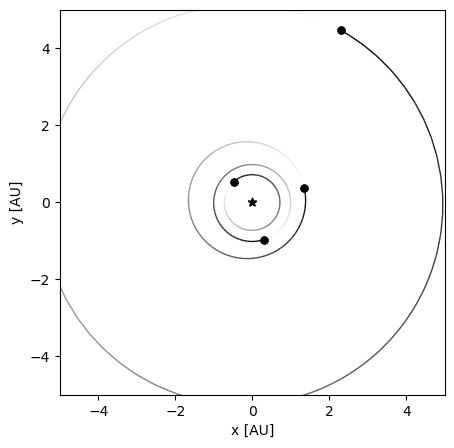

In [2]:
sim = rebound.Simulation()
sim.integrator = "mercurius"
sim.units = ("yr", "AU", "Msun")

#Julian Day for t2 is 2460501.768870000000, hence 2024 July 10 06:27:10.4 UTC

date = "2024-07-10 06:27"
sim.add("Sun", date = date, hash = 0)
sim.add("Venus", hash = 1)
sim.add("Earth", hash = 2)
sim.add("Mars", hash = 3)
sim.add("Jupiter", hash = 4)
sim.add("Saturn", hash = 5)
sim.add("Uranus", hash = 6)
sim.add("Neptune", hash = 7)


#all stored in a list called sim.particles
h = rebound.hash
sim.particles[h(0)].r = 0.00465047
sim.particles[h(1)].r = 4.04537843e-5
sim.particles[h(2)].r = 4.26352e-5
sim.particles[h(3)].r = 2.27276e-5
sim.particles[h(4)].r = 0.00046732617
sim.particles[h(5)].r = 0.000389256877
sim.particles[h(6)].r = 0.000169534499
sim.particles[h(7)].r = 0.000164587904

rebound.OrbitPlot(sim, unitlabel = "[AU]", xlim = [-5,5], ylim = [-5,5], color = ["black", "black", "black", "black", "black", "black", "black"])

In [3]:
#need very specific time 1,time 2 and time 3 from the same image series
print("Mass of the Sun = {}".format(sim.particles[h(0)].m))
print("GM = {}".format(sim.G*sim.particles[h(0)].m))

Mass of the Sun = 0.9999999999950272
GM = 39.47692642117669


In [4]:
sim.status()
N_pl = 8

---------------------------------
REBOUND version:     	3.25.1
REBOUND built on:    	Jun  9 2023 13:16:03
Number of particles: 	8
Selected integrator: 	mercurius
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.particle.Particle object at 0x7f390cfdfcc0, m=0.9999999999950272 x=-0.006901737060492132 y=-0.004108532895328846 z=0.0001972956440130474 vx=0.0022813204829236124 vy=-0.0019780369867111102 vz=-3.2553905326253395e-05>
<rebound.particle.Particle object at 0x7f390cfdfc40, m=2.447838287784771e-06 x=-0.485641963407423 y=0.5304642942091455 z=0.035162647159160065 vx=-5.526943689020037 vy=-4.970021025965151 vz=0.2507789838325851>
<rebound.particle.Particle object at 0x7f390cfdfcc0, m=3.0404326489511185e-06 x=0.3100080190958025 y=-0.9700788221057982 z=0.00024979002727783267 vx=5.87090341181049 vy=1.933155807958805 vz=-0.00017394907864119532>
<rebound.particle.Particle object at 0x7f390cfdfc40, m=3.2271560828978514e-07 x

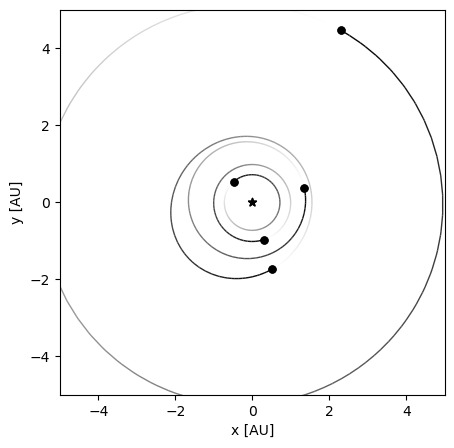

In [5]:
import numpy as np


sim.add(a=1.909733, e=0.166689, inc=np.radians(19.976097), Omega=np.radians(232.91948), omega=np.radians(151.287234), M=np.radians(282.84805), hash=100)
sim.particles[h(100)].r= 3.30887e-8

rebound.OrbitPlot(sim, unitlabel = "[AU]", xlim = [-5,5], ylim = [-5,5], color = (N_pl-3)*["black"]+["red"])

In [6]:
#adding more particles - DO NOT RUN AGAIN
N_tp = 20
a_lis = np.random.normal(1.909733, 0.01,20)
e_lis = np.random.normal(0.166689, 0.01, 20)
i_lis = np.random.normal(19.97609, 0.1, 20)
O_lis = np.random.normal(232.91948, 0.2, 20)
o_lis = np.random.normal(151.2872, 0.1, 20)
M_lis = np.random.normal(282.84805, 0.5,20)
    
for i in range(N_tp):
    sim.add(a=a_lis[i], e=e_lis[i], inc=np.radians(i_lis[i]), Omega=np.radians(O_lis[i]), omega=np.radians(o_lis[i]), M=np.radians(M_lis[i]), hash=(101+i))
    sim.particles[h(101+i)].r= 3.30887e-8

for p in sim.particles:
    print(p.hash.value)


0
1
2
3
4
5
6
7
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120


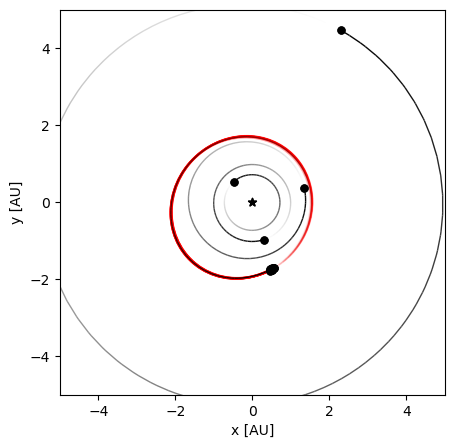

In [7]:
rebound.OrbitPlot(sim, unitlabel = "[AU]", xlim=[-5,5],ylim=[-5,5],color=(N_pl-1)*["black"]+N_tp*["red"])

In [11]:
sim.exit_max_distance = 1000
sim.collision = "direct"

discard_file_name = "discards.txt"

def collision_discard_log(sim_pointer,collision,discard_file_name = discard_file_name):
    sim = sim_pointer.contents
    id_p1 = sim.particles[collisions.p1]
    id_p2 = sim.particles[collisions.p2]
    
    discard_file = open(discard_file_name, "a")
    
    if id_p1 > id_p2:
        print("Particle {0} collided with {1} at {2} yrs".format(id_p1,id_p2,sim.t))
        print("Particle {0} collided with {1} at {2} yrs".format(id_p1,id_p2,sim.t),file=discard_file)
        print("Removing particle {0}".format(id_p1))
        ToRemove=1 # Idenitify p1 as the particle to remove
    else:
        print("Particle {0} collided with {1} at {2} yrs".format(id_p2,
        id_p1,sim.t))
        print("Particle {0} collided with {1} at {2} yrs".format(id_p2,
        id_p1,sim.t),
        file=discard_file)
        print("Removing particle {0}".format(id_p2))
        ToRemove=2 # Identify p2 as the particle to remove
        discard_file.close() # Close your discard file
    return ToRemove

sim.colloision_resolve = collision_discard_log

In [15]:
import os
discard_file_name = "discards.txt"
try:
    os.remove(discard_file_name)
except:
    pass

sim.move_to_com()
tend = 50e6
tout = 1000

sim.dt = sim.particles[h(1)].P/25

archive = "archive.bin"
sim.automateSimulationArchive(archive,interval=tout, deletefile = True)
times = np.arange(0,tend,tout)
Nsteps = len(times)

In [16]:
for i in range(Nsteps):
    try:
        sim.integrate(times[i],exact_finish_time=0)
    except rebound.Escape as error:
        for j in range(sim.N):
            p = sim.particles[j]
            d2 = p.x*p.x + p.y*p.y + p.z*p.z
            if d2>sim.exit_max_distance**2:
                index=j # cache index rather than remove here since our loop
            # would go beyond end of particles array

        pid = sim.particles[index].hash.value
        print("Particle {0:2d} was too far from the Sun at {1:12.6e} yrs".format(pid,sim.t))
        discard_file = open(discard_file_name,"a")
        print("Particle {0:2d} was too far from the Sun at {1:12.6e} yrs".format(pid,sim.t),file=discard_file)
        discard_file.close()
        sim.remove(index=index)
    print("Time {0:6.3f} Myr-- Fraction Done {1:5.4f} -- # of Clones {2}".format(
    sim.t/1e6,sim.t/tend,sim.N-N_pl))
    if sim.N <= N_pl:
        print("No more test particles, ending simulation")
        break

Time  0.000 Myr-- Fraction Done 0.0000 -- # of Clones 21
Time  0.001 Myr-- Fraction Done 0.0000 -- # of Clones 21
Time  0.002 Myr-- Fraction Done 0.0000 -- # of Clones 21
Time  0.003 Myr-- Fraction Done 0.0001 -- # of Clones 21
Time  0.004 Myr-- Fraction Done 0.0001 -- # of Clones 21
Time  0.005 Myr-- Fraction Done 0.0001 -- # of Clones 21
Time  0.006 Myr-- Fraction Done 0.0001 -- # of Clones 21
Time  0.007 Myr-- Fraction Done 0.0001 -- # of Clones 21
Time  0.008 Myr-- Fraction Done 0.0002 -- # of Clones 21
Time  0.009 Myr-- Fraction Done 0.0002 -- # of Clones 21
Time  0.010 Myr-- Fraction Done 0.0002 -- # of Clones 21
Time  0.011 Myr-- Fraction Done 0.0002 -- # of Clones 21
Time  0.012 Myr-- Fraction Done 0.0002 -- # of Clones 21
Time  0.013 Myr-- Fraction Done 0.0003 -- # of Clones 21
Time  0.014 Myr-- Fraction Done 0.0003 -- # of Clones 21
Time  0.015 Myr-- Fraction Done 0.0003 -- # of Clones 21
Time  0.016 Myr-- Fraction Done 0.0003 -- # of Clones 21
Time  0.017 Myr-- Fraction Done

Time  0.144 Myr-- Fraction Done 0.0029 -- # of Clones 21
Time  0.145 Myr-- Fraction Done 0.0029 -- # of Clones 21
Time  0.146 Myr-- Fraction Done 0.0029 -- # of Clones 21
Time  0.147 Myr-- Fraction Done 0.0029 -- # of Clones 21
Time  0.148 Myr-- Fraction Done 0.0030 -- # of Clones 21
Time  0.149 Myr-- Fraction Done 0.0030 -- # of Clones 21
Time  0.150 Myr-- Fraction Done 0.0030 -- # of Clones 21
Time  0.151 Myr-- Fraction Done 0.0030 -- # of Clones 21
Time  0.152 Myr-- Fraction Done 0.0030 -- # of Clones 21
Time  0.153 Myr-- Fraction Done 0.0031 -- # of Clones 21
Time  0.154 Myr-- Fraction Done 0.0031 -- # of Clones 21
Time  0.155 Myr-- Fraction Done 0.0031 -- # of Clones 21
Time  0.156 Myr-- Fraction Done 0.0031 -- # of Clones 21
Time  0.157 Myr-- Fraction Done 0.0031 -- # of Clones 21
Time  0.158 Myr-- Fraction Done 0.0032 -- # of Clones 21
Time  0.159 Myr-- Fraction Done 0.0032 -- # of Clones 21
Time  0.160 Myr-- Fraction Done 0.0032 -- # of Clones 21
Time  0.161 Myr-- Fraction Done

Time  0.288 Myr-- Fraction Done 0.0058 -- # of Clones 21
Time  0.289 Myr-- Fraction Done 0.0058 -- # of Clones 21
Time  0.290 Myr-- Fraction Done 0.0058 -- # of Clones 21
Time  0.291 Myr-- Fraction Done 0.0058 -- # of Clones 21
Time  0.292 Myr-- Fraction Done 0.0058 -- # of Clones 21
Time  0.293 Myr-- Fraction Done 0.0059 -- # of Clones 21
Time  0.294 Myr-- Fraction Done 0.0059 -- # of Clones 21
Time  0.295 Myr-- Fraction Done 0.0059 -- # of Clones 21
Time  0.296 Myr-- Fraction Done 0.0059 -- # of Clones 21
Time  0.297 Myr-- Fraction Done 0.0059 -- # of Clones 21
Time  0.298 Myr-- Fraction Done 0.0060 -- # of Clones 21
Time  0.299 Myr-- Fraction Done 0.0060 -- # of Clones 21
Time  0.300 Myr-- Fraction Done 0.0060 -- # of Clones 21
Time  0.301 Myr-- Fraction Done 0.0060 -- # of Clones 21
Time  0.302 Myr-- Fraction Done 0.0060 -- # of Clones 21
Time  0.303 Myr-- Fraction Done 0.0061 -- # of Clones 21
Time  0.304 Myr-- Fraction Done 0.0061 -- # of Clones 21
Time  0.305 Myr-- Fraction Done

Time  0.432 Myr-- Fraction Done 0.0086 -- # of Clones 21
Time  0.433 Myr-- Fraction Done 0.0087 -- # of Clones 21
Time  0.434 Myr-- Fraction Done 0.0087 -- # of Clones 21
Time  0.435 Myr-- Fraction Done 0.0087 -- # of Clones 21
Time  0.436 Myr-- Fraction Done 0.0087 -- # of Clones 21
Time  0.437 Myr-- Fraction Done 0.0087 -- # of Clones 21
Time  0.438 Myr-- Fraction Done 0.0088 -- # of Clones 21
Time  0.439 Myr-- Fraction Done 0.0088 -- # of Clones 21
Time  0.440 Myr-- Fraction Done 0.0088 -- # of Clones 21
Time  0.441 Myr-- Fraction Done 0.0088 -- # of Clones 21
Time  0.442 Myr-- Fraction Done 0.0088 -- # of Clones 21
Time  0.443 Myr-- Fraction Done 0.0089 -- # of Clones 21
Time  0.444 Myr-- Fraction Done 0.0089 -- # of Clones 21
Time  0.445 Myr-- Fraction Done 0.0089 -- # of Clones 21
Time  0.446 Myr-- Fraction Done 0.0089 -- # of Clones 21
Time  0.447 Myr-- Fraction Done 0.0089 -- # of Clones 21
Time  0.448 Myr-- Fraction Done 0.0090 -- # of Clones 21
Time  0.449 Myr-- Fraction Done

Time  0.576 Myr-- Fraction Done 0.0115 -- # of Clones 21
Time  0.577 Myr-- Fraction Done 0.0115 -- # of Clones 21
Time  0.578 Myr-- Fraction Done 0.0116 -- # of Clones 21
Time  0.579 Myr-- Fraction Done 0.0116 -- # of Clones 21
Time  0.580 Myr-- Fraction Done 0.0116 -- # of Clones 21
Time  0.581 Myr-- Fraction Done 0.0116 -- # of Clones 21
Time  0.582 Myr-- Fraction Done 0.0116 -- # of Clones 21
Time  0.583 Myr-- Fraction Done 0.0117 -- # of Clones 21
Time  0.584 Myr-- Fraction Done 0.0117 -- # of Clones 21
Time  0.585 Myr-- Fraction Done 0.0117 -- # of Clones 21
Time  0.586 Myr-- Fraction Done 0.0117 -- # of Clones 21
Time  0.587 Myr-- Fraction Done 0.0117 -- # of Clones 21
Time  0.588 Myr-- Fraction Done 0.0118 -- # of Clones 21
Time  0.589 Myr-- Fraction Done 0.0118 -- # of Clones 21
Time  0.590 Myr-- Fraction Done 0.0118 -- # of Clones 21
Time  0.591 Myr-- Fraction Done 0.0118 -- # of Clones 21
Time  0.592 Myr-- Fraction Done 0.0118 -- # of Clones 21
Time  0.593 Myr-- Fraction Done

Time  0.720 Myr-- Fraction Done 0.0144 -- # of Clones 21
Time  0.721 Myr-- Fraction Done 0.0144 -- # of Clones 21
Time  0.722 Myr-- Fraction Done 0.0144 -- # of Clones 21
Time  0.723 Myr-- Fraction Done 0.0145 -- # of Clones 21
Time  0.724 Myr-- Fraction Done 0.0145 -- # of Clones 21
Time  0.725 Myr-- Fraction Done 0.0145 -- # of Clones 21
Time  0.726 Myr-- Fraction Done 0.0145 -- # of Clones 21
Time  0.727 Myr-- Fraction Done 0.0145 -- # of Clones 21
Time  0.728 Myr-- Fraction Done 0.0146 -- # of Clones 21
Time  0.729 Myr-- Fraction Done 0.0146 -- # of Clones 21
Time  0.730 Myr-- Fraction Done 0.0146 -- # of Clones 21
Time  0.731 Myr-- Fraction Done 0.0146 -- # of Clones 21
Time  0.732 Myr-- Fraction Done 0.0146 -- # of Clones 21
Time  0.733 Myr-- Fraction Done 0.0147 -- # of Clones 21
Time  0.734 Myr-- Fraction Done 0.0147 -- # of Clones 21
Time  0.735 Myr-- Fraction Done 0.0147 -- # of Clones 21
Time  0.736 Myr-- Fraction Done 0.0147 -- # of Clones 21
Time  0.737 Myr-- Fraction Done

Time  0.864 Myr-- Fraction Done 0.0173 -- # of Clones 21
Time  0.865 Myr-- Fraction Done 0.0173 -- # of Clones 21
Time  0.866 Myr-- Fraction Done 0.0173 -- # of Clones 21
Time  0.867 Myr-- Fraction Done 0.0173 -- # of Clones 21
Time  0.868 Myr-- Fraction Done 0.0174 -- # of Clones 21
Time  0.869 Myr-- Fraction Done 0.0174 -- # of Clones 21
Time  0.870 Myr-- Fraction Done 0.0174 -- # of Clones 21
Time  0.871 Myr-- Fraction Done 0.0174 -- # of Clones 21
Time  0.872 Myr-- Fraction Done 0.0174 -- # of Clones 21
Time  0.873 Myr-- Fraction Done 0.0175 -- # of Clones 21
Time  0.874 Myr-- Fraction Done 0.0175 -- # of Clones 21
Time  0.875 Myr-- Fraction Done 0.0175 -- # of Clones 21
Time  0.876 Myr-- Fraction Done 0.0175 -- # of Clones 21
Time  0.877 Myr-- Fraction Done 0.0175 -- # of Clones 21
Time  0.878 Myr-- Fraction Done 0.0176 -- # of Clones 21
Time  0.879 Myr-- Fraction Done 0.0176 -- # of Clones 21
Time  0.880 Myr-- Fraction Done 0.0176 -- # of Clones 21
Time  0.881 Myr-- Fraction Done

Time  1.008 Myr-- Fraction Done 0.0202 -- # of Clones 21
Time  1.009 Myr-- Fraction Done 0.0202 -- # of Clones 21
Time  1.010 Myr-- Fraction Done 0.0202 -- # of Clones 21
Time  1.011 Myr-- Fraction Done 0.0202 -- # of Clones 21
Time  1.012 Myr-- Fraction Done 0.0202 -- # of Clones 21
Time  1.013 Myr-- Fraction Done 0.0203 -- # of Clones 21
Time  1.014 Myr-- Fraction Done 0.0203 -- # of Clones 21
Time  1.015 Myr-- Fraction Done 0.0203 -- # of Clones 21
Time  1.016 Myr-- Fraction Done 0.0203 -- # of Clones 21
Time  1.017 Myr-- Fraction Done 0.0203 -- # of Clones 21
Time  1.018 Myr-- Fraction Done 0.0204 -- # of Clones 21
Time  1.019 Myr-- Fraction Done 0.0204 -- # of Clones 21
Time  1.020 Myr-- Fraction Done 0.0204 -- # of Clones 21
Time  1.021 Myr-- Fraction Done 0.0204 -- # of Clones 21
Time  1.022 Myr-- Fraction Done 0.0204 -- # of Clones 21
Time  1.023 Myr-- Fraction Done 0.0205 -- # of Clones 21
Time  1.024 Myr-- Fraction Done 0.0205 -- # of Clones 21
Time  1.025 Myr-- Fraction Done

Time  1.152 Myr-- Fraction Done 0.0230 -- # of Clones 21
Time  1.153 Myr-- Fraction Done 0.0231 -- # of Clones 21
Time  1.154 Myr-- Fraction Done 0.0231 -- # of Clones 21
Time  1.155 Myr-- Fraction Done 0.0231 -- # of Clones 21
Time  1.156 Myr-- Fraction Done 0.0231 -- # of Clones 21
Time  1.157 Myr-- Fraction Done 0.0231 -- # of Clones 21
Time  1.158 Myr-- Fraction Done 0.0232 -- # of Clones 21
Time  1.159 Myr-- Fraction Done 0.0232 -- # of Clones 21
Time  1.160 Myr-- Fraction Done 0.0232 -- # of Clones 21
Time  1.161 Myr-- Fraction Done 0.0232 -- # of Clones 21
Time  1.162 Myr-- Fraction Done 0.0232 -- # of Clones 21
Time  1.163 Myr-- Fraction Done 0.0233 -- # of Clones 21
Time  1.164 Myr-- Fraction Done 0.0233 -- # of Clones 21
Time  1.165 Myr-- Fraction Done 0.0233 -- # of Clones 21
Time  1.166 Myr-- Fraction Done 0.0233 -- # of Clones 21
Time  1.167 Myr-- Fraction Done 0.0233 -- # of Clones 21
Time  1.168 Myr-- Fraction Done 0.0234 -- # of Clones 21
Time  1.169 Myr-- Fraction Done

Time  1.296 Myr-- Fraction Done 0.0259 -- # of Clones 21
Time  1.297 Myr-- Fraction Done 0.0259 -- # of Clones 21
Time  1.298 Myr-- Fraction Done 0.0260 -- # of Clones 21
Time  1.299 Myr-- Fraction Done 0.0260 -- # of Clones 21
Time  1.300 Myr-- Fraction Done 0.0260 -- # of Clones 21
Time  1.301 Myr-- Fraction Done 0.0260 -- # of Clones 21
Time  1.302 Myr-- Fraction Done 0.0260 -- # of Clones 21
Time  1.303 Myr-- Fraction Done 0.0261 -- # of Clones 21
Time  1.304 Myr-- Fraction Done 0.0261 -- # of Clones 21
Time  1.305 Myr-- Fraction Done 0.0261 -- # of Clones 21
Time  1.306 Myr-- Fraction Done 0.0261 -- # of Clones 21
Time  1.307 Myr-- Fraction Done 0.0261 -- # of Clones 21
Time  1.308 Myr-- Fraction Done 0.0262 -- # of Clones 21
Time  1.309 Myr-- Fraction Done 0.0262 -- # of Clones 21
Time  1.310 Myr-- Fraction Done 0.0262 -- # of Clones 21
Time  1.311 Myr-- Fraction Done 0.0262 -- # of Clones 21
Time  1.312 Myr-- Fraction Done 0.0262 -- # of Clones 21
Time  1.313 Myr-- Fraction Done

Time  1.440 Myr-- Fraction Done 0.0288 -- # of Clones 21
Time  1.441 Myr-- Fraction Done 0.0288 -- # of Clones 21
Time  1.442 Myr-- Fraction Done 0.0288 -- # of Clones 21
Time  1.443 Myr-- Fraction Done 0.0289 -- # of Clones 21
Time  1.444 Myr-- Fraction Done 0.0289 -- # of Clones 21
Time  1.445 Myr-- Fraction Done 0.0289 -- # of Clones 21
Time  1.446 Myr-- Fraction Done 0.0289 -- # of Clones 21
Time  1.447 Myr-- Fraction Done 0.0289 -- # of Clones 21
Time  1.448 Myr-- Fraction Done 0.0290 -- # of Clones 21
Time  1.449 Myr-- Fraction Done 0.0290 -- # of Clones 21
Time  1.450 Myr-- Fraction Done 0.0290 -- # of Clones 21
Time  1.451 Myr-- Fraction Done 0.0290 -- # of Clones 21
Time  1.452 Myr-- Fraction Done 0.0290 -- # of Clones 21
Time  1.453 Myr-- Fraction Done 0.0291 -- # of Clones 21
Time  1.454 Myr-- Fraction Done 0.0291 -- # of Clones 21
Time  1.455 Myr-- Fraction Done 0.0291 -- # of Clones 21
Time  1.456 Myr-- Fraction Done 0.0291 -- # of Clones 21
Time  1.457 Myr-- Fraction Done

Time  1.584 Myr-- Fraction Done 0.0317 -- # of Clones 21
Time  1.585 Myr-- Fraction Done 0.0317 -- # of Clones 21
Time  1.586 Myr-- Fraction Done 0.0317 -- # of Clones 21
Time  1.587 Myr-- Fraction Done 0.0317 -- # of Clones 21
Time  1.588 Myr-- Fraction Done 0.0318 -- # of Clones 21
Time  1.589 Myr-- Fraction Done 0.0318 -- # of Clones 21
Time  1.590 Myr-- Fraction Done 0.0318 -- # of Clones 21
Time  1.591 Myr-- Fraction Done 0.0318 -- # of Clones 21
Time  1.592 Myr-- Fraction Done 0.0318 -- # of Clones 21
Time  1.593 Myr-- Fraction Done 0.0319 -- # of Clones 21
Time  1.594 Myr-- Fraction Done 0.0319 -- # of Clones 21
Time  1.595 Myr-- Fraction Done 0.0319 -- # of Clones 21
Time  1.596 Myr-- Fraction Done 0.0319 -- # of Clones 21
Time  1.597 Myr-- Fraction Done 0.0319 -- # of Clones 21
Time  1.598 Myr-- Fraction Done 0.0320 -- # of Clones 21
Time  1.599 Myr-- Fraction Done 0.0320 -- # of Clones 21
Time  1.600 Myr-- Fraction Done 0.0320 -- # of Clones 21
Time  1.601 Myr-- Fraction Done

Time  1.728 Myr-- Fraction Done 0.0346 -- # of Clones 21
Time  1.729 Myr-- Fraction Done 0.0346 -- # of Clones 21
Time  1.730 Myr-- Fraction Done 0.0346 -- # of Clones 21
Time  1.731 Myr-- Fraction Done 0.0346 -- # of Clones 21
Time  1.732 Myr-- Fraction Done 0.0346 -- # of Clones 21
Time  1.733 Myr-- Fraction Done 0.0347 -- # of Clones 21
Time  1.734 Myr-- Fraction Done 0.0347 -- # of Clones 21
Time  1.735 Myr-- Fraction Done 0.0347 -- # of Clones 21
Time  1.736 Myr-- Fraction Done 0.0347 -- # of Clones 21
Time  1.737 Myr-- Fraction Done 0.0347 -- # of Clones 21
Time  1.738 Myr-- Fraction Done 0.0348 -- # of Clones 21
Time  1.739 Myr-- Fraction Done 0.0348 -- # of Clones 21
Time  1.740 Myr-- Fraction Done 0.0348 -- # of Clones 21
Time  1.741 Myr-- Fraction Done 0.0348 -- # of Clones 21
Time  1.742 Myr-- Fraction Done 0.0348 -- # of Clones 21
Time  1.743 Myr-- Fraction Done 0.0349 -- # of Clones 21
Time  1.744 Myr-- Fraction Done 0.0349 -- # of Clones 21
Time  1.745 Myr-- Fraction Done

Time  1.872 Myr-- Fraction Done 0.0374 -- # of Clones 21
Time  1.873 Myr-- Fraction Done 0.0375 -- # of Clones 21
Time  1.874 Myr-- Fraction Done 0.0375 -- # of Clones 21
Time  1.875 Myr-- Fraction Done 0.0375 -- # of Clones 21
Time  1.876 Myr-- Fraction Done 0.0375 -- # of Clones 21
Time  1.877 Myr-- Fraction Done 0.0375 -- # of Clones 21
Time  1.878 Myr-- Fraction Done 0.0376 -- # of Clones 21
Time  1.879 Myr-- Fraction Done 0.0376 -- # of Clones 21
Time  1.880 Myr-- Fraction Done 0.0376 -- # of Clones 21
Time  1.881 Myr-- Fraction Done 0.0376 -- # of Clones 21
Time  1.882 Myr-- Fraction Done 0.0376 -- # of Clones 21
Time  1.883 Myr-- Fraction Done 0.0377 -- # of Clones 21
Time  1.884 Myr-- Fraction Done 0.0377 -- # of Clones 21
Time  1.885 Myr-- Fraction Done 0.0377 -- # of Clones 21
Time  1.886 Myr-- Fraction Done 0.0377 -- # of Clones 21
Time  1.887 Myr-- Fraction Done 0.0377 -- # of Clones 21
Time  1.888 Myr-- Fraction Done 0.0378 -- # of Clones 21
Time  1.889 Myr-- Fraction Done

Time  2.016 Myr-- Fraction Done 0.0403 -- # of Clones 21
Time  2.017 Myr-- Fraction Done 0.0403 -- # of Clones 21
Time  2.018 Myr-- Fraction Done 0.0404 -- # of Clones 21
Time  2.019 Myr-- Fraction Done 0.0404 -- # of Clones 21
Time  2.020 Myr-- Fraction Done 0.0404 -- # of Clones 21
Time  2.021 Myr-- Fraction Done 0.0404 -- # of Clones 21
Time  2.022 Myr-- Fraction Done 0.0404 -- # of Clones 21
Time  2.023 Myr-- Fraction Done 0.0405 -- # of Clones 21
Time  2.024 Myr-- Fraction Done 0.0405 -- # of Clones 21
Time  2.025 Myr-- Fraction Done 0.0405 -- # of Clones 21
Time  2.026 Myr-- Fraction Done 0.0405 -- # of Clones 21
Time  2.027 Myr-- Fraction Done 0.0405 -- # of Clones 21
Time  2.028 Myr-- Fraction Done 0.0406 -- # of Clones 21
Time  2.029 Myr-- Fraction Done 0.0406 -- # of Clones 21
Time  2.030 Myr-- Fraction Done 0.0406 -- # of Clones 21
Time  2.031 Myr-- Fraction Done 0.0406 -- # of Clones 21
Time  2.032 Myr-- Fraction Done 0.0406 -- # of Clones 21
Time  2.033 Myr-- Fraction Done

Time  2.160 Myr-- Fraction Done 0.0432 -- # of Clones 21
Time  2.161 Myr-- Fraction Done 0.0432 -- # of Clones 21
Time  2.162 Myr-- Fraction Done 0.0432 -- # of Clones 21
Time  2.163 Myr-- Fraction Done 0.0433 -- # of Clones 21
Time  2.164 Myr-- Fraction Done 0.0433 -- # of Clones 21
Time  2.165 Myr-- Fraction Done 0.0433 -- # of Clones 21
Time  2.166 Myr-- Fraction Done 0.0433 -- # of Clones 21
Time  2.167 Myr-- Fraction Done 0.0433 -- # of Clones 21
Time  2.168 Myr-- Fraction Done 0.0434 -- # of Clones 21
Time  2.169 Myr-- Fraction Done 0.0434 -- # of Clones 21
Time  2.170 Myr-- Fraction Done 0.0434 -- # of Clones 21
Time  2.171 Myr-- Fraction Done 0.0434 -- # of Clones 21
Time  2.172 Myr-- Fraction Done 0.0434 -- # of Clones 21
Time  2.173 Myr-- Fraction Done 0.0435 -- # of Clones 21
Time  2.174 Myr-- Fraction Done 0.0435 -- # of Clones 21
Time  2.175 Myr-- Fraction Done 0.0435 -- # of Clones 21
Time  2.176 Myr-- Fraction Done 0.0435 -- # of Clones 21
Time  2.177 Myr-- Fraction Done

Time  2.304 Myr-- Fraction Done 0.0461 -- # of Clones 21
Time  2.305 Myr-- Fraction Done 0.0461 -- # of Clones 21
Time  2.306 Myr-- Fraction Done 0.0461 -- # of Clones 21
Time  2.307 Myr-- Fraction Done 0.0461 -- # of Clones 21
Time  2.308 Myr-- Fraction Done 0.0462 -- # of Clones 21
Time  2.309 Myr-- Fraction Done 0.0462 -- # of Clones 21
Time  2.310 Myr-- Fraction Done 0.0462 -- # of Clones 21
Time  2.311 Myr-- Fraction Done 0.0462 -- # of Clones 21
Time  2.312 Myr-- Fraction Done 0.0462 -- # of Clones 21
Time  2.313 Myr-- Fraction Done 0.0463 -- # of Clones 21
Time  2.314 Myr-- Fraction Done 0.0463 -- # of Clones 21
Time  2.315 Myr-- Fraction Done 0.0463 -- # of Clones 21
Time  2.316 Myr-- Fraction Done 0.0463 -- # of Clones 21
Time  2.317 Myr-- Fraction Done 0.0463 -- # of Clones 21
Time  2.318 Myr-- Fraction Done 0.0464 -- # of Clones 21
Time  2.319 Myr-- Fraction Done 0.0464 -- # of Clones 21
Time  2.320 Myr-- Fraction Done 0.0464 -- # of Clones 21
Time  2.321 Myr-- Fraction Done

Time  2.448 Myr-- Fraction Done 0.0490 -- # of Clones 21
Time  2.449 Myr-- Fraction Done 0.0490 -- # of Clones 21
Time  2.450 Myr-- Fraction Done 0.0490 -- # of Clones 21
Time  2.451 Myr-- Fraction Done 0.0490 -- # of Clones 21
Time  2.452 Myr-- Fraction Done 0.0490 -- # of Clones 21
Time  2.453 Myr-- Fraction Done 0.0491 -- # of Clones 21
Time  2.454 Myr-- Fraction Done 0.0491 -- # of Clones 21
Time  2.455 Myr-- Fraction Done 0.0491 -- # of Clones 21
Time  2.456 Myr-- Fraction Done 0.0491 -- # of Clones 21
Time  2.457 Myr-- Fraction Done 0.0491 -- # of Clones 21
Time  2.458 Myr-- Fraction Done 0.0492 -- # of Clones 21
Time  2.459 Myr-- Fraction Done 0.0492 -- # of Clones 21
Time  2.460 Myr-- Fraction Done 0.0492 -- # of Clones 21
Time  2.461 Myr-- Fraction Done 0.0492 -- # of Clones 21
Time  2.462 Myr-- Fraction Done 0.0492 -- # of Clones 21
Time  2.463 Myr-- Fraction Done 0.0493 -- # of Clones 21
Time  2.464 Myr-- Fraction Done 0.0493 -- # of Clones 21
Time  2.465 Myr-- Fraction Done

Time  2.592 Myr-- Fraction Done 0.0518 -- # of Clones 21
Time  2.593 Myr-- Fraction Done 0.0519 -- # of Clones 21
Time  2.594 Myr-- Fraction Done 0.0519 -- # of Clones 21
Time  2.595 Myr-- Fraction Done 0.0519 -- # of Clones 21
Time  2.596 Myr-- Fraction Done 0.0519 -- # of Clones 21
Time  2.597 Myr-- Fraction Done 0.0519 -- # of Clones 21
Time  2.598 Myr-- Fraction Done 0.0520 -- # of Clones 21
Time  2.599 Myr-- Fraction Done 0.0520 -- # of Clones 21
Time  2.600 Myr-- Fraction Done 0.0520 -- # of Clones 21
Time  2.601 Myr-- Fraction Done 0.0520 -- # of Clones 21
Time  2.602 Myr-- Fraction Done 0.0520 -- # of Clones 21
Time  2.603 Myr-- Fraction Done 0.0521 -- # of Clones 21
Time  2.604 Myr-- Fraction Done 0.0521 -- # of Clones 21
Time  2.605 Myr-- Fraction Done 0.0521 -- # of Clones 21
Time  2.606 Myr-- Fraction Done 0.0521 -- # of Clones 21
Time  2.607 Myr-- Fraction Done 0.0521 -- # of Clones 21
Time  2.608 Myr-- Fraction Done 0.0522 -- # of Clones 21
Time  2.609 Myr-- Fraction Done

Time  2.736 Myr-- Fraction Done 0.0547 -- # of Clones 21
Time  2.737 Myr-- Fraction Done 0.0547 -- # of Clones 21
Time  2.738 Myr-- Fraction Done 0.0548 -- # of Clones 21
Time  2.739 Myr-- Fraction Done 0.0548 -- # of Clones 21
Time  2.740 Myr-- Fraction Done 0.0548 -- # of Clones 21
Time  2.741 Myr-- Fraction Done 0.0548 -- # of Clones 21
Time  2.742 Myr-- Fraction Done 0.0548 -- # of Clones 21
Time  2.743 Myr-- Fraction Done 0.0549 -- # of Clones 21
Time  2.744 Myr-- Fraction Done 0.0549 -- # of Clones 21
Time  2.745 Myr-- Fraction Done 0.0549 -- # of Clones 21
Time  2.746 Myr-- Fraction Done 0.0549 -- # of Clones 21
Time  2.747 Myr-- Fraction Done 0.0549 -- # of Clones 21
Time  2.748 Myr-- Fraction Done 0.0550 -- # of Clones 21
Time  2.749 Myr-- Fraction Done 0.0550 -- # of Clones 21
Time  2.750 Myr-- Fraction Done 0.0550 -- # of Clones 21
Time  2.751 Myr-- Fraction Done 0.0550 -- # of Clones 21
Time  2.752 Myr-- Fraction Done 0.0550 -- # of Clones 21
Time  2.753 Myr-- Fraction Done

Time  2.880 Myr-- Fraction Done 0.0576 -- # of Clones 21
Time  2.881 Myr-- Fraction Done 0.0576 -- # of Clones 21
Time  2.882 Myr-- Fraction Done 0.0576 -- # of Clones 21
Time  2.883 Myr-- Fraction Done 0.0577 -- # of Clones 21
Time  2.884 Myr-- Fraction Done 0.0577 -- # of Clones 21
Time  2.885 Myr-- Fraction Done 0.0577 -- # of Clones 21
Time  2.886 Myr-- Fraction Done 0.0577 -- # of Clones 21
Time  2.887 Myr-- Fraction Done 0.0577 -- # of Clones 21
Time  2.888 Myr-- Fraction Done 0.0578 -- # of Clones 21
Time  2.889 Myr-- Fraction Done 0.0578 -- # of Clones 21
Time  2.890 Myr-- Fraction Done 0.0578 -- # of Clones 21
Time  2.891 Myr-- Fraction Done 0.0578 -- # of Clones 21
Time  2.892 Myr-- Fraction Done 0.0578 -- # of Clones 21
Time  2.893 Myr-- Fraction Done 0.0579 -- # of Clones 21
Time  2.894 Myr-- Fraction Done 0.0579 -- # of Clones 21
Time  2.895 Myr-- Fraction Done 0.0579 -- # of Clones 21
Time  2.896 Myr-- Fraction Done 0.0579 -- # of Clones 21
Time  2.897 Myr-- Fraction Done

Time  3.024 Myr-- Fraction Done 0.0605 -- # of Clones 21
Time  3.025 Myr-- Fraction Done 0.0605 -- # of Clones 21
Time  3.026 Myr-- Fraction Done 0.0605 -- # of Clones 21
Time  3.027 Myr-- Fraction Done 0.0605 -- # of Clones 21
Time  3.028 Myr-- Fraction Done 0.0606 -- # of Clones 21
Time  3.029 Myr-- Fraction Done 0.0606 -- # of Clones 21
Time  3.030 Myr-- Fraction Done 0.0606 -- # of Clones 21
Time  3.031 Myr-- Fraction Done 0.0606 -- # of Clones 21
Time  3.032 Myr-- Fraction Done 0.0606 -- # of Clones 21
Time  3.033 Myr-- Fraction Done 0.0607 -- # of Clones 21
Time  3.034 Myr-- Fraction Done 0.0607 -- # of Clones 21
Time  3.035 Myr-- Fraction Done 0.0607 -- # of Clones 21
Time  3.036 Myr-- Fraction Done 0.0607 -- # of Clones 21
Time  3.037 Myr-- Fraction Done 0.0607 -- # of Clones 21
Time  3.038 Myr-- Fraction Done 0.0608 -- # of Clones 21
Time  3.039 Myr-- Fraction Done 0.0608 -- # of Clones 21
Time  3.040 Myr-- Fraction Done 0.0608 -- # of Clones 21
Time  3.041 Myr-- Fraction Done

Time  3.168 Myr-- Fraction Done 0.0634 -- # of Clones 21
Time  3.169 Myr-- Fraction Done 0.0634 -- # of Clones 21
Time  3.170 Myr-- Fraction Done 0.0634 -- # of Clones 21
Time  3.171 Myr-- Fraction Done 0.0634 -- # of Clones 21
Time  3.172 Myr-- Fraction Done 0.0634 -- # of Clones 21
Time  3.173 Myr-- Fraction Done 0.0635 -- # of Clones 21
Time  3.174 Myr-- Fraction Done 0.0635 -- # of Clones 21
Time  3.175 Myr-- Fraction Done 0.0635 -- # of Clones 21
Time  3.176 Myr-- Fraction Done 0.0635 -- # of Clones 21
Time  3.177 Myr-- Fraction Done 0.0635 -- # of Clones 21
Time  3.178 Myr-- Fraction Done 0.0636 -- # of Clones 21
Time  3.179 Myr-- Fraction Done 0.0636 -- # of Clones 21
Time  3.180 Myr-- Fraction Done 0.0636 -- # of Clones 21
Time  3.181 Myr-- Fraction Done 0.0636 -- # of Clones 21
Time  3.182 Myr-- Fraction Done 0.0636 -- # of Clones 21
Time  3.183 Myr-- Fraction Done 0.0637 -- # of Clones 21
Time  3.184 Myr-- Fraction Done 0.0637 -- # of Clones 21
Time  3.185 Myr-- Fraction Done

Time  3.312 Myr-- Fraction Done 0.0662 -- # of Clones 21
Time  3.313 Myr-- Fraction Done 0.0663 -- # of Clones 21
Time  3.314 Myr-- Fraction Done 0.0663 -- # of Clones 21
Time  3.315 Myr-- Fraction Done 0.0663 -- # of Clones 21
Time  3.316 Myr-- Fraction Done 0.0663 -- # of Clones 21
Time  3.317 Myr-- Fraction Done 0.0663 -- # of Clones 21
Time  3.318 Myr-- Fraction Done 0.0664 -- # of Clones 21
Time  3.319 Myr-- Fraction Done 0.0664 -- # of Clones 21
Time  3.320 Myr-- Fraction Done 0.0664 -- # of Clones 21
Time  3.321 Myr-- Fraction Done 0.0664 -- # of Clones 21
Time  3.322 Myr-- Fraction Done 0.0664 -- # of Clones 21
Time  3.323 Myr-- Fraction Done 0.0665 -- # of Clones 21
Time  3.324 Myr-- Fraction Done 0.0665 -- # of Clones 21
Time  3.325 Myr-- Fraction Done 0.0665 -- # of Clones 21
Time  3.326 Myr-- Fraction Done 0.0665 -- # of Clones 21
Time  3.327 Myr-- Fraction Done 0.0665 -- # of Clones 21
Time  3.328 Myr-- Fraction Done 0.0666 -- # of Clones 21
Time  3.329 Myr-- Fraction Done

Time  3.456 Myr-- Fraction Done 0.0691 -- # of Clones 21
Time  3.457 Myr-- Fraction Done 0.0691 -- # of Clones 21
Time  3.458 Myr-- Fraction Done 0.0692 -- # of Clones 21
Time  3.459 Myr-- Fraction Done 0.0692 -- # of Clones 21
Time  3.460 Myr-- Fraction Done 0.0692 -- # of Clones 21
Time  3.461 Myr-- Fraction Done 0.0692 -- # of Clones 21
Time  3.462 Myr-- Fraction Done 0.0692 -- # of Clones 21
Time  3.463 Myr-- Fraction Done 0.0693 -- # of Clones 21
Time  3.464 Myr-- Fraction Done 0.0693 -- # of Clones 21
Time  3.465 Myr-- Fraction Done 0.0693 -- # of Clones 21
Time  3.466 Myr-- Fraction Done 0.0693 -- # of Clones 21
Time  3.467 Myr-- Fraction Done 0.0693 -- # of Clones 21
Time  3.468 Myr-- Fraction Done 0.0694 -- # of Clones 21
Time  3.469 Myr-- Fraction Done 0.0694 -- # of Clones 21
Time  3.470 Myr-- Fraction Done 0.0694 -- # of Clones 21
Time  3.471 Myr-- Fraction Done 0.0694 -- # of Clones 21
Time  3.472 Myr-- Fraction Done 0.0694 -- # of Clones 21
Time  3.473 Myr-- Fraction Done

Time  3.600 Myr-- Fraction Done 0.0720 -- # of Clones 21
Time  3.601 Myr-- Fraction Done 0.0720 -- # of Clones 21
Time  3.602 Myr-- Fraction Done 0.0720 -- # of Clones 21
Time  3.603 Myr-- Fraction Done 0.0721 -- # of Clones 21
Time  3.604 Myr-- Fraction Done 0.0721 -- # of Clones 21
Time  3.605 Myr-- Fraction Done 0.0721 -- # of Clones 21
Time  3.606 Myr-- Fraction Done 0.0721 -- # of Clones 21
Time  3.607 Myr-- Fraction Done 0.0721 -- # of Clones 21
Time  3.608 Myr-- Fraction Done 0.0722 -- # of Clones 21
Time  3.609 Myr-- Fraction Done 0.0722 -- # of Clones 21
Time  3.610 Myr-- Fraction Done 0.0722 -- # of Clones 21
Time  3.611 Myr-- Fraction Done 0.0722 -- # of Clones 21
Time  3.612 Myr-- Fraction Done 0.0722 -- # of Clones 21
Time  3.613 Myr-- Fraction Done 0.0723 -- # of Clones 21
Time  3.614 Myr-- Fraction Done 0.0723 -- # of Clones 21
Time  3.615 Myr-- Fraction Done 0.0723 -- # of Clones 21
Time  3.616 Myr-- Fraction Done 0.0723 -- # of Clones 21
Time  3.617 Myr-- Fraction Done

Time  3.744 Myr-- Fraction Done 0.0749 -- # of Clones 21
Time  3.745 Myr-- Fraction Done 0.0749 -- # of Clones 21
Time  3.746 Myr-- Fraction Done 0.0749 -- # of Clones 21
Time  3.747 Myr-- Fraction Done 0.0749 -- # of Clones 21
Time  3.748 Myr-- Fraction Done 0.0750 -- # of Clones 21
Time  3.749 Myr-- Fraction Done 0.0750 -- # of Clones 21
Time  3.750 Myr-- Fraction Done 0.0750 -- # of Clones 21
Time  3.751 Myr-- Fraction Done 0.0750 -- # of Clones 21
Time  3.752 Myr-- Fraction Done 0.0750 -- # of Clones 21
Time  3.753 Myr-- Fraction Done 0.0751 -- # of Clones 21
Time  3.754 Myr-- Fraction Done 0.0751 -- # of Clones 21
Time  3.755 Myr-- Fraction Done 0.0751 -- # of Clones 21
Time  3.756 Myr-- Fraction Done 0.0751 -- # of Clones 21
Time  3.757 Myr-- Fraction Done 0.0751 -- # of Clones 21
Time  3.758 Myr-- Fraction Done 0.0752 -- # of Clones 21
Time  3.759 Myr-- Fraction Done 0.0752 -- # of Clones 21
Time  3.760 Myr-- Fraction Done 0.0752 -- # of Clones 21
Time  3.761 Myr-- Fraction Done

Time  3.888 Myr-- Fraction Done 0.0778 -- # of Clones 21
Time  3.889 Myr-- Fraction Done 0.0778 -- # of Clones 21
Time  3.890 Myr-- Fraction Done 0.0778 -- # of Clones 21
Time  3.891 Myr-- Fraction Done 0.0778 -- # of Clones 21
Time  3.892 Myr-- Fraction Done 0.0778 -- # of Clones 21
Time  3.893 Myr-- Fraction Done 0.0779 -- # of Clones 21
Time  3.894 Myr-- Fraction Done 0.0779 -- # of Clones 21
Time  3.895 Myr-- Fraction Done 0.0779 -- # of Clones 21
Time  3.896 Myr-- Fraction Done 0.0779 -- # of Clones 21
Time  3.897 Myr-- Fraction Done 0.0779 -- # of Clones 21
Time  3.898 Myr-- Fraction Done 0.0780 -- # of Clones 21
Time  3.899 Myr-- Fraction Done 0.0780 -- # of Clones 21
Time  3.900 Myr-- Fraction Done 0.0780 -- # of Clones 21
Time  3.901 Myr-- Fraction Done 0.0780 -- # of Clones 21
Time  3.902 Myr-- Fraction Done 0.0780 -- # of Clones 21
Time  3.903 Myr-- Fraction Done 0.0781 -- # of Clones 21
Time  3.904 Myr-- Fraction Done 0.0781 -- # of Clones 21
Time  3.905 Myr-- Fraction Done

Time  4.032 Myr-- Fraction Done 0.0806 -- # of Clones 21
Time  4.033 Myr-- Fraction Done 0.0807 -- # of Clones 21
Time  4.034 Myr-- Fraction Done 0.0807 -- # of Clones 21
Time  4.035 Myr-- Fraction Done 0.0807 -- # of Clones 21
Time  4.036 Myr-- Fraction Done 0.0807 -- # of Clones 21
Time  4.037 Myr-- Fraction Done 0.0807 -- # of Clones 21
Time  4.038 Myr-- Fraction Done 0.0808 -- # of Clones 21
Time  4.039 Myr-- Fraction Done 0.0808 -- # of Clones 21
Time  4.040 Myr-- Fraction Done 0.0808 -- # of Clones 21
Time  4.041 Myr-- Fraction Done 0.0808 -- # of Clones 21
Time  4.042 Myr-- Fraction Done 0.0808 -- # of Clones 21
Time  4.043 Myr-- Fraction Done 0.0809 -- # of Clones 21
Time  4.044 Myr-- Fraction Done 0.0809 -- # of Clones 21
Time  4.045 Myr-- Fraction Done 0.0809 -- # of Clones 21
Time  4.046 Myr-- Fraction Done 0.0809 -- # of Clones 21
Time  4.047 Myr-- Fraction Done 0.0809 -- # of Clones 21
Time  4.048 Myr-- Fraction Done 0.0810 -- # of Clones 21
Time  4.049 Myr-- Fraction Done

Time  4.176 Myr-- Fraction Done 0.0835 -- # of Clones 21
Time  4.177 Myr-- Fraction Done 0.0835 -- # of Clones 21
Time  4.178 Myr-- Fraction Done 0.0836 -- # of Clones 21
Time  4.179 Myr-- Fraction Done 0.0836 -- # of Clones 21
Time  4.180 Myr-- Fraction Done 0.0836 -- # of Clones 21
Time  4.181 Myr-- Fraction Done 0.0836 -- # of Clones 21
Time  4.182 Myr-- Fraction Done 0.0836 -- # of Clones 21
Time  4.183 Myr-- Fraction Done 0.0837 -- # of Clones 21
Time  4.184 Myr-- Fraction Done 0.0837 -- # of Clones 21
Time  4.185 Myr-- Fraction Done 0.0837 -- # of Clones 21
Time  4.186 Myr-- Fraction Done 0.0837 -- # of Clones 21
Time  4.187 Myr-- Fraction Done 0.0837 -- # of Clones 21
Time  4.188 Myr-- Fraction Done 0.0838 -- # of Clones 21
Time  4.189 Myr-- Fraction Done 0.0838 -- # of Clones 21
Time  4.190 Myr-- Fraction Done 0.0838 -- # of Clones 21
Time  4.191 Myr-- Fraction Done 0.0838 -- # of Clones 21
Time  4.192 Myr-- Fraction Done 0.0838 -- # of Clones 21
Time  4.193 Myr-- Fraction Done

Time  4.320 Myr-- Fraction Done 0.0864 -- # of Clones 21
Time  4.321 Myr-- Fraction Done 0.0864 -- # of Clones 21
Time  4.322 Myr-- Fraction Done 0.0864 -- # of Clones 21
Time  4.323 Myr-- Fraction Done 0.0865 -- # of Clones 21
Time  4.324 Myr-- Fraction Done 0.0865 -- # of Clones 21
Time  4.325 Myr-- Fraction Done 0.0865 -- # of Clones 21
Time  4.326 Myr-- Fraction Done 0.0865 -- # of Clones 21
Time  4.327 Myr-- Fraction Done 0.0865 -- # of Clones 21
Time  4.328 Myr-- Fraction Done 0.0866 -- # of Clones 21
Time  4.329 Myr-- Fraction Done 0.0866 -- # of Clones 21
Time  4.330 Myr-- Fraction Done 0.0866 -- # of Clones 21
Time  4.331 Myr-- Fraction Done 0.0866 -- # of Clones 21
Time  4.332 Myr-- Fraction Done 0.0866 -- # of Clones 21
Time  4.333 Myr-- Fraction Done 0.0867 -- # of Clones 21
Time  4.334 Myr-- Fraction Done 0.0867 -- # of Clones 21
Time  4.335 Myr-- Fraction Done 0.0867 -- # of Clones 21
Time  4.336 Myr-- Fraction Done 0.0867 -- # of Clones 21
Time  4.337 Myr-- Fraction Done

Time  4.464 Myr-- Fraction Done 0.0893 -- # of Clones 21
Time  4.465 Myr-- Fraction Done 0.0893 -- # of Clones 21
Time  4.466 Myr-- Fraction Done 0.0893 -- # of Clones 21
Time  4.467 Myr-- Fraction Done 0.0893 -- # of Clones 21
Time  4.468 Myr-- Fraction Done 0.0894 -- # of Clones 21
Time  4.469 Myr-- Fraction Done 0.0894 -- # of Clones 21
Time  4.470 Myr-- Fraction Done 0.0894 -- # of Clones 21
Time  4.471 Myr-- Fraction Done 0.0894 -- # of Clones 21
Time  4.472 Myr-- Fraction Done 0.0894 -- # of Clones 21
Time  4.473 Myr-- Fraction Done 0.0895 -- # of Clones 21
Time  4.474 Myr-- Fraction Done 0.0895 -- # of Clones 21
Time  4.475 Myr-- Fraction Done 0.0895 -- # of Clones 21
Time  4.476 Myr-- Fraction Done 0.0895 -- # of Clones 21
Time  4.477 Myr-- Fraction Done 0.0895 -- # of Clones 21
Time  4.478 Myr-- Fraction Done 0.0896 -- # of Clones 21
Time  4.479 Myr-- Fraction Done 0.0896 -- # of Clones 21
Time  4.480 Myr-- Fraction Done 0.0896 -- # of Clones 21
Time  4.481 Myr-- Fraction Done

Time  4.608 Myr-- Fraction Done 0.0922 -- # of Clones 21
Time  4.609 Myr-- Fraction Done 0.0922 -- # of Clones 21
Time  4.610 Myr-- Fraction Done 0.0922 -- # of Clones 21
Time  4.611 Myr-- Fraction Done 0.0922 -- # of Clones 21
Time  4.612 Myr-- Fraction Done 0.0922 -- # of Clones 21
Time  4.613 Myr-- Fraction Done 0.0923 -- # of Clones 21
Time  4.614 Myr-- Fraction Done 0.0923 -- # of Clones 21
Time  4.615 Myr-- Fraction Done 0.0923 -- # of Clones 21
Time  4.616 Myr-- Fraction Done 0.0923 -- # of Clones 21
Time  4.617 Myr-- Fraction Done 0.0923 -- # of Clones 21
Time  4.618 Myr-- Fraction Done 0.0924 -- # of Clones 21
Time  4.619 Myr-- Fraction Done 0.0924 -- # of Clones 21
Time  4.620 Myr-- Fraction Done 0.0924 -- # of Clones 21
Time  4.621 Myr-- Fraction Done 0.0924 -- # of Clones 21
Time  4.622 Myr-- Fraction Done 0.0924 -- # of Clones 21
Time  4.623 Myr-- Fraction Done 0.0925 -- # of Clones 21
Time  4.624 Myr-- Fraction Done 0.0925 -- # of Clones 21
Time  4.625 Myr-- Fraction Done

Time  4.752 Myr-- Fraction Done 0.0950 -- # of Clones 21
Time  4.753 Myr-- Fraction Done 0.0951 -- # of Clones 21
Time  4.754 Myr-- Fraction Done 0.0951 -- # of Clones 21
Time  4.755 Myr-- Fraction Done 0.0951 -- # of Clones 21
Time  4.756 Myr-- Fraction Done 0.0951 -- # of Clones 21
Time  4.757 Myr-- Fraction Done 0.0951 -- # of Clones 21
Time  4.758 Myr-- Fraction Done 0.0952 -- # of Clones 21
Time  4.759 Myr-- Fraction Done 0.0952 -- # of Clones 21
Time  4.760 Myr-- Fraction Done 0.0952 -- # of Clones 21
Time  4.761 Myr-- Fraction Done 0.0952 -- # of Clones 21
Time  4.762 Myr-- Fraction Done 0.0952 -- # of Clones 21
Time  4.763 Myr-- Fraction Done 0.0953 -- # of Clones 21
Time  4.764 Myr-- Fraction Done 0.0953 -- # of Clones 21
Time  4.765 Myr-- Fraction Done 0.0953 -- # of Clones 21
Time  4.766 Myr-- Fraction Done 0.0953 -- # of Clones 21
Time  4.767 Myr-- Fraction Done 0.0953 -- # of Clones 21
Time  4.768 Myr-- Fraction Done 0.0954 -- # of Clones 21
Time  4.769 Myr-- Fraction Done

Time  4.896 Myr-- Fraction Done 0.0979 -- # of Clones 21
Time  4.897 Myr-- Fraction Done 0.0979 -- # of Clones 21
Time  4.898 Myr-- Fraction Done 0.0980 -- # of Clones 21
Time  4.899 Myr-- Fraction Done 0.0980 -- # of Clones 21
Time  4.900 Myr-- Fraction Done 0.0980 -- # of Clones 21
Time  4.901 Myr-- Fraction Done 0.0980 -- # of Clones 21
Time  4.902 Myr-- Fraction Done 0.0980 -- # of Clones 21
Time  4.903 Myr-- Fraction Done 0.0981 -- # of Clones 21
Time  4.904 Myr-- Fraction Done 0.0981 -- # of Clones 21
Time  4.905 Myr-- Fraction Done 0.0981 -- # of Clones 21
Time  4.906 Myr-- Fraction Done 0.0981 -- # of Clones 21
Time  4.907 Myr-- Fraction Done 0.0981 -- # of Clones 21
Time  4.908 Myr-- Fraction Done 0.0982 -- # of Clones 21
Time  4.909 Myr-- Fraction Done 0.0982 -- # of Clones 21
Time  4.910 Myr-- Fraction Done 0.0982 -- # of Clones 21
Time  4.911 Myr-- Fraction Done 0.0982 -- # of Clones 21
Time  4.912 Myr-- Fraction Done 0.0982 -- # of Clones 21
Time  4.913 Myr-- Fraction Done

Time  5.040 Myr-- Fraction Done 0.1008 -- # of Clones 21
Time  5.041 Myr-- Fraction Done 0.1008 -- # of Clones 21
Time  5.042 Myr-- Fraction Done 0.1008 -- # of Clones 21
Time  5.043 Myr-- Fraction Done 0.1009 -- # of Clones 21
Time  5.044 Myr-- Fraction Done 0.1009 -- # of Clones 21
Time  5.045 Myr-- Fraction Done 0.1009 -- # of Clones 21
Time  5.046 Myr-- Fraction Done 0.1009 -- # of Clones 21
Time  5.047 Myr-- Fraction Done 0.1009 -- # of Clones 21
Time  5.048 Myr-- Fraction Done 0.1010 -- # of Clones 21
Time  5.049 Myr-- Fraction Done 0.1010 -- # of Clones 21
Time  5.050 Myr-- Fraction Done 0.1010 -- # of Clones 21
Time  5.051 Myr-- Fraction Done 0.1010 -- # of Clones 21
Time  5.052 Myr-- Fraction Done 0.1010 -- # of Clones 21
Time  5.053 Myr-- Fraction Done 0.1011 -- # of Clones 21
Time  5.054 Myr-- Fraction Done 0.1011 -- # of Clones 21
Time  5.055 Myr-- Fraction Done 0.1011 -- # of Clones 21
Time  5.056 Myr-- Fraction Done 0.1011 -- # of Clones 21
Time  5.057 Myr-- Fraction Done

Time  5.184 Myr-- Fraction Done 0.1037 -- # of Clones 21
Time  5.185 Myr-- Fraction Done 0.1037 -- # of Clones 21
Time  5.186 Myr-- Fraction Done 0.1037 -- # of Clones 21
Time  5.187 Myr-- Fraction Done 0.1037 -- # of Clones 21
Time  5.188 Myr-- Fraction Done 0.1038 -- # of Clones 21
Time  5.189 Myr-- Fraction Done 0.1038 -- # of Clones 21
Time  5.190 Myr-- Fraction Done 0.1038 -- # of Clones 21
Time  5.191 Myr-- Fraction Done 0.1038 -- # of Clones 21
Time  5.192 Myr-- Fraction Done 0.1038 -- # of Clones 21
Time  5.193 Myr-- Fraction Done 0.1039 -- # of Clones 21
Time  5.194 Myr-- Fraction Done 0.1039 -- # of Clones 21
Time  5.195 Myr-- Fraction Done 0.1039 -- # of Clones 21
Time  5.196 Myr-- Fraction Done 0.1039 -- # of Clones 21
Time  5.197 Myr-- Fraction Done 0.1039 -- # of Clones 21
Time  5.198 Myr-- Fraction Done 0.1040 -- # of Clones 21
Time  5.199 Myr-- Fraction Done 0.1040 -- # of Clones 21
Time  5.200 Myr-- Fraction Done 0.1040 -- # of Clones 21
Time  5.201 Myr-- Fraction Done

Time  5.328 Myr-- Fraction Done 0.1066 -- # of Clones 21
Time  5.329 Myr-- Fraction Done 0.1066 -- # of Clones 21
Time  5.330 Myr-- Fraction Done 0.1066 -- # of Clones 21
Time  5.331 Myr-- Fraction Done 0.1066 -- # of Clones 21
Time  5.332 Myr-- Fraction Done 0.1066 -- # of Clones 21
Time  5.333 Myr-- Fraction Done 0.1067 -- # of Clones 21
Time  5.334 Myr-- Fraction Done 0.1067 -- # of Clones 21
Time  5.335 Myr-- Fraction Done 0.1067 -- # of Clones 21
Time  5.336 Myr-- Fraction Done 0.1067 -- # of Clones 21
Time  5.337 Myr-- Fraction Done 0.1067 -- # of Clones 21
Time  5.338 Myr-- Fraction Done 0.1068 -- # of Clones 21
Time  5.339 Myr-- Fraction Done 0.1068 -- # of Clones 21
Time  5.340 Myr-- Fraction Done 0.1068 -- # of Clones 21
Time  5.341 Myr-- Fraction Done 0.1068 -- # of Clones 21
Time  5.342 Myr-- Fraction Done 0.1068 -- # of Clones 21
Time  5.343 Myr-- Fraction Done 0.1069 -- # of Clones 21
Time  5.344 Myr-- Fraction Done 0.1069 -- # of Clones 21
Time  5.345 Myr-- Fraction Done

Time  5.472 Myr-- Fraction Done 0.1094 -- # of Clones 21
Time  5.473 Myr-- Fraction Done 0.1095 -- # of Clones 21
Time  5.474 Myr-- Fraction Done 0.1095 -- # of Clones 21
Time  5.475 Myr-- Fraction Done 0.1095 -- # of Clones 21
Time  5.476 Myr-- Fraction Done 0.1095 -- # of Clones 21
Time  5.477 Myr-- Fraction Done 0.1095 -- # of Clones 21
Time  5.478 Myr-- Fraction Done 0.1096 -- # of Clones 21
Time  5.479 Myr-- Fraction Done 0.1096 -- # of Clones 21
Time  5.480 Myr-- Fraction Done 0.1096 -- # of Clones 21
Time  5.481 Myr-- Fraction Done 0.1096 -- # of Clones 21
Time  5.482 Myr-- Fraction Done 0.1096 -- # of Clones 21
Time  5.483 Myr-- Fraction Done 0.1097 -- # of Clones 21
Time  5.484 Myr-- Fraction Done 0.1097 -- # of Clones 21
Time  5.485 Myr-- Fraction Done 0.1097 -- # of Clones 21
Time  5.486 Myr-- Fraction Done 0.1097 -- # of Clones 21
Time  5.487 Myr-- Fraction Done 0.1097 -- # of Clones 21
Time  5.488 Myr-- Fraction Done 0.1098 -- # of Clones 21
Time  5.489 Myr-- Fraction Done

Time  5.616 Myr-- Fraction Done 0.1123 -- # of Clones 21
Time  5.617 Myr-- Fraction Done 0.1123 -- # of Clones 21
Time  5.618 Myr-- Fraction Done 0.1124 -- # of Clones 21
Time  5.619 Myr-- Fraction Done 0.1124 -- # of Clones 21
Time  5.620 Myr-- Fraction Done 0.1124 -- # of Clones 21
Time  5.621 Myr-- Fraction Done 0.1124 -- # of Clones 21
Time  5.622 Myr-- Fraction Done 0.1124 -- # of Clones 21
Time  5.623 Myr-- Fraction Done 0.1125 -- # of Clones 21
Time  5.624 Myr-- Fraction Done 0.1125 -- # of Clones 21
Time  5.625 Myr-- Fraction Done 0.1125 -- # of Clones 21
Time  5.626 Myr-- Fraction Done 0.1125 -- # of Clones 21
Time  5.627 Myr-- Fraction Done 0.1125 -- # of Clones 21
Time  5.628 Myr-- Fraction Done 0.1126 -- # of Clones 21
Time  5.629 Myr-- Fraction Done 0.1126 -- # of Clones 21
Time  5.630 Myr-- Fraction Done 0.1126 -- # of Clones 21
Time  5.631 Myr-- Fraction Done 0.1126 -- # of Clones 21
Time  5.632 Myr-- Fraction Done 0.1126 -- # of Clones 21
Time  5.633 Myr-- Fraction Done

Time  5.760 Myr-- Fraction Done 0.1152 -- # of Clones 21
Time  5.761 Myr-- Fraction Done 0.1152 -- # of Clones 21
Time  5.762 Myr-- Fraction Done 0.1152 -- # of Clones 21
Time  5.763 Myr-- Fraction Done 0.1153 -- # of Clones 21
Time  5.764 Myr-- Fraction Done 0.1153 -- # of Clones 21
Time  5.765 Myr-- Fraction Done 0.1153 -- # of Clones 21
Time  5.766 Myr-- Fraction Done 0.1153 -- # of Clones 21
Time  5.767 Myr-- Fraction Done 0.1153 -- # of Clones 21
Time  5.768 Myr-- Fraction Done 0.1154 -- # of Clones 21
Time  5.769 Myr-- Fraction Done 0.1154 -- # of Clones 21
Time  5.770 Myr-- Fraction Done 0.1154 -- # of Clones 21
Time  5.771 Myr-- Fraction Done 0.1154 -- # of Clones 21
Time  5.772 Myr-- Fraction Done 0.1154 -- # of Clones 21
Time  5.773 Myr-- Fraction Done 0.1155 -- # of Clones 21
Time  5.774 Myr-- Fraction Done 0.1155 -- # of Clones 21
Time  5.775 Myr-- Fraction Done 0.1155 -- # of Clones 21
Time  5.776 Myr-- Fraction Done 0.1155 -- # of Clones 21
Time  5.777 Myr-- Fraction Done

Time  5.904 Myr-- Fraction Done 0.1181 -- # of Clones 21
Time  5.905 Myr-- Fraction Done 0.1181 -- # of Clones 21
Time  5.906 Myr-- Fraction Done 0.1181 -- # of Clones 21
Time  5.907 Myr-- Fraction Done 0.1181 -- # of Clones 21
Time  5.908 Myr-- Fraction Done 0.1182 -- # of Clones 21
Time  5.909 Myr-- Fraction Done 0.1182 -- # of Clones 21
Time  5.910 Myr-- Fraction Done 0.1182 -- # of Clones 21
Time  5.911 Myr-- Fraction Done 0.1182 -- # of Clones 21
Time  5.912 Myr-- Fraction Done 0.1182 -- # of Clones 21
Time  5.913 Myr-- Fraction Done 0.1183 -- # of Clones 21
Time  5.914 Myr-- Fraction Done 0.1183 -- # of Clones 21
Time  5.915 Myr-- Fraction Done 0.1183 -- # of Clones 21
Time  5.916 Myr-- Fraction Done 0.1183 -- # of Clones 21
Time  5.917 Myr-- Fraction Done 0.1183 -- # of Clones 21
Time  5.918 Myr-- Fraction Done 0.1184 -- # of Clones 21
Time  5.919 Myr-- Fraction Done 0.1184 -- # of Clones 21
Time  5.920 Myr-- Fraction Done 0.1184 -- # of Clones 21
Time  5.921 Myr-- Fraction Done

Time  6.048 Myr-- Fraction Done 0.1210 -- # of Clones 21
Time  6.049 Myr-- Fraction Done 0.1210 -- # of Clones 21
Time  6.050 Myr-- Fraction Done 0.1210 -- # of Clones 21
Time  6.051 Myr-- Fraction Done 0.1210 -- # of Clones 21
Time  6.052 Myr-- Fraction Done 0.1210 -- # of Clones 21
Time  6.053 Myr-- Fraction Done 0.1211 -- # of Clones 21
Time  6.054 Myr-- Fraction Done 0.1211 -- # of Clones 21
Time  6.055 Myr-- Fraction Done 0.1211 -- # of Clones 21
Time  6.056 Myr-- Fraction Done 0.1211 -- # of Clones 21
Time  6.057 Myr-- Fraction Done 0.1211 -- # of Clones 21
Time  6.058 Myr-- Fraction Done 0.1212 -- # of Clones 21
Time  6.059 Myr-- Fraction Done 0.1212 -- # of Clones 21
Time  6.060 Myr-- Fraction Done 0.1212 -- # of Clones 21
Time  6.061 Myr-- Fraction Done 0.1212 -- # of Clones 21
Time  6.062 Myr-- Fraction Done 0.1212 -- # of Clones 21
Time  6.063 Myr-- Fraction Done 0.1213 -- # of Clones 21
Time  6.064 Myr-- Fraction Done 0.1213 -- # of Clones 21
Time  6.065 Myr-- Fraction Done

Time  6.192 Myr-- Fraction Done 0.1238 -- # of Clones 21
Time  6.193 Myr-- Fraction Done 0.1239 -- # of Clones 21
Time  6.194 Myr-- Fraction Done 0.1239 -- # of Clones 21
Time  6.195 Myr-- Fraction Done 0.1239 -- # of Clones 21
Time  6.196 Myr-- Fraction Done 0.1239 -- # of Clones 21
Time  6.197 Myr-- Fraction Done 0.1239 -- # of Clones 21
Time  6.198 Myr-- Fraction Done 0.1240 -- # of Clones 21
Time  6.199 Myr-- Fraction Done 0.1240 -- # of Clones 21
Time  6.200 Myr-- Fraction Done 0.1240 -- # of Clones 21
Time  6.201 Myr-- Fraction Done 0.1240 -- # of Clones 21
Time  6.202 Myr-- Fraction Done 0.1240 -- # of Clones 21
Time  6.203 Myr-- Fraction Done 0.1241 -- # of Clones 21
Time  6.204 Myr-- Fraction Done 0.1241 -- # of Clones 21
Time  6.205 Myr-- Fraction Done 0.1241 -- # of Clones 21
Time  6.206 Myr-- Fraction Done 0.1241 -- # of Clones 21
Time  6.207 Myr-- Fraction Done 0.1241 -- # of Clones 21
Time  6.208 Myr-- Fraction Done 0.1242 -- # of Clones 21
Time  6.209 Myr-- Fraction Done

Time  6.336 Myr-- Fraction Done 0.1267 -- # of Clones 21
Time  6.337 Myr-- Fraction Done 0.1267 -- # of Clones 21
Time  6.338 Myr-- Fraction Done 0.1268 -- # of Clones 21
Time  6.339 Myr-- Fraction Done 0.1268 -- # of Clones 21
Time  6.340 Myr-- Fraction Done 0.1268 -- # of Clones 21
Time  6.341 Myr-- Fraction Done 0.1268 -- # of Clones 21
Time  6.342 Myr-- Fraction Done 0.1268 -- # of Clones 21
Time  6.343 Myr-- Fraction Done 0.1269 -- # of Clones 21
Time  6.344 Myr-- Fraction Done 0.1269 -- # of Clones 21
Time  6.345 Myr-- Fraction Done 0.1269 -- # of Clones 21
Time  6.346 Myr-- Fraction Done 0.1269 -- # of Clones 21
Time  6.347 Myr-- Fraction Done 0.1269 -- # of Clones 21
Time  6.348 Myr-- Fraction Done 0.1270 -- # of Clones 21
Time  6.349 Myr-- Fraction Done 0.1270 -- # of Clones 21
Time  6.350 Myr-- Fraction Done 0.1270 -- # of Clones 21
Time  6.351 Myr-- Fraction Done 0.1270 -- # of Clones 21
Time  6.352 Myr-- Fraction Done 0.1270 -- # of Clones 21
Time  6.353 Myr-- Fraction Done

Time  6.480 Myr-- Fraction Done 0.1296 -- # of Clones 21
Time  6.481 Myr-- Fraction Done 0.1296 -- # of Clones 21
Time  6.482 Myr-- Fraction Done 0.1296 -- # of Clones 21
Time  6.483 Myr-- Fraction Done 0.1297 -- # of Clones 21
Time  6.484 Myr-- Fraction Done 0.1297 -- # of Clones 21
Time  6.485 Myr-- Fraction Done 0.1297 -- # of Clones 21
Time  6.486 Myr-- Fraction Done 0.1297 -- # of Clones 21
Time  6.487 Myr-- Fraction Done 0.1297 -- # of Clones 21
Time  6.488 Myr-- Fraction Done 0.1298 -- # of Clones 21
Time  6.489 Myr-- Fraction Done 0.1298 -- # of Clones 21
Time  6.490 Myr-- Fraction Done 0.1298 -- # of Clones 21
Time  6.491 Myr-- Fraction Done 0.1298 -- # of Clones 21
Time  6.492 Myr-- Fraction Done 0.1298 -- # of Clones 21
Time  6.493 Myr-- Fraction Done 0.1299 -- # of Clones 21
Time  6.494 Myr-- Fraction Done 0.1299 -- # of Clones 21
Time  6.495 Myr-- Fraction Done 0.1299 -- # of Clones 21
Time  6.496 Myr-- Fraction Done 0.1299 -- # of Clones 21
Time  6.497 Myr-- Fraction Done

Time  6.624 Myr-- Fraction Done 0.1325 -- # of Clones 21
Time  6.625 Myr-- Fraction Done 0.1325 -- # of Clones 21
Time  6.626 Myr-- Fraction Done 0.1325 -- # of Clones 21
Time  6.627 Myr-- Fraction Done 0.1325 -- # of Clones 21
Time  6.628 Myr-- Fraction Done 0.1326 -- # of Clones 21
Time  6.629 Myr-- Fraction Done 0.1326 -- # of Clones 21
Time  6.630 Myr-- Fraction Done 0.1326 -- # of Clones 21
Time  6.631 Myr-- Fraction Done 0.1326 -- # of Clones 21
Time  6.632 Myr-- Fraction Done 0.1326 -- # of Clones 21
Time  6.633 Myr-- Fraction Done 0.1327 -- # of Clones 21
Time  6.634 Myr-- Fraction Done 0.1327 -- # of Clones 21
Time  6.635 Myr-- Fraction Done 0.1327 -- # of Clones 21
Time  6.636 Myr-- Fraction Done 0.1327 -- # of Clones 21
Time  6.637 Myr-- Fraction Done 0.1327 -- # of Clones 21
Time  6.638 Myr-- Fraction Done 0.1328 -- # of Clones 21
Time  6.639 Myr-- Fraction Done 0.1328 -- # of Clones 21
Time  6.640 Myr-- Fraction Done 0.1328 -- # of Clones 21
Time  6.641 Myr-- Fraction Done

Time  6.768 Myr-- Fraction Done 0.1354 -- # of Clones 21
Time  6.769 Myr-- Fraction Done 0.1354 -- # of Clones 21
Time  6.770 Myr-- Fraction Done 0.1354 -- # of Clones 21
Time  6.771 Myr-- Fraction Done 0.1354 -- # of Clones 21
Time  6.772 Myr-- Fraction Done 0.1354 -- # of Clones 21
Time  6.773 Myr-- Fraction Done 0.1355 -- # of Clones 21
Time  6.774 Myr-- Fraction Done 0.1355 -- # of Clones 21
Time  6.775 Myr-- Fraction Done 0.1355 -- # of Clones 21
Time  6.776 Myr-- Fraction Done 0.1355 -- # of Clones 21
Time  6.777 Myr-- Fraction Done 0.1355 -- # of Clones 21
Time  6.778 Myr-- Fraction Done 0.1356 -- # of Clones 21
Time  6.779 Myr-- Fraction Done 0.1356 -- # of Clones 21
Time  6.780 Myr-- Fraction Done 0.1356 -- # of Clones 21
Time  6.781 Myr-- Fraction Done 0.1356 -- # of Clones 21
Time  6.782 Myr-- Fraction Done 0.1356 -- # of Clones 21
Time  6.783 Myr-- Fraction Done 0.1357 -- # of Clones 21
Time  6.784 Myr-- Fraction Done 0.1357 -- # of Clones 21
Time  6.785 Myr-- Fraction Done

Time  6.912 Myr-- Fraction Done 0.1382 -- # of Clones 21
Time  6.913 Myr-- Fraction Done 0.1383 -- # of Clones 21
Time  6.914 Myr-- Fraction Done 0.1383 -- # of Clones 21
Time  6.915 Myr-- Fraction Done 0.1383 -- # of Clones 21
Time  6.916 Myr-- Fraction Done 0.1383 -- # of Clones 21
Time  6.917 Myr-- Fraction Done 0.1383 -- # of Clones 21
Time  6.918 Myr-- Fraction Done 0.1384 -- # of Clones 21
Time  6.919 Myr-- Fraction Done 0.1384 -- # of Clones 21
Time  6.920 Myr-- Fraction Done 0.1384 -- # of Clones 21
Time  6.921 Myr-- Fraction Done 0.1384 -- # of Clones 21
Time  6.922 Myr-- Fraction Done 0.1384 -- # of Clones 21
Time  6.923 Myr-- Fraction Done 0.1385 -- # of Clones 21
Time  6.924 Myr-- Fraction Done 0.1385 -- # of Clones 21
Time  6.925 Myr-- Fraction Done 0.1385 -- # of Clones 21
Time  6.926 Myr-- Fraction Done 0.1385 -- # of Clones 21
Time  6.927 Myr-- Fraction Done 0.1385 -- # of Clones 21
Time  6.928 Myr-- Fraction Done 0.1386 -- # of Clones 21
Time  6.929 Myr-- Fraction Done

Time  7.056 Myr-- Fraction Done 0.1411 -- # of Clones 21
Time  7.057 Myr-- Fraction Done 0.1411 -- # of Clones 21
Time  7.058 Myr-- Fraction Done 0.1412 -- # of Clones 21
Time  7.059 Myr-- Fraction Done 0.1412 -- # of Clones 21
Time  7.060 Myr-- Fraction Done 0.1412 -- # of Clones 21
Time  7.061 Myr-- Fraction Done 0.1412 -- # of Clones 21
Time  7.062 Myr-- Fraction Done 0.1412 -- # of Clones 21
Time  7.063 Myr-- Fraction Done 0.1413 -- # of Clones 21
Time  7.064 Myr-- Fraction Done 0.1413 -- # of Clones 21
Time  7.065 Myr-- Fraction Done 0.1413 -- # of Clones 21
Time  7.066 Myr-- Fraction Done 0.1413 -- # of Clones 21
Time  7.067 Myr-- Fraction Done 0.1413 -- # of Clones 21
Time  7.068 Myr-- Fraction Done 0.1414 -- # of Clones 21
Time  7.069 Myr-- Fraction Done 0.1414 -- # of Clones 21
Time  7.070 Myr-- Fraction Done 0.1414 -- # of Clones 21
Time  7.071 Myr-- Fraction Done 0.1414 -- # of Clones 21
Time  7.072 Myr-- Fraction Done 0.1414 -- # of Clones 21
Time  7.073 Myr-- Fraction Done

Time  7.200 Myr-- Fraction Done 0.1440 -- # of Clones 21
Time  7.201 Myr-- Fraction Done 0.1440 -- # of Clones 21
Time  7.202 Myr-- Fraction Done 0.1440 -- # of Clones 21
Time  7.203 Myr-- Fraction Done 0.1441 -- # of Clones 21
Time  7.204 Myr-- Fraction Done 0.1441 -- # of Clones 21
Time  7.205 Myr-- Fraction Done 0.1441 -- # of Clones 21
Time  7.206 Myr-- Fraction Done 0.1441 -- # of Clones 21
Time  7.207 Myr-- Fraction Done 0.1441 -- # of Clones 21
Time  7.208 Myr-- Fraction Done 0.1442 -- # of Clones 21
Time  7.209 Myr-- Fraction Done 0.1442 -- # of Clones 21
Time  7.210 Myr-- Fraction Done 0.1442 -- # of Clones 21
Time  7.211 Myr-- Fraction Done 0.1442 -- # of Clones 21
Time  7.212 Myr-- Fraction Done 0.1442 -- # of Clones 21
Time  7.213 Myr-- Fraction Done 0.1443 -- # of Clones 21
Time  7.214 Myr-- Fraction Done 0.1443 -- # of Clones 21
Time  7.215 Myr-- Fraction Done 0.1443 -- # of Clones 21
Time  7.216 Myr-- Fraction Done 0.1443 -- # of Clones 21
Time  7.217 Myr-- Fraction Done

Time  7.344 Myr-- Fraction Done 0.1469 -- # of Clones 21
Time  7.345 Myr-- Fraction Done 0.1469 -- # of Clones 21
Time  7.346 Myr-- Fraction Done 0.1469 -- # of Clones 21
Time  7.347 Myr-- Fraction Done 0.1469 -- # of Clones 21
Time  7.348 Myr-- Fraction Done 0.1470 -- # of Clones 21
Time  7.349 Myr-- Fraction Done 0.1470 -- # of Clones 21
Time  7.350 Myr-- Fraction Done 0.1470 -- # of Clones 21
Time  7.351 Myr-- Fraction Done 0.1470 -- # of Clones 21
Time  7.352 Myr-- Fraction Done 0.1470 -- # of Clones 21
Time  7.353 Myr-- Fraction Done 0.1471 -- # of Clones 21
Time  7.354 Myr-- Fraction Done 0.1471 -- # of Clones 21
Time  7.355 Myr-- Fraction Done 0.1471 -- # of Clones 21
Time  7.356 Myr-- Fraction Done 0.1471 -- # of Clones 21
Time  7.357 Myr-- Fraction Done 0.1471 -- # of Clones 21
Time  7.358 Myr-- Fraction Done 0.1472 -- # of Clones 21
Time  7.359 Myr-- Fraction Done 0.1472 -- # of Clones 21
Time  7.360 Myr-- Fraction Done 0.1472 -- # of Clones 21
Time  7.361 Myr-- Fraction Done

Time  7.488 Myr-- Fraction Done 0.1498 -- # of Clones 21
Time  7.489 Myr-- Fraction Done 0.1498 -- # of Clones 21
Time  7.490 Myr-- Fraction Done 0.1498 -- # of Clones 21
Time  7.491 Myr-- Fraction Done 0.1498 -- # of Clones 21
Time  7.492 Myr-- Fraction Done 0.1498 -- # of Clones 21
Time  7.493 Myr-- Fraction Done 0.1499 -- # of Clones 21
Time  7.494 Myr-- Fraction Done 0.1499 -- # of Clones 21
Time  7.495 Myr-- Fraction Done 0.1499 -- # of Clones 21
Time  7.496 Myr-- Fraction Done 0.1499 -- # of Clones 21
Time  7.497 Myr-- Fraction Done 0.1499 -- # of Clones 21
Time  7.498 Myr-- Fraction Done 0.1500 -- # of Clones 21
Time  7.499 Myr-- Fraction Done 0.1500 -- # of Clones 21
Time  7.500 Myr-- Fraction Done 0.1500 -- # of Clones 21
Time  7.501 Myr-- Fraction Done 0.1500 -- # of Clones 21
Time  7.502 Myr-- Fraction Done 0.1500 -- # of Clones 21
Time  7.503 Myr-- Fraction Done 0.1501 -- # of Clones 21
Time  7.504 Myr-- Fraction Done 0.1501 -- # of Clones 21
Time  7.505 Myr-- Fraction Done

Time  7.632 Myr-- Fraction Done 0.1526 -- # of Clones 21
Time  7.633 Myr-- Fraction Done 0.1527 -- # of Clones 21
Time  7.634 Myr-- Fraction Done 0.1527 -- # of Clones 21
Time  7.635 Myr-- Fraction Done 0.1527 -- # of Clones 21
Time  7.636 Myr-- Fraction Done 0.1527 -- # of Clones 21
Time  7.637 Myr-- Fraction Done 0.1527 -- # of Clones 21
Time  7.638 Myr-- Fraction Done 0.1528 -- # of Clones 21
Time  7.639 Myr-- Fraction Done 0.1528 -- # of Clones 21
Time  7.640 Myr-- Fraction Done 0.1528 -- # of Clones 21
Time  7.641 Myr-- Fraction Done 0.1528 -- # of Clones 21
Time  7.642 Myr-- Fraction Done 0.1528 -- # of Clones 21
Time  7.643 Myr-- Fraction Done 0.1529 -- # of Clones 21
Time  7.644 Myr-- Fraction Done 0.1529 -- # of Clones 21
Time  7.645 Myr-- Fraction Done 0.1529 -- # of Clones 21
Time  7.646 Myr-- Fraction Done 0.1529 -- # of Clones 21
Time  7.647 Myr-- Fraction Done 0.1529 -- # of Clones 21
Time  7.648 Myr-- Fraction Done 0.1530 -- # of Clones 21
Time  7.649 Myr-- Fraction Done

Time  7.776 Myr-- Fraction Done 0.1555 -- # of Clones 21
Time  7.777 Myr-- Fraction Done 0.1555 -- # of Clones 21
Time  7.778 Myr-- Fraction Done 0.1556 -- # of Clones 21
Time  7.779 Myr-- Fraction Done 0.1556 -- # of Clones 21
Time  7.780 Myr-- Fraction Done 0.1556 -- # of Clones 21
Time  7.781 Myr-- Fraction Done 0.1556 -- # of Clones 21
Time  7.782 Myr-- Fraction Done 0.1556 -- # of Clones 21
Time  7.783 Myr-- Fraction Done 0.1557 -- # of Clones 21
Time  7.784 Myr-- Fraction Done 0.1557 -- # of Clones 21
Time  7.785 Myr-- Fraction Done 0.1557 -- # of Clones 21
Time  7.786 Myr-- Fraction Done 0.1557 -- # of Clones 21
Time  7.787 Myr-- Fraction Done 0.1557 -- # of Clones 21
Time  7.788 Myr-- Fraction Done 0.1558 -- # of Clones 21
Time  7.789 Myr-- Fraction Done 0.1558 -- # of Clones 21
Time  7.790 Myr-- Fraction Done 0.1558 -- # of Clones 21
Time  7.791 Myr-- Fraction Done 0.1558 -- # of Clones 21
Time  7.792 Myr-- Fraction Done 0.1558 -- # of Clones 21
Time  7.793 Myr-- Fraction Done

Time  7.920 Myr-- Fraction Done 0.1584 -- # of Clones 21
Time  7.921 Myr-- Fraction Done 0.1584 -- # of Clones 21
Time  7.922 Myr-- Fraction Done 0.1584 -- # of Clones 21
Time  7.923 Myr-- Fraction Done 0.1585 -- # of Clones 21
Time  7.924 Myr-- Fraction Done 0.1585 -- # of Clones 21
Time  7.925 Myr-- Fraction Done 0.1585 -- # of Clones 21
Time  7.926 Myr-- Fraction Done 0.1585 -- # of Clones 21
Time  7.927 Myr-- Fraction Done 0.1585 -- # of Clones 21
Time  7.928 Myr-- Fraction Done 0.1586 -- # of Clones 21
Time  7.929 Myr-- Fraction Done 0.1586 -- # of Clones 21
Time  7.930 Myr-- Fraction Done 0.1586 -- # of Clones 21
Time  7.931 Myr-- Fraction Done 0.1586 -- # of Clones 21
Time  7.932 Myr-- Fraction Done 0.1586 -- # of Clones 21
Time  7.933 Myr-- Fraction Done 0.1587 -- # of Clones 21
Time  7.934 Myr-- Fraction Done 0.1587 -- # of Clones 21
Time  7.935 Myr-- Fraction Done 0.1587 -- # of Clones 21
Time  7.936 Myr-- Fraction Done 0.1587 -- # of Clones 21
Time  7.937 Myr-- Fraction Done

Time  8.064 Myr-- Fraction Done 0.1613 -- # of Clones 21
Time  8.065 Myr-- Fraction Done 0.1613 -- # of Clones 21
Time  8.066 Myr-- Fraction Done 0.1613 -- # of Clones 21
Time  8.067 Myr-- Fraction Done 0.1613 -- # of Clones 21
Time  8.068 Myr-- Fraction Done 0.1614 -- # of Clones 21
Time  8.069 Myr-- Fraction Done 0.1614 -- # of Clones 21
Time  8.070 Myr-- Fraction Done 0.1614 -- # of Clones 21
Time  8.071 Myr-- Fraction Done 0.1614 -- # of Clones 21
Time  8.072 Myr-- Fraction Done 0.1614 -- # of Clones 21
Time  8.073 Myr-- Fraction Done 0.1615 -- # of Clones 21
Time  8.074 Myr-- Fraction Done 0.1615 -- # of Clones 21
Time  8.075 Myr-- Fraction Done 0.1615 -- # of Clones 21
Time  8.076 Myr-- Fraction Done 0.1615 -- # of Clones 21
Time  8.077 Myr-- Fraction Done 0.1615 -- # of Clones 21
Time  8.078 Myr-- Fraction Done 0.1616 -- # of Clones 21
Time  8.079 Myr-- Fraction Done 0.1616 -- # of Clones 21
Time  8.080 Myr-- Fraction Done 0.1616 -- # of Clones 21
Time  8.081 Myr-- Fraction Done

Time  8.208 Myr-- Fraction Done 0.1642 -- # of Clones 21
Time  8.209 Myr-- Fraction Done 0.1642 -- # of Clones 21
Time  8.210 Myr-- Fraction Done 0.1642 -- # of Clones 21
Time  8.211 Myr-- Fraction Done 0.1642 -- # of Clones 21
Time  8.212 Myr-- Fraction Done 0.1642 -- # of Clones 21
Time  8.213 Myr-- Fraction Done 0.1643 -- # of Clones 21
Time  8.214 Myr-- Fraction Done 0.1643 -- # of Clones 21
Time  8.215 Myr-- Fraction Done 0.1643 -- # of Clones 21
Time  8.216 Myr-- Fraction Done 0.1643 -- # of Clones 21
Time  8.217 Myr-- Fraction Done 0.1643 -- # of Clones 21
Time  8.218 Myr-- Fraction Done 0.1644 -- # of Clones 21
Time  8.219 Myr-- Fraction Done 0.1644 -- # of Clones 21
Time  8.220 Myr-- Fraction Done 0.1644 -- # of Clones 21
Time  8.221 Myr-- Fraction Done 0.1644 -- # of Clones 21
Time  8.222 Myr-- Fraction Done 0.1644 -- # of Clones 21
Time  8.223 Myr-- Fraction Done 0.1645 -- # of Clones 21
Time  8.224 Myr-- Fraction Done 0.1645 -- # of Clones 21
Time  8.225 Myr-- Fraction Done

Time  8.352 Myr-- Fraction Done 0.1670 -- # of Clones 21
Time  8.353 Myr-- Fraction Done 0.1671 -- # of Clones 21
Time  8.354 Myr-- Fraction Done 0.1671 -- # of Clones 21
Time  8.355 Myr-- Fraction Done 0.1671 -- # of Clones 21
Time  8.356 Myr-- Fraction Done 0.1671 -- # of Clones 21
Time  8.357 Myr-- Fraction Done 0.1671 -- # of Clones 21
Time  8.358 Myr-- Fraction Done 0.1672 -- # of Clones 21
Time  8.359 Myr-- Fraction Done 0.1672 -- # of Clones 21
Time  8.360 Myr-- Fraction Done 0.1672 -- # of Clones 21
Time  8.361 Myr-- Fraction Done 0.1672 -- # of Clones 21
Time  8.362 Myr-- Fraction Done 0.1672 -- # of Clones 21
Time  8.363 Myr-- Fraction Done 0.1673 -- # of Clones 21
Time  8.364 Myr-- Fraction Done 0.1673 -- # of Clones 21
Time  8.365 Myr-- Fraction Done 0.1673 -- # of Clones 21
Time  8.366 Myr-- Fraction Done 0.1673 -- # of Clones 21
Time  8.367 Myr-- Fraction Done 0.1673 -- # of Clones 21
Time  8.368 Myr-- Fraction Done 0.1674 -- # of Clones 21
Time  8.369 Myr-- Fraction Done

Time  8.496 Myr-- Fraction Done 0.1699 -- # of Clones 21
Time  8.497 Myr-- Fraction Done 0.1699 -- # of Clones 21
Time  8.498 Myr-- Fraction Done 0.1700 -- # of Clones 21
Time  8.499 Myr-- Fraction Done 0.1700 -- # of Clones 21
Time  8.500 Myr-- Fraction Done 0.1700 -- # of Clones 21
Time  8.501 Myr-- Fraction Done 0.1700 -- # of Clones 21
Time  8.502 Myr-- Fraction Done 0.1700 -- # of Clones 21
Time  8.503 Myr-- Fraction Done 0.1701 -- # of Clones 21
Time  8.504 Myr-- Fraction Done 0.1701 -- # of Clones 21
Time  8.505 Myr-- Fraction Done 0.1701 -- # of Clones 21
Time  8.506 Myr-- Fraction Done 0.1701 -- # of Clones 21
Time  8.507 Myr-- Fraction Done 0.1701 -- # of Clones 21
Time  8.508 Myr-- Fraction Done 0.1702 -- # of Clones 21
Time  8.509 Myr-- Fraction Done 0.1702 -- # of Clones 21
Time  8.510 Myr-- Fraction Done 0.1702 -- # of Clones 21
Time  8.511 Myr-- Fraction Done 0.1702 -- # of Clones 21
Time  8.512 Myr-- Fraction Done 0.1702 -- # of Clones 21
Time  8.513 Myr-- Fraction Done

Time  8.640 Myr-- Fraction Done 0.1728 -- # of Clones 21
Time  8.641 Myr-- Fraction Done 0.1728 -- # of Clones 21
Time  8.642 Myr-- Fraction Done 0.1728 -- # of Clones 21
Time  8.643 Myr-- Fraction Done 0.1729 -- # of Clones 21
Time  8.644 Myr-- Fraction Done 0.1729 -- # of Clones 21
Time  8.645 Myr-- Fraction Done 0.1729 -- # of Clones 21
Time  8.646 Myr-- Fraction Done 0.1729 -- # of Clones 21
Time  8.647 Myr-- Fraction Done 0.1729 -- # of Clones 21
Time  8.648 Myr-- Fraction Done 0.1730 -- # of Clones 21
Time  8.649 Myr-- Fraction Done 0.1730 -- # of Clones 21
Time  8.650 Myr-- Fraction Done 0.1730 -- # of Clones 21
Time  8.651 Myr-- Fraction Done 0.1730 -- # of Clones 21
Time  8.652 Myr-- Fraction Done 0.1730 -- # of Clones 21
Time  8.653 Myr-- Fraction Done 0.1731 -- # of Clones 21
Time  8.654 Myr-- Fraction Done 0.1731 -- # of Clones 21
Time  8.655 Myr-- Fraction Done 0.1731 -- # of Clones 21
Time  8.656 Myr-- Fraction Done 0.1731 -- # of Clones 21
Time  8.657 Myr-- Fraction Done

Time  8.784 Myr-- Fraction Done 0.1757 -- # of Clones 21
Time  8.785 Myr-- Fraction Done 0.1757 -- # of Clones 21
Time  8.786 Myr-- Fraction Done 0.1757 -- # of Clones 21
Time  8.787 Myr-- Fraction Done 0.1757 -- # of Clones 21
Time  8.788 Myr-- Fraction Done 0.1758 -- # of Clones 21
Time  8.789 Myr-- Fraction Done 0.1758 -- # of Clones 21
Time  8.790 Myr-- Fraction Done 0.1758 -- # of Clones 21
Time  8.791 Myr-- Fraction Done 0.1758 -- # of Clones 21
Time  8.792 Myr-- Fraction Done 0.1758 -- # of Clones 21
Time  8.793 Myr-- Fraction Done 0.1759 -- # of Clones 21
Time  8.794 Myr-- Fraction Done 0.1759 -- # of Clones 21
Time  8.795 Myr-- Fraction Done 0.1759 -- # of Clones 21
Time  8.796 Myr-- Fraction Done 0.1759 -- # of Clones 21
Time  8.797 Myr-- Fraction Done 0.1759 -- # of Clones 21
Time  8.798 Myr-- Fraction Done 0.1760 -- # of Clones 21
Time  8.799 Myr-- Fraction Done 0.1760 -- # of Clones 21
Time  8.800 Myr-- Fraction Done 0.1760 -- # of Clones 21
Time  8.801 Myr-- Fraction Done

Time  8.928 Myr-- Fraction Done 0.1786 -- # of Clones 21
Time  8.929 Myr-- Fraction Done 0.1786 -- # of Clones 21
Time  8.930 Myr-- Fraction Done 0.1786 -- # of Clones 21
Time  8.931 Myr-- Fraction Done 0.1786 -- # of Clones 21
Time  8.932 Myr-- Fraction Done 0.1786 -- # of Clones 21
Time  8.933 Myr-- Fraction Done 0.1787 -- # of Clones 21
Time  8.934 Myr-- Fraction Done 0.1787 -- # of Clones 21
Time  8.935 Myr-- Fraction Done 0.1787 -- # of Clones 21
Time  8.936 Myr-- Fraction Done 0.1787 -- # of Clones 21
Time  8.937 Myr-- Fraction Done 0.1787 -- # of Clones 21
Time  8.938 Myr-- Fraction Done 0.1788 -- # of Clones 21
Time  8.939 Myr-- Fraction Done 0.1788 -- # of Clones 21
Time  8.940 Myr-- Fraction Done 0.1788 -- # of Clones 21
Time  8.941 Myr-- Fraction Done 0.1788 -- # of Clones 21
Time  8.942 Myr-- Fraction Done 0.1788 -- # of Clones 21
Time  8.943 Myr-- Fraction Done 0.1789 -- # of Clones 21
Time  8.944 Myr-- Fraction Done 0.1789 -- # of Clones 21
Time  8.945 Myr-- Fraction Done

Time  9.072 Myr-- Fraction Done 0.1814 -- # of Clones 21
Time  9.073 Myr-- Fraction Done 0.1815 -- # of Clones 21
Time  9.074 Myr-- Fraction Done 0.1815 -- # of Clones 21
Time  9.075 Myr-- Fraction Done 0.1815 -- # of Clones 21
Time  9.076 Myr-- Fraction Done 0.1815 -- # of Clones 21
Time  9.077 Myr-- Fraction Done 0.1815 -- # of Clones 21
Time  9.078 Myr-- Fraction Done 0.1816 -- # of Clones 21
Time  9.079 Myr-- Fraction Done 0.1816 -- # of Clones 21
Time  9.080 Myr-- Fraction Done 0.1816 -- # of Clones 21
Time  9.081 Myr-- Fraction Done 0.1816 -- # of Clones 21
Time  9.082 Myr-- Fraction Done 0.1816 -- # of Clones 21
Time  9.083 Myr-- Fraction Done 0.1817 -- # of Clones 21
Time  9.084 Myr-- Fraction Done 0.1817 -- # of Clones 21
Time  9.085 Myr-- Fraction Done 0.1817 -- # of Clones 21
Time  9.086 Myr-- Fraction Done 0.1817 -- # of Clones 21
Time  9.087 Myr-- Fraction Done 0.1817 -- # of Clones 21
Time  9.088 Myr-- Fraction Done 0.1818 -- # of Clones 21
Time  9.089 Myr-- Fraction Done

Time  9.216 Myr-- Fraction Done 0.1843 -- # of Clones 21
Time  9.217 Myr-- Fraction Done 0.1843 -- # of Clones 21
Time  9.218 Myr-- Fraction Done 0.1844 -- # of Clones 21
Time  9.219 Myr-- Fraction Done 0.1844 -- # of Clones 21
Time  9.220 Myr-- Fraction Done 0.1844 -- # of Clones 21
Time  9.221 Myr-- Fraction Done 0.1844 -- # of Clones 21
Time  9.222 Myr-- Fraction Done 0.1844 -- # of Clones 21
Time  9.223 Myr-- Fraction Done 0.1845 -- # of Clones 21
Time  9.224 Myr-- Fraction Done 0.1845 -- # of Clones 21
Time  9.225 Myr-- Fraction Done 0.1845 -- # of Clones 21
Time  9.226 Myr-- Fraction Done 0.1845 -- # of Clones 21
Time  9.227 Myr-- Fraction Done 0.1845 -- # of Clones 21
Time  9.228 Myr-- Fraction Done 0.1846 -- # of Clones 21
Time  9.229 Myr-- Fraction Done 0.1846 -- # of Clones 21
Time  9.230 Myr-- Fraction Done 0.1846 -- # of Clones 21
Time  9.231 Myr-- Fraction Done 0.1846 -- # of Clones 21
Time  9.232 Myr-- Fraction Done 0.1846 -- # of Clones 21
Time  9.233 Myr-- Fraction Done

Time  9.360 Myr-- Fraction Done 0.1872 -- # of Clones 21
Time  9.361 Myr-- Fraction Done 0.1872 -- # of Clones 21
Time  9.362 Myr-- Fraction Done 0.1872 -- # of Clones 21
Time  9.363 Myr-- Fraction Done 0.1873 -- # of Clones 21
Time  9.364 Myr-- Fraction Done 0.1873 -- # of Clones 21
Time  9.365 Myr-- Fraction Done 0.1873 -- # of Clones 21
Time  9.366 Myr-- Fraction Done 0.1873 -- # of Clones 21
Time  9.367 Myr-- Fraction Done 0.1873 -- # of Clones 21
Time  9.368 Myr-- Fraction Done 0.1874 -- # of Clones 21
Time  9.369 Myr-- Fraction Done 0.1874 -- # of Clones 21
Time  9.370 Myr-- Fraction Done 0.1874 -- # of Clones 21
Time  9.371 Myr-- Fraction Done 0.1874 -- # of Clones 21
Time  9.372 Myr-- Fraction Done 0.1874 -- # of Clones 21
Time  9.373 Myr-- Fraction Done 0.1875 -- # of Clones 21
Time  9.374 Myr-- Fraction Done 0.1875 -- # of Clones 21
Time  9.375 Myr-- Fraction Done 0.1875 -- # of Clones 21
Time  9.376 Myr-- Fraction Done 0.1875 -- # of Clones 21
Time  9.377 Myr-- Fraction Done

Time  9.504 Myr-- Fraction Done 0.1901 -- # of Clones 21
Time  9.505 Myr-- Fraction Done 0.1901 -- # of Clones 21
Time  9.506 Myr-- Fraction Done 0.1901 -- # of Clones 21
Time  9.507 Myr-- Fraction Done 0.1901 -- # of Clones 21
Time  9.508 Myr-- Fraction Done 0.1902 -- # of Clones 21
Time  9.509 Myr-- Fraction Done 0.1902 -- # of Clones 21
Time  9.510 Myr-- Fraction Done 0.1902 -- # of Clones 21
Time  9.511 Myr-- Fraction Done 0.1902 -- # of Clones 21
Time  9.512 Myr-- Fraction Done 0.1902 -- # of Clones 21
Time  9.513 Myr-- Fraction Done 0.1903 -- # of Clones 21
Time  9.514 Myr-- Fraction Done 0.1903 -- # of Clones 21
Time  9.515 Myr-- Fraction Done 0.1903 -- # of Clones 21
Time  9.516 Myr-- Fraction Done 0.1903 -- # of Clones 21
Time  9.517 Myr-- Fraction Done 0.1903 -- # of Clones 21
Time  9.518 Myr-- Fraction Done 0.1904 -- # of Clones 21
Time  9.519 Myr-- Fraction Done 0.1904 -- # of Clones 21
Time  9.520 Myr-- Fraction Done 0.1904 -- # of Clones 21
Time  9.521 Myr-- Fraction Done

Time  9.648 Myr-- Fraction Done 0.1930 -- # of Clones 21
Time  9.649 Myr-- Fraction Done 0.1930 -- # of Clones 21
Time  9.650 Myr-- Fraction Done 0.1930 -- # of Clones 21
Time  9.651 Myr-- Fraction Done 0.1930 -- # of Clones 21
Time  9.652 Myr-- Fraction Done 0.1930 -- # of Clones 21
Time  9.653 Myr-- Fraction Done 0.1931 -- # of Clones 21
Time  9.654 Myr-- Fraction Done 0.1931 -- # of Clones 21
Time  9.655 Myr-- Fraction Done 0.1931 -- # of Clones 21
Time  9.656 Myr-- Fraction Done 0.1931 -- # of Clones 21
Time  9.657 Myr-- Fraction Done 0.1931 -- # of Clones 21
Time  9.658 Myr-- Fraction Done 0.1932 -- # of Clones 21
Time  9.659 Myr-- Fraction Done 0.1932 -- # of Clones 21
Time  9.660 Myr-- Fraction Done 0.1932 -- # of Clones 21
Time  9.661 Myr-- Fraction Done 0.1932 -- # of Clones 21
Time  9.662 Myr-- Fraction Done 0.1932 -- # of Clones 21
Time  9.663 Myr-- Fraction Done 0.1933 -- # of Clones 21
Time  9.664 Myr-- Fraction Done 0.1933 -- # of Clones 21
Time  9.665 Myr-- Fraction Done

Time  9.792 Myr-- Fraction Done 0.1958 -- # of Clones 21
Time  9.793 Myr-- Fraction Done 0.1959 -- # of Clones 21
Time  9.794 Myr-- Fraction Done 0.1959 -- # of Clones 21
Time  9.795 Myr-- Fraction Done 0.1959 -- # of Clones 21
Time  9.796 Myr-- Fraction Done 0.1959 -- # of Clones 21
Time  9.797 Myr-- Fraction Done 0.1959 -- # of Clones 21
Time  9.798 Myr-- Fraction Done 0.1960 -- # of Clones 21
Time  9.799 Myr-- Fraction Done 0.1960 -- # of Clones 21
Time  9.800 Myr-- Fraction Done 0.1960 -- # of Clones 21
Time  9.801 Myr-- Fraction Done 0.1960 -- # of Clones 21
Time  9.802 Myr-- Fraction Done 0.1960 -- # of Clones 21
Time  9.803 Myr-- Fraction Done 0.1961 -- # of Clones 21
Time  9.804 Myr-- Fraction Done 0.1961 -- # of Clones 21
Time  9.805 Myr-- Fraction Done 0.1961 -- # of Clones 21
Time  9.806 Myr-- Fraction Done 0.1961 -- # of Clones 21
Time  9.807 Myr-- Fraction Done 0.1961 -- # of Clones 21
Time  9.808 Myr-- Fraction Done 0.1962 -- # of Clones 21
Time  9.809 Myr-- Fraction Done

Time  9.936 Myr-- Fraction Done 0.1987 -- # of Clones 21
Time  9.937 Myr-- Fraction Done 0.1987 -- # of Clones 21
Time  9.938 Myr-- Fraction Done 0.1988 -- # of Clones 21
Time  9.939 Myr-- Fraction Done 0.1988 -- # of Clones 21
Time  9.940 Myr-- Fraction Done 0.1988 -- # of Clones 21
Time  9.941 Myr-- Fraction Done 0.1988 -- # of Clones 21
Time  9.942 Myr-- Fraction Done 0.1988 -- # of Clones 21
Time  9.943 Myr-- Fraction Done 0.1989 -- # of Clones 21
Time  9.944 Myr-- Fraction Done 0.1989 -- # of Clones 21
Time  9.945 Myr-- Fraction Done 0.1989 -- # of Clones 21
Time  9.946 Myr-- Fraction Done 0.1989 -- # of Clones 21
Time  9.947 Myr-- Fraction Done 0.1989 -- # of Clones 21
Time  9.948 Myr-- Fraction Done 0.1990 -- # of Clones 21
Time  9.949 Myr-- Fraction Done 0.1990 -- # of Clones 21
Time  9.950 Myr-- Fraction Done 0.1990 -- # of Clones 21
Time  9.951 Myr-- Fraction Done 0.1990 -- # of Clones 21
Time  9.952 Myr-- Fraction Done 0.1990 -- # of Clones 21
Time  9.953 Myr-- Fraction Done

Time 10.080 Myr-- Fraction Done 0.2016 -- # of Clones 21
Time 10.081 Myr-- Fraction Done 0.2016 -- # of Clones 21
Time 10.082 Myr-- Fraction Done 0.2016 -- # of Clones 21
Time 10.083 Myr-- Fraction Done 0.2017 -- # of Clones 21
Time 10.084 Myr-- Fraction Done 0.2017 -- # of Clones 21
Time 10.085 Myr-- Fraction Done 0.2017 -- # of Clones 21
Time 10.086 Myr-- Fraction Done 0.2017 -- # of Clones 21
Time 10.087 Myr-- Fraction Done 0.2017 -- # of Clones 21
Time 10.088 Myr-- Fraction Done 0.2018 -- # of Clones 21
Time 10.089 Myr-- Fraction Done 0.2018 -- # of Clones 21
Time 10.090 Myr-- Fraction Done 0.2018 -- # of Clones 21
Time 10.091 Myr-- Fraction Done 0.2018 -- # of Clones 21
Time 10.092 Myr-- Fraction Done 0.2018 -- # of Clones 21
Time 10.093 Myr-- Fraction Done 0.2019 -- # of Clones 21
Time 10.094 Myr-- Fraction Done 0.2019 -- # of Clones 21
Time 10.095 Myr-- Fraction Done 0.2019 -- # of Clones 21
Time 10.096 Myr-- Fraction Done 0.2019 -- # of Clones 21
Time 10.097 Myr-- Fraction Done

Time 10.224 Myr-- Fraction Done 0.2045 -- # of Clones 21
Time 10.225 Myr-- Fraction Done 0.2045 -- # of Clones 21
Time 10.226 Myr-- Fraction Done 0.2045 -- # of Clones 21
Time 10.227 Myr-- Fraction Done 0.2045 -- # of Clones 21
Time 10.228 Myr-- Fraction Done 0.2046 -- # of Clones 21
Time 10.229 Myr-- Fraction Done 0.2046 -- # of Clones 21
Time 10.230 Myr-- Fraction Done 0.2046 -- # of Clones 21
Time 10.231 Myr-- Fraction Done 0.2046 -- # of Clones 21
Time 10.232 Myr-- Fraction Done 0.2046 -- # of Clones 21
Time 10.233 Myr-- Fraction Done 0.2047 -- # of Clones 21
Time 10.234 Myr-- Fraction Done 0.2047 -- # of Clones 21
Time 10.235 Myr-- Fraction Done 0.2047 -- # of Clones 21
Time 10.236 Myr-- Fraction Done 0.2047 -- # of Clones 21
Time 10.237 Myr-- Fraction Done 0.2047 -- # of Clones 21
Time 10.238 Myr-- Fraction Done 0.2048 -- # of Clones 21
Time 10.239 Myr-- Fraction Done 0.2048 -- # of Clones 21
Time 10.240 Myr-- Fraction Done 0.2048 -- # of Clones 21
Time 10.241 Myr-- Fraction Done

Time 10.368 Myr-- Fraction Done 0.2074 -- # of Clones 21
Time 10.369 Myr-- Fraction Done 0.2074 -- # of Clones 21
Time 10.370 Myr-- Fraction Done 0.2074 -- # of Clones 21
Time 10.371 Myr-- Fraction Done 0.2074 -- # of Clones 21
Time 10.372 Myr-- Fraction Done 0.2074 -- # of Clones 21
Time 10.373 Myr-- Fraction Done 0.2075 -- # of Clones 21
Time 10.374 Myr-- Fraction Done 0.2075 -- # of Clones 21
Time 10.375 Myr-- Fraction Done 0.2075 -- # of Clones 21
Time 10.376 Myr-- Fraction Done 0.2075 -- # of Clones 21
Time 10.377 Myr-- Fraction Done 0.2075 -- # of Clones 21
Time 10.378 Myr-- Fraction Done 0.2076 -- # of Clones 21
Time 10.379 Myr-- Fraction Done 0.2076 -- # of Clones 21
Time 10.380 Myr-- Fraction Done 0.2076 -- # of Clones 21
Time 10.381 Myr-- Fraction Done 0.2076 -- # of Clones 21
Time 10.382 Myr-- Fraction Done 0.2076 -- # of Clones 21
Time 10.383 Myr-- Fraction Done 0.2077 -- # of Clones 21
Time 10.384 Myr-- Fraction Done 0.2077 -- # of Clones 21
Time 10.385 Myr-- Fraction Done

Time 10.512 Myr-- Fraction Done 0.2102 -- # of Clones 21
Time 10.513 Myr-- Fraction Done 0.2103 -- # of Clones 21
Time 10.514 Myr-- Fraction Done 0.2103 -- # of Clones 21
Time 10.515 Myr-- Fraction Done 0.2103 -- # of Clones 21
Time 10.516 Myr-- Fraction Done 0.2103 -- # of Clones 21
Time 10.517 Myr-- Fraction Done 0.2103 -- # of Clones 21
Time 10.518 Myr-- Fraction Done 0.2104 -- # of Clones 21
Time 10.519 Myr-- Fraction Done 0.2104 -- # of Clones 21
Time 10.520 Myr-- Fraction Done 0.2104 -- # of Clones 21
Time 10.521 Myr-- Fraction Done 0.2104 -- # of Clones 21
Time 10.522 Myr-- Fraction Done 0.2104 -- # of Clones 21
Time 10.523 Myr-- Fraction Done 0.2105 -- # of Clones 21
Time 10.524 Myr-- Fraction Done 0.2105 -- # of Clones 21
Time 10.525 Myr-- Fraction Done 0.2105 -- # of Clones 21
Time 10.526 Myr-- Fraction Done 0.2105 -- # of Clones 21
Time 10.527 Myr-- Fraction Done 0.2105 -- # of Clones 21
Time 10.528 Myr-- Fraction Done 0.2106 -- # of Clones 21
Time 10.529 Myr-- Fraction Done

Time 10.656 Myr-- Fraction Done 0.2131 -- # of Clones 21
Time 10.657 Myr-- Fraction Done 0.2131 -- # of Clones 21
Time 10.658 Myr-- Fraction Done 0.2132 -- # of Clones 21
Time 10.659 Myr-- Fraction Done 0.2132 -- # of Clones 21
Time 10.660 Myr-- Fraction Done 0.2132 -- # of Clones 21
Time 10.661 Myr-- Fraction Done 0.2132 -- # of Clones 21
Time 10.662 Myr-- Fraction Done 0.2132 -- # of Clones 21
Time 10.663 Myr-- Fraction Done 0.2133 -- # of Clones 21
Time 10.664 Myr-- Fraction Done 0.2133 -- # of Clones 21
Time 10.665 Myr-- Fraction Done 0.2133 -- # of Clones 21
Time 10.666 Myr-- Fraction Done 0.2133 -- # of Clones 21
Time 10.667 Myr-- Fraction Done 0.2133 -- # of Clones 21
Time 10.668 Myr-- Fraction Done 0.2134 -- # of Clones 21
Time 10.669 Myr-- Fraction Done 0.2134 -- # of Clones 21
Time 10.670 Myr-- Fraction Done 0.2134 -- # of Clones 21
Time 10.671 Myr-- Fraction Done 0.2134 -- # of Clones 21
Time 10.672 Myr-- Fraction Done 0.2134 -- # of Clones 21
Time 10.673 Myr-- Fraction Done

Time 10.800 Myr-- Fraction Done 0.2160 -- # of Clones 21
Time 10.801 Myr-- Fraction Done 0.2160 -- # of Clones 21
Time 10.802 Myr-- Fraction Done 0.2160 -- # of Clones 21
Time 10.803 Myr-- Fraction Done 0.2161 -- # of Clones 21
Time 10.804 Myr-- Fraction Done 0.2161 -- # of Clones 21
Time 10.805 Myr-- Fraction Done 0.2161 -- # of Clones 21
Time 10.806 Myr-- Fraction Done 0.2161 -- # of Clones 21
Time 10.807 Myr-- Fraction Done 0.2161 -- # of Clones 21
Time 10.808 Myr-- Fraction Done 0.2162 -- # of Clones 21
Time 10.809 Myr-- Fraction Done 0.2162 -- # of Clones 21
Time 10.810 Myr-- Fraction Done 0.2162 -- # of Clones 21
Time 10.811 Myr-- Fraction Done 0.2162 -- # of Clones 21
Time 10.812 Myr-- Fraction Done 0.2162 -- # of Clones 21
Time 10.813 Myr-- Fraction Done 0.2163 -- # of Clones 21
Time 10.814 Myr-- Fraction Done 0.2163 -- # of Clones 21
Time 10.815 Myr-- Fraction Done 0.2163 -- # of Clones 21
Time 10.816 Myr-- Fraction Done 0.2163 -- # of Clones 21
Time 10.817 Myr-- Fraction Done

Time 10.944 Myr-- Fraction Done 0.2189 -- # of Clones 21
Time 10.945 Myr-- Fraction Done 0.2189 -- # of Clones 21
Time 10.946 Myr-- Fraction Done 0.2189 -- # of Clones 21
Time 10.947 Myr-- Fraction Done 0.2189 -- # of Clones 21
Time 10.948 Myr-- Fraction Done 0.2190 -- # of Clones 21
Time 10.949 Myr-- Fraction Done 0.2190 -- # of Clones 21
Time 10.950 Myr-- Fraction Done 0.2190 -- # of Clones 21
Time 10.951 Myr-- Fraction Done 0.2190 -- # of Clones 21
Time 10.952 Myr-- Fraction Done 0.2190 -- # of Clones 21
Time 10.953 Myr-- Fraction Done 0.2191 -- # of Clones 21
Time 10.954 Myr-- Fraction Done 0.2191 -- # of Clones 21
Time 10.955 Myr-- Fraction Done 0.2191 -- # of Clones 21
Time 10.956 Myr-- Fraction Done 0.2191 -- # of Clones 21
Time 10.957 Myr-- Fraction Done 0.2191 -- # of Clones 21
Time 10.958 Myr-- Fraction Done 0.2192 -- # of Clones 21
Time 10.959 Myr-- Fraction Done 0.2192 -- # of Clones 21
Time 10.960 Myr-- Fraction Done 0.2192 -- # of Clones 21
Time 10.961 Myr-- Fraction Done

Time 11.088 Myr-- Fraction Done 0.2218 -- # of Clones 21
Time 11.089 Myr-- Fraction Done 0.2218 -- # of Clones 21
Time 11.090 Myr-- Fraction Done 0.2218 -- # of Clones 21
Time 11.091 Myr-- Fraction Done 0.2218 -- # of Clones 21
Time 11.092 Myr-- Fraction Done 0.2218 -- # of Clones 21
Time 11.093 Myr-- Fraction Done 0.2219 -- # of Clones 21
Time 11.094 Myr-- Fraction Done 0.2219 -- # of Clones 21
Time 11.095 Myr-- Fraction Done 0.2219 -- # of Clones 21
Time 11.096 Myr-- Fraction Done 0.2219 -- # of Clones 21
Time 11.097 Myr-- Fraction Done 0.2219 -- # of Clones 21
Time 11.098 Myr-- Fraction Done 0.2220 -- # of Clones 21
Time 11.099 Myr-- Fraction Done 0.2220 -- # of Clones 21
Time 11.100 Myr-- Fraction Done 0.2220 -- # of Clones 21
Time 11.101 Myr-- Fraction Done 0.2220 -- # of Clones 21
Time 11.102 Myr-- Fraction Done 0.2220 -- # of Clones 21
Time 11.103 Myr-- Fraction Done 0.2221 -- # of Clones 21
Time 11.104 Myr-- Fraction Done 0.2221 -- # of Clones 21
Time 11.105 Myr-- Fraction Done

Time 11.232 Myr-- Fraction Done 0.2246 -- # of Clones 21
Time 11.233 Myr-- Fraction Done 0.2247 -- # of Clones 21
Time 11.234 Myr-- Fraction Done 0.2247 -- # of Clones 21
Time 11.235 Myr-- Fraction Done 0.2247 -- # of Clones 21
Time 11.236 Myr-- Fraction Done 0.2247 -- # of Clones 21
Time 11.237 Myr-- Fraction Done 0.2247 -- # of Clones 21
Time 11.238 Myr-- Fraction Done 0.2248 -- # of Clones 21
Time 11.239 Myr-- Fraction Done 0.2248 -- # of Clones 21
Time 11.240 Myr-- Fraction Done 0.2248 -- # of Clones 21
Time 11.241 Myr-- Fraction Done 0.2248 -- # of Clones 21
Time 11.242 Myr-- Fraction Done 0.2248 -- # of Clones 21
Time 11.243 Myr-- Fraction Done 0.2249 -- # of Clones 21
Time 11.244 Myr-- Fraction Done 0.2249 -- # of Clones 21
Time 11.245 Myr-- Fraction Done 0.2249 -- # of Clones 21
Time 11.246 Myr-- Fraction Done 0.2249 -- # of Clones 21
Time 11.247 Myr-- Fraction Done 0.2249 -- # of Clones 21
Time 11.248 Myr-- Fraction Done 0.2250 -- # of Clones 21
Time 11.249 Myr-- Fraction Done

Time 11.376 Myr-- Fraction Done 0.2275 -- # of Clones 21
Time 11.377 Myr-- Fraction Done 0.2275 -- # of Clones 21
Time 11.378 Myr-- Fraction Done 0.2276 -- # of Clones 21
Time 11.379 Myr-- Fraction Done 0.2276 -- # of Clones 21
Time 11.380 Myr-- Fraction Done 0.2276 -- # of Clones 21
Time 11.381 Myr-- Fraction Done 0.2276 -- # of Clones 21
Time 11.382 Myr-- Fraction Done 0.2276 -- # of Clones 21
Time 11.383 Myr-- Fraction Done 0.2277 -- # of Clones 21
Time 11.384 Myr-- Fraction Done 0.2277 -- # of Clones 21
Time 11.385 Myr-- Fraction Done 0.2277 -- # of Clones 21
Time 11.386 Myr-- Fraction Done 0.2277 -- # of Clones 21
Time 11.387 Myr-- Fraction Done 0.2277 -- # of Clones 21
Time 11.388 Myr-- Fraction Done 0.2278 -- # of Clones 21
Time 11.389 Myr-- Fraction Done 0.2278 -- # of Clones 21
Time 11.390 Myr-- Fraction Done 0.2278 -- # of Clones 21
Time 11.391 Myr-- Fraction Done 0.2278 -- # of Clones 21
Time 11.392 Myr-- Fraction Done 0.2278 -- # of Clones 21
Time 11.393 Myr-- Fraction Done

Time 11.520 Myr-- Fraction Done 0.2304 -- # of Clones 21
Time 11.521 Myr-- Fraction Done 0.2304 -- # of Clones 21
Time 11.522 Myr-- Fraction Done 0.2304 -- # of Clones 21
Time 11.523 Myr-- Fraction Done 0.2305 -- # of Clones 21
Time 11.524 Myr-- Fraction Done 0.2305 -- # of Clones 21
Time 11.525 Myr-- Fraction Done 0.2305 -- # of Clones 21
Time 11.526 Myr-- Fraction Done 0.2305 -- # of Clones 21
Time 11.527 Myr-- Fraction Done 0.2305 -- # of Clones 21
Time 11.528 Myr-- Fraction Done 0.2306 -- # of Clones 21
Time 11.529 Myr-- Fraction Done 0.2306 -- # of Clones 21
Time 11.530 Myr-- Fraction Done 0.2306 -- # of Clones 21
Time 11.531 Myr-- Fraction Done 0.2306 -- # of Clones 21
Time 11.532 Myr-- Fraction Done 0.2306 -- # of Clones 21
Time 11.533 Myr-- Fraction Done 0.2307 -- # of Clones 21
Time 11.534 Myr-- Fraction Done 0.2307 -- # of Clones 21
Time 11.535 Myr-- Fraction Done 0.2307 -- # of Clones 21
Time 11.536 Myr-- Fraction Done 0.2307 -- # of Clones 21
Time 11.537 Myr-- Fraction Done

Time 11.664 Myr-- Fraction Done 0.2333 -- # of Clones 21
Time 11.665 Myr-- Fraction Done 0.2333 -- # of Clones 21
Time 11.666 Myr-- Fraction Done 0.2333 -- # of Clones 21
Time 11.667 Myr-- Fraction Done 0.2333 -- # of Clones 21
Time 11.668 Myr-- Fraction Done 0.2334 -- # of Clones 21
Time 11.669 Myr-- Fraction Done 0.2334 -- # of Clones 21
Time 11.670 Myr-- Fraction Done 0.2334 -- # of Clones 21
Time 11.671 Myr-- Fraction Done 0.2334 -- # of Clones 21
Time 11.672 Myr-- Fraction Done 0.2334 -- # of Clones 21
Time 11.673 Myr-- Fraction Done 0.2335 -- # of Clones 21
Time 11.674 Myr-- Fraction Done 0.2335 -- # of Clones 21
Time 11.675 Myr-- Fraction Done 0.2335 -- # of Clones 21
Time 11.676 Myr-- Fraction Done 0.2335 -- # of Clones 21
Time 11.677 Myr-- Fraction Done 0.2335 -- # of Clones 21
Time 11.678 Myr-- Fraction Done 0.2336 -- # of Clones 21
Time 11.679 Myr-- Fraction Done 0.2336 -- # of Clones 21
Time 11.680 Myr-- Fraction Done 0.2336 -- # of Clones 21
Time 11.681 Myr-- Fraction Done

Time 11.808 Myr-- Fraction Done 0.2362 -- # of Clones 21
Time 11.809 Myr-- Fraction Done 0.2362 -- # of Clones 21
Time 11.810 Myr-- Fraction Done 0.2362 -- # of Clones 21
Time 11.811 Myr-- Fraction Done 0.2362 -- # of Clones 21
Time 11.812 Myr-- Fraction Done 0.2362 -- # of Clones 21
Time 11.813 Myr-- Fraction Done 0.2363 -- # of Clones 21
Time 11.814 Myr-- Fraction Done 0.2363 -- # of Clones 21
Time 11.815 Myr-- Fraction Done 0.2363 -- # of Clones 21
Time 11.816 Myr-- Fraction Done 0.2363 -- # of Clones 21
Time 11.817 Myr-- Fraction Done 0.2363 -- # of Clones 21
Time 11.818 Myr-- Fraction Done 0.2364 -- # of Clones 21
Time 11.819 Myr-- Fraction Done 0.2364 -- # of Clones 21
Time 11.820 Myr-- Fraction Done 0.2364 -- # of Clones 21
Time 11.821 Myr-- Fraction Done 0.2364 -- # of Clones 21
Time 11.822 Myr-- Fraction Done 0.2364 -- # of Clones 21
Time 11.823 Myr-- Fraction Done 0.2365 -- # of Clones 21
Time 11.824 Myr-- Fraction Done 0.2365 -- # of Clones 21
Time 11.825 Myr-- Fraction Done

Time 11.952 Myr-- Fraction Done 0.2390 -- # of Clones 21
Time 11.953 Myr-- Fraction Done 0.2391 -- # of Clones 21
Time 11.954 Myr-- Fraction Done 0.2391 -- # of Clones 21
Time 11.955 Myr-- Fraction Done 0.2391 -- # of Clones 21
Time 11.956 Myr-- Fraction Done 0.2391 -- # of Clones 21
Time 11.957 Myr-- Fraction Done 0.2391 -- # of Clones 21
Time 11.958 Myr-- Fraction Done 0.2392 -- # of Clones 21
Time 11.959 Myr-- Fraction Done 0.2392 -- # of Clones 21
Time 11.960 Myr-- Fraction Done 0.2392 -- # of Clones 21
Time 11.961 Myr-- Fraction Done 0.2392 -- # of Clones 21
Time 11.962 Myr-- Fraction Done 0.2392 -- # of Clones 21
Time 11.963 Myr-- Fraction Done 0.2393 -- # of Clones 21
Time 11.964 Myr-- Fraction Done 0.2393 -- # of Clones 21
Time 11.965 Myr-- Fraction Done 0.2393 -- # of Clones 21
Time 11.966 Myr-- Fraction Done 0.2393 -- # of Clones 21
Time 11.967 Myr-- Fraction Done 0.2393 -- # of Clones 21
Time 11.968 Myr-- Fraction Done 0.2394 -- # of Clones 21
Time 11.969 Myr-- Fraction Done

Time 12.096 Myr-- Fraction Done 0.2419 -- # of Clones 21
Time 12.097 Myr-- Fraction Done 0.2419 -- # of Clones 21
Time 12.098 Myr-- Fraction Done 0.2420 -- # of Clones 21
Time 12.099 Myr-- Fraction Done 0.2420 -- # of Clones 21
Time 12.100 Myr-- Fraction Done 0.2420 -- # of Clones 21
Time 12.101 Myr-- Fraction Done 0.2420 -- # of Clones 21
Time 12.102 Myr-- Fraction Done 0.2420 -- # of Clones 21
Time 12.103 Myr-- Fraction Done 0.2421 -- # of Clones 21
Time 12.104 Myr-- Fraction Done 0.2421 -- # of Clones 21
Time 12.105 Myr-- Fraction Done 0.2421 -- # of Clones 21
Time 12.106 Myr-- Fraction Done 0.2421 -- # of Clones 21
Time 12.107 Myr-- Fraction Done 0.2421 -- # of Clones 21
Time 12.108 Myr-- Fraction Done 0.2422 -- # of Clones 21
Time 12.109 Myr-- Fraction Done 0.2422 -- # of Clones 21
Time 12.110 Myr-- Fraction Done 0.2422 -- # of Clones 21
Time 12.111 Myr-- Fraction Done 0.2422 -- # of Clones 21
Time 12.112 Myr-- Fraction Done 0.2422 -- # of Clones 21
Time 12.113 Myr-- Fraction Done

Time 12.240 Myr-- Fraction Done 0.2448 -- # of Clones 21
Time 12.241 Myr-- Fraction Done 0.2448 -- # of Clones 21
Time 12.242 Myr-- Fraction Done 0.2448 -- # of Clones 21
Time 12.243 Myr-- Fraction Done 0.2449 -- # of Clones 21
Time 12.244 Myr-- Fraction Done 0.2449 -- # of Clones 21
Time 12.245 Myr-- Fraction Done 0.2449 -- # of Clones 21
Time 12.246 Myr-- Fraction Done 0.2449 -- # of Clones 21
Time 12.247 Myr-- Fraction Done 0.2449 -- # of Clones 21
Time 12.248 Myr-- Fraction Done 0.2450 -- # of Clones 21
Time 12.249 Myr-- Fraction Done 0.2450 -- # of Clones 21
Time 12.250 Myr-- Fraction Done 0.2450 -- # of Clones 21
Time 12.251 Myr-- Fraction Done 0.2450 -- # of Clones 21
Time 12.252 Myr-- Fraction Done 0.2450 -- # of Clones 21
Time 12.253 Myr-- Fraction Done 0.2451 -- # of Clones 21
Time 12.254 Myr-- Fraction Done 0.2451 -- # of Clones 21
Time 12.255 Myr-- Fraction Done 0.2451 -- # of Clones 21
Time 12.256 Myr-- Fraction Done 0.2451 -- # of Clones 21
Time 12.257 Myr-- Fraction Done

Time 12.384 Myr-- Fraction Done 0.2477 -- # of Clones 21
Time 12.385 Myr-- Fraction Done 0.2477 -- # of Clones 21
Time 12.386 Myr-- Fraction Done 0.2477 -- # of Clones 21
Time 12.387 Myr-- Fraction Done 0.2477 -- # of Clones 21
Time 12.388 Myr-- Fraction Done 0.2478 -- # of Clones 21
Time 12.389 Myr-- Fraction Done 0.2478 -- # of Clones 21
Time 12.390 Myr-- Fraction Done 0.2478 -- # of Clones 21
Time 12.391 Myr-- Fraction Done 0.2478 -- # of Clones 21
Time 12.392 Myr-- Fraction Done 0.2478 -- # of Clones 21
Time 12.393 Myr-- Fraction Done 0.2479 -- # of Clones 21
Time 12.394 Myr-- Fraction Done 0.2479 -- # of Clones 21
Time 12.395 Myr-- Fraction Done 0.2479 -- # of Clones 21
Time 12.396 Myr-- Fraction Done 0.2479 -- # of Clones 21
Time 12.397 Myr-- Fraction Done 0.2479 -- # of Clones 21
Time 12.398 Myr-- Fraction Done 0.2480 -- # of Clones 21
Time 12.399 Myr-- Fraction Done 0.2480 -- # of Clones 21
Time 12.400 Myr-- Fraction Done 0.2480 -- # of Clones 21
Time 12.401 Myr-- Fraction Done

Time 12.528 Myr-- Fraction Done 0.2506 -- # of Clones 21
Time 12.529 Myr-- Fraction Done 0.2506 -- # of Clones 21
Time 12.530 Myr-- Fraction Done 0.2506 -- # of Clones 21
Time 12.531 Myr-- Fraction Done 0.2506 -- # of Clones 21
Time 12.532 Myr-- Fraction Done 0.2506 -- # of Clones 21
Time 12.533 Myr-- Fraction Done 0.2507 -- # of Clones 21
Time 12.534 Myr-- Fraction Done 0.2507 -- # of Clones 21
Time 12.535 Myr-- Fraction Done 0.2507 -- # of Clones 21
Time 12.536 Myr-- Fraction Done 0.2507 -- # of Clones 21
Time 12.537 Myr-- Fraction Done 0.2507 -- # of Clones 21
Time 12.538 Myr-- Fraction Done 0.2508 -- # of Clones 21
Time 12.539 Myr-- Fraction Done 0.2508 -- # of Clones 21
Time 12.540 Myr-- Fraction Done 0.2508 -- # of Clones 21
Time 12.541 Myr-- Fraction Done 0.2508 -- # of Clones 21
Time 12.542 Myr-- Fraction Done 0.2508 -- # of Clones 21
Time 12.543 Myr-- Fraction Done 0.2509 -- # of Clones 21
Time 12.544 Myr-- Fraction Done 0.2509 -- # of Clones 21
Time 12.545 Myr-- Fraction Done

Time 12.672 Myr-- Fraction Done 0.2534 -- # of Clones 21
Time 12.673 Myr-- Fraction Done 0.2535 -- # of Clones 21
Time 12.674 Myr-- Fraction Done 0.2535 -- # of Clones 21
Time 12.675 Myr-- Fraction Done 0.2535 -- # of Clones 21
Time 12.676 Myr-- Fraction Done 0.2535 -- # of Clones 21
Time 12.677 Myr-- Fraction Done 0.2535 -- # of Clones 21
Time 12.678 Myr-- Fraction Done 0.2536 -- # of Clones 21
Time 12.679 Myr-- Fraction Done 0.2536 -- # of Clones 21
Time 12.680 Myr-- Fraction Done 0.2536 -- # of Clones 21
Time 12.681 Myr-- Fraction Done 0.2536 -- # of Clones 21
Time 12.682 Myr-- Fraction Done 0.2536 -- # of Clones 21
Time 12.683 Myr-- Fraction Done 0.2537 -- # of Clones 21
Time 12.684 Myr-- Fraction Done 0.2537 -- # of Clones 21
Time 12.685 Myr-- Fraction Done 0.2537 -- # of Clones 21
Time 12.686 Myr-- Fraction Done 0.2537 -- # of Clones 21
Time 12.687 Myr-- Fraction Done 0.2537 -- # of Clones 21
Time 12.688 Myr-- Fraction Done 0.2538 -- # of Clones 21
Time 12.689 Myr-- Fraction Done

Time 12.816 Myr-- Fraction Done 0.2563 -- # of Clones 21
Time 12.817 Myr-- Fraction Done 0.2563 -- # of Clones 21
Time 12.818 Myr-- Fraction Done 0.2564 -- # of Clones 21
Time 12.819 Myr-- Fraction Done 0.2564 -- # of Clones 21
Time 12.820 Myr-- Fraction Done 0.2564 -- # of Clones 21
Time 12.821 Myr-- Fraction Done 0.2564 -- # of Clones 21
Time 12.822 Myr-- Fraction Done 0.2564 -- # of Clones 21
Time 12.823 Myr-- Fraction Done 0.2565 -- # of Clones 21
Time 12.824 Myr-- Fraction Done 0.2565 -- # of Clones 21
Time 12.825 Myr-- Fraction Done 0.2565 -- # of Clones 21
Time 12.826 Myr-- Fraction Done 0.2565 -- # of Clones 21
Time 12.827 Myr-- Fraction Done 0.2565 -- # of Clones 21
Time 12.828 Myr-- Fraction Done 0.2566 -- # of Clones 21
Time 12.829 Myr-- Fraction Done 0.2566 -- # of Clones 21
Time 12.830 Myr-- Fraction Done 0.2566 -- # of Clones 21
Time 12.831 Myr-- Fraction Done 0.2566 -- # of Clones 21
Time 12.832 Myr-- Fraction Done 0.2566 -- # of Clones 21
Time 12.833 Myr-- Fraction Done

Time 12.960 Myr-- Fraction Done 0.2592 -- # of Clones 21
Time 12.961 Myr-- Fraction Done 0.2592 -- # of Clones 21
Time 12.962 Myr-- Fraction Done 0.2592 -- # of Clones 21
Time 12.963 Myr-- Fraction Done 0.2593 -- # of Clones 21
Time 12.964 Myr-- Fraction Done 0.2593 -- # of Clones 21
Time 12.965 Myr-- Fraction Done 0.2593 -- # of Clones 21
Time 12.966 Myr-- Fraction Done 0.2593 -- # of Clones 21
Time 12.967 Myr-- Fraction Done 0.2593 -- # of Clones 21
Time 12.968 Myr-- Fraction Done 0.2594 -- # of Clones 21
Time 12.969 Myr-- Fraction Done 0.2594 -- # of Clones 21
Time 12.970 Myr-- Fraction Done 0.2594 -- # of Clones 21
Time 12.971 Myr-- Fraction Done 0.2594 -- # of Clones 21
Time 12.972 Myr-- Fraction Done 0.2594 -- # of Clones 21
Time 12.973 Myr-- Fraction Done 0.2595 -- # of Clones 21
Time 12.974 Myr-- Fraction Done 0.2595 -- # of Clones 21
Time 12.975 Myr-- Fraction Done 0.2595 -- # of Clones 21
Time 12.976 Myr-- Fraction Done 0.2595 -- # of Clones 21
Time 12.977 Myr-- Fraction Done

Time 13.104 Myr-- Fraction Done 0.2621 -- # of Clones 21
Time 13.105 Myr-- Fraction Done 0.2621 -- # of Clones 21
Time 13.106 Myr-- Fraction Done 0.2621 -- # of Clones 21
Time 13.107 Myr-- Fraction Done 0.2621 -- # of Clones 21
Time 13.108 Myr-- Fraction Done 0.2622 -- # of Clones 21
Time 13.109 Myr-- Fraction Done 0.2622 -- # of Clones 21
Time 13.110 Myr-- Fraction Done 0.2622 -- # of Clones 21
Time 13.111 Myr-- Fraction Done 0.2622 -- # of Clones 21
Time 13.112 Myr-- Fraction Done 0.2622 -- # of Clones 21
Time 13.113 Myr-- Fraction Done 0.2623 -- # of Clones 21
Time 13.114 Myr-- Fraction Done 0.2623 -- # of Clones 21
Time 13.115 Myr-- Fraction Done 0.2623 -- # of Clones 21
Time 13.116 Myr-- Fraction Done 0.2623 -- # of Clones 21
Time 13.117 Myr-- Fraction Done 0.2623 -- # of Clones 21
Time 13.118 Myr-- Fraction Done 0.2624 -- # of Clones 21
Time 13.119 Myr-- Fraction Done 0.2624 -- # of Clones 21
Time 13.120 Myr-- Fraction Done 0.2624 -- # of Clones 21
Time 13.121 Myr-- Fraction Done

Time 13.248 Myr-- Fraction Done 0.2650 -- # of Clones 21
Time 13.249 Myr-- Fraction Done 0.2650 -- # of Clones 21
Time 13.250 Myr-- Fraction Done 0.2650 -- # of Clones 21
Time 13.251 Myr-- Fraction Done 0.2650 -- # of Clones 21
Time 13.252 Myr-- Fraction Done 0.2650 -- # of Clones 21
Time 13.253 Myr-- Fraction Done 0.2651 -- # of Clones 21
Time 13.254 Myr-- Fraction Done 0.2651 -- # of Clones 21
Time 13.255 Myr-- Fraction Done 0.2651 -- # of Clones 21
Time 13.256 Myr-- Fraction Done 0.2651 -- # of Clones 21
Time 13.257 Myr-- Fraction Done 0.2651 -- # of Clones 21
Time 13.258 Myr-- Fraction Done 0.2652 -- # of Clones 21
Time 13.259 Myr-- Fraction Done 0.2652 -- # of Clones 21
Time 13.260 Myr-- Fraction Done 0.2652 -- # of Clones 21
Time 13.261 Myr-- Fraction Done 0.2652 -- # of Clones 21
Time 13.262 Myr-- Fraction Done 0.2652 -- # of Clones 21
Time 13.263 Myr-- Fraction Done 0.2653 -- # of Clones 21
Time 13.264 Myr-- Fraction Done 0.2653 -- # of Clones 21
Time 13.265 Myr-- Fraction Done

Time 13.392 Myr-- Fraction Done 0.2678 -- # of Clones 21
Time 13.393 Myr-- Fraction Done 0.2679 -- # of Clones 21
Time 13.394 Myr-- Fraction Done 0.2679 -- # of Clones 21
Time 13.395 Myr-- Fraction Done 0.2679 -- # of Clones 21
Time 13.396 Myr-- Fraction Done 0.2679 -- # of Clones 21
Time 13.397 Myr-- Fraction Done 0.2679 -- # of Clones 21
Time 13.398 Myr-- Fraction Done 0.2680 -- # of Clones 21
Time 13.399 Myr-- Fraction Done 0.2680 -- # of Clones 21
Time 13.400 Myr-- Fraction Done 0.2680 -- # of Clones 21
Time 13.401 Myr-- Fraction Done 0.2680 -- # of Clones 21
Time 13.402 Myr-- Fraction Done 0.2680 -- # of Clones 21
Time 13.403 Myr-- Fraction Done 0.2681 -- # of Clones 21
Time 13.404 Myr-- Fraction Done 0.2681 -- # of Clones 21
Time 13.405 Myr-- Fraction Done 0.2681 -- # of Clones 21
Time 13.406 Myr-- Fraction Done 0.2681 -- # of Clones 21
Time 13.407 Myr-- Fraction Done 0.2681 -- # of Clones 21
Time 13.408 Myr-- Fraction Done 0.2682 -- # of Clones 21
Time 13.409 Myr-- Fraction Done

Time 13.536 Myr-- Fraction Done 0.2707 -- # of Clones 21
Time 13.537 Myr-- Fraction Done 0.2707 -- # of Clones 21
Time 13.538 Myr-- Fraction Done 0.2708 -- # of Clones 21
Time 13.539 Myr-- Fraction Done 0.2708 -- # of Clones 21
Time 13.540 Myr-- Fraction Done 0.2708 -- # of Clones 21
Time 13.541 Myr-- Fraction Done 0.2708 -- # of Clones 21
Time 13.542 Myr-- Fraction Done 0.2708 -- # of Clones 21
Time 13.543 Myr-- Fraction Done 0.2709 -- # of Clones 21
Time 13.544 Myr-- Fraction Done 0.2709 -- # of Clones 21
Time 13.545 Myr-- Fraction Done 0.2709 -- # of Clones 21
Time 13.546 Myr-- Fraction Done 0.2709 -- # of Clones 21
Time 13.547 Myr-- Fraction Done 0.2709 -- # of Clones 21
Time 13.548 Myr-- Fraction Done 0.2710 -- # of Clones 21
Time 13.549 Myr-- Fraction Done 0.2710 -- # of Clones 21
Time 13.550 Myr-- Fraction Done 0.2710 -- # of Clones 21
Time 13.551 Myr-- Fraction Done 0.2710 -- # of Clones 21
Time 13.552 Myr-- Fraction Done 0.2710 -- # of Clones 21
Time 13.553 Myr-- Fraction Done

Time 13.680 Myr-- Fraction Done 0.2736 -- # of Clones 21
Time 13.681 Myr-- Fraction Done 0.2736 -- # of Clones 21
Time 13.682 Myr-- Fraction Done 0.2736 -- # of Clones 21
Time 13.683 Myr-- Fraction Done 0.2737 -- # of Clones 21
Time 13.684 Myr-- Fraction Done 0.2737 -- # of Clones 21
Time 13.685 Myr-- Fraction Done 0.2737 -- # of Clones 21
Time 13.686 Myr-- Fraction Done 0.2737 -- # of Clones 21
Time 13.687 Myr-- Fraction Done 0.2737 -- # of Clones 21
Time 13.688 Myr-- Fraction Done 0.2738 -- # of Clones 21
Time 13.689 Myr-- Fraction Done 0.2738 -- # of Clones 21
Time 13.690 Myr-- Fraction Done 0.2738 -- # of Clones 21
Time 13.691 Myr-- Fraction Done 0.2738 -- # of Clones 21
Time 13.692 Myr-- Fraction Done 0.2738 -- # of Clones 21
Time 13.693 Myr-- Fraction Done 0.2739 -- # of Clones 21
Time 13.694 Myr-- Fraction Done 0.2739 -- # of Clones 21
Time 13.695 Myr-- Fraction Done 0.2739 -- # of Clones 21
Time 13.696 Myr-- Fraction Done 0.2739 -- # of Clones 21
Time 13.697 Myr-- Fraction Done

Time 13.824 Myr-- Fraction Done 0.2765 -- # of Clones 21
Time 13.825 Myr-- Fraction Done 0.2765 -- # of Clones 21
Time 13.826 Myr-- Fraction Done 0.2765 -- # of Clones 21
Time 13.827 Myr-- Fraction Done 0.2765 -- # of Clones 21
Time 13.828 Myr-- Fraction Done 0.2766 -- # of Clones 21
Time 13.829 Myr-- Fraction Done 0.2766 -- # of Clones 21
Time 13.830 Myr-- Fraction Done 0.2766 -- # of Clones 21
Time 13.831 Myr-- Fraction Done 0.2766 -- # of Clones 21
Time 13.832 Myr-- Fraction Done 0.2766 -- # of Clones 21
Time 13.833 Myr-- Fraction Done 0.2767 -- # of Clones 21
Time 13.834 Myr-- Fraction Done 0.2767 -- # of Clones 21
Time 13.835 Myr-- Fraction Done 0.2767 -- # of Clones 21
Time 13.836 Myr-- Fraction Done 0.2767 -- # of Clones 21
Time 13.837 Myr-- Fraction Done 0.2767 -- # of Clones 21
Time 13.838 Myr-- Fraction Done 0.2768 -- # of Clones 21
Time 13.839 Myr-- Fraction Done 0.2768 -- # of Clones 21
Time 13.840 Myr-- Fraction Done 0.2768 -- # of Clones 21
Time 13.841 Myr-- Fraction Done

Time 13.968 Myr-- Fraction Done 0.2794 -- # of Clones 21
Time 13.969 Myr-- Fraction Done 0.2794 -- # of Clones 21
Time 13.970 Myr-- Fraction Done 0.2794 -- # of Clones 21
Time 13.971 Myr-- Fraction Done 0.2794 -- # of Clones 21
Time 13.972 Myr-- Fraction Done 0.2794 -- # of Clones 21
Time 13.973 Myr-- Fraction Done 0.2795 -- # of Clones 21
Time 13.974 Myr-- Fraction Done 0.2795 -- # of Clones 21
Time 13.975 Myr-- Fraction Done 0.2795 -- # of Clones 21
Time 13.976 Myr-- Fraction Done 0.2795 -- # of Clones 21
Time 13.977 Myr-- Fraction Done 0.2795 -- # of Clones 21
Time 13.978 Myr-- Fraction Done 0.2796 -- # of Clones 21
Time 13.979 Myr-- Fraction Done 0.2796 -- # of Clones 21
Time 13.980 Myr-- Fraction Done 0.2796 -- # of Clones 21
Time 13.981 Myr-- Fraction Done 0.2796 -- # of Clones 21
Time 13.982 Myr-- Fraction Done 0.2796 -- # of Clones 21
Time 13.983 Myr-- Fraction Done 0.2797 -- # of Clones 21
Time 13.984 Myr-- Fraction Done 0.2797 -- # of Clones 21
Time 13.985 Myr-- Fraction Done

Time 14.112 Myr-- Fraction Done 0.2822 -- # of Clones 21
Time 14.113 Myr-- Fraction Done 0.2823 -- # of Clones 21
Time 14.114 Myr-- Fraction Done 0.2823 -- # of Clones 21
Time 14.115 Myr-- Fraction Done 0.2823 -- # of Clones 21
Time 14.116 Myr-- Fraction Done 0.2823 -- # of Clones 21
Time 14.117 Myr-- Fraction Done 0.2823 -- # of Clones 21
Time 14.118 Myr-- Fraction Done 0.2824 -- # of Clones 21
Time 14.119 Myr-- Fraction Done 0.2824 -- # of Clones 21
Time 14.120 Myr-- Fraction Done 0.2824 -- # of Clones 21
Time 14.121 Myr-- Fraction Done 0.2824 -- # of Clones 21
Time 14.122 Myr-- Fraction Done 0.2824 -- # of Clones 21
Time 14.123 Myr-- Fraction Done 0.2825 -- # of Clones 21
Time 14.124 Myr-- Fraction Done 0.2825 -- # of Clones 21
Time 14.125 Myr-- Fraction Done 0.2825 -- # of Clones 21
Time 14.126 Myr-- Fraction Done 0.2825 -- # of Clones 21
Time 14.127 Myr-- Fraction Done 0.2825 -- # of Clones 21
Time 14.128 Myr-- Fraction Done 0.2826 -- # of Clones 21
Time 14.129 Myr-- Fraction Done

Time 14.256 Myr-- Fraction Done 0.2851 -- # of Clones 21
Time 14.257 Myr-- Fraction Done 0.2851 -- # of Clones 21
Time 14.258 Myr-- Fraction Done 0.2852 -- # of Clones 21
Time 14.259 Myr-- Fraction Done 0.2852 -- # of Clones 21
Time 14.260 Myr-- Fraction Done 0.2852 -- # of Clones 21
Time 14.261 Myr-- Fraction Done 0.2852 -- # of Clones 21
Time 14.262 Myr-- Fraction Done 0.2852 -- # of Clones 21
Time 14.263 Myr-- Fraction Done 0.2853 -- # of Clones 21
Time 14.264 Myr-- Fraction Done 0.2853 -- # of Clones 21
Time 14.265 Myr-- Fraction Done 0.2853 -- # of Clones 21
Time 14.266 Myr-- Fraction Done 0.2853 -- # of Clones 21
Time 14.267 Myr-- Fraction Done 0.2853 -- # of Clones 21
Time 14.268 Myr-- Fraction Done 0.2854 -- # of Clones 21
Time 14.269 Myr-- Fraction Done 0.2854 -- # of Clones 21
Time 14.270 Myr-- Fraction Done 0.2854 -- # of Clones 21
Time 14.271 Myr-- Fraction Done 0.2854 -- # of Clones 21
Time 14.272 Myr-- Fraction Done 0.2854 -- # of Clones 21
Time 14.273 Myr-- Fraction Done

Time 14.400 Myr-- Fraction Done 0.2880 -- # of Clones 21
Time 14.401 Myr-- Fraction Done 0.2880 -- # of Clones 21
Time 14.402 Myr-- Fraction Done 0.2880 -- # of Clones 21
Time 14.403 Myr-- Fraction Done 0.2881 -- # of Clones 21
Time 14.404 Myr-- Fraction Done 0.2881 -- # of Clones 21
Time 14.405 Myr-- Fraction Done 0.2881 -- # of Clones 21
Time 14.406 Myr-- Fraction Done 0.2881 -- # of Clones 21
Time 14.407 Myr-- Fraction Done 0.2881 -- # of Clones 21
Time 14.408 Myr-- Fraction Done 0.2882 -- # of Clones 21
Time 14.409 Myr-- Fraction Done 0.2882 -- # of Clones 21
Time 14.410 Myr-- Fraction Done 0.2882 -- # of Clones 21
Time 14.411 Myr-- Fraction Done 0.2882 -- # of Clones 21
Time 14.412 Myr-- Fraction Done 0.2882 -- # of Clones 21
Time 14.413 Myr-- Fraction Done 0.2883 -- # of Clones 21
Time 14.414 Myr-- Fraction Done 0.2883 -- # of Clones 21
Time 14.415 Myr-- Fraction Done 0.2883 -- # of Clones 21
Time 14.416 Myr-- Fraction Done 0.2883 -- # of Clones 21
Time 14.417 Myr-- Fraction Done

Time 14.544 Myr-- Fraction Done 0.2909 -- # of Clones 21
Time 14.545 Myr-- Fraction Done 0.2909 -- # of Clones 21
Time 14.546 Myr-- Fraction Done 0.2909 -- # of Clones 21
Time 14.547 Myr-- Fraction Done 0.2909 -- # of Clones 21
Time 14.548 Myr-- Fraction Done 0.2910 -- # of Clones 21
Time 14.549 Myr-- Fraction Done 0.2910 -- # of Clones 21
Time 14.550 Myr-- Fraction Done 0.2910 -- # of Clones 21
Time 14.551 Myr-- Fraction Done 0.2910 -- # of Clones 21
Time 14.552 Myr-- Fraction Done 0.2910 -- # of Clones 21
Time 14.553 Myr-- Fraction Done 0.2911 -- # of Clones 21
Time 14.554 Myr-- Fraction Done 0.2911 -- # of Clones 21
Time 14.555 Myr-- Fraction Done 0.2911 -- # of Clones 21
Time 14.556 Myr-- Fraction Done 0.2911 -- # of Clones 21
Time 14.557 Myr-- Fraction Done 0.2911 -- # of Clones 21
Time 14.558 Myr-- Fraction Done 0.2912 -- # of Clones 21
Time 14.559 Myr-- Fraction Done 0.2912 -- # of Clones 21
Time 14.560 Myr-- Fraction Done 0.2912 -- # of Clones 21
Time 14.561 Myr-- Fraction Done

Time 14.688 Myr-- Fraction Done 0.2938 -- # of Clones 21
Time 14.689 Myr-- Fraction Done 0.2938 -- # of Clones 21
Time 14.690 Myr-- Fraction Done 0.2938 -- # of Clones 21
Time 14.691 Myr-- Fraction Done 0.2938 -- # of Clones 21
Time 14.692 Myr-- Fraction Done 0.2938 -- # of Clones 21
Time 14.693 Myr-- Fraction Done 0.2939 -- # of Clones 21
Time 14.694 Myr-- Fraction Done 0.2939 -- # of Clones 21
Time 14.695 Myr-- Fraction Done 0.2939 -- # of Clones 21
Time 14.696 Myr-- Fraction Done 0.2939 -- # of Clones 21
Time 14.697 Myr-- Fraction Done 0.2939 -- # of Clones 21
Time 14.698 Myr-- Fraction Done 0.2940 -- # of Clones 21
Time 14.699 Myr-- Fraction Done 0.2940 -- # of Clones 21
Time 14.700 Myr-- Fraction Done 0.2940 -- # of Clones 21
Time 14.701 Myr-- Fraction Done 0.2940 -- # of Clones 21
Time 14.702 Myr-- Fraction Done 0.2940 -- # of Clones 21
Time 14.703 Myr-- Fraction Done 0.2941 -- # of Clones 21
Time 14.704 Myr-- Fraction Done 0.2941 -- # of Clones 21
Time 14.705 Myr-- Fraction Done

Time 14.832 Myr-- Fraction Done 0.2966 -- # of Clones 21
Time 14.833 Myr-- Fraction Done 0.2967 -- # of Clones 21
Time 14.834 Myr-- Fraction Done 0.2967 -- # of Clones 21
Time 14.835 Myr-- Fraction Done 0.2967 -- # of Clones 21
Time 14.836 Myr-- Fraction Done 0.2967 -- # of Clones 21
Time 14.837 Myr-- Fraction Done 0.2967 -- # of Clones 21
Time 14.838 Myr-- Fraction Done 0.2968 -- # of Clones 21
Time 14.839 Myr-- Fraction Done 0.2968 -- # of Clones 21
Time 14.840 Myr-- Fraction Done 0.2968 -- # of Clones 21
Time 14.841 Myr-- Fraction Done 0.2968 -- # of Clones 21
Time 14.842 Myr-- Fraction Done 0.2968 -- # of Clones 21
Time 14.843 Myr-- Fraction Done 0.2969 -- # of Clones 21
Time 14.844 Myr-- Fraction Done 0.2969 -- # of Clones 21
Time 14.845 Myr-- Fraction Done 0.2969 -- # of Clones 21
Time 14.846 Myr-- Fraction Done 0.2969 -- # of Clones 21
Time 14.847 Myr-- Fraction Done 0.2969 -- # of Clones 21
Time 14.848 Myr-- Fraction Done 0.2970 -- # of Clones 21
Time 14.849 Myr-- Fraction Done

Time 14.976 Myr-- Fraction Done 0.2995 -- # of Clones 21
Time 14.977 Myr-- Fraction Done 0.2995 -- # of Clones 21
Time 14.978 Myr-- Fraction Done 0.2996 -- # of Clones 21
Time 14.979 Myr-- Fraction Done 0.2996 -- # of Clones 21
Time 14.980 Myr-- Fraction Done 0.2996 -- # of Clones 21
Time 14.981 Myr-- Fraction Done 0.2996 -- # of Clones 21
Time 14.982 Myr-- Fraction Done 0.2996 -- # of Clones 21
Time 14.983 Myr-- Fraction Done 0.2997 -- # of Clones 21
Time 14.984 Myr-- Fraction Done 0.2997 -- # of Clones 21
Time 14.985 Myr-- Fraction Done 0.2997 -- # of Clones 21
Time 14.986 Myr-- Fraction Done 0.2997 -- # of Clones 21
Time 14.987 Myr-- Fraction Done 0.2997 -- # of Clones 21
Time 14.988 Myr-- Fraction Done 0.2998 -- # of Clones 21
Time 14.989 Myr-- Fraction Done 0.2998 -- # of Clones 21
Time 14.990 Myr-- Fraction Done 0.2998 -- # of Clones 21
Time 14.991 Myr-- Fraction Done 0.2998 -- # of Clones 21
Time 14.992 Myr-- Fraction Done 0.2998 -- # of Clones 21
Time 14.993 Myr-- Fraction Done

Time 15.120 Myr-- Fraction Done 0.3024 -- # of Clones 21
Time 15.121 Myr-- Fraction Done 0.3024 -- # of Clones 21
Time 15.122 Myr-- Fraction Done 0.3024 -- # of Clones 21
Time 15.123 Myr-- Fraction Done 0.3025 -- # of Clones 21
Time 15.124 Myr-- Fraction Done 0.3025 -- # of Clones 21
Time 15.125 Myr-- Fraction Done 0.3025 -- # of Clones 21
Time 15.126 Myr-- Fraction Done 0.3025 -- # of Clones 21
Time 15.127 Myr-- Fraction Done 0.3025 -- # of Clones 21
Time 15.128 Myr-- Fraction Done 0.3026 -- # of Clones 21
Time 15.129 Myr-- Fraction Done 0.3026 -- # of Clones 21
Time 15.130 Myr-- Fraction Done 0.3026 -- # of Clones 21
Time 15.131 Myr-- Fraction Done 0.3026 -- # of Clones 21
Time 15.132 Myr-- Fraction Done 0.3026 -- # of Clones 21
Time 15.133 Myr-- Fraction Done 0.3027 -- # of Clones 21
Time 15.134 Myr-- Fraction Done 0.3027 -- # of Clones 21
Time 15.135 Myr-- Fraction Done 0.3027 -- # of Clones 21
Time 15.136 Myr-- Fraction Done 0.3027 -- # of Clones 21
Time 15.137 Myr-- Fraction Done

Time 15.264 Myr-- Fraction Done 0.3053 -- # of Clones 21
Time 15.265 Myr-- Fraction Done 0.3053 -- # of Clones 21
Time 15.266 Myr-- Fraction Done 0.3053 -- # of Clones 21
Time 15.267 Myr-- Fraction Done 0.3053 -- # of Clones 21
Time 15.268 Myr-- Fraction Done 0.3054 -- # of Clones 21
Time 15.269 Myr-- Fraction Done 0.3054 -- # of Clones 21
Time 15.270 Myr-- Fraction Done 0.3054 -- # of Clones 21
Time 15.271 Myr-- Fraction Done 0.3054 -- # of Clones 21
Time 15.272 Myr-- Fraction Done 0.3054 -- # of Clones 21
Time 15.273 Myr-- Fraction Done 0.3055 -- # of Clones 21
Time 15.274 Myr-- Fraction Done 0.3055 -- # of Clones 21
Time 15.275 Myr-- Fraction Done 0.3055 -- # of Clones 21
Time 15.276 Myr-- Fraction Done 0.3055 -- # of Clones 21
Time 15.277 Myr-- Fraction Done 0.3055 -- # of Clones 21
Time 15.278 Myr-- Fraction Done 0.3056 -- # of Clones 21
Time 15.279 Myr-- Fraction Done 0.3056 -- # of Clones 21
Time 15.280 Myr-- Fraction Done 0.3056 -- # of Clones 21
Time 15.281 Myr-- Fraction Done

Time 15.408 Myr-- Fraction Done 0.3082 -- # of Clones 21
Time 15.409 Myr-- Fraction Done 0.3082 -- # of Clones 21
Time 15.410 Myr-- Fraction Done 0.3082 -- # of Clones 21
Time 15.411 Myr-- Fraction Done 0.3082 -- # of Clones 21
Time 15.412 Myr-- Fraction Done 0.3082 -- # of Clones 21
Time 15.413 Myr-- Fraction Done 0.3083 -- # of Clones 21
Time 15.414 Myr-- Fraction Done 0.3083 -- # of Clones 21
Time 15.415 Myr-- Fraction Done 0.3083 -- # of Clones 21
Time 15.416 Myr-- Fraction Done 0.3083 -- # of Clones 21
Time 15.417 Myr-- Fraction Done 0.3083 -- # of Clones 21
Time 15.418 Myr-- Fraction Done 0.3084 -- # of Clones 21
Time 15.419 Myr-- Fraction Done 0.3084 -- # of Clones 21
Time 15.420 Myr-- Fraction Done 0.3084 -- # of Clones 21
Time 15.421 Myr-- Fraction Done 0.3084 -- # of Clones 21
Time 15.422 Myr-- Fraction Done 0.3084 -- # of Clones 21
Time 15.423 Myr-- Fraction Done 0.3085 -- # of Clones 21
Time 15.424 Myr-- Fraction Done 0.3085 -- # of Clones 21
Time 15.425 Myr-- Fraction Done

Time 15.552 Myr-- Fraction Done 0.3110 -- # of Clones 21
Time 15.553 Myr-- Fraction Done 0.3111 -- # of Clones 21
Time 15.554 Myr-- Fraction Done 0.3111 -- # of Clones 21
Time 15.555 Myr-- Fraction Done 0.3111 -- # of Clones 21
Time 15.556 Myr-- Fraction Done 0.3111 -- # of Clones 21
Time 15.557 Myr-- Fraction Done 0.3111 -- # of Clones 21
Time 15.558 Myr-- Fraction Done 0.3112 -- # of Clones 21
Time 15.559 Myr-- Fraction Done 0.3112 -- # of Clones 21
Time 15.560 Myr-- Fraction Done 0.3112 -- # of Clones 21
Time 15.561 Myr-- Fraction Done 0.3112 -- # of Clones 21
Time 15.562 Myr-- Fraction Done 0.3112 -- # of Clones 21
Time 15.563 Myr-- Fraction Done 0.3113 -- # of Clones 21
Time 15.564 Myr-- Fraction Done 0.3113 -- # of Clones 21
Time 15.565 Myr-- Fraction Done 0.3113 -- # of Clones 21
Time 15.566 Myr-- Fraction Done 0.3113 -- # of Clones 21
Time 15.567 Myr-- Fraction Done 0.3113 -- # of Clones 21
Time 15.568 Myr-- Fraction Done 0.3114 -- # of Clones 21
Time 15.569 Myr-- Fraction Done

Time 15.696 Myr-- Fraction Done 0.3139 -- # of Clones 21
Time 15.697 Myr-- Fraction Done 0.3139 -- # of Clones 21
Time 15.698 Myr-- Fraction Done 0.3140 -- # of Clones 21
Time 15.699 Myr-- Fraction Done 0.3140 -- # of Clones 21
Time 15.700 Myr-- Fraction Done 0.3140 -- # of Clones 21
Time 15.701 Myr-- Fraction Done 0.3140 -- # of Clones 21
Time 15.702 Myr-- Fraction Done 0.3140 -- # of Clones 21
Time 15.703 Myr-- Fraction Done 0.3141 -- # of Clones 21
Time 15.704 Myr-- Fraction Done 0.3141 -- # of Clones 21
Time 15.705 Myr-- Fraction Done 0.3141 -- # of Clones 21
Time 15.706 Myr-- Fraction Done 0.3141 -- # of Clones 21
Time 15.707 Myr-- Fraction Done 0.3141 -- # of Clones 21
Time 15.708 Myr-- Fraction Done 0.3142 -- # of Clones 21
Time 15.709 Myr-- Fraction Done 0.3142 -- # of Clones 21
Time 15.710 Myr-- Fraction Done 0.3142 -- # of Clones 21
Time 15.711 Myr-- Fraction Done 0.3142 -- # of Clones 21
Time 15.712 Myr-- Fraction Done 0.3142 -- # of Clones 21
Time 15.713 Myr-- Fraction Done

Time 15.840 Myr-- Fraction Done 0.3168 -- # of Clones 21
Time 15.841 Myr-- Fraction Done 0.3168 -- # of Clones 21
Time 15.842 Myr-- Fraction Done 0.3168 -- # of Clones 21
Time 15.843 Myr-- Fraction Done 0.3169 -- # of Clones 21
Time 15.844 Myr-- Fraction Done 0.3169 -- # of Clones 21
Time 15.845 Myr-- Fraction Done 0.3169 -- # of Clones 21
Time 15.846 Myr-- Fraction Done 0.3169 -- # of Clones 21
Time 15.847 Myr-- Fraction Done 0.3169 -- # of Clones 21
Time 15.848 Myr-- Fraction Done 0.3170 -- # of Clones 21
Time 15.849 Myr-- Fraction Done 0.3170 -- # of Clones 21
Time 15.850 Myr-- Fraction Done 0.3170 -- # of Clones 21
Time 15.851 Myr-- Fraction Done 0.3170 -- # of Clones 21
Time 15.852 Myr-- Fraction Done 0.3170 -- # of Clones 21
Time 15.853 Myr-- Fraction Done 0.3171 -- # of Clones 21
Time 15.854 Myr-- Fraction Done 0.3171 -- # of Clones 21
Time 15.855 Myr-- Fraction Done 0.3171 -- # of Clones 21
Time 15.856 Myr-- Fraction Done 0.3171 -- # of Clones 21
Time 15.857 Myr-- Fraction Done

Time 15.984 Myr-- Fraction Done 0.3197 -- # of Clones 21
Time 15.985 Myr-- Fraction Done 0.3197 -- # of Clones 21
Time 15.986 Myr-- Fraction Done 0.3197 -- # of Clones 21
Time 15.987 Myr-- Fraction Done 0.3197 -- # of Clones 21
Time 15.988 Myr-- Fraction Done 0.3198 -- # of Clones 21
Time 15.989 Myr-- Fraction Done 0.3198 -- # of Clones 21
Time 15.990 Myr-- Fraction Done 0.3198 -- # of Clones 21
Time 15.991 Myr-- Fraction Done 0.3198 -- # of Clones 21
Time 15.992 Myr-- Fraction Done 0.3198 -- # of Clones 21
Time 15.993 Myr-- Fraction Done 0.3199 -- # of Clones 21
Time 15.994 Myr-- Fraction Done 0.3199 -- # of Clones 21
Time 15.995 Myr-- Fraction Done 0.3199 -- # of Clones 21
Time 15.996 Myr-- Fraction Done 0.3199 -- # of Clones 21
Time 15.997 Myr-- Fraction Done 0.3199 -- # of Clones 21
Time 15.998 Myr-- Fraction Done 0.3200 -- # of Clones 21
Time 15.999 Myr-- Fraction Done 0.3200 -- # of Clones 21
Time 16.000 Myr-- Fraction Done 0.3200 -- # of Clones 21
Time 16.001 Myr-- Fraction Done

Time 16.128 Myr-- Fraction Done 0.3226 -- # of Clones 21
Time 16.129 Myr-- Fraction Done 0.3226 -- # of Clones 21
Time 16.130 Myr-- Fraction Done 0.3226 -- # of Clones 21
Time 16.131 Myr-- Fraction Done 0.3226 -- # of Clones 21
Time 16.132 Myr-- Fraction Done 0.3226 -- # of Clones 21
Time 16.133 Myr-- Fraction Done 0.3227 -- # of Clones 21
Time 16.134 Myr-- Fraction Done 0.3227 -- # of Clones 21
Time 16.135 Myr-- Fraction Done 0.3227 -- # of Clones 21
Time 16.136 Myr-- Fraction Done 0.3227 -- # of Clones 21
Time 16.137 Myr-- Fraction Done 0.3227 -- # of Clones 21
Time 16.138 Myr-- Fraction Done 0.3228 -- # of Clones 21
Time 16.139 Myr-- Fraction Done 0.3228 -- # of Clones 21
Time 16.140 Myr-- Fraction Done 0.3228 -- # of Clones 21
Time 16.141 Myr-- Fraction Done 0.3228 -- # of Clones 21
Time 16.142 Myr-- Fraction Done 0.3228 -- # of Clones 21
Time 16.143 Myr-- Fraction Done 0.3229 -- # of Clones 21
Time 16.144 Myr-- Fraction Done 0.3229 -- # of Clones 21
Time 16.145 Myr-- Fraction Done

Time 16.272 Myr-- Fraction Done 0.3254 -- # of Clones 21
Time 16.273 Myr-- Fraction Done 0.3255 -- # of Clones 21
Time 16.274 Myr-- Fraction Done 0.3255 -- # of Clones 21
Time 16.275 Myr-- Fraction Done 0.3255 -- # of Clones 21
Time 16.276 Myr-- Fraction Done 0.3255 -- # of Clones 21
Time 16.277 Myr-- Fraction Done 0.3255 -- # of Clones 21
Time 16.278 Myr-- Fraction Done 0.3256 -- # of Clones 21
Time 16.279 Myr-- Fraction Done 0.3256 -- # of Clones 21
Time 16.280 Myr-- Fraction Done 0.3256 -- # of Clones 21
Time 16.281 Myr-- Fraction Done 0.3256 -- # of Clones 21
Time 16.282 Myr-- Fraction Done 0.3256 -- # of Clones 21
Time 16.283 Myr-- Fraction Done 0.3257 -- # of Clones 21
Time 16.284 Myr-- Fraction Done 0.3257 -- # of Clones 21
Time 16.285 Myr-- Fraction Done 0.3257 -- # of Clones 21
Time 16.286 Myr-- Fraction Done 0.3257 -- # of Clones 21
Time 16.287 Myr-- Fraction Done 0.3257 -- # of Clones 21
Time 16.288 Myr-- Fraction Done 0.3258 -- # of Clones 21
Time 16.289 Myr-- Fraction Done

Time 16.416 Myr-- Fraction Done 0.3283 -- # of Clones 21
Time 16.417 Myr-- Fraction Done 0.3283 -- # of Clones 21
Time 16.418 Myr-- Fraction Done 0.3284 -- # of Clones 21
Time 16.419 Myr-- Fraction Done 0.3284 -- # of Clones 21
Time 16.420 Myr-- Fraction Done 0.3284 -- # of Clones 21
Time 16.421 Myr-- Fraction Done 0.3284 -- # of Clones 21
Time 16.422 Myr-- Fraction Done 0.3284 -- # of Clones 21
Time 16.423 Myr-- Fraction Done 0.3285 -- # of Clones 21
Time 16.424 Myr-- Fraction Done 0.3285 -- # of Clones 21
Time 16.425 Myr-- Fraction Done 0.3285 -- # of Clones 21
Time 16.426 Myr-- Fraction Done 0.3285 -- # of Clones 21
Time 16.427 Myr-- Fraction Done 0.3285 -- # of Clones 21
Time 16.428 Myr-- Fraction Done 0.3286 -- # of Clones 21
Time 16.429 Myr-- Fraction Done 0.3286 -- # of Clones 21
Time 16.430 Myr-- Fraction Done 0.3286 -- # of Clones 21
Time 16.431 Myr-- Fraction Done 0.3286 -- # of Clones 21
Time 16.432 Myr-- Fraction Done 0.3286 -- # of Clones 21
Time 16.433 Myr-- Fraction Done

Time 16.560 Myr-- Fraction Done 0.3312 -- # of Clones 21
Time 16.561 Myr-- Fraction Done 0.3312 -- # of Clones 21
Time 16.562 Myr-- Fraction Done 0.3312 -- # of Clones 21
Time 16.563 Myr-- Fraction Done 0.3313 -- # of Clones 21
Time 16.564 Myr-- Fraction Done 0.3313 -- # of Clones 21
Time 16.565 Myr-- Fraction Done 0.3313 -- # of Clones 21
Time 16.566 Myr-- Fraction Done 0.3313 -- # of Clones 21
Time 16.567 Myr-- Fraction Done 0.3313 -- # of Clones 21
Time 16.568 Myr-- Fraction Done 0.3314 -- # of Clones 21
Time 16.569 Myr-- Fraction Done 0.3314 -- # of Clones 21
Time 16.570 Myr-- Fraction Done 0.3314 -- # of Clones 21
Time 16.571 Myr-- Fraction Done 0.3314 -- # of Clones 21
Time 16.572 Myr-- Fraction Done 0.3314 -- # of Clones 21
Time 16.573 Myr-- Fraction Done 0.3315 -- # of Clones 21
Time 16.574 Myr-- Fraction Done 0.3315 -- # of Clones 21
Time 16.575 Myr-- Fraction Done 0.3315 -- # of Clones 21
Time 16.576 Myr-- Fraction Done 0.3315 -- # of Clones 21
Time 16.577 Myr-- Fraction Done

Time 16.704 Myr-- Fraction Done 0.3341 -- # of Clones 21
Time 16.705 Myr-- Fraction Done 0.3341 -- # of Clones 21
Time 16.706 Myr-- Fraction Done 0.3341 -- # of Clones 21
Time 16.707 Myr-- Fraction Done 0.3341 -- # of Clones 21
Time 16.708 Myr-- Fraction Done 0.3342 -- # of Clones 21
Time 16.709 Myr-- Fraction Done 0.3342 -- # of Clones 21
Time 16.710 Myr-- Fraction Done 0.3342 -- # of Clones 21
Time 16.711 Myr-- Fraction Done 0.3342 -- # of Clones 21
Time 16.712 Myr-- Fraction Done 0.3342 -- # of Clones 21
Time 16.713 Myr-- Fraction Done 0.3343 -- # of Clones 21
Time 16.714 Myr-- Fraction Done 0.3343 -- # of Clones 21
Time 16.715 Myr-- Fraction Done 0.3343 -- # of Clones 21
Time 16.716 Myr-- Fraction Done 0.3343 -- # of Clones 21
Time 16.717 Myr-- Fraction Done 0.3343 -- # of Clones 21
Time 16.718 Myr-- Fraction Done 0.3344 -- # of Clones 21
Time 16.719 Myr-- Fraction Done 0.3344 -- # of Clones 21
Time 16.720 Myr-- Fraction Done 0.3344 -- # of Clones 21
Time 16.721 Myr-- Fraction Done

Time 16.848 Myr-- Fraction Done 0.3370 -- # of Clones 21
Time 16.849 Myr-- Fraction Done 0.3370 -- # of Clones 21
Time 16.850 Myr-- Fraction Done 0.3370 -- # of Clones 21
Time 16.851 Myr-- Fraction Done 0.3370 -- # of Clones 21
Time 16.852 Myr-- Fraction Done 0.3370 -- # of Clones 21
Time 16.853 Myr-- Fraction Done 0.3371 -- # of Clones 21
Time 16.854 Myr-- Fraction Done 0.3371 -- # of Clones 21
Time 16.855 Myr-- Fraction Done 0.3371 -- # of Clones 21
Time 16.856 Myr-- Fraction Done 0.3371 -- # of Clones 21
Time 16.857 Myr-- Fraction Done 0.3371 -- # of Clones 21
Time 16.858 Myr-- Fraction Done 0.3372 -- # of Clones 21
Time 16.859 Myr-- Fraction Done 0.3372 -- # of Clones 21
Time 16.860 Myr-- Fraction Done 0.3372 -- # of Clones 21
Time 16.861 Myr-- Fraction Done 0.3372 -- # of Clones 21
Time 16.862 Myr-- Fraction Done 0.3372 -- # of Clones 21
Time 16.863 Myr-- Fraction Done 0.3373 -- # of Clones 21
Time 16.864 Myr-- Fraction Done 0.3373 -- # of Clones 21
Time 16.865 Myr-- Fraction Done

Time 16.992 Myr-- Fraction Done 0.3398 -- # of Clones 21
Time 16.993 Myr-- Fraction Done 0.3399 -- # of Clones 21
Time 16.994 Myr-- Fraction Done 0.3399 -- # of Clones 21
Time 16.995 Myr-- Fraction Done 0.3399 -- # of Clones 21
Time 16.996 Myr-- Fraction Done 0.3399 -- # of Clones 21
Time 16.997 Myr-- Fraction Done 0.3399 -- # of Clones 21
Time 16.998 Myr-- Fraction Done 0.3400 -- # of Clones 21
Time 16.999 Myr-- Fraction Done 0.3400 -- # of Clones 21
Time 17.000 Myr-- Fraction Done 0.3400 -- # of Clones 21
Time 17.001 Myr-- Fraction Done 0.3400 -- # of Clones 21
Time 17.002 Myr-- Fraction Done 0.3400 -- # of Clones 21
Time 17.003 Myr-- Fraction Done 0.3401 -- # of Clones 21
Time 17.004 Myr-- Fraction Done 0.3401 -- # of Clones 21
Time 17.005 Myr-- Fraction Done 0.3401 -- # of Clones 21
Time 17.006 Myr-- Fraction Done 0.3401 -- # of Clones 21
Time 17.007 Myr-- Fraction Done 0.3401 -- # of Clones 21
Time 17.008 Myr-- Fraction Done 0.3402 -- # of Clones 21
Time 17.009 Myr-- Fraction Done

Time 17.136 Myr-- Fraction Done 0.3427 -- # of Clones 21
Time 17.137 Myr-- Fraction Done 0.3427 -- # of Clones 21
Time 17.138 Myr-- Fraction Done 0.3428 -- # of Clones 21
Time 17.139 Myr-- Fraction Done 0.3428 -- # of Clones 21
Time 17.140 Myr-- Fraction Done 0.3428 -- # of Clones 21
Time 17.141 Myr-- Fraction Done 0.3428 -- # of Clones 21
Time 17.142 Myr-- Fraction Done 0.3428 -- # of Clones 21
Time 17.143 Myr-- Fraction Done 0.3429 -- # of Clones 21
Time 17.144 Myr-- Fraction Done 0.3429 -- # of Clones 21
Time 17.145 Myr-- Fraction Done 0.3429 -- # of Clones 21
Time 17.146 Myr-- Fraction Done 0.3429 -- # of Clones 21
Time 17.147 Myr-- Fraction Done 0.3429 -- # of Clones 21
Time 17.148 Myr-- Fraction Done 0.3430 -- # of Clones 21
Time 17.149 Myr-- Fraction Done 0.3430 -- # of Clones 21
Time 17.150 Myr-- Fraction Done 0.3430 -- # of Clones 21
Time 17.151 Myr-- Fraction Done 0.3430 -- # of Clones 21
Time 17.152 Myr-- Fraction Done 0.3430 -- # of Clones 21
Time 17.153 Myr-- Fraction Done

Time 17.280 Myr-- Fraction Done 0.3456 -- # of Clones 21
Time 17.281 Myr-- Fraction Done 0.3456 -- # of Clones 21
Time 17.282 Myr-- Fraction Done 0.3456 -- # of Clones 21
Time 17.283 Myr-- Fraction Done 0.3457 -- # of Clones 21
Time 17.284 Myr-- Fraction Done 0.3457 -- # of Clones 21
Time 17.285 Myr-- Fraction Done 0.3457 -- # of Clones 21
Time 17.286 Myr-- Fraction Done 0.3457 -- # of Clones 21
Time 17.287 Myr-- Fraction Done 0.3457 -- # of Clones 21
Time 17.288 Myr-- Fraction Done 0.3458 -- # of Clones 21
Time 17.289 Myr-- Fraction Done 0.3458 -- # of Clones 21
Time 17.290 Myr-- Fraction Done 0.3458 -- # of Clones 21
Time 17.291 Myr-- Fraction Done 0.3458 -- # of Clones 21
Time 17.292 Myr-- Fraction Done 0.3458 -- # of Clones 21
Time 17.293 Myr-- Fraction Done 0.3459 -- # of Clones 21
Time 17.294 Myr-- Fraction Done 0.3459 -- # of Clones 21
Time 17.295 Myr-- Fraction Done 0.3459 -- # of Clones 21
Time 17.296 Myr-- Fraction Done 0.3459 -- # of Clones 21
Time 17.297 Myr-- Fraction Done

Time 17.424 Myr-- Fraction Done 0.3485 -- # of Clones 21
Time 17.425 Myr-- Fraction Done 0.3485 -- # of Clones 21
Time 17.426 Myr-- Fraction Done 0.3485 -- # of Clones 21
Time 17.427 Myr-- Fraction Done 0.3485 -- # of Clones 21
Time 17.428 Myr-- Fraction Done 0.3486 -- # of Clones 21
Time 17.429 Myr-- Fraction Done 0.3486 -- # of Clones 21
Time 17.430 Myr-- Fraction Done 0.3486 -- # of Clones 21
Time 17.431 Myr-- Fraction Done 0.3486 -- # of Clones 21
Time 17.432 Myr-- Fraction Done 0.3486 -- # of Clones 21
Time 17.433 Myr-- Fraction Done 0.3487 -- # of Clones 21
Time 17.434 Myr-- Fraction Done 0.3487 -- # of Clones 21
Time 17.435 Myr-- Fraction Done 0.3487 -- # of Clones 21
Time 17.436 Myr-- Fraction Done 0.3487 -- # of Clones 21
Time 17.437 Myr-- Fraction Done 0.3487 -- # of Clones 21
Time 17.438 Myr-- Fraction Done 0.3488 -- # of Clones 21
Time 17.439 Myr-- Fraction Done 0.3488 -- # of Clones 21
Time 17.440 Myr-- Fraction Done 0.3488 -- # of Clones 21
Time 17.441 Myr-- Fraction Done

Time 17.568 Myr-- Fraction Done 0.3514 -- # of Clones 21
Time 17.569 Myr-- Fraction Done 0.3514 -- # of Clones 21
Time 17.570 Myr-- Fraction Done 0.3514 -- # of Clones 21
Time 17.571 Myr-- Fraction Done 0.3514 -- # of Clones 21
Time 17.572 Myr-- Fraction Done 0.3514 -- # of Clones 21
Time 17.573 Myr-- Fraction Done 0.3515 -- # of Clones 21
Time 17.574 Myr-- Fraction Done 0.3515 -- # of Clones 21
Time 17.575 Myr-- Fraction Done 0.3515 -- # of Clones 21
Time 17.576 Myr-- Fraction Done 0.3515 -- # of Clones 21
Time 17.577 Myr-- Fraction Done 0.3515 -- # of Clones 21
Time 17.578 Myr-- Fraction Done 0.3516 -- # of Clones 21
Time 17.579 Myr-- Fraction Done 0.3516 -- # of Clones 21
Time 17.580 Myr-- Fraction Done 0.3516 -- # of Clones 21
Time 17.581 Myr-- Fraction Done 0.3516 -- # of Clones 21
Time 17.582 Myr-- Fraction Done 0.3516 -- # of Clones 21
Time 17.583 Myr-- Fraction Done 0.3517 -- # of Clones 21
Time 17.584 Myr-- Fraction Done 0.3517 -- # of Clones 21
Time 17.585 Myr-- Fraction Done

Time 17.712 Myr-- Fraction Done 0.3542 -- # of Clones 21
Time 17.713 Myr-- Fraction Done 0.3543 -- # of Clones 21
Time 17.714 Myr-- Fraction Done 0.3543 -- # of Clones 21
Time 17.715 Myr-- Fraction Done 0.3543 -- # of Clones 21
Time 17.716 Myr-- Fraction Done 0.3543 -- # of Clones 21
Time 17.717 Myr-- Fraction Done 0.3543 -- # of Clones 21
Time 17.718 Myr-- Fraction Done 0.3544 -- # of Clones 21
Time 17.719 Myr-- Fraction Done 0.3544 -- # of Clones 21
Time 17.720 Myr-- Fraction Done 0.3544 -- # of Clones 21
Time 17.721 Myr-- Fraction Done 0.3544 -- # of Clones 21
Time 17.722 Myr-- Fraction Done 0.3544 -- # of Clones 21
Time 17.723 Myr-- Fraction Done 0.3545 -- # of Clones 21
Time 17.724 Myr-- Fraction Done 0.3545 -- # of Clones 21
Time 17.725 Myr-- Fraction Done 0.3545 -- # of Clones 21
Time 17.726 Myr-- Fraction Done 0.3545 -- # of Clones 21
Time 17.727 Myr-- Fraction Done 0.3545 -- # of Clones 21
Time 17.728 Myr-- Fraction Done 0.3546 -- # of Clones 21
Time 17.729 Myr-- Fraction Done

Time 17.856 Myr-- Fraction Done 0.3571 -- # of Clones 21
Time 17.857 Myr-- Fraction Done 0.3571 -- # of Clones 21
Time 17.858 Myr-- Fraction Done 0.3572 -- # of Clones 21
Time 17.859 Myr-- Fraction Done 0.3572 -- # of Clones 21
Time 17.860 Myr-- Fraction Done 0.3572 -- # of Clones 21
Time 17.861 Myr-- Fraction Done 0.3572 -- # of Clones 21
Time 17.862 Myr-- Fraction Done 0.3572 -- # of Clones 21
Time 17.863 Myr-- Fraction Done 0.3573 -- # of Clones 21
Time 17.864 Myr-- Fraction Done 0.3573 -- # of Clones 21
Time 17.865 Myr-- Fraction Done 0.3573 -- # of Clones 21
Time 17.866 Myr-- Fraction Done 0.3573 -- # of Clones 21
Time 17.867 Myr-- Fraction Done 0.3573 -- # of Clones 21
Time 17.868 Myr-- Fraction Done 0.3574 -- # of Clones 21
Time 17.869 Myr-- Fraction Done 0.3574 -- # of Clones 21
Time 17.870 Myr-- Fraction Done 0.3574 -- # of Clones 21
Time 17.871 Myr-- Fraction Done 0.3574 -- # of Clones 21
Time 17.872 Myr-- Fraction Done 0.3574 -- # of Clones 21
Time 17.873 Myr-- Fraction Done

Time 18.000 Myr-- Fraction Done 0.3600 -- # of Clones 21
Time 18.001 Myr-- Fraction Done 0.3600 -- # of Clones 21
Time 18.002 Myr-- Fraction Done 0.3600 -- # of Clones 21
Time 18.003 Myr-- Fraction Done 0.3601 -- # of Clones 21
Time 18.004 Myr-- Fraction Done 0.3601 -- # of Clones 21
Time 18.005 Myr-- Fraction Done 0.3601 -- # of Clones 21
Time 18.006 Myr-- Fraction Done 0.3601 -- # of Clones 21
Time 18.007 Myr-- Fraction Done 0.3601 -- # of Clones 21
Time 18.008 Myr-- Fraction Done 0.3602 -- # of Clones 21
Time 18.009 Myr-- Fraction Done 0.3602 -- # of Clones 21
Time 18.010 Myr-- Fraction Done 0.3602 -- # of Clones 21
Time 18.011 Myr-- Fraction Done 0.3602 -- # of Clones 21
Time 18.012 Myr-- Fraction Done 0.3602 -- # of Clones 21
Time 18.013 Myr-- Fraction Done 0.3603 -- # of Clones 21
Time 18.014 Myr-- Fraction Done 0.3603 -- # of Clones 21
Time 18.015 Myr-- Fraction Done 0.3603 -- # of Clones 21
Time 18.016 Myr-- Fraction Done 0.3603 -- # of Clones 21
Time 18.017 Myr-- Fraction Done

Time 18.144 Myr-- Fraction Done 0.3629 -- # of Clones 21
Time 18.145 Myr-- Fraction Done 0.3629 -- # of Clones 21
Time 18.146 Myr-- Fraction Done 0.3629 -- # of Clones 21
Time 18.147 Myr-- Fraction Done 0.3629 -- # of Clones 21
Time 18.148 Myr-- Fraction Done 0.3630 -- # of Clones 21
Time 18.149 Myr-- Fraction Done 0.3630 -- # of Clones 21
Time 18.150 Myr-- Fraction Done 0.3630 -- # of Clones 21
Time 18.151 Myr-- Fraction Done 0.3630 -- # of Clones 21
Time 18.152 Myr-- Fraction Done 0.3630 -- # of Clones 21
Time 18.153 Myr-- Fraction Done 0.3631 -- # of Clones 21
Time 18.154 Myr-- Fraction Done 0.3631 -- # of Clones 21
Time 18.155 Myr-- Fraction Done 0.3631 -- # of Clones 21
Time 18.156 Myr-- Fraction Done 0.3631 -- # of Clones 21
Time 18.157 Myr-- Fraction Done 0.3631 -- # of Clones 21
Time 18.158 Myr-- Fraction Done 0.3632 -- # of Clones 21
Time 18.159 Myr-- Fraction Done 0.3632 -- # of Clones 21
Time 18.160 Myr-- Fraction Done 0.3632 -- # of Clones 21
Time 18.161 Myr-- Fraction Done

Time 18.288 Myr-- Fraction Done 0.3658 -- # of Clones 21
Time 18.289 Myr-- Fraction Done 0.3658 -- # of Clones 21
Time 18.290 Myr-- Fraction Done 0.3658 -- # of Clones 21
Time 18.291 Myr-- Fraction Done 0.3658 -- # of Clones 21
Time 18.292 Myr-- Fraction Done 0.3658 -- # of Clones 21
Time 18.293 Myr-- Fraction Done 0.3659 -- # of Clones 21
Time 18.294 Myr-- Fraction Done 0.3659 -- # of Clones 21
Time 18.295 Myr-- Fraction Done 0.3659 -- # of Clones 21
Time 18.296 Myr-- Fraction Done 0.3659 -- # of Clones 21
Time 18.297 Myr-- Fraction Done 0.3659 -- # of Clones 21
Time 18.298 Myr-- Fraction Done 0.3660 -- # of Clones 21
Time 18.299 Myr-- Fraction Done 0.3660 -- # of Clones 21
Time 18.300 Myr-- Fraction Done 0.3660 -- # of Clones 21
Time 18.301 Myr-- Fraction Done 0.3660 -- # of Clones 21
Time 18.302 Myr-- Fraction Done 0.3660 -- # of Clones 21
Time 18.303 Myr-- Fraction Done 0.3661 -- # of Clones 21
Time 18.304 Myr-- Fraction Done 0.3661 -- # of Clones 21
Time 18.305 Myr-- Fraction Done

Time 18.432 Myr-- Fraction Done 0.3686 -- # of Clones 21
Time 18.433 Myr-- Fraction Done 0.3687 -- # of Clones 21
Time 18.434 Myr-- Fraction Done 0.3687 -- # of Clones 21
Time 18.435 Myr-- Fraction Done 0.3687 -- # of Clones 21
Time 18.436 Myr-- Fraction Done 0.3687 -- # of Clones 21
Time 18.437 Myr-- Fraction Done 0.3687 -- # of Clones 21
Time 18.438 Myr-- Fraction Done 0.3688 -- # of Clones 21
Time 18.439 Myr-- Fraction Done 0.3688 -- # of Clones 21
Time 18.440 Myr-- Fraction Done 0.3688 -- # of Clones 21
Time 18.441 Myr-- Fraction Done 0.3688 -- # of Clones 21
Time 18.442 Myr-- Fraction Done 0.3688 -- # of Clones 21
Time 18.443 Myr-- Fraction Done 0.3689 -- # of Clones 21
Time 18.444 Myr-- Fraction Done 0.3689 -- # of Clones 21
Time 18.445 Myr-- Fraction Done 0.3689 -- # of Clones 21
Time 18.446 Myr-- Fraction Done 0.3689 -- # of Clones 21
Time 18.447 Myr-- Fraction Done 0.3689 -- # of Clones 21
Time 18.448 Myr-- Fraction Done 0.3690 -- # of Clones 21
Time 18.449 Myr-- Fraction Done

Time 18.576 Myr-- Fraction Done 0.3715 -- # of Clones 21
Time 18.577 Myr-- Fraction Done 0.3715 -- # of Clones 21
Time 18.578 Myr-- Fraction Done 0.3716 -- # of Clones 21
Time 18.579 Myr-- Fraction Done 0.3716 -- # of Clones 21
Time 18.580 Myr-- Fraction Done 0.3716 -- # of Clones 21
Time 18.581 Myr-- Fraction Done 0.3716 -- # of Clones 21
Time 18.582 Myr-- Fraction Done 0.3716 -- # of Clones 21
Time 18.583 Myr-- Fraction Done 0.3717 -- # of Clones 21
Time 18.584 Myr-- Fraction Done 0.3717 -- # of Clones 21
Time 18.585 Myr-- Fraction Done 0.3717 -- # of Clones 21
Time 18.586 Myr-- Fraction Done 0.3717 -- # of Clones 21
Time 18.587 Myr-- Fraction Done 0.3717 -- # of Clones 21
Time 18.588 Myr-- Fraction Done 0.3718 -- # of Clones 21
Time 18.589 Myr-- Fraction Done 0.3718 -- # of Clones 21
Time 18.590 Myr-- Fraction Done 0.3718 -- # of Clones 21
Time 18.591 Myr-- Fraction Done 0.3718 -- # of Clones 21
Time 18.592 Myr-- Fraction Done 0.3718 -- # of Clones 21
Time 18.593 Myr-- Fraction Done

Time 18.720 Myr-- Fraction Done 0.3744 -- # of Clones 21
Time 18.721 Myr-- Fraction Done 0.3744 -- # of Clones 21
Time 18.722 Myr-- Fraction Done 0.3744 -- # of Clones 21
Time 18.723 Myr-- Fraction Done 0.3745 -- # of Clones 21
Time 18.724 Myr-- Fraction Done 0.3745 -- # of Clones 21
Time 18.725 Myr-- Fraction Done 0.3745 -- # of Clones 21
Time 18.726 Myr-- Fraction Done 0.3745 -- # of Clones 21
Time 18.727 Myr-- Fraction Done 0.3745 -- # of Clones 21
Time 18.728 Myr-- Fraction Done 0.3746 -- # of Clones 21
Time 18.729 Myr-- Fraction Done 0.3746 -- # of Clones 21
Time 18.730 Myr-- Fraction Done 0.3746 -- # of Clones 21
Time 18.731 Myr-- Fraction Done 0.3746 -- # of Clones 21
Time 18.732 Myr-- Fraction Done 0.3746 -- # of Clones 21
Time 18.733 Myr-- Fraction Done 0.3747 -- # of Clones 21
Time 18.734 Myr-- Fraction Done 0.3747 -- # of Clones 21
Time 18.735 Myr-- Fraction Done 0.3747 -- # of Clones 21
Time 18.736 Myr-- Fraction Done 0.3747 -- # of Clones 21
Time 18.737 Myr-- Fraction Done

Time 18.864 Myr-- Fraction Done 0.3773 -- # of Clones 21
Time 18.865 Myr-- Fraction Done 0.3773 -- # of Clones 21
Time 18.866 Myr-- Fraction Done 0.3773 -- # of Clones 21
Time 18.867 Myr-- Fraction Done 0.3773 -- # of Clones 21
Time 18.868 Myr-- Fraction Done 0.3774 -- # of Clones 21
Time 18.869 Myr-- Fraction Done 0.3774 -- # of Clones 21
Time 18.870 Myr-- Fraction Done 0.3774 -- # of Clones 21
Time 18.871 Myr-- Fraction Done 0.3774 -- # of Clones 21
Time 18.872 Myr-- Fraction Done 0.3774 -- # of Clones 21
Time 18.873 Myr-- Fraction Done 0.3775 -- # of Clones 21
Time 18.874 Myr-- Fraction Done 0.3775 -- # of Clones 21
Time 18.875 Myr-- Fraction Done 0.3775 -- # of Clones 21
Time 18.876 Myr-- Fraction Done 0.3775 -- # of Clones 21
Time 18.877 Myr-- Fraction Done 0.3775 -- # of Clones 21
Time 18.878 Myr-- Fraction Done 0.3776 -- # of Clones 21
Time 18.879 Myr-- Fraction Done 0.3776 -- # of Clones 21
Time 18.880 Myr-- Fraction Done 0.3776 -- # of Clones 21
Time 18.881 Myr-- Fraction Done

Time 19.008 Myr-- Fraction Done 0.3802 -- # of Clones 21
Time 19.009 Myr-- Fraction Done 0.3802 -- # of Clones 21
Time 19.010 Myr-- Fraction Done 0.3802 -- # of Clones 21
Time 19.011 Myr-- Fraction Done 0.3802 -- # of Clones 21
Time 19.012 Myr-- Fraction Done 0.3802 -- # of Clones 21
Time 19.013 Myr-- Fraction Done 0.3803 -- # of Clones 21
Time 19.014 Myr-- Fraction Done 0.3803 -- # of Clones 21
Time 19.015 Myr-- Fraction Done 0.3803 -- # of Clones 21
Time 19.016 Myr-- Fraction Done 0.3803 -- # of Clones 21
Time 19.017 Myr-- Fraction Done 0.3803 -- # of Clones 21
Time 19.018 Myr-- Fraction Done 0.3804 -- # of Clones 21
Time 19.019 Myr-- Fraction Done 0.3804 -- # of Clones 21
Time 19.020 Myr-- Fraction Done 0.3804 -- # of Clones 21
Time 19.021 Myr-- Fraction Done 0.3804 -- # of Clones 21
Time 19.022 Myr-- Fraction Done 0.3804 -- # of Clones 21
Time 19.023 Myr-- Fraction Done 0.3805 -- # of Clones 21
Time 19.024 Myr-- Fraction Done 0.3805 -- # of Clones 21
Time 19.025 Myr-- Fraction Done

Time 19.152 Myr-- Fraction Done 0.3830 -- # of Clones 21
Time 19.153 Myr-- Fraction Done 0.3831 -- # of Clones 21
Time 19.154 Myr-- Fraction Done 0.3831 -- # of Clones 21
Time 19.155 Myr-- Fraction Done 0.3831 -- # of Clones 21
Time 19.156 Myr-- Fraction Done 0.3831 -- # of Clones 21
Time 19.157 Myr-- Fraction Done 0.3831 -- # of Clones 21
Time 19.158 Myr-- Fraction Done 0.3832 -- # of Clones 21
Time 19.159 Myr-- Fraction Done 0.3832 -- # of Clones 21
Time 19.160 Myr-- Fraction Done 0.3832 -- # of Clones 21
Time 19.161 Myr-- Fraction Done 0.3832 -- # of Clones 21
Time 19.162 Myr-- Fraction Done 0.3832 -- # of Clones 21
Time 19.163 Myr-- Fraction Done 0.3833 -- # of Clones 21
Time 19.164 Myr-- Fraction Done 0.3833 -- # of Clones 21
Time 19.165 Myr-- Fraction Done 0.3833 -- # of Clones 21
Time 19.166 Myr-- Fraction Done 0.3833 -- # of Clones 21
Time 19.167 Myr-- Fraction Done 0.3833 -- # of Clones 21
Time 19.168 Myr-- Fraction Done 0.3834 -- # of Clones 21
Time 19.169 Myr-- Fraction Done

Time 19.296 Myr-- Fraction Done 0.3859 -- # of Clones 21
Time 19.297 Myr-- Fraction Done 0.3859 -- # of Clones 21
Time 19.298 Myr-- Fraction Done 0.3860 -- # of Clones 21
Time 19.299 Myr-- Fraction Done 0.3860 -- # of Clones 21
Time 19.300 Myr-- Fraction Done 0.3860 -- # of Clones 21
Time 19.301 Myr-- Fraction Done 0.3860 -- # of Clones 21
Time 19.302 Myr-- Fraction Done 0.3860 -- # of Clones 21
Time 19.303 Myr-- Fraction Done 0.3861 -- # of Clones 21
Time 19.304 Myr-- Fraction Done 0.3861 -- # of Clones 21
Time 19.305 Myr-- Fraction Done 0.3861 -- # of Clones 21
Time 19.306 Myr-- Fraction Done 0.3861 -- # of Clones 21
Time 19.307 Myr-- Fraction Done 0.3861 -- # of Clones 21
Time 19.308 Myr-- Fraction Done 0.3862 -- # of Clones 21
Time 19.309 Myr-- Fraction Done 0.3862 -- # of Clones 21
Time 19.310 Myr-- Fraction Done 0.3862 -- # of Clones 21
Time 19.311 Myr-- Fraction Done 0.3862 -- # of Clones 21
Time 19.312 Myr-- Fraction Done 0.3862 -- # of Clones 21
Time 19.313 Myr-- Fraction Done

Time 19.440 Myr-- Fraction Done 0.3888 -- # of Clones 21
Time 19.441 Myr-- Fraction Done 0.3888 -- # of Clones 21
Time 19.442 Myr-- Fraction Done 0.3888 -- # of Clones 21
Time 19.443 Myr-- Fraction Done 0.3889 -- # of Clones 21
Time 19.444 Myr-- Fraction Done 0.3889 -- # of Clones 21
Time 19.445 Myr-- Fraction Done 0.3889 -- # of Clones 21
Time 19.446 Myr-- Fraction Done 0.3889 -- # of Clones 21
Time 19.447 Myr-- Fraction Done 0.3889 -- # of Clones 21
Time 19.448 Myr-- Fraction Done 0.3890 -- # of Clones 21
Time 19.449 Myr-- Fraction Done 0.3890 -- # of Clones 21
Time 19.450 Myr-- Fraction Done 0.3890 -- # of Clones 21
Time 19.451 Myr-- Fraction Done 0.3890 -- # of Clones 21
Time 19.452 Myr-- Fraction Done 0.3890 -- # of Clones 21
Time 19.453 Myr-- Fraction Done 0.3891 -- # of Clones 21
Time 19.454 Myr-- Fraction Done 0.3891 -- # of Clones 21
Time 19.455 Myr-- Fraction Done 0.3891 -- # of Clones 21
Time 19.456 Myr-- Fraction Done 0.3891 -- # of Clones 21
Time 19.457 Myr-- Fraction Done

Time 19.584 Myr-- Fraction Done 0.3917 -- # of Clones 21
Time 19.585 Myr-- Fraction Done 0.3917 -- # of Clones 21
Time 19.586 Myr-- Fraction Done 0.3917 -- # of Clones 21
Time 19.587 Myr-- Fraction Done 0.3917 -- # of Clones 21
Time 19.588 Myr-- Fraction Done 0.3918 -- # of Clones 21
Time 19.589 Myr-- Fraction Done 0.3918 -- # of Clones 21
Time 19.590 Myr-- Fraction Done 0.3918 -- # of Clones 21
Time 19.591 Myr-- Fraction Done 0.3918 -- # of Clones 21
Time 19.592 Myr-- Fraction Done 0.3918 -- # of Clones 21
Time 19.593 Myr-- Fraction Done 0.3919 -- # of Clones 21
Time 19.594 Myr-- Fraction Done 0.3919 -- # of Clones 21
Time 19.595 Myr-- Fraction Done 0.3919 -- # of Clones 21
Time 19.596 Myr-- Fraction Done 0.3919 -- # of Clones 21
Time 19.597 Myr-- Fraction Done 0.3919 -- # of Clones 21
Time 19.598 Myr-- Fraction Done 0.3920 -- # of Clones 21
Time 19.599 Myr-- Fraction Done 0.3920 -- # of Clones 21
Time 19.600 Myr-- Fraction Done 0.3920 -- # of Clones 21
Time 19.601 Myr-- Fraction Done

Time 19.728 Myr-- Fraction Done 0.3946 -- # of Clones 21
Time 19.729 Myr-- Fraction Done 0.3946 -- # of Clones 21
Time 19.730 Myr-- Fraction Done 0.3946 -- # of Clones 21
Time 19.731 Myr-- Fraction Done 0.3946 -- # of Clones 21
Time 19.732 Myr-- Fraction Done 0.3946 -- # of Clones 21
Time 19.733 Myr-- Fraction Done 0.3947 -- # of Clones 21
Time 19.734 Myr-- Fraction Done 0.3947 -- # of Clones 21
Time 19.735 Myr-- Fraction Done 0.3947 -- # of Clones 21
Time 19.736 Myr-- Fraction Done 0.3947 -- # of Clones 21
Time 19.737 Myr-- Fraction Done 0.3947 -- # of Clones 21
Time 19.738 Myr-- Fraction Done 0.3948 -- # of Clones 21
Time 19.739 Myr-- Fraction Done 0.3948 -- # of Clones 21
Time 19.740 Myr-- Fraction Done 0.3948 -- # of Clones 21
Time 19.741 Myr-- Fraction Done 0.3948 -- # of Clones 21
Time 19.742 Myr-- Fraction Done 0.3948 -- # of Clones 21
Time 19.743 Myr-- Fraction Done 0.3949 -- # of Clones 21
Time 19.744 Myr-- Fraction Done 0.3949 -- # of Clones 21
Time 19.745 Myr-- Fraction Done

Time 19.872 Myr-- Fraction Done 0.3974 -- # of Clones 21
Time 19.873 Myr-- Fraction Done 0.3975 -- # of Clones 21
Time 19.874 Myr-- Fraction Done 0.3975 -- # of Clones 21
Time 19.875 Myr-- Fraction Done 0.3975 -- # of Clones 21
Time 19.876 Myr-- Fraction Done 0.3975 -- # of Clones 21
Time 19.877 Myr-- Fraction Done 0.3975 -- # of Clones 21
Time 19.878 Myr-- Fraction Done 0.3976 -- # of Clones 21
Time 19.879 Myr-- Fraction Done 0.3976 -- # of Clones 21
Time 19.880 Myr-- Fraction Done 0.3976 -- # of Clones 21
Time 19.881 Myr-- Fraction Done 0.3976 -- # of Clones 21
Time 19.882 Myr-- Fraction Done 0.3976 -- # of Clones 21
Time 19.883 Myr-- Fraction Done 0.3977 -- # of Clones 21
Time 19.884 Myr-- Fraction Done 0.3977 -- # of Clones 21
Time 19.885 Myr-- Fraction Done 0.3977 -- # of Clones 21
Time 19.886 Myr-- Fraction Done 0.3977 -- # of Clones 21
Time 19.887 Myr-- Fraction Done 0.3977 -- # of Clones 21
Time 19.888 Myr-- Fraction Done 0.3978 -- # of Clones 21
Time 19.889 Myr-- Fraction Done

Time 20.016 Myr-- Fraction Done 0.4003 -- # of Clones 21
Time 20.017 Myr-- Fraction Done 0.4003 -- # of Clones 21
Time 20.018 Myr-- Fraction Done 0.4004 -- # of Clones 21
Time 20.019 Myr-- Fraction Done 0.4004 -- # of Clones 21
Time 20.020 Myr-- Fraction Done 0.4004 -- # of Clones 21
Time 20.021 Myr-- Fraction Done 0.4004 -- # of Clones 21
Time 20.022 Myr-- Fraction Done 0.4004 -- # of Clones 21
Time 20.023 Myr-- Fraction Done 0.4005 -- # of Clones 21
Time 20.024 Myr-- Fraction Done 0.4005 -- # of Clones 21
Time 20.025 Myr-- Fraction Done 0.4005 -- # of Clones 21
Time 20.026 Myr-- Fraction Done 0.4005 -- # of Clones 21
Time 20.027 Myr-- Fraction Done 0.4005 -- # of Clones 21
Time 20.028 Myr-- Fraction Done 0.4006 -- # of Clones 21
Time 20.029 Myr-- Fraction Done 0.4006 -- # of Clones 21
Time 20.030 Myr-- Fraction Done 0.4006 -- # of Clones 21
Time 20.031 Myr-- Fraction Done 0.4006 -- # of Clones 21
Time 20.032 Myr-- Fraction Done 0.4006 -- # of Clones 21
Time 20.033 Myr-- Fraction Done

Time 20.160 Myr-- Fraction Done 0.4032 -- # of Clones 21
Time 20.161 Myr-- Fraction Done 0.4032 -- # of Clones 21
Time 20.162 Myr-- Fraction Done 0.4032 -- # of Clones 21
Time 20.163 Myr-- Fraction Done 0.4033 -- # of Clones 21
Time 20.164 Myr-- Fraction Done 0.4033 -- # of Clones 21
Time 20.165 Myr-- Fraction Done 0.4033 -- # of Clones 21
Time 20.166 Myr-- Fraction Done 0.4033 -- # of Clones 21
Time 20.167 Myr-- Fraction Done 0.4033 -- # of Clones 21
Time 20.168 Myr-- Fraction Done 0.4034 -- # of Clones 21
Time 20.169 Myr-- Fraction Done 0.4034 -- # of Clones 21
Time 20.170 Myr-- Fraction Done 0.4034 -- # of Clones 21
Time 20.171 Myr-- Fraction Done 0.4034 -- # of Clones 21
Time 20.172 Myr-- Fraction Done 0.4034 -- # of Clones 21
Time 20.173 Myr-- Fraction Done 0.4035 -- # of Clones 21
Time 20.174 Myr-- Fraction Done 0.4035 -- # of Clones 21
Time 20.175 Myr-- Fraction Done 0.4035 -- # of Clones 21
Time 20.176 Myr-- Fraction Done 0.4035 -- # of Clones 21
Time 20.177 Myr-- Fraction Done

Time 20.304 Myr-- Fraction Done 0.4061 -- # of Clones 21
Time 20.305 Myr-- Fraction Done 0.4061 -- # of Clones 21
Time 20.306 Myr-- Fraction Done 0.4061 -- # of Clones 21
Time 20.307 Myr-- Fraction Done 0.4061 -- # of Clones 21
Time 20.308 Myr-- Fraction Done 0.4062 -- # of Clones 21
Time 20.309 Myr-- Fraction Done 0.4062 -- # of Clones 21
Time 20.310 Myr-- Fraction Done 0.4062 -- # of Clones 21
Time 20.311 Myr-- Fraction Done 0.4062 -- # of Clones 21
Time 20.312 Myr-- Fraction Done 0.4062 -- # of Clones 21
Time 20.313 Myr-- Fraction Done 0.4063 -- # of Clones 21
Time 20.314 Myr-- Fraction Done 0.4063 -- # of Clones 21
Time 20.315 Myr-- Fraction Done 0.4063 -- # of Clones 21
Time 20.316 Myr-- Fraction Done 0.4063 -- # of Clones 21
Time 20.317 Myr-- Fraction Done 0.4063 -- # of Clones 21
Time 20.318 Myr-- Fraction Done 0.4064 -- # of Clones 21
Time 20.319 Myr-- Fraction Done 0.4064 -- # of Clones 21
Time 20.320 Myr-- Fraction Done 0.4064 -- # of Clones 21
Time 20.321 Myr-- Fraction Done

Time 20.448 Myr-- Fraction Done 0.4090 -- # of Clones 21
Time 20.449 Myr-- Fraction Done 0.4090 -- # of Clones 21
Time 20.450 Myr-- Fraction Done 0.4090 -- # of Clones 21
Time 20.451 Myr-- Fraction Done 0.4090 -- # of Clones 21
Time 20.452 Myr-- Fraction Done 0.4090 -- # of Clones 21
Time 20.453 Myr-- Fraction Done 0.4091 -- # of Clones 21
Time 20.454 Myr-- Fraction Done 0.4091 -- # of Clones 21
Time 20.455 Myr-- Fraction Done 0.4091 -- # of Clones 21
Time 20.456 Myr-- Fraction Done 0.4091 -- # of Clones 21
Time 20.457 Myr-- Fraction Done 0.4091 -- # of Clones 21
Time 20.458 Myr-- Fraction Done 0.4092 -- # of Clones 21
Time 20.459 Myr-- Fraction Done 0.4092 -- # of Clones 21
Time 20.460 Myr-- Fraction Done 0.4092 -- # of Clones 21
Time 20.461 Myr-- Fraction Done 0.4092 -- # of Clones 21
Time 20.462 Myr-- Fraction Done 0.4092 -- # of Clones 21
Time 20.463 Myr-- Fraction Done 0.4093 -- # of Clones 21
Time 20.464 Myr-- Fraction Done 0.4093 -- # of Clones 21
Time 20.465 Myr-- Fraction Done

Time 20.592 Myr-- Fraction Done 0.4118 -- # of Clones 21
Time 20.593 Myr-- Fraction Done 0.4119 -- # of Clones 21
Time 20.594 Myr-- Fraction Done 0.4119 -- # of Clones 21
Time 20.595 Myr-- Fraction Done 0.4119 -- # of Clones 21
Time 20.596 Myr-- Fraction Done 0.4119 -- # of Clones 21
Time 20.597 Myr-- Fraction Done 0.4119 -- # of Clones 21
Time 20.598 Myr-- Fraction Done 0.4120 -- # of Clones 21
Time 20.599 Myr-- Fraction Done 0.4120 -- # of Clones 21
Time 20.600 Myr-- Fraction Done 0.4120 -- # of Clones 21
Time 20.601 Myr-- Fraction Done 0.4120 -- # of Clones 21
Time 20.602 Myr-- Fraction Done 0.4120 -- # of Clones 21
Time 20.603 Myr-- Fraction Done 0.4121 -- # of Clones 21
Time 20.604 Myr-- Fraction Done 0.4121 -- # of Clones 21
Time 20.605 Myr-- Fraction Done 0.4121 -- # of Clones 21
Time 20.606 Myr-- Fraction Done 0.4121 -- # of Clones 21
Time 20.607 Myr-- Fraction Done 0.4121 -- # of Clones 21
Time 20.608 Myr-- Fraction Done 0.4122 -- # of Clones 21
Time 20.609 Myr-- Fraction Done

Time 20.736 Myr-- Fraction Done 0.4147 -- # of Clones 21
Time 20.737 Myr-- Fraction Done 0.4147 -- # of Clones 21
Time 20.738 Myr-- Fraction Done 0.4148 -- # of Clones 21
Time 20.739 Myr-- Fraction Done 0.4148 -- # of Clones 21
Time 20.740 Myr-- Fraction Done 0.4148 -- # of Clones 21
Time 20.741 Myr-- Fraction Done 0.4148 -- # of Clones 21
Time 20.742 Myr-- Fraction Done 0.4148 -- # of Clones 21
Time 20.743 Myr-- Fraction Done 0.4149 -- # of Clones 21
Time 20.744 Myr-- Fraction Done 0.4149 -- # of Clones 21
Time 20.745 Myr-- Fraction Done 0.4149 -- # of Clones 21
Time 20.746 Myr-- Fraction Done 0.4149 -- # of Clones 21
Time 20.747 Myr-- Fraction Done 0.4149 -- # of Clones 21
Time 20.748 Myr-- Fraction Done 0.4150 -- # of Clones 21
Time 20.749 Myr-- Fraction Done 0.4150 -- # of Clones 21
Time 20.750 Myr-- Fraction Done 0.4150 -- # of Clones 21
Time 20.751 Myr-- Fraction Done 0.4150 -- # of Clones 21
Time 20.752 Myr-- Fraction Done 0.4150 -- # of Clones 21
Time 20.753 Myr-- Fraction Done

Time 20.880 Myr-- Fraction Done 0.4176 -- # of Clones 21
Time 20.881 Myr-- Fraction Done 0.4176 -- # of Clones 21
Time 20.882 Myr-- Fraction Done 0.4176 -- # of Clones 21
Time 20.883 Myr-- Fraction Done 0.4177 -- # of Clones 21
Time 20.884 Myr-- Fraction Done 0.4177 -- # of Clones 21
Time 20.885 Myr-- Fraction Done 0.4177 -- # of Clones 21
Time 20.886 Myr-- Fraction Done 0.4177 -- # of Clones 21
Time 20.887 Myr-- Fraction Done 0.4177 -- # of Clones 21
Time 20.888 Myr-- Fraction Done 0.4178 -- # of Clones 21
Time 20.889 Myr-- Fraction Done 0.4178 -- # of Clones 21
Time 20.890 Myr-- Fraction Done 0.4178 -- # of Clones 21
Time 20.891 Myr-- Fraction Done 0.4178 -- # of Clones 21
Time 20.892 Myr-- Fraction Done 0.4178 -- # of Clones 21
Time 20.893 Myr-- Fraction Done 0.4179 -- # of Clones 21
Time 20.894 Myr-- Fraction Done 0.4179 -- # of Clones 21
Time 20.895 Myr-- Fraction Done 0.4179 -- # of Clones 21
Time 20.896 Myr-- Fraction Done 0.4179 -- # of Clones 21
Time 20.897 Myr-- Fraction Done

Time 21.023 Myr-- Fraction Done 0.4205 -- # of Clones 20
Time 21.024 Myr-- Fraction Done 0.4205 -- # of Clones 20
Time 21.025 Myr-- Fraction Done 0.4205 -- # of Clones 20
Time 21.026 Myr-- Fraction Done 0.4205 -- # of Clones 20
Time 21.027 Myr-- Fraction Done 0.4205 -- # of Clones 20
Time 21.028 Myr-- Fraction Done 0.4206 -- # of Clones 20
Time 21.029 Myr-- Fraction Done 0.4206 -- # of Clones 20
Time 21.030 Myr-- Fraction Done 0.4206 -- # of Clones 20
Time 21.031 Myr-- Fraction Done 0.4206 -- # of Clones 20
Time 21.032 Myr-- Fraction Done 0.4206 -- # of Clones 20
Time 21.033 Myr-- Fraction Done 0.4207 -- # of Clones 20
Time 21.034 Myr-- Fraction Done 0.4207 -- # of Clones 20
Time 21.035 Myr-- Fraction Done 0.4207 -- # of Clones 20
Time 21.036 Myr-- Fraction Done 0.4207 -- # of Clones 20
Time 21.037 Myr-- Fraction Done 0.4207 -- # of Clones 20
Time 21.038 Myr-- Fraction Done 0.4208 -- # of Clones 20
Time 21.039 Myr-- Fraction Done 0.4208 -- # of Clones 20
Time 21.040 Myr-- Fraction Done

Time 21.167 Myr-- Fraction Done 0.4233 -- # of Clones 20
Time 21.168 Myr-- Fraction Done 0.4234 -- # of Clones 20
Time 21.169 Myr-- Fraction Done 0.4234 -- # of Clones 20
Time 21.170 Myr-- Fraction Done 0.4234 -- # of Clones 20
Time 21.171 Myr-- Fraction Done 0.4234 -- # of Clones 20
Time 21.172 Myr-- Fraction Done 0.4234 -- # of Clones 20
Time 21.173 Myr-- Fraction Done 0.4235 -- # of Clones 20
Time 21.174 Myr-- Fraction Done 0.4235 -- # of Clones 20
Time 21.175 Myr-- Fraction Done 0.4235 -- # of Clones 20
Time 21.176 Myr-- Fraction Done 0.4235 -- # of Clones 20
Time 21.177 Myr-- Fraction Done 0.4235 -- # of Clones 20
Time 21.178 Myr-- Fraction Done 0.4236 -- # of Clones 20
Time 21.179 Myr-- Fraction Done 0.4236 -- # of Clones 20
Time 21.180 Myr-- Fraction Done 0.4236 -- # of Clones 20
Time 21.181 Myr-- Fraction Done 0.4236 -- # of Clones 20
Time 21.182 Myr-- Fraction Done 0.4236 -- # of Clones 20
Time 21.183 Myr-- Fraction Done 0.4237 -- # of Clones 20
Time 21.184 Myr-- Fraction Done

Time 21.311 Myr-- Fraction Done 0.4262 -- # of Clones 20
Time 21.312 Myr-- Fraction Done 0.4262 -- # of Clones 20
Time 21.313 Myr-- Fraction Done 0.4263 -- # of Clones 20
Time 21.314 Myr-- Fraction Done 0.4263 -- # of Clones 20
Time 21.315 Myr-- Fraction Done 0.4263 -- # of Clones 20
Time 21.316 Myr-- Fraction Done 0.4263 -- # of Clones 20
Time 21.317 Myr-- Fraction Done 0.4263 -- # of Clones 20
Time 21.318 Myr-- Fraction Done 0.4264 -- # of Clones 20
Time 21.319 Myr-- Fraction Done 0.4264 -- # of Clones 20
Time 21.320 Myr-- Fraction Done 0.4264 -- # of Clones 20
Time 21.321 Myr-- Fraction Done 0.4264 -- # of Clones 20
Time 21.322 Myr-- Fraction Done 0.4264 -- # of Clones 20
Time 21.323 Myr-- Fraction Done 0.4265 -- # of Clones 20
Time 21.324 Myr-- Fraction Done 0.4265 -- # of Clones 20
Time 21.325 Myr-- Fraction Done 0.4265 -- # of Clones 20
Time 21.326 Myr-- Fraction Done 0.4265 -- # of Clones 20
Time 21.327 Myr-- Fraction Done 0.4265 -- # of Clones 20
Time 21.328 Myr-- Fraction Done

Time 21.455 Myr-- Fraction Done 0.4291 -- # of Clones 20
Time 21.456 Myr-- Fraction Done 0.4291 -- # of Clones 20
Time 21.457 Myr-- Fraction Done 0.4291 -- # of Clones 20
Time 21.458 Myr-- Fraction Done 0.4292 -- # of Clones 20
Time 21.459 Myr-- Fraction Done 0.4292 -- # of Clones 20
Time 21.460 Myr-- Fraction Done 0.4292 -- # of Clones 20
Time 21.461 Myr-- Fraction Done 0.4292 -- # of Clones 20
Time 21.462 Myr-- Fraction Done 0.4292 -- # of Clones 20
Time 21.463 Myr-- Fraction Done 0.4293 -- # of Clones 20
Time 21.464 Myr-- Fraction Done 0.4293 -- # of Clones 20
Time 21.465 Myr-- Fraction Done 0.4293 -- # of Clones 20
Time 21.466 Myr-- Fraction Done 0.4293 -- # of Clones 20
Time 21.467 Myr-- Fraction Done 0.4293 -- # of Clones 20
Time 21.468 Myr-- Fraction Done 0.4294 -- # of Clones 20
Time 21.469 Myr-- Fraction Done 0.4294 -- # of Clones 20
Time 21.470 Myr-- Fraction Done 0.4294 -- # of Clones 20
Time 21.471 Myr-- Fraction Done 0.4294 -- # of Clones 20
Time 21.472 Myr-- Fraction Done

Time 21.599 Myr-- Fraction Done 0.4320 -- # of Clones 20
Time 21.600 Myr-- Fraction Done 0.4320 -- # of Clones 20
Time 21.601 Myr-- Fraction Done 0.4320 -- # of Clones 20
Time 21.602 Myr-- Fraction Done 0.4320 -- # of Clones 20
Time 21.603 Myr-- Fraction Done 0.4321 -- # of Clones 20
Time 21.604 Myr-- Fraction Done 0.4321 -- # of Clones 20
Time 21.605 Myr-- Fraction Done 0.4321 -- # of Clones 20
Time 21.606 Myr-- Fraction Done 0.4321 -- # of Clones 20
Time 21.607 Myr-- Fraction Done 0.4321 -- # of Clones 20
Time 21.608 Myr-- Fraction Done 0.4322 -- # of Clones 20
Time 21.609 Myr-- Fraction Done 0.4322 -- # of Clones 20
Time 21.610 Myr-- Fraction Done 0.4322 -- # of Clones 20
Time 21.611 Myr-- Fraction Done 0.4322 -- # of Clones 20
Time 21.612 Myr-- Fraction Done 0.4322 -- # of Clones 20
Time 21.613 Myr-- Fraction Done 0.4323 -- # of Clones 20
Time 21.614 Myr-- Fraction Done 0.4323 -- # of Clones 20
Time 21.615 Myr-- Fraction Done 0.4323 -- # of Clones 20
Time 21.616 Myr-- Fraction Done

Time 21.743 Myr-- Fraction Done 0.4349 -- # of Clones 20
Time 21.744 Myr-- Fraction Done 0.4349 -- # of Clones 20
Time 21.745 Myr-- Fraction Done 0.4349 -- # of Clones 20
Time 21.746 Myr-- Fraction Done 0.4349 -- # of Clones 20
Time 21.747 Myr-- Fraction Done 0.4349 -- # of Clones 20
Time 21.748 Myr-- Fraction Done 0.4350 -- # of Clones 20
Time 21.749 Myr-- Fraction Done 0.4350 -- # of Clones 20
Time 21.750 Myr-- Fraction Done 0.4350 -- # of Clones 20
Time 21.751 Myr-- Fraction Done 0.4350 -- # of Clones 20
Time 21.752 Myr-- Fraction Done 0.4350 -- # of Clones 20
Time 21.753 Myr-- Fraction Done 0.4351 -- # of Clones 20
Time 21.754 Myr-- Fraction Done 0.4351 -- # of Clones 20
Time 21.755 Myr-- Fraction Done 0.4351 -- # of Clones 20
Time 21.756 Myr-- Fraction Done 0.4351 -- # of Clones 20
Time 21.757 Myr-- Fraction Done 0.4351 -- # of Clones 20
Time 21.758 Myr-- Fraction Done 0.4352 -- # of Clones 20
Time 21.759 Myr-- Fraction Done 0.4352 -- # of Clones 20
Time 21.760 Myr-- Fraction Done

Time 21.887 Myr-- Fraction Done 0.4377 -- # of Clones 20
Time 21.888 Myr-- Fraction Done 0.4378 -- # of Clones 20
Time 21.889 Myr-- Fraction Done 0.4378 -- # of Clones 20
Time 21.890 Myr-- Fraction Done 0.4378 -- # of Clones 20
Time 21.891 Myr-- Fraction Done 0.4378 -- # of Clones 20
Time 21.892 Myr-- Fraction Done 0.4378 -- # of Clones 20
Time 21.893 Myr-- Fraction Done 0.4379 -- # of Clones 20
Time 21.894 Myr-- Fraction Done 0.4379 -- # of Clones 20
Time 21.895 Myr-- Fraction Done 0.4379 -- # of Clones 20
Time 21.896 Myr-- Fraction Done 0.4379 -- # of Clones 20
Time 21.897 Myr-- Fraction Done 0.4379 -- # of Clones 20
Time 21.898 Myr-- Fraction Done 0.4380 -- # of Clones 20
Time 21.899 Myr-- Fraction Done 0.4380 -- # of Clones 20
Time 21.900 Myr-- Fraction Done 0.4380 -- # of Clones 20
Time 21.901 Myr-- Fraction Done 0.4380 -- # of Clones 20
Time 21.902 Myr-- Fraction Done 0.4380 -- # of Clones 20
Time 21.903 Myr-- Fraction Done 0.4381 -- # of Clones 20
Time 21.904 Myr-- Fraction Done

Time 22.031 Myr-- Fraction Done 0.4406 -- # of Clones 20
Time 22.032 Myr-- Fraction Done 0.4406 -- # of Clones 20
Time 22.033 Myr-- Fraction Done 0.4407 -- # of Clones 20
Time 22.034 Myr-- Fraction Done 0.4407 -- # of Clones 20
Time 22.035 Myr-- Fraction Done 0.4407 -- # of Clones 20
Time 22.036 Myr-- Fraction Done 0.4407 -- # of Clones 20
Time 22.037 Myr-- Fraction Done 0.4407 -- # of Clones 20
Time 22.038 Myr-- Fraction Done 0.4408 -- # of Clones 20
Time 22.039 Myr-- Fraction Done 0.4408 -- # of Clones 20
Time 22.040 Myr-- Fraction Done 0.4408 -- # of Clones 20
Time 22.041 Myr-- Fraction Done 0.4408 -- # of Clones 20
Time 22.042 Myr-- Fraction Done 0.4408 -- # of Clones 20
Time 22.043 Myr-- Fraction Done 0.4409 -- # of Clones 20
Time 22.044 Myr-- Fraction Done 0.4409 -- # of Clones 20
Time 22.045 Myr-- Fraction Done 0.4409 -- # of Clones 20
Time 22.046 Myr-- Fraction Done 0.4409 -- # of Clones 20
Time 22.047 Myr-- Fraction Done 0.4409 -- # of Clones 20
Time 22.048 Myr-- Fraction Done

Time 22.175 Myr-- Fraction Done 0.4435 -- # of Clones 20
Time 22.176 Myr-- Fraction Done 0.4435 -- # of Clones 20
Time 22.177 Myr-- Fraction Done 0.4435 -- # of Clones 20
Time 22.178 Myr-- Fraction Done 0.4436 -- # of Clones 20
Time 22.179 Myr-- Fraction Done 0.4436 -- # of Clones 20
Time 22.180 Myr-- Fraction Done 0.4436 -- # of Clones 20
Time 22.181 Myr-- Fraction Done 0.4436 -- # of Clones 20
Time 22.182 Myr-- Fraction Done 0.4436 -- # of Clones 20
Time 22.183 Myr-- Fraction Done 0.4437 -- # of Clones 20
Time 22.184 Myr-- Fraction Done 0.4437 -- # of Clones 20
Time 22.185 Myr-- Fraction Done 0.4437 -- # of Clones 20
Time 22.186 Myr-- Fraction Done 0.4437 -- # of Clones 20
Time 22.187 Myr-- Fraction Done 0.4437 -- # of Clones 20
Time 22.188 Myr-- Fraction Done 0.4438 -- # of Clones 20
Time 22.189 Myr-- Fraction Done 0.4438 -- # of Clones 20
Time 22.190 Myr-- Fraction Done 0.4438 -- # of Clones 20
Time 22.191 Myr-- Fraction Done 0.4438 -- # of Clones 20
Time 22.192 Myr-- Fraction Done

Time 22.319 Myr-- Fraction Done 0.4464 -- # of Clones 20
Time 22.320 Myr-- Fraction Done 0.4464 -- # of Clones 20
Time 22.321 Myr-- Fraction Done 0.4464 -- # of Clones 20
Time 22.322 Myr-- Fraction Done 0.4464 -- # of Clones 20
Time 22.323 Myr-- Fraction Done 0.4465 -- # of Clones 20
Time 22.324 Myr-- Fraction Done 0.4465 -- # of Clones 20
Time 22.325 Myr-- Fraction Done 0.4465 -- # of Clones 20
Time 22.326 Myr-- Fraction Done 0.4465 -- # of Clones 20
Time 22.327 Myr-- Fraction Done 0.4465 -- # of Clones 20
Time 22.328 Myr-- Fraction Done 0.4466 -- # of Clones 20
Time 22.329 Myr-- Fraction Done 0.4466 -- # of Clones 20
Time 22.330 Myr-- Fraction Done 0.4466 -- # of Clones 20
Time 22.331 Myr-- Fraction Done 0.4466 -- # of Clones 20
Time 22.332 Myr-- Fraction Done 0.4466 -- # of Clones 20
Time 22.333 Myr-- Fraction Done 0.4467 -- # of Clones 20
Time 22.334 Myr-- Fraction Done 0.4467 -- # of Clones 20
Time 22.335 Myr-- Fraction Done 0.4467 -- # of Clones 20
Time 22.336 Myr-- Fraction Done

Time 22.463 Myr-- Fraction Done 0.4493 -- # of Clones 20
Time 22.464 Myr-- Fraction Done 0.4493 -- # of Clones 20
Time 22.465 Myr-- Fraction Done 0.4493 -- # of Clones 20
Time 22.466 Myr-- Fraction Done 0.4493 -- # of Clones 20
Time 22.467 Myr-- Fraction Done 0.4493 -- # of Clones 20
Time 22.468 Myr-- Fraction Done 0.4494 -- # of Clones 20
Time 22.469 Myr-- Fraction Done 0.4494 -- # of Clones 20
Time 22.470 Myr-- Fraction Done 0.4494 -- # of Clones 20
Time 22.471 Myr-- Fraction Done 0.4494 -- # of Clones 20
Time 22.472 Myr-- Fraction Done 0.4494 -- # of Clones 20
Time 22.473 Myr-- Fraction Done 0.4495 -- # of Clones 20
Time 22.474 Myr-- Fraction Done 0.4495 -- # of Clones 20
Time 22.475 Myr-- Fraction Done 0.4495 -- # of Clones 20
Time 22.476 Myr-- Fraction Done 0.4495 -- # of Clones 20
Time 22.477 Myr-- Fraction Done 0.4495 -- # of Clones 20
Time 22.478 Myr-- Fraction Done 0.4496 -- # of Clones 20
Time 22.479 Myr-- Fraction Done 0.4496 -- # of Clones 20
Time 22.480 Myr-- Fraction Done

Time 22.607 Myr-- Fraction Done 0.4521 -- # of Clones 20
Time 22.608 Myr-- Fraction Done 0.4522 -- # of Clones 20
Time 22.609 Myr-- Fraction Done 0.4522 -- # of Clones 20
Time 22.610 Myr-- Fraction Done 0.4522 -- # of Clones 20
Time 22.611 Myr-- Fraction Done 0.4522 -- # of Clones 20
Time 22.612 Myr-- Fraction Done 0.4522 -- # of Clones 20
Time 22.613 Myr-- Fraction Done 0.4523 -- # of Clones 20
Time 22.614 Myr-- Fraction Done 0.4523 -- # of Clones 20
Time 22.615 Myr-- Fraction Done 0.4523 -- # of Clones 20
Time 22.616 Myr-- Fraction Done 0.4523 -- # of Clones 20
Time 22.617 Myr-- Fraction Done 0.4523 -- # of Clones 20
Time 22.618 Myr-- Fraction Done 0.4524 -- # of Clones 20
Time 22.619 Myr-- Fraction Done 0.4524 -- # of Clones 20
Time 22.620 Myr-- Fraction Done 0.4524 -- # of Clones 20
Time 22.621 Myr-- Fraction Done 0.4524 -- # of Clones 20
Time 22.622 Myr-- Fraction Done 0.4524 -- # of Clones 20
Time 22.623 Myr-- Fraction Done 0.4525 -- # of Clones 20
Time 22.624 Myr-- Fraction Done

Time 22.751 Myr-- Fraction Done 0.4550 -- # of Clones 20
Time 22.752 Myr-- Fraction Done 0.4550 -- # of Clones 20
Time 22.753 Myr-- Fraction Done 0.4551 -- # of Clones 20
Time 22.754 Myr-- Fraction Done 0.4551 -- # of Clones 20
Time 22.755 Myr-- Fraction Done 0.4551 -- # of Clones 20
Time 22.756 Myr-- Fraction Done 0.4551 -- # of Clones 20
Time 22.757 Myr-- Fraction Done 0.4551 -- # of Clones 20
Time 22.758 Myr-- Fraction Done 0.4552 -- # of Clones 20
Time 22.759 Myr-- Fraction Done 0.4552 -- # of Clones 20
Time 22.760 Myr-- Fraction Done 0.4552 -- # of Clones 20
Time 22.761 Myr-- Fraction Done 0.4552 -- # of Clones 20
Time 22.762 Myr-- Fraction Done 0.4552 -- # of Clones 20
Time 22.763 Myr-- Fraction Done 0.4553 -- # of Clones 20
Time 22.764 Myr-- Fraction Done 0.4553 -- # of Clones 20
Time 22.765 Myr-- Fraction Done 0.4553 -- # of Clones 20
Time 22.766 Myr-- Fraction Done 0.4553 -- # of Clones 20
Time 22.767 Myr-- Fraction Done 0.4553 -- # of Clones 20
Time 22.768 Myr-- Fraction Done

Time 22.895 Myr-- Fraction Done 0.4579 -- # of Clones 20
Time 22.896 Myr-- Fraction Done 0.4579 -- # of Clones 20
Time 22.897 Myr-- Fraction Done 0.4579 -- # of Clones 20
Time 22.898 Myr-- Fraction Done 0.4580 -- # of Clones 20
Time 22.899 Myr-- Fraction Done 0.4580 -- # of Clones 20
Time 22.900 Myr-- Fraction Done 0.4580 -- # of Clones 20
Time 22.901 Myr-- Fraction Done 0.4580 -- # of Clones 20
Time 22.902 Myr-- Fraction Done 0.4580 -- # of Clones 20
Time 22.903 Myr-- Fraction Done 0.4581 -- # of Clones 20
Time 22.904 Myr-- Fraction Done 0.4581 -- # of Clones 20
Time 22.905 Myr-- Fraction Done 0.4581 -- # of Clones 20
Time 22.906 Myr-- Fraction Done 0.4581 -- # of Clones 20
Time 22.907 Myr-- Fraction Done 0.4581 -- # of Clones 20
Time 22.908 Myr-- Fraction Done 0.4582 -- # of Clones 20
Time 22.909 Myr-- Fraction Done 0.4582 -- # of Clones 20
Time 22.910 Myr-- Fraction Done 0.4582 -- # of Clones 20
Time 22.911 Myr-- Fraction Done 0.4582 -- # of Clones 20
Time 22.912 Myr-- Fraction Done

Time 23.039 Myr-- Fraction Done 0.4608 -- # of Clones 20
Time 23.040 Myr-- Fraction Done 0.4608 -- # of Clones 20
Time 23.041 Myr-- Fraction Done 0.4608 -- # of Clones 20
Time 23.042 Myr-- Fraction Done 0.4608 -- # of Clones 20
Time 23.043 Myr-- Fraction Done 0.4609 -- # of Clones 20
Time 23.044 Myr-- Fraction Done 0.4609 -- # of Clones 20
Time 23.045 Myr-- Fraction Done 0.4609 -- # of Clones 20
Time 23.046 Myr-- Fraction Done 0.4609 -- # of Clones 20
Time 23.047 Myr-- Fraction Done 0.4609 -- # of Clones 20
Time 23.048 Myr-- Fraction Done 0.4610 -- # of Clones 20
Time 23.049 Myr-- Fraction Done 0.4610 -- # of Clones 20
Time 23.050 Myr-- Fraction Done 0.4610 -- # of Clones 20
Time 23.051 Myr-- Fraction Done 0.4610 -- # of Clones 20
Time 23.052 Myr-- Fraction Done 0.4610 -- # of Clones 20
Time 23.053 Myr-- Fraction Done 0.4611 -- # of Clones 20
Time 23.054 Myr-- Fraction Done 0.4611 -- # of Clones 20
Time 23.055 Myr-- Fraction Done 0.4611 -- # of Clones 20
Time 23.056 Myr-- Fraction Done

Time 23.183 Myr-- Fraction Done 0.4637 -- # of Clones 20
Time 23.184 Myr-- Fraction Done 0.4637 -- # of Clones 20
Time 23.185 Myr-- Fraction Done 0.4637 -- # of Clones 20
Time 23.186 Myr-- Fraction Done 0.4637 -- # of Clones 20
Time 23.187 Myr-- Fraction Done 0.4637 -- # of Clones 20
Time 23.188 Myr-- Fraction Done 0.4638 -- # of Clones 20
Time 23.189 Myr-- Fraction Done 0.4638 -- # of Clones 20
Time 23.190 Myr-- Fraction Done 0.4638 -- # of Clones 20
Time 23.191 Myr-- Fraction Done 0.4638 -- # of Clones 20
Time 23.192 Myr-- Fraction Done 0.4638 -- # of Clones 20
Time 23.193 Myr-- Fraction Done 0.4639 -- # of Clones 20
Time 23.194 Myr-- Fraction Done 0.4639 -- # of Clones 20
Time 23.195 Myr-- Fraction Done 0.4639 -- # of Clones 20
Time 23.196 Myr-- Fraction Done 0.4639 -- # of Clones 20
Time 23.197 Myr-- Fraction Done 0.4639 -- # of Clones 20
Time 23.198 Myr-- Fraction Done 0.4640 -- # of Clones 20
Time 23.199 Myr-- Fraction Done 0.4640 -- # of Clones 20
Time 23.200 Myr-- Fraction Done

Time 23.327 Myr-- Fraction Done 0.4665 -- # of Clones 20
Time 23.328 Myr-- Fraction Done 0.4666 -- # of Clones 20
Time 23.329 Myr-- Fraction Done 0.4666 -- # of Clones 20
Time 23.330 Myr-- Fraction Done 0.4666 -- # of Clones 20
Time 23.331 Myr-- Fraction Done 0.4666 -- # of Clones 20
Time 23.332 Myr-- Fraction Done 0.4666 -- # of Clones 20
Time 23.333 Myr-- Fraction Done 0.4667 -- # of Clones 20
Time 23.334 Myr-- Fraction Done 0.4667 -- # of Clones 20
Time 23.335 Myr-- Fraction Done 0.4667 -- # of Clones 20
Time 23.336 Myr-- Fraction Done 0.4667 -- # of Clones 20
Time 23.337 Myr-- Fraction Done 0.4667 -- # of Clones 20
Time 23.338 Myr-- Fraction Done 0.4668 -- # of Clones 20
Time 23.339 Myr-- Fraction Done 0.4668 -- # of Clones 20
Time 23.340 Myr-- Fraction Done 0.4668 -- # of Clones 20
Time 23.341 Myr-- Fraction Done 0.4668 -- # of Clones 20
Time 23.342 Myr-- Fraction Done 0.4668 -- # of Clones 20
Time 23.343 Myr-- Fraction Done 0.4669 -- # of Clones 20
Time 23.344 Myr-- Fraction Done

Time 23.471 Myr-- Fraction Done 0.4694 -- # of Clones 20
Time 23.472 Myr-- Fraction Done 0.4694 -- # of Clones 20
Time 23.473 Myr-- Fraction Done 0.4695 -- # of Clones 20
Time 23.474 Myr-- Fraction Done 0.4695 -- # of Clones 20
Time 23.475 Myr-- Fraction Done 0.4695 -- # of Clones 20
Time 23.476 Myr-- Fraction Done 0.4695 -- # of Clones 20
Time 23.477 Myr-- Fraction Done 0.4695 -- # of Clones 20
Time 23.478 Myr-- Fraction Done 0.4696 -- # of Clones 20
Time 23.479 Myr-- Fraction Done 0.4696 -- # of Clones 20
Time 23.480 Myr-- Fraction Done 0.4696 -- # of Clones 20
Time 23.481 Myr-- Fraction Done 0.4696 -- # of Clones 20
Time 23.482 Myr-- Fraction Done 0.4696 -- # of Clones 20
Time 23.483 Myr-- Fraction Done 0.4697 -- # of Clones 20
Time 23.484 Myr-- Fraction Done 0.4697 -- # of Clones 20
Time 23.485 Myr-- Fraction Done 0.4697 -- # of Clones 20
Time 23.486 Myr-- Fraction Done 0.4697 -- # of Clones 20
Time 23.487 Myr-- Fraction Done 0.4697 -- # of Clones 20
Time 23.488 Myr-- Fraction Done

Time 23.615 Myr-- Fraction Done 0.4723 -- # of Clones 20
Time 23.616 Myr-- Fraction Done 0.4723 -- # of Clones 20
Time 23.617 Myr-- Fraction Done 0.4723 -- # of Clones 20
Time 23.618 Myr-- Fraction Done 0.4724 -- # of Clones 20
Time 23.619 Myr-- Fraction Done 0.4724 -- # of Clones 20
Time 23.620 Myr-- Fraction Done 0.4724 -- # of Clones 20
Time 23.621 Myr-- Fraction Done 0.4724 -- # of Clones 20
Time 23.622 Myr-- Fraction Done 0.4724 -- # of Clones 20
Time 23.623 Myr-- Fraction Done 0.4725 -- # of Clones 20
Time 23.624 Myr-- Fraction Done 0.4725 -- # of Clones 20
Time 23.625 Myr-- Fraction Done 0.4725 -- # of Clones 20
Time 23.626 Myr-- Fraction Done 0.4725 -- # of Clones 20
Time 23.627 Myr-- Fraction Done 0.4725 -- # of Clones 20
Time 23.628 Myr-- Fraction Done 0.4726 -- # of Clones 20
Time 23.629 Myr-- Fraction Done 0.4726 -- # of Clones 20
Time 23.630 Myr-- Fraction Done 0.4726 -- # of Clones 20
Time 23.631 Myr-- Fraction Done 0.4726 -- # of Clones 20
Time 23.632 Myr-- Fraction Done

Time 23.759 Myr-- Fraction Done 0.4752 -- # of Clones 20
Time 23.760 Myr-- Fraction Done 0.4752 -- # of Clones 20
Time 23.761 Myr-- Fraction Done 0.4752 -- # of Clones 20
Time 23.762 Myr-- Fraction Done 0.4752 -- # of Clones 20
Time 23.763 Myr-- Fraction Done 0.4753 -- # of Clones 20
Time 23.764 Myr-- Fraction Done 0.4753 -- # of Clones 20
Time 23.765 Myr-- Fraction Done 0.4753 -- # of Clones 20
Time 23.766 Myr-- Fraction Done 0.4753 -- # of Clones 20
Time 23.767 Myr-- Fraction Done 0.4753 -- # of Clones 20
Time 23.768 Myr-- Fraction Done 0.4754 -- # of Clones 20
Time 23.769 Myr-- Fraction Done 0.4754 -- # of Clones 20
Time 23.770 Myr-- Fraction Done 0.4754 -- # of Clones 20
Time 23.771 Myr-- Fraction Done 0.4754 -- # of Clones 20
Time 23.772 Myr-- Fraction Done 0.4754 -- # of Clones 20
Time 23.773 Myr-- Fraction Done 0.4755 -- # of Clones 20
Time 23.774 Myr-- Fraction Done 0.4755 -- # of Clones 20
Time 23.775 Myr-- Fraction Done 0.4755 -- # of Clones 20
Time 23.776 Myr-- Fraction Done

Time 23.903 Myr-- Fraction Done 0.4781 -- # of Clones 20
Time 23.904 Myr-- Fraction Done 0.4781 -- # of Clones 20
Time 23.905 Myr-- Fraction Done 0.4781 -- # of Clones 20
Time 23.906 Myr-- Fraction Done 0.4781 -- # of Clones 20
Time 23.907 Myr-- Fraction Done 0.4781 -- # of Clones 20
Time 23.908 Myr-- Fraction Done 0.4782 -- # of Clones 20
Time 23.909 Myr-- Fraction Done 0.4782 -- # of Clones 20
Time 23.910 Myr-- Fraction Done 0.4782 -- # of Clones 20
Time 23.911 Myr-- Fraction Done 0.4782 -- # of Clones 20
Time 23.912 Myr-- Fraction Done 0.4782 -- # of Clones 20
Time 23.913 Myr-- Fraction Done 0.4783 -- # of Clones 20
Time 23.914 Myr-- Fraction Done 0.4783 -- # of Clones 20
Time 23.915 Myr-- Fraction Done 0.4783 -- # of Clones 20
Time 23.916 Myr-- Fraction Done 0.4783 -- # of Clones 20
Time 23.917 Myr-- Fraction Done 0.4783 -- # of Clones 20
Time 23.918 Myr-- Fraction Done 0.4784 -- # of Clones 20
Time 23.919 Myr-- Fraction Done 0.4784 -- # of Clones 20
Time 23.920 Myr-- Fraction Done

Time 24.047 Myr-- Fraction Done 0.4809 -- # of Clones 20
Time 24.048 Myr-- Fraction Done 0.4810 -- # of Clones 20
Time 24.049 Myr-- Fraction Done 0.4810 -- # of Clones 20
Time 24.050 Myr-- Fraction Done 0.4810 -- # of Clones 20
Time 24.051 Myr-- Fraction Done 0.4810 -- # of Clones 20
Time 24.052 Myr-- Fraction Done 0.4810 -- # of Clones 20
Time 24.053 Myr-- Fraction Done 0.4811 -- # of Clones 20
Time 24.054 Myr-- Fraction Done 0.4811 -- # of Clones 20
Time 24.055 Myr-- Fraction Done 0.4811 -- # of Clones 20
Time 24.056 Myr-- Fraction Done 0.4811 -- # of Clones 20
Time 24.057 Myr-- Fraction Done 0.4811 -- # of Clones 20
Time 24.058 Myr-- Fraction Done 0.4812 -- # of Clones 20
Time 24.059 Myr-- Fraction Done 0.4812 -- # of Clones 20
Time 24.060 Myr-- Fraction Done 0.4812 -- # of Clones 20
Time 24.061 Myr-- Fraction Done 0.4812 -- # of Clones 20
Time 24.062 Myr-- Fraction Done 0.4812 -- # of Clones 20
Time 24.063 Myr-- Fraction Done 0.4813 -- # of Clones 20
Time 24.064 Myr-- Fraction Done

Time 24.191 Myr-- Fraction Done 0.4838 -- # of Clones 20
Time 24.192 Myr-- Fraction Done 0.4838 -- # of Clones 20
Time 24.193 Myr-- Fraction Done 0.4839 -- # of Clones 20
Time 24.194 Myr-- Fraction Done 0.4839 -- # of Clones 20
Time 24.195 Myr-- Fraction Done 0.4839 -- # of Clones 20
Time 24.196 Myr-- Fraction Done 0.4839 -- # of Clones 20
Time 24.197 Myr-- Fraction Done 0.4839 -- # of Clones 20
Time 24.198 Myr-- Fraction Done 0.4840 -- # of Clones 20
Time 24.199 Myr-- Fraction Done 0.4840 -- # of Clones 20
Time 24.200 Myr-- Fraction Done 0.4840 -- # of Clones 20
Time 24.201 Myr-- Fraction Done 0.4840 -- # of Clones 20
Time 24.202 Myr-- Fraction Done 0.4840 -- # of Clones 20
Time 24.203 Myr-- Fraction Done 0.4841 -- # of Clones 20
Time 24.204 Myr-- Fraction Done 0.4841 -- # of Clones 20
Time 24.205 Myr-- Fraction Done 0.4841 -- # of Clones 20
Time 24.206 Myr-- Fraction Done 0.4841 -- # of Clones 20
Time 24.207 Myr-- Fraction Done 0.4841 -- # of Clones 20
Time 24.208 Myr-- Fraction Done

Time 24.335 Myr-- Fraction Done 0.4867 -- # of Clones 20
Time 24.336 Myr-- Fraction Done 0.4867 -- # of Clones 20
Time 24.337 Myr-- Fraction Done 0.4867 -- # of Clones 20
Time 24.338 Myr-- Fraction Done 0.4868 -- # of Clones 20
Time 24.339 Myr-- Fraction Done 0.4868 -- # of Clones 20
Time 24.340 Myr-- Fraction Done 0.4868 -- # of Clones 20
Time 24.341 Myr-- Fraction Done 0.4868 -- # of Clones 20
Time 24.342 Myr-- Fraction Done 0.4868 -- # of Clones 20
Time 24.343 Myr-- Fraction Done 0.4869 -- # of Clones 20
Time 24.344 Myr-- Fraction Done 0.4869 -- # of Clones 20
Time 24.345 Myr-- Fraction Done 0.4869 -- # of Clones 20
Time 24.346 Myr-- Fraction Done 0.4869 -- # of Clones 20
Time 24.347 Myr-- Fraction Done 0.4869 -- # of Clones 20
Time 24.348 Myr-- Fraction Done 0.4870 -- # of Clones 20
Time 24.349 Myr-- Fraction Done 0.4870 -- # of Clones 20
Time 24.350 Myr-- Fraction Done 0.4870 -- # of Clones 20
Time 24.351 Myr-- Fraction Done 0.4870 -- # of Clones 20
Time 24.352 Myr-- Fraction Done

Time 24.479 Myr-- Fraction Done 0.4896 -- # of Clones 20
Time 24.480 Myr-- Fraction Done 0.4896 -- # of Clones 20
Time 24.481 Myr-- Fraction Done 0.4896 -- # of Clones 20
Time 24.482 Myr-- Fraction Done 0.4896 -- # of Clones 20
Time 24.483 Myr-- Fraction Done 0.4897 -- # of Clones 20
Time 24.484 Myr-- Fraction Done 0.4897 -- # of Clones 20
Time 24.485 Myr-- Fraction Done 0.4897 -- # of Clones 20
Time 24.486 Myr-- Fraction Done 0.4897 -- # of Clones 20
Time 24.487 Myr-- Fraction Done 0.4897 -- # of Clones 20
Time 24.488 Myr-- Fraction Done 0.4898 -- # of Clones 20
Time 24.489 Myr-- Fraction Done 0.4898 -- # of Clones 20
Time 24.490 Myr-- Fraction Done 0.4898 -- # of Clones 20
Time 24.491 Myr-- Fraction Done 0.4898 -- # of Clones 20
Time 24.492 Myr-- Fraction Done 0.4898 -- # of Clones 20
Time 24.493 Myr-- Fraction Done 0.4899 -- # of Clones 20
Time 24.494 Myr-- Fraction Done 0.4899 -- # of Clones 20
Time 24.495 Myr-- Fraction Done 0.4899 -- # of Clones 20
Time 24.496 Myr-- Fraction Done

Time 24.623 Myr-- Fraction Done 0.4925 -- # of Clones 20
Time 24.624 Myr-- Fraction Done 0.4925 -- # of Clones 20
Time 24.625 Myr-- Fraction Done 0.4925 -- # of Clones 20
Time 24.626 Myr-- Fraction Done 0.4925 -- # of Clones 20
Time 24.627 Myr-- Fraction Done 0.4925 -- # of Clones 20
Time 24.628 Myr-- Fraction Done 0.4926 -- # of Clones 20
Time 24.629 Myr-- Fraction Done 0.4926 -- # of Clones 20
Time 24.630 Myr-- Fraction Done 0.4926 -- # of Clones 20
Time 24.631 Myr-- Fraction Done 0.4926 -- # of Clones 20
Time 24.632 Myr-- Fraction Done 0.4926 -- # of Clones 20
Time 24.633 Myr-- Fraction Done 0.4927 -- # of Clones 20
Time 24.634 Myr-- Fraction Done 0.4927 -- # of Clones 20
Time 24.635 Myr-- Fraction Done 0.4927 -- # of Clones 20
Time 24.636 Myr-- Fraction Done 0.4927 -- # of Clones 20
Time 24.637 Myr-- Fraction Done 0.4927 -- # of Clones 20
Time 24.638 Myr-- Fraction Done 0.4928 -- # of Clones 20
Time 24.639 Myr-- Fraction Done 0.4928 -- # of Clones 20
Time 24.640 Myr-- Fraction Done

Time 24.767 Myr-- Fraction Done 0.4953 -- # of Clones 20
Time 24.768 Myr-- Fraction Done 0.4954 -- # of Clones 20
Time 24.769 Myr-- Fraction Done 0.4954 -- # of Clones 20
Time 24.770 Myr-- Fraction Done 0.4954 -- # of Clones 20
Time 24.771 Myr-- Fraction Done 0.4954 -- # of Clones 20
Time 24.772 Myr-- Fraction Done 0.4954 -- # of Clones 20
Time 24.773 Myr-- Fraction Done 0.4955 -- # of Clones 20
Time 24.774 Myr-- Fraction Done 0.4955 -- # of Clones 20
Time 24.775 Myr-- Fraction Done 0.4955 -- # of Clones 20
Time 24.776 Myr-- Fraction Done 0.4955 -- # of Clones 20
Time 24.777 Myr-- Fraction Done 0.4955 -- # of Clones 20
Time 24.778 Myr-- Fraction Done 0.4956 -- # of Clones 20
Time 24.779 Myr-- Fraction Done 0.4956 -- # of Clones 20
Time 24.780 Myr-- Fraction Done 0.4956 -- # of Clones 20
Time 24.781 Myr-- Fraction Done 0.4956 -- # of Clones 20
Time 24.782 Myr-- Fraction Done 0.4956 -- # of Clones 20
Time 24.783 Myr-- Fraction Done 0.4957 -- # of Clones 20
Time 24.784 Myr-- Fraction Done

Time 24.911 Myr-- Fraction Done 0.4982 -- # of Clones 20
Time 24.912 Myr-- Fraction Done 0.4982 -- # of Clones 20
Time 24.913 Myr-- Fraction Done 0.4983 -- # of Clones 20
Time 24.914 Myr-- Fraction Done 0.4983 -- # of Clones 20
Time 24.915 Myr-- Fraction Done 0.4983 -- # of Clones 20
Time 24.916 Myr-- Fraction Done 0.4983 -- # of Clones 20
Time 24.917 Myr-- Fraction Done 0.4983 -- # of Clones 20
Time 24.918 Myr-- Fraction Done 0.4984 -- # of Clones 20
Time 24.919 Myr-- Fraction Done 0.4984 -- # of Clones 20
Time 24.920 Myr-- Fraction Done 0.4984 -- # of Clones 20
Time 24.921 Myr-- Fraction Done 0.4984 -- # of Clones 20
Time 24.922 Myr-- Fraction Done 0.4984 -- # of Clones 20
Time 24.923 Myr-- Fraction Done 0.4985 -- # of Clones 20
Time 24.924 Myr-- Fraction Done 0.4985 -- # of Clones 20
Time 24.925 Myr-- Fraction Done 0.4985 -- # of Clones 20
Time 24.926 Myr-- Fraction Done 0.4985 -- # of Clones 20
Time 24.927 Myr-- Fraction Done 0.4985 -- # of Clones 20
Time 24.928 Myr-- Fraction Done

Time 25.055 Myr-- Fraction Done 0.5011 -- # of Clones 20
Time 25.056 Myr-- Fraction Done 0.5011 -- # of Clones 20
Time 25.057 Myr-- Fraction Done 0.5011 -- # of Clones 20
Time 25.058 Myr-- Fraction Done 0.5012 -- # of Clones 20
Time 25.059 Myr-- Fraction Done 0.5012 -- # of Clones 20
Time 25.060 Myr-- Fraction Done 0.5012 -- # of Clones 20
Time 25.061 Myr-- Fraction Done 0.5012 -- # of Clones 20
Time 25.062 Myr-- Fraction Done 0.5012 -- # of Clones 20
Time 25.063 Myr-- Fraction Done 0.5013 -- # of Clones 20
Time 25.064 Myr-- Fraction Done 0.5013 -- # of Clones 20
Time 25.065 Myr-- Fraction Done 0.5013 -- # of Clones 20
Time 25.066 Myr-- Fraction Done 0.5013 -- # of Clones 20
Time 25.067 Myr-- Fraction Done 0.5013 -- # of Clones 20
Time 25.068 Myr-- Fraction Done 0.5014 -- # of Clones 20
Time 25.069 Myr-- Fraction Done 0.5014 -- # of Clones 20
Time 25.070 Myr-- Fraction Done 0.5014 -- # of Clones 20
Time 25.071 Myr-- Fraction Done 0.5014 -- # of Clones 20
Time 25.072 Myr-- Fraction Done

Time 25.199 Myr-- Fraction Done 0.5040 -- # of Clones 20
Time 25.200 Myr-- Fraction Done 0.5040 -- # of Clones 20
Time 25.201 Myr-- Fraction Done 0.5040 -- # of Clones 20
Time 25.202 Myr-- Fraction Done 0.5040 -- # of Clones 20
Time 25.203 Myr-- Fraction Done 0.5041 -- # of Clones 20
Time 25.204 Myr-- Fraction Done 0.5041 -- # of Clones 20
Time 25.205 Myr-- Fraction Done 0.5041 -- # of Clones 20
Time 25.206 Myr-- Fraction Done 0.5041 -- # of Clones 20
Time 25.207 Myr-- Fraction Done 0.5041 -- # of Clones 20
Time 25.208 Myr-- Fraction Done 0.5042 -- # of Clones 20
Time 25.209 Myr-- Fraction Done 0.5042 -- # of Clones 20
Time 25.210 Myr-- Fraction Done 0.5042 -- # of Clones 20
Time 25.211 Myr-- Fraction Done 0.5042 -- # of Clones 20
Time 25.212 Myr-- Fraction Done 0.5042 -- # of Clones 20
Time 25.213 Myr-- Fraction Done 0.5043 -- # of Clones 20
Time 25.214 Myr-- Fraction Done 0.5043 -- # of Clones 20
Time 25.215 Myr-- Fraction Done 0.5043 -- # of Clones 20
Time 25.216 Myr-- Fraction Done

Time 25.343 Myr-- Fraction Done 0.5069 -- # of Clones 20
Time 25.344 Myr-- Fraction Done 0.5069 -- # of Clones 20
Time 25.345 Myr-- Fraction Done 0.5069 -- # of Clones 20
Time 25.346 Myr-- Fraction Done 0.5069 -- # of Clones 20
Time 25.347 Myr-- Fraction Done 0.5069 -- # of Clones 20
Time 25.348 Myr-- Fraction Done 0.5070 -- # of Clones 20
Time 25.349 Myr-- Fraction Done 0.5070 -- # of Clones 20
Time 25.350 Myr-- Fraction Done 0.5070 -- # of Clones 20
Time 25.351 Myr-- Fraction Done 0.5070 -- # of Clones 20
Time 25.352 Myr-- Fraction Done 0.5070 -- # of Clones 20
Time 25.353 Myr-- Fraction Done 0.5071 -- # of Clones 20
Time 25.354 Myr-- Fraction Done 0.5071 -- # of Clones 20
Time 25.355 Myr-- Fraction Done 0.5071 -- # of Clones 20
Time 25.356 Myr-- Fraction Done 0.5071 -- # of Clones 20
Time 25.357 Myr-- Fraction Done 0.5071 -- # of Clones 20
Time 25.358 Myr-- Fraction Done 0.5072 -- # of Clones 20
Time 25.359 Myr-- Fraction Done 0.5072 -- # of Clones 20
Time 25.360 Myr-- Fraction Done

Time 25.487 Myr-- Fraction Done 0.5097 -- # of Clones 20
Time 25.488 Myr-- Fraction Done 0.5098 -- # of Clones 20
Time 25.489 Myr-- Fraction Done 0.5098 -- # of Clones 20
Time 25.490 Myr-- Fraction Done 0.5098 -- # of Clones 20
Time 25.491 Myr-- Fraction Done 0.5098 -- # of Clones 20
Time 25.492 Myr-- Fraction Done 0.5098 -- # of Clones 20
Time 25.493 Myr-- Fraction Done 0.5099 -- # of Clones 20
Time 25.494 Myr-- Fraction Done 0.5099 -- # of Clones 20
Time 25.495 Myr-- Fraction Done 0.5099 -- # of Clones 20
Time 25.496 Myr-- Fraction Done 0.5099 -- # of Clones 20
Time 25.497 Myr-- Fraction Done 0.5099 -- # of Clones 20
Time 25.498 Myr-- Fraction Done 0.5100 -- # of Clones 20
Time 25.499 Myr-- Fraction Done 0.5100 -- # of Clones 20
Time 25.500 Myr-- Fraction Done 0.5100 -- # of Clones 20
Time 25.501 Myr-- Fraction Done 0.5100 -- # of Clones 20
Time 25.502 Myr-- Fraction Done 0.5100 -- # of Clones 20
Time 25.503 Myr-- Fraction Done 0.5101 -- # of Clones 20
Time 25.504 Myr-- Fraction Done

Time 25.631 Myr-- Fraction Done 0.5126 -- # of Clones 20
Time 25.632 Myr-- Fraction Done 0.5126 -- # of Clones 20
Time 25.633 Myr-- Fraction Done 0.5127 -- # of Clones 20
Time 25.634 Myr-- Fraction Done 0.5127 -- # of Clones 20
Time 25.635 Myr-- Fraction Done 0.5127 -- # of Clones 20
Time 25.636 Myr-- Fraction Done 0.5127 -- # of Clones 20
Time 25.637 Myr-- Fraction Done 0.5127 -- # of Clones 20
Time 25.638 Myr-- Fraction Done 0.5128 -- # of Clones 20
Time 25.639 Myr-- Fraction Done 0.5128 -- # of Clones 20
Time 25.640 Myr-- Fraction Done 0.5128 -- # of Clones 20
Time 25.641 Myr-- Fraction Done 0.5128 -- # of Clones 20
Time 25.642 Myr-- Fraction Done 0.5128 -- # of Clones 20
Time 25.643 Myr-- Fraction Done 0.5129 -- # of Clones 20
Time 25.644 Myr-- Fraction Done 0.5129 -- # of Clones 20
Time 25.645 Myr-- Fraction Done 0.5129 -- # of Clones 20
Time 25.646 Myr-- Fraction Done 0.5129 -- # of Clones 20
Time 25.647 Myr-- Fraction Done 0.5129 -- # of Clones 20
Time 25.648 Myr-- Fraction Done

Time 25.775 Myr-- Fraction Done 0.5155 -- # of Clones 20
Time 25.776 Myr-- Fraction Done 0.5155 -- # of Clones 20
Time 25.777 Myr-- Fraction Done 0.5155 -- # of Clones 20
Time 25.778 Myr-- Fraction Done 0.5156 -- # of Clones 20
Time 25.779 Myr-- Fraction Done 0.5156 -- # of Clones 20
Time 25.780 Myr-- Fraction Done 0.5156 -- # of Clones 20
Time 25.781 Myr-- Fraction Done 0.5156 -- # of Clones 20
Time 25.782 Myr-- Fraction Done 0.5156 -- # of Clones 20
Time 25.783 Myr-- Fraction Done 0.5157 -- # of Clones 20
Time 25.784 Myr-- Fraction Done 0.5157 -- # of Clones 20
Time 25.785 Myr-- Fraction Done 0.5157 -- # of Clones 20
Time 25.786 Myr-- Fraction Done 0.5157 -- # of Clones 20
Time 25.787 Myr-- Fraction Done 0.5157 -- # of Clones 20
Time 25.788 Myr-- Fraction Done 0.5158 -- # of Clones 20
Time 25.789 Myr-- Fraction Done 0.5158 -- # of Clones 20
Time 25.790 Myr-- Fraction Done 0.5158 -- # of Clones 20
Time 25.791 Myr-- Fraction Done 0.5158 -- # of Clones 20
Time 25.792 Myr-- Fraction Done

Time 25.919 Myr-- Fraction Done 0.5184 -- # of Clones 20
Time 25.920 Myr-- Fraction Done 0.5184 -- # of Clones 20
Time 25.921 Myr-- Fraction Done 0.5184 -- # of Clones 20
Time 25.922 Myr-- Fraction Done 0.5184 -- # of Clones 20
Time 25.923 Myr-- Fraction Done 0.5185 -- # of Clones 20
Time 25.924 Myr-- Fraction Done 0.5185 -- # of Clones 20
Time 25.925 Myr-- Fraction Done 0.5185 -- # of Clones 20
Time 25.926 Myr-- Fraction Done 0.5185 -- # of Clones 20
Time 25.927 Myr-- Fraction Done 0.5185 -- # of Clones 20
Time 25.928 Myr-- Fraction Done 0.5186 -- # of Clones 20
Time 25.929 Myr-- Fraction Done 0.5186 -- # of Clones 20
Time 25.930 Myr-- Fraction Done 0.5186 -- # of Clones 20
Time 25.931 Myr-- Fraction Done 0.5186 -- # of Clones 20
Time 25.932 Myr-- Fraction Done 0.5186 -- # of Clones 20
Time 25.933 Myr-- Fraction Done 0.5187 -- # of Clones 20
Time 25.934 Myr-- Fraction Done 0.5187 -- # of Clones 20
Time 25.935 Myr-- Fraction Done 0.5187 -- # of Clones 20
Time 25.936 Myr-- Fraction Done

Time 26.063 Myr-- Fraction Done 0.5213 -- # of Clones 20
Time 26.064 Myr-- Fraction Done 0.5213 -- # of Clones 20
Time 26.065 Myr-- Fraction Done 0.5213 -- # of Clones 20
Time 26.066 Myr-- Fraction Done 0.5213 -- # of Clones 20
Time 26.067 Myr-- Fraction Done 0.5213 -- # of Clones 20
Time 26.068 Myr-- Fraction Done 0.5214 -- # of Clones 20
Time 26.069 Myr-- Fraction Done 0.5214 -- # of Clones 20
Time 26.070 Myr-- Fraction Done 0.5214 -- # of Clones 20
Time 26.071 Myr-- Fraction Done 0.5214 -- # of Clones 20
Time 26.072 Myr-- Fraction Done 0.5214 -- # of Clones 20
Time 26.073 Myr-- Fraction Done 0.5215 -- # of Clones 20
Time 26.074 Myr-- Fraction Done 0.5215 -- # of Clones 20
Time 26.075 Myr-- Fraction Done 0.5215 -- # of Clones 20
Time 26.076 Myr-- Fraction Done 0.5215 -- # of Clones 20
Time 26.077 Myr-- Fraction Done 0.5215 -- # of Clones 20
Time 26.078 Myr-- Fraction Done 0.5216 -- # of Clones 20
Time 26.079 Myr-- Fraction Done 0.5216 -- # of Clones 20
Time 26.080 Myr-- Fraction Done

Time 26.207 Myr-- Fraction Done 0.5241 -- # of Clones 20
Time 26.208 Myr-- Fraction Done 0.5242 -- # of Clones 20
Time 26.209 Myr-- Fraction Done 0.5242 -- # of Clones 20
Time 26.210 Myr-- Fraction Done 0.5242 -- # of Clones 20
Time 26.211 Myr-- Fraction Done 0.5242 -- # of Clones 20
Time 26.212 Myr-- Fraction Done 0.5242 -- # of Clones 20
Time 26.213 Myr-- Fraction Done 0.5243 -- # of Clones 20
Time 26.214 Myr-- Fraction Done 0.5243 -- # of Clones 20
Time 26.215 Myr-- Fraction Done 0.5243 -- # of Clones 20
Time 26.216 Myr-- Fraction Done 0.5243 -- # of Clones 20
Time 26.217 Myr-- Fraction Done 0.5243 -- # of Clones 20
Time 26.218 Myr-- Fraction Done 0.5244 -- # of Clones 20
Time 26.219 Myr-- Fraction Done 0.5244 -- # of Clones 20
Time 26.220 Myr-- Fraction Done 0.5244 -- # of Clones 20
Time 26.221 Myr-- Fraction Done 0.5244 -- # of Clones 20
Time 26.222 Myr-- Fraction Done 0.5244 -- # of Clones 20
Time 26.223 Myr-- Fraction Done 0.5245 -- # of Clones 20
Time 26.224 Myr-- Fraction Done

Time 26.351 Myr-- Fraction Done 0.5270 -- # of Clones 20
Time 26.352 Myr-- Fraction Done 0.5270 -- # of Clones 20
Time 26.353 Myr-- Fraction Done 0.5271 -- # of Clones 20
Time 26.354 Myr-- Fraction Done 0.5271 -- # of Clones 20
Time 26.355 Myr-- Fraction Done 0.5271 -- # of Clones 20
Time 26.356 Myr-- Fraction Done 0.5271 -- # of Clones 20
Time 26.357 Myr-- Fraction Done 0.5271 -- # of Clones 20
Time 26.358 Myr-- Fraction Done 0.5272 -- # of Clones 20
Time 26.359 Myr-- Fraction Done 0.5272 -- # of Clones 20
Time 26.360 Myr-- Fraction Done 0.5272 -- # of Clones 20
Time 26.361 Myr-- Fraction Done 0.5272 -- # of Clones 20
Time 26.362 Myr-- Fraction Done 0.5272 -- # of Clones 20
Time 26.363 Myr-- Fraction Done 0.5273 -- # of Clones 20
Time 26.364 Myr-- Fraction Done 0.5273 -- # of Clones 20
Time 26.365 Myr-- Fraction Done 0.5273 -- # of Clones 20
Time 26.366 Myr-- Fraction Done 0.5273 -- # of Clones 20
Time 26.367 Myr-- Fraction Done 0.5273 -- # of Clones 20
Time 26.368 Myr-- Fraction Done

Time 26.495 Myr-- Fraction Done 0.5299 -- # of Clones 20
Time 26.496 Myr-- Fraction Done 0.5299 -- # of Clones 20
Time 26.497 Myr-- Fraction Done 0.5299 -- # of Clones 20
Time 26.498 Myr-- Fraction Done 0.5300 -- # of Clones 20
Time 26.499 Myr-- Fraction Done 0.5300 -- # of Clones 20
Time 26.500 Myr-- Fraction Done 0.5300 -- # of Clones 20
Time 26.501 Myr-- Fraction Done 0.5300 -- # of Clones 20
Time 26.502 Myr-- Fraction Done 0.5300 -- # of Clones 20
Time 26.503 Myr-- Fraction Done 0.5301 -- # of Clones 20
Time 26.504 Myr-- Fraction Done 0.5301 -- # of Clones 20
Time 26.505 Myr-- Fraction Done 0.5301 -- # of Clones 20
Time 26.506 Myr-- Fraction Done 0.5301 -- # of Clones 20
Time 26.507 Myr-- Fraction Done 0.5301 -- # of Clones 20
Time 26.508 Myr-- Fraction Done 0.5302 -- # of Clones 20
Time 26.509 Myr-- Fraction Done 0.5302 -- # of Clones 20
Time 26.510 Myr-- Fraction Done 0.5302 -- # of Clones 20
Time 26.511 Myr-- Fraction Done 0.5302 -- # of Clones 20
Time 26.512 Myr-- Fraction Done

Time 26.639 Myr-- Fraction Done 0.5328 -- # of Clones 20
Time 26.640 Myr-- Fraction Done 0.5328 -- # of Clones 20
Time 26.641 Myr-- Fraction Done 0.5328 -- # of Clones 20
Time 26.642 Myr-- Fraction Done 0.5328 -- # of Clones 20
Time 26.643 Myr-- Fraction Done 0.5329 -- # of Clones 20
Time 26.644 Myr-- Fraction Done 0.5329 -- # of Clones 20
Time 26.645 Myr-- Fraction Done 0.5329 -- # of Clones 20
Time 26.646 Myr-- Fraction Done 0.5329 -- # of Clones 20
Time 26.647 Myr-- Fraction Done 0.5329 -- # of Clones 20
Time 26.648 Myr-- Fraction Done 0.5330 -- # of Clones 20
Time 26.649 Myr-- Fraction Done 0.5330 -- # of Clones 20
Time 26.650 Myr-- Fraction Done 0.5330 -- # of Clones 20
Time 26.651 Myr-- Fraction Done 0.5330 -- # of Clones 20
Time 26.652 Myr-- Fraction Done 0.5330 -- # of Clones 20
Time 26.653 Myr-- Fraction Done 0.5331 -- # of Clones 20
Time 26.654 Myr-- Fraction Done 0.5331 -- # of Clones 20
Time 26.655 Myr-- Fraction Done 0.5331 -- # of Clones 20
Time 26.656 Myr-- Fraction Done

Time 26.783 Myr-- Fraction Done 0.5357 -- # of Clones 20
Time 26.784 Myr-- Fraction Done 0.5357 -- # of Clones 20
Time 26.785 Myr-- Fraction Done 0.5357 -- # of Clones 20
Time 26.786 Myr-- Fraction Done 0.5357 -- # of Clones 20
Time 26.787 Myr-- Fraction Done 0.5357 -- # of Clones 20
Time 26.788 Myr-- Fraction Done 0.5358 -- # of Clones 20
Time 26.789 Myr-- Fraction Done 0.5358 -- # of Clones 20
Time 26.790 Myr-- Fraction Done 0.5358 -- # of Clones 20
Time 26.791 Myr-- Fraction Done 0.5358 -- # of Clones 20
Time 26.792 Myr-- Fraction Done 0.5358 -- # of Clones 20
Time 26.793 Myr-- Fraction Done 0.5359 -- # of Clones 20
Time 26.794 Myr-- Fraction Done 0.5359 -- # of Clones 20
Time 26.795 Myr-- Fraction Done 0.5359 -- # of Clones 20
Time 26.796 Myr-- Fraction Done 0.5359 -- # of Clones 20
Time 26.797 Myr-- Fraction Done 0.5359 -- # of Clones 20
Time 26.798 Myr-- Fraction Done 0.5360 -- # of Clones 20
Time 26.799 Myr-- Fraction Done 0.5360 -- # of Clones 20
Time 26.800 Myr-- Fraction Done

Time 26.927 Myr-- Fraction Done 0.5385 -- # of Clones 20
Time 26.928 Myr-- Fraction Done 0.5386 -- # of Clones 20
Time 26.929 Myr-- Fraction Done 0.5386 -- # of Clones 20
Time 26.930 Myr-- Fraction Done 0.5386 -- # of Clones 20
Time 26.931 Myr-- Fraction Done 0.5386 -- # of Clones 20
Time 26.932 Myr-- Fraction Done 0.5386 -- # of Clones 20
Time 26.933 Myr-- Fraction Done 0.5387 -- # of Clones 20
Time 26.934 Myr-- Fraction Done 0.5387 -- # of Clones 20
Time 26.935 Myr-- Fraction Done 0.5387 -- # of Clones 20
Time 26.936 Myr-- Fraction Done 0.5387 -- # of Clones 20
Time 26.937 Myr-- Fraction Done 0.5387 -- # of Clones 20
Time 26.938 Myr-- Fraction Done 0.5388 -- # of Clones 20
Time 26.939 Myr-- Fraction Done 0.5388 -- # of Clones 20
Time 26.940 Myr-- Fraction Done 0.5388 -- # of Clones 20
Time 26.941 Myr-- Fraction Done 0.5388 -- # of Clones 20
Time 26.942 Myr-- Fraction Done 0.5388 -- # of Clones 20
Time 26.943 Myr-- Fraction Done 0.5389 -- # of Clones 20
Time 26.944 Myr-- Fraction Done

Time 27.071 Myr-- Fraction Done 0.5414 -- # of Clones 20
Time 27.072 Myr-- Fraction Done 0.5414 -- # of Clones 20
Time 27.073 Myr-- Fraction Done 0.5415 -- # of Clones 20
Time 27.074 Myr-- Fraction Done 0.5415 -- # of Clones 20
Time 27.075 Myr-- Fraction Done 0.5415 -- # of Clones 20
Time 27.076 Myr-- Fraction Done 0.5415 -- # of Clones 20
Time 27.077 Myr-- Fraction Done 0.5415 -- # of Clones 20
Time 27.078 Myr-- Fraction Done 0.5416 -- # of Clones 20
Time 27.079 Myr-- Fraction Done 0.5416 -- # of Clones 20
Time 27.080 Myr-- Fraction Done 0.5416 -- # of Clones 20
Time 27.081 Myr-- Fraction Done 0.5416 -- # of Clones 20
Time 27.082 Myr-- Fraction Done 0.5416 -- # of Clones 20
Time 27.083 Myr-- Fraction Done 0.5417 -- # of Clones 20
Time 27.084 Myr-- Fraction Done 0.5417 -- # of Clones 20
Time 27.085 Myr-- Fraction Done 0.5417 -- # of Clones 20
Time 27.086 Myr-- Fraction Done 0.5417 -- # of Clones 20
Time 27.087 Myr-- Fraction Done 0.5417 -- # of Clones 20
Time 27.088 Myr-- Fraction Done

Time 27.215 Myr-- Fraction Done 0.5443 -- # of Clones 20
Time 27.216 Myr-- Fraction Done 0.5443 -- # of Clones 20
Time 27.217 Myr-- Fraction Done 0.5443 -- # of Clones 20
Time 27.218 Myr-- Fraction Done 0.5444 -- # of Clones 20
Time 27.219 Myr-- Fraction Done 0.5444 -- # of Clones 20
Time 27.220 Myr-- Fraction Done 0.5444 -- # of Clones 20
Time 27.221 Myr-- Fraction Done 0.5444 -- # of Clones 20
Time 27.222 Myr-- Fraction Done 0.5444 -- # of Clones 20
Time 27.223 Myr-- Fraction Done 0.5445 -- # of Clones 20
Time 27.224 Myr-- Fraction Done 0.5445 -- # of Clones 20
Time 27.225 Myr-- Fraction Done 0.5445 -- # of Clones 20
Time 27.226 Myr-- Fraction Done 0.5445 -- # of Clones 20
Time 27.227 Myr-- Fraction Done 0.5445 -- # of Clones 20
Time 27.228 Myr-- Fraction Done 0.5446 -- # of Clones 20
Time 27.229 Myr-- Fraction Done 0.5446 -- # of Clones 20
Time 27.230 Myr-- Fraction Done 0.5446 -- # of Clones 20
Time 27.231 Myr-- Fraction Done 0.5446 -- # of Clones 20
Time 27.232 Myr-- Fraction Done

Time 27.359 Myr-- Fraction Done 0.5472 -- # of Clones 20
Time 27.360 Myr-- Fraction Done 0.5472 -- # of Clones 20
Time 27.361 Myr-- Fraction Done 0.5472 -- # of Clones 20
Time 27.362 Myr-- Fraction Done 0.5472 -- # of Clones 20
Time 27.363 Myr-- Fraction Done 0.5473 -- # of Clones 20
Time 27.364 Myr-- Fraction Done 0.5473 -- # of Clones 20
Time 27.365 Myr-- Fraction Done 0.5473 -- # of Clones 20
Time 27.366 Myr-- Fraction Done 0.5473 -- # of Clones 20
Time 27.367 Myr-- Fraction Done 0.5473 -- # of Clones 20
Time 27.368 Myr-- Fraction Done 0.5474 -- # of Clones 20
Time 27.369 Myr-- Fraction Done 0.5474 -- # of Clones 20
Time 27.370 Myr-- Fraction Done 0.5474 -- # of Clones 20
Time 27.371 Myr-- Fraction Done 0.5474 -- # of Clones 20
Time 27.372 Myr-- Fraction Done 0.5474 -- # of Clones 20
Time 27.373 Myr-- Fraction Done 0.5475 -- # of Clones 20
Time 27.374 Myr-- Fraction Done 0.5475 -- # of Clones 20
Time 27.375 Myr-- Fraction Done 0.5475 -- # of Clones 20
Time 27.376 Myr-- Fraction Done

Time 27.503 Myr-- Fraction Done 0.5501 -- # of Clones 20
Time 27.504 Myr-- Fraction Done 0.5501 -- # of Clones 20
Time 27.505 Myr-- Fraction Done 0.5501 -- # of Clones 20
Time 27.506 Myr-- Fraction Done 0.5501 -- # of Clones 20
Time 27.507 Myr-- Fraction Done 0.5501 -- # of Clones 20
Time 27.508 Myr-- Fraction Done 0.5502 -- # of Clones 20
Time 27.509 Myr-- Fraction Done 0.5502 -- # of Clones 20
Time 27.510 Myr-- Fraction Done 0.5502 -- # of Clones 20
Time 27.511 Myr-- Fraction Done 0.5502 -- # of Clones 20
Time 27.512 Myr-- Fraction Done 0.5502 -- # of Clones 20
Time 27.513 Myr-- Fraction Done 0.5503 -- # of Clones 20
Time 27.514 Myr-- Fraction Done 0.5503 -- # of Clones 20
Time 27.515 Myr-- Fraction Done 0.5503 -- # of Clones 20
Time 27.516 Myr-- Fraction Done 0.5503 -- # of Clones 20
Time 27.517 Myr-- Fraction Done 0.5503 -- # of Clones 20
Time 27.518 Myr-- Fraction Done 0.5504 -- # of Clones 20
Time 27.519 Myr-- Fraction Done 0.5504 -- # of Clones 20
Time 27.520 Myr-- Fraction Done

Time 27.647 Myr-- Fraction Done 0.5529 -- # of Clones 20
Time 27.648 Myr-- Fraction Done 0.5530 -- # of Clones 20
Time 27.649 Myr-- Fraction Done 0.5530 -- # of Clones 20
Time 27.650 Myr-- Fraction Done 0.5530 -- # of Clones 20
Time 27.651 Myr-- Fraction Done 0.5530 -- # of Clones 20
Time 27.652 Myr-- Fraction Done 0.5530 -- # of Clones 20
Time 27.653 Myr-- Fraction Done 0.5531 -- # of Clones 20
Time 27.654 Myr-- Fraction Done 0.5531 -- # of Clones 20
Time 27.655 Myr-- Fraction Done 0.5531 -- # of Clones 20
Time 27.656 Myr-- Fraction Done 0.5531 -- # of Clones 20
Time 27.657 Myr-- Fraction Done 0.5531 -- # of Clones 20
Time 27.658 Myr-- Fraction Done 0.5532 -- # of Clones 20
Time 27.659 Myr-- Fraction Done 0.5532 -- # of Clones 20
Time 27.660 Myr-- Fraction Done 0.5532 -- # of Clones 20
Time 27.661 Myr-- Fraction Done 0.5532 -- # of Clones 20
Time 27.662 Myr-- Fraction Done 0.5532 -- # of Clones 20
Time 27.663 Myr-- Fraction Done 0.5533 -- # of Clones 20
Time 27.664 Myr-- Fraction Done

Time 27.791 Myr-- Fraction Done 0.5558 -- # of Clones 20
Time 27.792 Myr-- Fraction Done 0.5558 -- # of Clones 20
Time 27.793 Myr-- Fraction Done 0.5559 -- # of Clones 20
Time 27.794 Myr-- Fraction Done 0.5559 -- # of Clones 20
Time 27.795 Myr-- Fraction Done 0.5559 -- # of Clones 20
Time 27.796 Myr-- Fraction Done 0.5559 -- # of Clones 20
Time 27.797 Myr-- Fraction Done 0.5559 -- # of Clones 20
Time 27.798 Myr-- Fraction Done 0.5560 -- # of Clones 20
Time 27.799 Myr-- Fraction Done 0.5560 -- # of Clones 20
Time 27.800 Myr-- Fraction Done 0.5560 -- # of Clones 20
Time 27.801 Myr-- Fraction Done 0.5560 -- # of Clones 20
Time 27.802 Myr-- Fraction Done 0.5560 -- # of Clones 20
Time 27.803 Myr-- Fraction Done 0.5561 -- # of Clones 20
Time 27.804 Myr-- Fraction Done 0.5561 -- # of Clones 20
Time 27.805 Myr-- Fraction Done 0.5561 -- # of Clones 20
Time 27.806 Myr-- Fraction Done 0.5561 -- # of Clones 20
Time 27.807 Myr-- Fraction Done 0.5561 -- # of Clones 20
Time 27.808 Myr-- Fraction Done

Time 27.935 Myr-- Fraction Done 0.5587 -- # of Clones 20
Time 27.936 Myr-- Fraction Done 0.5587 -- # of Clones 20
Time 27.937 Myr-- Fraction Done 0.5587 -- # of Clones 20
Time 27.938 Myr-- Fraction Done 0.5588 -- # of Clones 20
Time 27.939 Myr-- Fraction Done 0.5588 -- # of Clones 20
Time 27.940 Myr-- Fraction Done 0.5588 -- # of Clones 20
Time 27.941 Myr-- Fraction Done 0.5588 -- # of Clones 20
Time 27.942 Myr-- Fraction Done 0.5588 -- # of Clones 20
Time 27.943 Myr-- Fraction Done 0.5589 -- # of Clones 20
Time 27.944 Myr-- Fraction Done 0.5589 -- # of Clones 20
Time 27.945 Myr-- Fraction Done 0.5589 -- # of Clones 20
Time 27.946 Myr-- Fraction Done 0.5589 -- # of Clones 20
Time 27.947 Myr-- Fraction Done 0.5589 -- # of Clones 20
Time 27.948 Myr-- Fraction Done 0.5590 -- # of Clones 20
Time 27.949 Myr-- Fraction Done 0.5590 -- # of Clones 20
Time 27.950 Myr-- Fraction Done 0.5590 -- # of Clones 20
Time 27.951 Myr-- Fraction Done 0.5590 -- # of Clones 20
Time 27.952 Myr-- Fraction Done

Time 28.079 Myr-- Fraction Done 0.5616 -- # of Clones 20
Time 28.080 Myr-- Fraction Done 0.5616 -- # of Clones 20
Time 28.081 Myr-- Fraction Done 0.5616 -- # of Clones 20
Time 28.082 Myr-- Fraction Done 0.5616 -- # of Clones 20
Time 28.083 Myr-- Fraction Done 0.5617 -- # of Clones 20
Time 28.084 Myr-- Fraction Done 0.5617 -- # of Clones 20
Time 28.085 Myr-- Fraction Done 0.5617 -- # of Clones 20
Time 28.086 Myr-- Fraction Done 0.5617 -- # of Clones 20
Time 28.087 Myr-- Fraction Done 0.5617 -- # of Clones 20
Time 28.088 Myr-- Fraction Done 0.5618 -- # of Clones 20
Time 28.089 Myr-- Fraction Done 0.5618 -- # of Clones 20
Time 28.090 Myr-- Fraction Done 0.5618 -- # of Clones 20
Time 28.091 Myr-- Fraction Done 0.5618 -- # of Clones 20
Time 28.092 Myr-- Fraction Done 0.5618 -- # of Clones 20
Time 28.093 Myr-- Fraction Done 0.5619 -- # of Clones 20
Time 28.094 Myr-- Fraction Done 0.5619 -- # of Clones 20
Time 28.095 Myr-- Fraction Done 0.5619 -- # of Clones 20
Time 28.096 Myr-- Fraction Done

Time 28.223 Myr-- Fraction Done 0.5645 -- # of Clones 20
Time 28.224 Myr-- Fraction Done 0.5645 -- # of Clones 20
Time 28.225 Myr-- Fraction Done 0.5645 -- # of Clones 20
Time 28.226 Myr-- Fraction Done 0.5645 -- # of Clones 20
Time 28.227 Myr-- Fraction Done 0.5645 -- # of Clones 20
Time 28.228 Myr-- Fraction Done 0.5646 -- # of Clones 20
Time 28.229 Myr-- Fraction Done 0.5646 -- # of Clones 20
Time 28.230 Myr-- Fraction Done 0.5646 -- # of Clones 20
Time 28.231 Myr-- Fraction Done 0.5646 -- # of Clones 20
Time 28.232 Myr-- Fraction Done 0.5646 -- # of Clones 20
Time 28.233 Myr-- Fraction Done 0.5647 -- # of Clones 20
Time 28.234 Myr-- Fraction Done 0.5647 -- # of Clones 20
Time 28.235 Myr-- Fraction Done 0.5647 -- # of Clones 20
Time 28.236 Myr-- Fraction Done 0.5647 -- # of Clones 20
Time 28.237 Myr-- Fraction Done 0.5647 -- # of Clones 20
Time 28.238 Myr-- Fraction Done 0.5648 -- # of Clones 20
Time 28.239 Myr-- Fraction Done 0.5648 -- # of Clones 20
Time 28.240 Myr-- Fraction Done

Time 28.367 Myr-- Fraction Done 0.5673 -- # of Clones 20
Time 28.368 Myr-- Fraction Done 0.5674 -- # of Clones 20
Time 28.369 Myr-- Fraction Done 0.5674 -- # of Clones 20
Time 28.370 Myr-- Fraction Done 0.5674 -- # of Clones 20
Time 28.371 Myr-- Fraction Done 0.5674 -- # of Clones 20
Time 28.372 Myr-- Fraction Done 0.5674 -- # of Clones 20
Time 28.373 Myr-- Fraction Done 0.5675 -- # of Clones 20
Time 28.374 Myr-- Fraction Done 0.5675 -- # of Clones 20
Time 28.375 Myr-- Fraction Done 0.5675 -- # of Clones 20
Time 28.376 Myr-- Fraction Done 0.5675 -- # of Clones 20
Time 28.377 Myr-- Fraction Done 0.5675 -- # of Clones 20
Time 28.378 Myr-- Fraction Done 0.5676 -- # of Clones 20
Time 28.379 Myr-- Fraction Done 0.5676 -- # of Clones 20
Time 28.380 Myr-- Fraction Done 0.5676 -- # of Clones 20
Time 28.381 Myr-- Fraction Done 0.5676 -- # of Clones 20
Time 28.382 Myr-- Fraction Done 0.5676 -- # of Clones 20
Time 28.383 Myr-- Fraction Done 0.5677 -- # of Clones 20
Time 28.384 Myr-- Fraction Done

Time 28.511 Myr-- Fraction Done 0.5702 -- # of Clones 20
Time 28.512 Myr-- Fraction Done 0.5702 -- # of Clones 20
Time 28.513 Myr-- Fraction Done 0.5703 -- # of Clones 20
Time 28.514 Myr-- Fraction Done 0.5703 -- # of Clones 20
Time 28.515 Myr-- Fraction Done 0.5703 -- # of Clones 20
Time 28.516 Myr-- Fraction Done 0.5703 -- # of Clones 20
Time 28.517 Myr-- Fraction Done 0.5703 -- # of Clones 20
Time 28.518 Myr-- Fraction Done 0.5704 -- # of Clones 20
Time 28.519 Myr-- Fraction Done 0.5704 -- # of Clones 20
Time 28.520 Myr-- Fraction Done 0.5704 -- # of Clones 20
Time 28.521 Myr-- Fraction Done 0.5704 -- # of Clones 20
Time 28.522 Myr-- Fraction Done 0.5704 -- # of Clones 20
Time 28.523 Myr-- Fraction Done 0.5705 -- # of Clones 20
Time 28.524 Myr-- Fraction Done 0.5705 -- # of Clones 20
Time 28.525 Myr-- Fraction Done 0.5705 -- # of Clones 20
Time 28.526 Myr-- Fraction Done 0.5705 -- # of Clones 20
Time 28.527 Myr-- Fraction Done 0.5705 -- # of Clones 20
Time 28.528 Myr-- Fraction Done

Time 28.655 Myr-- Fraction Done 0.5731 -- # of Clones 20
Time 28.656 Myr-- Fraction Done 0.5731 -- # of Clones 20
Time 28.657 Myr-- Fraction Done 0.5731 -- # of Clones 20
Time 28.658 Myr-- Fraction Done 0.5732 -- # of Clones 20
Time 28.659 Myr-- Fraction Done 0.5732 -- # of Clones 20
Time 28.660 Myr-- Fraction Done 0.5732 -- # of Clones 20
Time 28.661 Myr-- Fraction Done 0.5732 -- # of Clones 20
Time 28.662 Myr-- Fraction Done 0.5732 -- # of Clones 20
Time 28.663 Myr-- Fraction Done 0.5733 -- # of Clones 20
Time 28.664 Myr-- Fraction Done 0.5733 -- # of Clones 20
Time 28.665 Myr-- Fraction Done 0.5733 -- # of Clones 20
Time 28.666 Myr-- Fraction Done 0.5733 -- # of Clones 20
Time 28.667 Myr-- Fraction Done 0.5733 -- # of Clones 20
Time 28.668 Myr-- Fraction Done 0.5734 -- # of Clones 20
Time 28.669 Myr-- Fraction Done 0.5734 -- # of Clones 20
Time 28.670 Myr-- Fraction Done 0.5734 -- # of Clones 20
Time 28.671 Myr-- Fraction Done 0.5734 -- # of Clones 20
Time 28.672 Myr-- Fraction Done

Time 28.799 Myr-- Fraction Done 0.5760 -- # of Clones 20
Time 28.800 Myr-- Fraction Done 0.5760 -- # of Clones 20
Time 28.801 Myr-- Fraction Done 0.5760 -- # of Clones 20
Time 28.802 Myr-- Fraction Done 0.5760 -- # of Clones 20
Time 28.803 Myr-- Fraction Done 0.5761 -- # of Clones 20
Time 28.804 Myr-- Fraction Done 0.5761 -- # of Clones 20
Time 28.805 Myr-- Fraction Done 0.5761 -- # of Clones 20
Time 28.806 Myr-- Fraction Done 0.5761 -- # of Clones 20
Time 28.807 Myr-- Fraction Done 0.5761 -- # of Clones 20
Time 28.808 Myr-- Fraction Done 0.5762 -- # of Clones 20
Time 28.809 Myr-- Fraction Done 0.5762 -- # of Clones 20
Time 28.810 Myr-- Fraction Done 0.5762 -- # of Clones 20
Time 28.811 Myr-- Fraction Done 0.5762 -- # of Clones 20
Time 28.812 Myr-- Fraction Done 0.5762 -- # of Clones 20
Time 28.813 Myr-- Fraction Done 0.5763 -- # of Clones 20
Time 28.814 Myr-- Fraction Done 0.5763 -- # of Clones 20
Time 28.815 Myr-- Fraction Done 0.5763 -- # of Clones 20
Time 28.816 Myr-- Fraction Done

Time 28.943 Myr-- Fraction Done 0.5789 -- # of Clones 20
Time 28.944 Myr-- Fraction Done 0.5789 -- # of Clones 20
Time 28.945 Myr-- Fraction Done 0.5789 -- # of Clones 20
Time 28.946 Myr-- Fraction Done 0.5789 -- # of Clones 20
Time 28.947 Myr-- Fraction Done 0.5789 -- # of Clones 20
Time 28.948 Myr-- Fraction Done 0.5790 -- # of Clones 20
Time 28.949 Myr-- Fraction Done 0.5790 -- # of Clones 20
Time 28.950 Myr-- Fraction Done 0.5790 -- # of Clones 20
Time 28.951 Myr-- Fraction Done 0.5790 -- # of Clones 20
Time 28.952 Myr-- Fraction Done 0.5790 -- # of Clones 20
Time 28.953 Myr-- Fraction Done 0.5791 -- # of Clones 20
Time 28.954 Myr-- Fraction Done 0.5791 -- # of Clones 20
Time 28.955 Myr-- Fraction Done 0.5791 -- # of Clones 20
Time 28.956 Myr-- Fraction Done 0.5791 -- # of Clones 20
Time 28.957 Myr-- Fraction Done 0.5791 -- # of Clones 20
Time 28.958 Myr-- Fraction Done 0.5792 -- # of Clones 20
Time 28.959 Myr-- Fraction Done 0.5792 -- # of Clones 20
Time 28.960 Myr-- Fraction Done

Time 29.087 Myr-- Fraction Done 0.5817 -- # of Clones 20
Time 29.088 Myr-- Fraction Done 0.5818 -- # of Clones 20
Time 29.089 Myr-- Fraction Done 0.5818 -- # of Clones 20
Time 29.090 Myr-- Fraction Done 0.5818 -- # of Clones 20
Time 29.091 Myr-- Fraction Done 0.5818 -- # of Clones 20
Time 29.092 Myr-- Fraction Done 0.5818 -- # of Clones 20
Time 29.093 Myr-- Fraction Done 0.5819 -- # of Clones 20
Time 29.094 Myr-- Fraction Done 0.5819 -- # of Clones 20
Time 29.095 Myr-- Fraction Done 0.5819 -- # of Clones 20
Time 29.096 Myr-- Fraction Done 0.5819 -- # of Clones 20
Time 29.097 Myr-- Fraction Done 0.5819 -- # of Clones 20
Time 29.098 Myr-- Fraction Done 0.5820 -- # of Clones 20
Time 29.099 Myr-- Fraction Done 0.5820 -- # of Clones 20
Time 29.100 Myr-- Fraction Done 0.5820 -- # of Clones 20
Time 29.101 Myr-- Fraction Done 0.5820 -- # of Clones 20
Time 29.102 Myr-- Fraction Done 0.5820 -- # of Clones 20
Time 29.103 Myr-- Fraction Done 0.5821 -- # of Clones 20
Time 29.104 Myr-- Fraction Done

Time 29.231 Myr-- Fraction Done 0.5846 -- # of Clones 20
Time 29.232 Myr-- Fraction Done 0.5846 -- # of Clones 20
Time 29.233 Myr-- Fraction Done 0.5847 -- # of Clones 20
Time 29.234 Myr-- Fraction Done 0.5847 -- # of Clones 20
Time 29.235 Myr-- Fraction Done 0.5847 -- # of Clones 20
Time 29.236 Myr-- Fraction Done 0.5847 -- # of Clones 20
Time 29.237 Myr-- Fraction Done 0.5847 -- # of Clones 20
Time 29.238 Myr-- Fraction Done 0.5848 -- # of Clones 20
Time 29.239 Myr-- Fraction Done 0.5848 -- # of Clones 20
Time 29.240 Myr-- Fraction Done 0.5848 -- # of Clones 20
Time 29.241 Myr-- Fraction Done 0.5848 -- # of Clones 20
Time 29.242 Myr-- Fraction Done 0.5848 -- # of Clones 20
Time 29.243 Myr-- Fraction Done 0.5849 -- # of Clones 20
Time 29.244 Myr-- Fraction Done 0.5849 -- # of Clones 20
Time 29.245 Myr-- Fraction Done 0.5849 -- # of Clones 20
Time 29.246 Myr-- Fraction Done 0.5849 -- # of Clones 20
Time 29.247 Myr-- Fraction Done 0.5849 -- # of Clones 20
Time 29.248 Myr-- Fraction Done

Time 29.375 Myr-- Fraction Done 0.5875 -- # of Clones 20
Time 29.376 Myr-- Fraction Done 0.5875 -- # of Clones 20
Time 29.377 Myr-- Fraction Done 0.5875 -- # of Clones 20
Time 29.378 Myr-- Fraction Done 0.5876 -- # of Clones 20
Time 29.379 Myr-- Fraction Done 0.5876 -- # of Clones 20
Time 29.380 Myr-- Fraction Done 0.5876 -- # of Clones 20
Time 29.381 Myr-- Fraction Done 0.5876 -- # of Clones 20
Time 29.382 Myr-- Fraction Done 0.5876 -- # of Clones 20
Time 29.383 Myr-- Fraction Done 0.5877 -- # of Clones 20
Time 29.384 Myr-- Fraction Done 0.5877 -- # of Clones 20
Time 29.385 Myr-- Fraction Done 0.5877 -- # of Clones 20
Time 29.386 Myr-- Fraction Done 0.5877 -- # of Clones 20
Time 29.387 Myr-- Fraction Done 0.5877 -- # of Clones 20
Time 29.388 Myr-- Fraction Done 0.5878 -- # of Clones 20
Time 29.389 Myr-- Fraction Done 0.5878 -- # of Clones 20
Time 29.390 Myr-- Fraction Done 0.5878 -- # of Clones 20
Time 29.391 Myr-- Fraction Done 0.5878 -- # of Clones 20
Time 29.392 Myr-- Fraction Done

Time 29.519 Myr-- Fraction Done 0.5904 -- # of Clones 20
Time 29.520 Myr-- Fraction Done 0.5904 -- # of Clones 20
Time 29.521 Myr-- Fraction Done 0.5904 -- # of Clones 20
Time 29.522 Myr-- Fraction Done 0.5904 -- # of Clones 20
Time 29.523 Myr-- Fraction Done 0.5905 -- # of Clones 20
Time 29.524 Myr-- Fraction Done 0.5905 -- # of Clones 20
Time 29.525 Myr-- Fraction Done 0.5905 -- # of Clones 20
Time 29.526 Myr-- Fraction Done 0.5905 -- # of Clones 20
Time 29.527 Myr-- Fraction Done 0.5905 -- # of Clones 20
Time 29.528 Myr-- Fraction Done 0.5906 -- # of Clones 20
Time 29.529 Myr-- Fraction Done 0.5906 -- # of Clones 20
Time 29.530 Myr-- Fraction Done 0.5906 -- # of Clones 20
Time 29.531 Myr-- Fraction Done 0.5906 -- # of Clones 20
Time 29.532 Myr-- Fraction Done 0.5906 -- # of Clones 20
Time 29.533 Myr-- Fraction Done 0.5907 -- # of Clones 20
Time 29.534 Myr-- Fraction Done 0.5907 -- # of Clones 20
Time 29.535 Myr-- Fraction Done 0.5907 -- # of Clones 20
Time 29.536 Myr-- Fraction Done

Time 29.663 Myr-- Fraction Done 0.5933 -- # of Clones 20
Time 29.664 Myr-- Fraction Done 0.5933 -- # of Clones 20
Time 29.665 Myr-- Fraction Done 0.5933 -- # of Clones 20
Time 29.666 Myr-- Fraction Done 0.5933 -- # of Clones 20
Time 29.667 Myr-- Fraction Done 0.5933 -- # of Clones 20
Time 29.668 Myr-- Fraction Done 0.5934 -- # of Clones 20
Time 29.669 Myr-- Fraction Done 0.5934 -- # of Clones 20
Time 29.670 Myr-- Fraction Done 0.5934 -- # of Clones 20
Time 29.671 Myr-- Fraction Done 0.5934 -- # of Clones 20
Time 29.672 Myr-- Fraction Done 0.5934 -- # of Clones 20
Time 29.673 Myr-- Fraction Done 0.5935 -- # of Clones 20
Time 29.674 Myr-- Fraction Done 0.5935 -- # of Clones 20
Time 29.675 Myr-- Fraction Done 0.5935 -- # of Clones 20
Time 29.676 Myr-- Fraction Done 0.5935 -- # of Clones 20
Time 29.677 Myr-- Fraction Done 0.5935 -- # of Clones 20
Time 29.678 Myr-- Fraction Done 0.5936 -- # of Clones 20
Time 29.679 Myr-- Fraction Done 0.5936 -- # of Clones 20
Time 29.680 Myr-- Fraction Done

Time 29.807 Myr-- Fraction Done 0.5961 -- # of Clones 20
Time 29.808 Myr-- Fraction Done 0.5962 -- # of Clones 20
Time 29.809 Myr-- Fraction Done 0.5962 -- # of Clones 20
Time 29.810 Myr-- Fraction Done 0.5962 -- # of Clones 20
Time 29.811 Myr-- Fraction Done 0.5962 -- # of Clones 20
Time 29.812 Myr-- Fraction Done 0.5962 -- # of Clones 20
Time 29.813 Myr-- Fraction Done 0.5963 -- # of Clones 20
Time 29.814 Myr-- Fraction Done 0.5963 -- # of Clones 20
Time 29.815 Myr-- Fraction Done 0.5963 -- # of Clones 20
Time 29.816 Myr-- Fraction Done 0.5963 -- # of Clones 20
Time 29.817 Myr-- Fraction Done 0.5963 -- # of Clones 20
Time 29.818 Myr-- Fraction Done 0.5964 -- # of Clones 20
Time 29.819 Myr-- Fraction Done 0.5964 -- # of Clones 20
Time 29.820 Myr-- Fraction Done 0.5964 -- # of Clones 20
Time 29.821 Myr-- Fraction Done 0.5964 -- # of Clones 20
Time 29.822 Myr-- Fraction Done 0.5964 -- # of Clones 20
Time 29.823 Myr-- Fraction Done 0.5965 -- # of Clones 20
Time 29.824 Myr-- Fraction Done

Time 29.951 Myr-- Fraction Done 0.5990 -- # of Clones 20
Time 29.952 Myr-- Fraction Done 0.5990 -- # of Clones 20
Time 29.953 Myr-- Fraction Done 0.5991 -- # of Clones 20
Time 29.954 Myr-- Fraction Done 0.5991 -- # of Clones 20
Time 29.955 Myr-- Fraction Done 0.5991 -- # of Clones 20
Time 29.956 Myr-- Fraction Done 0.5991 -- # of Clones 20
Time 29.957 Myr-- Fraction Done 0.5991 -- # of Clones 20
Time 29.958 Myr-- Fraction Done 0.5992 -- # of Clones 20
Time 29.959 Myr-- Fraction Done 0.5992 -- # of Clones 20
Time 29.960 Myr-- Fraction Done 0.5992 -- # of Clones 20
Time 29.961 Myr-- Fraction Done 0.5992 -- # of Clones 20
Time 29.962 Myr-- Fraction Done 0.5992 -- # of Clones 20
Time 29.963 Myr-- Fraction Done 0.5993 -- # of Clones 20
Time 29.964 Myr-- Fraction Done 0.5993 -- # of Clones 20
Time 29.965 Myr-- Fraction Done 0.5993 -- # of Clones 20
Time 29.966 Myr-- Fraction Done 0.5993 -- # of Clones 20
Time 29.967 Myr-- Fraction Done 0.5993 -- # of Clones 20
Time 29.968 Myr-- Fraction Done

Time 30.095 Myr-- Fraction Done 0.6019 -- # of Clones 20
Time 30.096 Myr-- Fraction Done 0.6019 -- # of Clones 20
Time 30.097 Myr-- Fraction Done 0.6019 -- # of Clones 20
Time 30.098 Myr-- Fraction Done 0.6020 -- # of Clones 20
Time 30.099 Myr-- Fraction Done 0.6020 -- # of Clones 20
Time 30.100 Myr-- Fraction Done 0.6020 -- # of Clones 20
Time 30.101 Myr-- Fraction Done 0.6020 -- # of Clones 20
Time 30.102 Myr-- Fraction Done 0.6020 -- # of Clones 20
Time 30.103 Myr-- Fraction Done 0.6021 -- # of Clones 20
Time 30.104 Myr-- Fraction Done 0.6021 -- # of Clones 20
Time 30.105 Myr-- Fraction Done 0.6021 -- # of Clones 20
Time 30.106 Myr-- Fraction Done 0.6021 -- # of Clones 20
Time 30.107 Myr-- Fraction Done 0.6021 -- # of Clones 20
Time 30.108 Myr-- Fraction Done 0.6022 -- # of Clones 20
Time 30.109 Myr-- Fraction Done 0.6022 -- # of Clones 20
Time 30.110 Myr-- Fraction Done 0.6022 -- # of Clones 20
Time 30.111 Myr-- Fraction Done 0.6022 -- # of Clones 20
Time 30.112 Myr-- Fraction Done

Time 30.239 Myr-- Fraction Done 0.6048 -- # of Clones 20
Time 30.240 Myr-- Fraction Done 0.6048 -- # of Clones 20
Time 30.241 Myr-- Fraction Done 0.6048 -- # of Clones 20
Time 30.242 Myr-- Fraction Done 0.6048 -- # of Clones 20
Time 30.243 Myr-- Fraction Done 0.6049 -- # of Clones 20
Time 30.244 Myr-- Fraction Done 0.6049 -- # of Clones 20
Time 30.245 Myr-- Fraction Done 0.6049 -- # of Clones 20
Time 30.246 Myr-- Fraction Done 0.6049 -- # of Clones 20
Time 30.247 Myr-- Fraction Done 0.6049 -- # of Clones 20
Time 30.248 Myr-- Fraction Done 0.6050 -- # of Clones 20
Time 30.249 Myr-- Fraction Done 0.6050 -- # of Clones 20
Time 30.250 Myr-- Fraction Done 0.6050 -- # of Clones 20
Time 30.251 Myr-- Fraction Done 0.6050 -- # of Clones 20
Time 30.252 Myr-- Fraction Done 0.6050 -- # of Clones 20
Time 30.253 Myr-- Fraction Done 0.6051 -- # of Clones 20
Time 30.254 Myr-- Fraction Done 0.6051 -- # of Clones 20
Time 30.255 Myr-- Fraction Done 0.6051 -- # of Clones 20
Time 30.256 Myr-- Fraction Done

Time 30.383 Myr-- Fraction Done 0.6077 -- # of Clones 20
Time 30.384 Myr-- Fraction Done 0.6077 -- # of Clones 20
Time 30.385 Myr-- Fraction Done 0.6077 -- # of Clones 20
Time 30.386 Myr-- Fraction Done 0.6077 -- # of Clones 20
Time 30.387 Myr-- Fraction Done 0.6077 -- # of Clones 20
Time 30.388 Myr-- Fraction Done 0.6078 -- # of Clones 20
Time 30.389 Myr-- Fraction Done 0.6078 -- # of Clones 20
Time 30.390 Myr-- Fraction Done 0.6078 -- # of Clones 20
Time 30.391 Myr-- Fraction Done 0.6078 -- # of Clones 20
Time 30.392 Myr-- Fraction Done 0.6078 -- # of Clones 20
Time 30.393 Myr-- Fraction Done 0.6079 -- # of Clones 20
Time 30.394 Myr-- Fraction Done 0.6079 -- # of Clones 20
Time 30.395 Myr-- Fraction Done 0.6079 -- # of Clones 20
Time 30.396 Myr-- Fraction Done 0.6079 -- # of Clones 20
Time 30.397 Myr-- Fraction Done 0.6079 -- # of Clones 20
Time 30.398 Myr-- Fraction Done 0.6080 -- # of Clones 20
Time 30.399 Myr-- Fraction Done 0.6080 -- # of Clones 20
Time 30.400 Myr-- Fraction Done

Time 30.527 Myr-- Fraction Done 0.6105 -- # of Clones 20
Time 30.528 Myr-- Fraction Done 0.6106 -- # of Clones 20
Time 30.529 Myr-- Fraction Done 0.6106 -- # of Clones 20
Time 30.530 Myr-- Fraction Done 0.6106 -- # of Clones 20
Time 30.531 Myr-- Fraction Done 0.6106 -- # of Clones 20
Time 30.532 Myr-- Fraction Done 0.6106 -- # of Clones 20
Time 30.533 Myr-- Fraction Done 0.6107 -- # of Clones 20
Time 30.534 Myr-- Fraction Done 0.6107 -- # of Clones 20
Time 30.535 Myr-- Fraction Done 0.6107 -- # of Clones 20
Time 30.536 Myr-- Fraction Done 0.6107 -- # of Clones 20
Time 30.537 Myr-- Fraction Done 0.6107 -- # of Clones 20
Time 30.538 Myr-- Fraction Done 0.6108 -- # of Clones 20
Time 30.539 Myr-- Fraction Done 0.6108 -- # of Clones 20
Time 30.540 Myr-- Fraction Done 0.6108 -- # of Clones 20
Time 30.541 Myr-- Fraction Done 0.6108 -- # of Clones 20
Time 30.542 Myr-- Fraction Done 0.6108 -- # of Clones 20
Time 30.543 Myr-- Fraction Done 0.6109 -- # of Clones 20
Time 30.544 Myr-- Fraction Done

Time 30.671 Myr-- Fraction Done 0.6134 -- # of Clones 20
Time 30.672 Myr-- Fraction Done 0.6134 -- # of Clones 20
Time 30.673 Myr-- Fraction Done 0.6135 -- # of Clones 20
Time 30.674 Myr-- Fraction Done 0.6135 -- # of Clones 20
Time 30.675 Myr-- Fraction Done 0.6135 -- # of Clones 20
Time 30.676 Myr-- Fraction Done 0.6135 -- # of Clones 20
Time 30.677 Myr-- Fraction Done 0.6135 -- # of Clones 20
Time 30.678 Myr-- Fraction Done 0.6136 -- # of Clones 20
Time 30.679 Myr-- Fraction Done 0.6136 -- # of Clones 20
Time 30.680 Myr-- Fraction Done 0.6136 -- # of Clones 20
Time 30.681 Myr-- Fraction Done 0.6136 -- # of Clones 20
Time 30.682 Myr-- Fraction Done 0.6136 -- # of Clones 20
Time 30.683 Myr-- Fraction Done 0.6137 -- # of Clones 20
Time 30.684 Myr-- Fraction Done 0.6137 -- # of Clones 20
Time 30.685 Myr-- Fraction Done 0.6137 -- # of Clones 20
Time 30.686 Myr-- Fraction Done 0.6137 -- # of Clones 20
Time 30.687 Myr-- Fraction Done 0.6137 -- # of Clones 20
Time 30.688 Myr-- Fraction Done

Time 30.815 Myr-- Fraction Done 0.6163 -- # of Clones 20
Time 30.816 Myr-- Fraction Done 0.6163 -- # of Clones 20
Time 30.817 Myr-- Fraction Done 0.6163 -- # of Clones 20
Time 30.818 Myr-- Fraction Done 0.6164 -- # of Clones 20
Time 30.819 Myr-- Fraction Done 0.6164 -- # of Clones 20
Time 30.820 Myr-- Fraction Done 0.6164 -- # of Clones 20
Time 30.821 Myr-- Fraction Done 0.6164 -- # of Clones 20
Time 30.822 Myr-- Fraction Done 0.6164 -- # of Clones 20
Time 30.823 Myr-- Fraction Done 0.6165 -- # of Clones 20
Time 30.824 Myr-- Fraction Done 0.6165 -- # of Clones 20
Time 30.825 Myr-- Fraction Done 0.6165 -- # of Clones 20
Time 30.826 Myr-- Fraction Done 0.6165 -- # of Clones 20
Time 30.827 Myr-- Fraction Done 0.6165 -- # of Clones 20
Time 30.828 Myr-- Fraction Done 0.6166 -- # of Clones 20
Time 30.829 Myr-- Fraction Done 0.6166 -- # of Clones 20
Time 30.830 Myr-- Fraction Done 0.6166 -- # of Clones 20
Time 30.831 Myr-- Fraction Done 0.6166 -- # of Clones 20
Time 30.832 Myr-- Fraction Done

Time 30.959 Myr-- Fraction Done 0.6192 -- # of Clones 20
Time 30.960 Myr-- Fraction Done 0.6192 -- # of Clones 20
Time 30.961 Myr-- Fraction Done 0.6192 -- # of Clones 20
Time 30.962 Myr-- Fraction Done 0.6192 -- # of Clones 20
Time 30.963 Myr-- Fraction Done 0.6193 -- # of Clones 20
Time 30.964 Myr-- Fraction Done 0.6193 -- # of Clones 20
Time 30.965 Myr-- Fraction Done 0.6193 -- # of Clones 20
Time 30.966 Myr-- Fraction Done 0.6193 -- # of Clones 20
Time 30.967 Myr-- Fraction Done 0.6193 -- # of Clones 20
Time 30.968 Myr-- Fraction Done 0.6194 -- # of Clones 20
Time 30.969 Myr-- Fraction Done 0.6194 -- # of Clones 20
Time 30.970 Myr-- Fraction Done 0.6194 -- # of Clones 20
Time 30.971 Myr-- Fraction Done 0.6194 -- # of Clones 20
Time 30.972 Myr-- Fraction Done 0.6194 -- # of Clones 20
Time 30.973 Myr-- Fraction Done 0.6195 -- # of Clones 20
Time 30.974 Myr-- Fraction Done 0.6195 -- # of Clones 20
Time 30.975 Myr-- Fraction Done 0.6195 -- # of Clones 20
Time 30.976 Myr-- Fraction Done

Time 31.103 Myr-- Fraction Done 0.6221 -- # of Clones 20
Time 31.104 Myr-- Fraction Done 0.6221 -- # of Clones 20
Time 31.105 Myr-- Fraction Done 0.6221 -- # of Clones 20
Time 31.106 Myr-- Fraction Done 0.6221 -- # of Clones 20
Time 31.107 Myr-- Fraction Done 0.6221 -- # of Clones 20
Time 31.108 Myr-- Fraction Done 0.6222 -- # of Clones 20
Time 31.109 Myr-- Fraction Done 0.6222 -- # of Clones 20
Time 31.110 Myr-- Fraction Done 0.6222 -- # of Clones 20
Time 31.111 Myr-- Fraction Done 0.6222 -- # of Clones 20
Time 31.112 Myr-- Fraction Done 0.6222 -- # of Clones 20
Time 31.113 Myr-- Fraction Done 0.6223 -- # of Clones 20
Time 31.114 Myr-- Fraction Done 0.6223 -- # of Clones 20
Time 31.115 Myr-- Fraction Done 0.6223 -- # of Clones 20
Time 31.116 Myr-- Fraction Done 0.6223 -- # of Clones 20
Time 31.117 Myr-- Fraction Done 0.6223 -- # of Clones 20
Time 31.118 Myr-- Fraction Done 0.6224 -- # of Clones 20
Time 31.119 Myr-- Fraction Done 0.6224 -- # of Clones 20
Time 31.120 Myr-- Fraction Done

Time 31.247 Myr-- Fraction Done 0.6249 -- # of Clones 20
Time 31.248 Myr-- Fraction Done 0.6250 -- # of Clones 20
Time 31.249 Myr-- Fraction Done 0.6250 -- # of Clones 20
Time 31.250 Myr-- Fraction Done 0.6250 -- # of Clones 20
Time 31.251 Myr-- Fraction Done 0.6250 -- # of Clones 20
Time 31.252 Myr-- Fraction Done 0.6250 -- # of Clones 20
Time 31.253 Myr-- Fraction Done 0.6251 -- # of Clones 20
Time 31.254 Myr-- Fraction Done 0.6251 -- # of Clones 20
Time 31.255 Myr-- Fraction Done 0.6251 -- # of Clones 20
Time 31.256 Myr-- Fraction Done 0.6251 -- # of Clones 20
Time 31.257 Myr-- Fraction Done 0.6251 -- # of Clones 20
Time 31.258 Myr-- Fraction Done 0.6252 -- # of Clones 20
Time 31.259 Myr-- Fraction Done 0.6252 -- # of Clones 20
Time 31.260 Myr-- Fraction Done 0.6252 -- # of Clones 20
Time 31.261 Myr-- Fraction Done 0.6252 -- # of Clones 20
Time 31.262 Myr-- Fraction Done 0.6252 -- # of Clones 20
Time 31.263 Myr-- Fraction Done 0.6253 -- # of Clones 20
Time 31.264 Myr-- Fraction Done

Time 31.391 Myr-- Fraction Done 0.6278 -- # of Clones 20
Time 31.392 Myr-- Fraction Done 0.6278 -- # of Clones 20
Time 31.393 Myr-- Fraction Done 0.6279 -- # of Clones 20
Time 31.394 Myr-- Fraction Done 0.6279 -- # of Clones 20
Time 31.395 Myr-- Fraction Done 0.6279 -- # of Clones 20
Time 31.396 Myr-- Fraction Done 0.6279 -- # of Clones 20
Time 31.397 Myr-- Fraction Done 0.6279 -- # of Clones 20
Time 31.398 Myr-- Fraction Done 0.6280 -- # of Clones 20
Time 31.399 Myr-- Fraction Done 0.6280 -- # of Clones 20
Time 31.400 Myr-- Fraction Done 0.6280 -- # of Clones 20
Time 31.401 Myr-- Fraction Done 0.6280 -- # of Clones 20
Time 31.402 Myr-- Fraction Done 0.6280 -- # of Clones 20
Time 31.403 Myr-- Fraction Done 0.6281 -- # of Clones 20
Time 31.404 Myr-- Fraction Done 0.6281 -- # of Clones 20
Time 31.405 Myr-- Fraction Done 0.6281 -- # of Clones 20
Time 31.406 Myr-- Fraction Done 0.6281 -- # of Clones 20
Time 31.407 Myr-- Fraction Done 0.6281 -- # of Clones 20
Time 31.408 Myr-- Fraction Done

Time 31.535 Myr-- Fraction Done 0.6307 -- # of Clones 20
Time 31.536 Myr-- Fraction Done 0.6307 -- # of Clones 20
Time 31.537 Myr-- Fraction Done 0.6307 -- # of Clones 20
Time 31.538 Myr-- Fraction Done 0.6308 -- # of Clones 20
Time 31.539 Myr-- Fraction Done 0.6308 -- # of Clones 20
Time 31.540 Myr-- Fraction Done 0.6308 -- # of Clones 20
Time 31.541 Myr-- Fraction Done 0.6308 -- # of Clones 20
Time 31.542 Myr-- Fraction Done 0.6308 -- # of Clones 20
Time 31.543 Myr-- Fraction Done 0.6309 -- # of Clones 20
Time 31.544 Myr-- Fraction Done 0.6309 -- # of Clones 20
Time 31.545 Myr-- Fraction Done 0.6309 -- # of Clones 20
Time 31.546 Myr-- Fraction Done 0.6309 -- # of Clones 20
Time 31.547 Myr-- Fraction Done 0.6309 -- # of Clones 20
Time 31.548 Myr-- Fraction Done 0.6310 -- # of Clones 20
Time 31.549 Myr-- Fraction Done 0.6310 -- # of Clones 20
Time 31.550 Myr-- Fraction Done 0.6310 -- # of Clones 20
Time 31.551 Myr-- Fraction Done 0.6310 -- # of Clones 20
Time 31.552 Myr-- Fraction Done

Time 31.679 Myr-- Fraction Done 0.6336 -- # of Clones 20
Time 31.680 Myr-- Fraction Done 0.6336 -- # of Clones 20
Time 31.681 Myr-- Fraction Done 0.6336 -- # of Clones 20
Time 31.682 Myr-- Fraction Done 0.6336 -- # of Clones 20
Time 31.683 Myr-- Fraction Done 0.6337 -- # of Clones 20
Time 31.684 Myr-- Fraction Done 0.6337 -- # of Clones 20
Time 31.685 Myr-- Fraction Done 0.6337 -- # of Clones 20
Time 31.686 Myr-- Fraction Done 0.6337 -- # of Clones 20
Time 31.687 Myr-- Fraction Done 0.6337 -- # of Clones 20
Time 31.688 Myr-- Fraction Done 0.6338 -- # of Clones 20
Time 31.689 Myr-- Fraction Done 0.6338 -- # of Clones 20
Time 31.690 Myr-- Fraction Done 0.6338 -- # of Clones 20
Time 31.691 Myr-- Fraction Done 0.6338 -- # of Clones 20
Time 31.692 Myr-- Fraction Done 0.6338 -- # of Clones 20
Time 31.693 Myr-- Fraction Done 0.6339 -- # of Clones 20
Time 31.694 Myr-- Fraction Done 0.6339 -- # of Clones 20
Time 31.695 Myr-- Fraction Done 0.6339 -- # of Clones 20
Time 31.696 Myr-- Fraction Done

Time 31.823 Myr-- Fraction Done 0.6365 -- # of Clones 20
Time 31.824 Myr-- Fraction Done 0.6365 -- # of Clones 20
Time 31.825 Myr-- Fraction Done 0.6365 -- # of Clones 20
Time 31.826 Myr-- Fraction Done 0.6365 -- # of Clones 20
Time 31.827 Myr-- Fraction Done 0.6365 -- # of Clones 20
Time 31.828 Myr-- Fraction Done 0.6366 -- # of Clones 20
Time 31.829 Myr-- Fraction Done 0.6366 -- # of Clones 20
Time 31.830 Myr-- Fraction Done 0.6366 -- # of Clones 20
Time 31.831 Myr-- Fraction Done 0.6366 -- # of Clones 20
Time 31.832 Myr-- Fraction Done 0.6366 -- # of Clones 20
Time 31.833 Myr-- Fraction Done 0.6367 -- # of Clones 20
Time 31.834 Myr-- Fraction Done 0.6367 -- # of Clones 20
Time 31.835 Myr-- Fraction Done 0.6367 -- # of Clones 20
Time 31.836 Myr-- Fraction Done 0.6367 -- # of Clones 20
Time 31.837 Myr-- Fraction Done 0.6367 -- # of Clones 20
Time 31.838 Myr-- Fraction Done 0.6368 -- # of Clones 20
Time 31.839 Myr-- Fraction Done 0.6368 -- # of Clones 20
Time 31.840 Myr-- Fraction Done

Time 31.967 Myr-- Fraction Done 0.6393 -- # of Clones 20
Time 31.968 Myr-- Fraction Done 0.6394 -- # of Clones 20
Time 31.969 Myr-- Fraction Done 0.6394 -- # of Clones 20
Time 31.970 Myr-- Fraction Done 0.6394 -- # of Clones 20
Time 31.971 Myr-- Fraction Done 0.6394 -- # of Clones 20
Time 31.972 Myr-- Fraction Done 0.6394 -- # of Clones 20
Time 31.973 Myr-- Fraction Done 0.6395 -- # of Clones 20
Time 31.974 Myr-- Fraction Done 0.6395 -- # of Clones 20
Time 31.975 Myr-- Fraction Done 0.6395 -- # of Clones 20
Time 31.976 Myr-- Fraction Done 0.6395 -- # of Clones 20
Time 31.977 Myr-- Fraction Done 0.6395 -- # of Clones 20
Time 31.978 Myr-- Fraction Done 0.6396 -- # of Clones 20
Time 31.979 Myr-- Fraction Done 0.6396 -- # of Clones 20
Time 31.980 Myr-- Fraction Done 0.6396 -- # of Clones 20
Time 31.981 Myr-- Fraction Done 0.6396 -- # of Clones 20
Time 31.982 Myr-- Fraction Done 0.6396 -- # of Clones 20
Time 31.983 Myr-- Fraction Done 0.6397 -- # of Clones 20
Time 31.984 Myr-- Fraction Done

Time 32.111 Myr-- Fraction Done 0.6422 -- # of Clones 20
Time 32.112 Myr-- Fraction Done 0.6422 -- # of Clones 20
Time 32.113 Myr-- Fraction Done 0.6423 -- # of Clones 20
Time 32.114 Myr-- Fraction Done 0.6423 -- # of Clones 20
Time 32.115 Myr-- Fraction Done 0.6423 -- # of Clones 20
Time 32.116 Myr-- Fraction Done 0.6423 -- # of Clones 20
Time 32.117 Myr-- Fraction Done 0.6423 -- # of Clones 20
Time 32.118 Myr-- Fraction Done 0.6424 -- # of Clones 20
Time 32.119 Myr-- Fraction Done 0.6424 -- # of Clones 20
Time 32.120 Myr-- Fraction Done 0.6424 -- # of Clones 20
Time 32.121 Myr-- Fraction Done 0.6424 -- # of Clones 20
Time 32.122 Myr-- Fraction Done 0.6424 -- # of Clones 20
Time 32.123 Myr-- Fraction Done 0.6425 -- # of Clones 20
Time 32.124 Myr-- Fraction Done 0.6425 -- # of Clones 20
Time 32.125 Myr-- Fraction Done 0.6425 -- # of Clones 20
Time 32.126 Myr-- Fraction Done 0.6425 -- # of Clones 20
Time 32.127 Myr-- Fraction Done 0.6425 -- # of Clones 20
Time 32.128 Myr-- Fraction Done

Time 32.255 Myr-- Fraction Done 0.6451 -- # of Clones 20
Time 32.256 Myr-- Fraction Done 0.6451 -- # of Clones 20
Time 32.257 Myr-- Fraction Done 0.6451 -- # of Clones 20
Time 32.258 Myr-- Fraction Done 0.6452 -- # of Clones 20
Time 32.259 Myr-- Fraction Done 0.6452 -- # of Clones 20
Time 32.260 Myr-- Fraction Done 0.6452 -- # of Clones 20
Time 32.261 Myr-- Fraction Done 0.6452 -- # of Clones 20
Time 32.262 Myr-- Fraction Done 0.6452 -- # of Clones 20
Time 32.263 Myr-- Fraction Done 0.6453 -- # of Clones 20
Time 32.264 Myr-- Fraction Done 0.6453 -- # of Clones 20
Time 32.265 Myr-- Fraction Done 0.6453 -- # of Clones 20
Time 32.266 Myr-- Fraction Done 0.6453 -- # of Clones 20
Time 32.267 Myr-- Fraction Done 0.6453 -- # of Clones 20
Time 32.268 Myr-- Fraction Done 0.6454 -- # of Clones 20
Time 32.269 Myr-- Fraction Done 0.6454 -- # of Clones 20
Time 32.270 Myr-- Fraction Done 0.6454 -- # of Clones 20
Time 32.271 Myr-- Fraction Done 0.6454 -- # of Clones 20
Time 32.272 Myr-- Fraction Done

Time 32.399 Myr-- Fraction Done 0.6480 -- # of Clones 20
Time 32.400 Myr-- Fraction Done 0.6480 -- # of Clones 20
Time 32.401 Myr-- Fraction Done 0.6480 -- # of Clones 20
Time 32.402 Myr-- Fraction Done 0.6480 -- # of Clones 20
Time 32.403 Myr-- Fraction Done 0.6481 -- # of Clones 20
Time 32.404 Myr-- Fraction Done 0.6481 -- # of Clones 20
Time 32.405 Myr-- Fraction Done 0.6481 -- # of Clones 20
Time 32.406 Myr-- Fraction Done 0.6481 -- # of Clones 20
Time 32.407 Myr-- Fraction Done 0.6481 -- # of Clones 20
Time 32.408 Myr-- Fraction Done 0.6482 -- # of Clones 20
Time 32.409 Myr-- Fraction Done 0.6482 -- # of Clones 20
Time 32.410 Myr-- Fraction Done 0.6482 -- # of Clones 20
Time 32.411 Myr-- Fraction Done 0.6482 -- # of Clones 20
Time 32.412 Myr-- Fraction Done 0.6482 -- # of Clones 20
Time 32.413 Myr-- Fraction Done 0.6483 -- # of Clones 20
Time 32.414 Myr-- Fraction Done 0.6483 -- # of Clones 20
Time 32.415 Myr-- Fraction Done 0.6483 -- # of Clones 20
Time 32.416 Myr-- Fraction Done

Time 32.543 Myr-- Fraction Done 0.6509 -- # of Clones 20
Time 32.544 Myr-- Fraction Done 0.6509 -- # of Clones 20
Time 32.545 Myr-- Fraction Done 0.6509 -- # of Clones 20
Time 32.546 Myr-- Fraction Done 0.6509 -- # of Clones 20
Time 32.547 Myr-- Fraction Done 0.6509 -- # of Clones 20
Time 32.548 Myr-- Fraction Done 0.6510 -- # of Clones 20
Time 32.549 Myr-- Fraction Done 0.6510 -- # of Clones 20
Time 32.550 Myr-- Fraction Done 0.6510 -- # of Clones 20
Time 32.551 Myr-- Fraction Done 0.6510 -- # of Clones 20
Time 32.552 Myr-- Fraction Done 0.6510 -- # of Clones 20
Time 32.553 Myr-- Fraction Done 0.6511 -- # of Clones 20
Time 32.554 Myr-- Fraction Done 0.6511 -- # of Clones 20
Time 32.555 Myr-- Fraction Done 0.6511 -- # of Clones 20
Time 32.556 Myr-- Fraction Done 0.6511 -- # of Clones 20
Time 32.557 Myr-- Fraction Done 0.6511 -- # of Clones 20
Time 32.558 Myr-- Fraction Done 0.6512 -- # of Clones 20
Time 32.559 Myr-- Fraction Done 0.6512 -- # of Clones 20
Time 32.560 Myr-- Fraction Done

Time 32.687 Myr-- Fraction Done 0.6537 -- # of Clones 20
Time 32.688 Myr-- Fraction Done 0.6538 -- # of Clones 20
Time 32.689 Myr-- Fraction Done 0.6538 -- # of Clones 20
Time 32.690 Myr-- Fraction Done 0.6538 -- # of Clones 20
Time 32.691 Myr-- Fraction Done 0.6538 -- # of Clones 20
Time 32.692 Myr-- Fraction Done 0.6538 -- # of Clones 20
Time 32.693 Myr-- Fraction Done 0.6539 -- # of Clones 20
Time 32.694 Myr-- Fraction Done 0.6539 -- # of Clones 20
Time 32.695 Myr-- Fraction Done 0.6539 -- # of Clones 20
Time 32.696 Myr-- Fraction Done 0.6539 -- # of Clones 20
Time 32.697 Myr-- Fraction Done 0.6539 -- # of Clones 20
Time 32.698 Myr-- Fraction Done 0.6540 -- # of Clones 20
Time 32.699 Myr-- Fraction Done 0.6540 -- # of Clones 20
Time 32.700 Myr-- Fraction Done 0.6540 -- # of Clones 20
Time 32.701 Myr-- Fraction Done 0.6540 -- # of Clones 20
Time 32.702 Myr-- Fraction Done 0.6540 -- # of Clones 20
Time 32.703 Myr-- Fraction Done 0.6541 -- # of Clones 20
Time 32.704 Myr-- Fraction Done

Time 32.831 Myr-- Fraction Done 0.6566 -- # of Clones 20
Time 32.832 Myr-- Fraction Done 0.6566 -- # of Clones 20
Time 32.833 Myr-- Fraction Done 0.6567 -- # of Clones 20
Time 32.834 Myr-- Fraction Done 0.6567 -- # of Clones 20
Time 32.835 Myr-- Fraction Done 0.6567 -- # of Clones 20
Time 32.836 Myr-- Fraction Done 0.6567 -- # of Clones 20
Time 32.837 Myr-- Fraction Done 0.6567 -- # of Clones 20
Time 32.838 Myr-- Fraction Done 0.6568 -- # of Clones 20
Time 32.839 Myr-- Fraction Done 0.6568 -- # of Clones 20
Time 32.840 Myr-- Fraction Done 0.6568 -- # of Clones 20
Time 32.841 Myr-- Fraction Done 0.6568 -- # of Clones 20
Time 32.842 Myr-- Fraction Done 0.6568 -- # of Clones 20
Time 32.843 Myr-- Fraction Done 0.6569 -- # of Clones 20
Time 32.844 Myr-- Fraction Done 0.6569 -- # of Clones 20
Time 32.845 Myr-- Fraction Done 0.6569 -- # of Clones 20
Time 32.846 Myr-- Fraction Done 0.6569 -- # of Clones 20
Time 32.847 Myr-- Fraction Done 0.6569 -- # of Clones 20
Time 32.848 Myr-- Fraction Done

Time 32.975 Myr-- Fraction Done 0.6595 -- # of Clones 20
Time 32.976 Myr-- Fraction Done 0.6595 -- # of Clones 20
Time 32.977 Myr-- Fraction Done 0.6595 -- # of Clones 20
Time 32.978 Myr-- Fraction Done 0.6596 -- # of Clones 20
Time 32.979 Myr-- Fraction Done 0.6596 -- # of Clones 20
Time 32.980 Myr-- Fraction Done 0.6596 -- # of Clones 20
Time 32.981 Myr-- Fraction Done 0.6596 -- # of Clones 20
Time 32.982 Myr-- Fraction Done 0.6596 -- # of Clones 20
Time 32.983 Myr-- Fraction Done 0.6597 -- # of Clones 20
Time 32.984 Myr-- Fraction Done 0.6597 -- # of Clones 20
Time 32.985 Myr-- Fraction Done 0.6597 -- # of Clones 20
Time 32.986 Myr-- Fraction Done 0.6597 -- # of Clones 20
Time 32.987 Myr-- Fraction Done 0.6597 -- # of Clones 20
Time 32.988 Myr-- Fraction Done 0.6598 -- # of Clones 20
Time 32.989 Myr-- Fraction Done 0.6598 -- # of Clones 20
Time 32.990 Myr-- Fraction Done 0.6598 -- # of Clones 20
Time 32.991 Myr-- Fraction Done 0.6598 -- # of Clones 20
Time 32.992 Myr-- Fraction Done

Time 33.119 Myr-- Fraction Done 0.6624 -- # of Clones 20
Time 33.120 Myr-- Fraction Done 0.6624 -- # of Clones 20
Time 33.121 Myr-- Fraction Done 0.6624 -- # of Clones 20
Time 33.122 Myr-- Fraction Done 0.6624 -- # of Clones 20
Time 33.123 Myr-- Fraction Done 0.6625 -- # of Clones 20
Time 33.124 Myr-- Fraction Done 0.6625 -- # of Clones 20
Time 33.125 Myr-- Fraction Done 0.6625 -- # of Clones 20
Time 33.126 Myr-- Fraction Done 0.6625 -- # of Clones 20
Time 33.127 Myr-- Fraction Done 0.6625 -- # of Clones 20
Time 33.128 Myr-- Fraction Done 0.6626 -- # of Clones 20
Time 33.129 Myr-- Fraction Done 0.6626 -- # of Clones 20
Time 33.130 Myr-- Fraction Done 0.6626 -- # of Clones 20
Time 33.131 Myr-- Fraction Done 0.6626 -- # of Clones 20
Time 33.132 Myr-- Fraction Done 0.6626 -- # of Clones 20
Time 33.133 Myr-- Fraction Done 0.6627 -- # of Clones 20
Time 33.134 Myr-- Fraction Done 0.6627 -- # of Clones 20
Time 33.135 Myr-- Fraction Done 0.6627 -- # of Clones 20
Time 33.136 Myr-- Fraction Done

Time 33.263 Myr-- Fraction Done 0.6653 -- # of Clones 20
Time 33.264 Myr-- Fraction Done 0.6653 -- # of Clones 20
Time 33.265 Myr-- Fraction Done 0.6653 -- # of Clones 20
Time 33.266 Myr-- Fraction Done 0.6653 -- # of Clones 20
Time 33.267 Myr-- Fraction Done 0.6653 -- # of Clones 20
Time 33.268 Myr-- Fraction Done 0.6654 -- # of Clones 20
Time 33.269 Myr-- Fraction Done 0.6654 -- # of Clones 20
Time 33.270 Myr-- Fraction Done 0.6654 -- # of Clones 20
Time 33.271 Myr-- Fraction Done 0.6654 -- # of Clones 20
Time 33.272 Myr-- Fraction Done 0.6654 -- # of Clones 20
Time 33.273 Myr-- Fraction Done 0.6655 -- # of Clones 20
Time 33.274 Myr-- Fraction Done 0.6655 -- # of Clones 20
Time 33.275 Myr-- Fraction Done 0.6655 -- # of Clones 20
Time 33.276 Myr-- Fraction Done 0.6655 -- # of Clones 20
Time 33.277 Myr-- Fraction Done 0.6655 -- # of Clones 20
Time 33.278 Myr-- Fraction Done 0.6656 -- # of Clones 20
Time 33.279 Myr-- Fraction Done 0.6656 -- # of Clones 20
Time 33.280 Myr-- Fraction Done

Time 33.407 Myr-- Fraction Done 0.6681 -- # of Clones 20
Time 33.408 Myr-- Fraction Done 0.6682 -- # of Clones 20
Time 33.409 Myr-- Fraction Done 0.6682 -- # of Clones 20
Time 33.410 Myr-- Fraction Done 0.6682 -- # of Clones 20
Time 33.411 Myr-- Fraction Done 0.6682 -- # of Clones 20
Time 33.412 Myr-- Fraction Done 0.6682 -- # of Clones 20
Time 33.413 Myr-- Fraction Done 0.6683 -- # of Clones 20
Time 33.414 Myr-- Fraction Done 0.6683 -- # of Clones 20
Time 33.415 Myr-- Fraction Done 0.6683 -- # of Clones 20
Time 33.416 Myr-- Fraction Done 0.6683 -- # of Clones 20
Time 33.417 Myr-- Fraction Done 0.6683 -- # of Clones 20
Time 33.418 Myr-- Fraction Done 0.6684 -- # of Clones 20
Time 33.419 Myr-- Fraction Done 0.6684 -- # of Clones 20
Time 33.420 Myr-- Fraction Done 0.6684 -- # of Clones 20
Time 33.421 Myr-- Fraction Done 0.6684 -- # of Clones 20
Time 33.422 Myr-- Fraction Done 0.6684 -- # of Clones 20
Time 33.423 Myr-- Fraction Done 0.6685 -- # of Clones 20
Time 33.424 Myr-- Fraction Done

Time 33.551 Myr-- Fraction Done 0.6710 -- # of Clones 20
Time 33.552 Myr-- Fraction Done 0.6710 -- # of Clones 20
Time 33.553 Myr-- Fraction Done 0.6711 -- # of Clones 20
Time 33.554 Myr-- Fraction Done 0.6711 -- # of Clones 20
Time 33.555 Myr-- Fraction Done 0.6711 -- # of Clones 20
Time 33.556 Myr-- Fraction Done 0.6711 -- # of Clones 20
Time 33.557 Myr-- Fraction Done 0.6711 -- # of Clones 20
Time 33.558 Myr-- Fraction Done 0.6712 -- # of Clones 20
Time 33.559 Myr-- Fraction Done 0.6712 -- # of Clones 20
Time 33.560 Myr-- Fraction Done 0.6712 -- # of Clones 20
Time 33.561 Myr-- Fraction Done 0.6712 -- # of Clones 20
Time 33.562 Myr-- Fraction Done 0.6712 -- # of Clones 20
Time 33.563 Myr-- Fraction Done 0.6713 -- # of Clones 20
Time 33.564 Myr-- Fraction Done 0.6713 -- # of Clones 20
Time 33.565 Myr-- Fraction Done 0.6713 -- # of Clones 20
Time 33.566 Myr-- Fraction Done 0.6713 -- # of Clones 20
Time 33.567 Myr-- Fraction Done 0.6713 -- # of Clones 20
Time 33.568 Myr-- Fraction Done

Time 33.695 Myr-- Fraction Done 0.6739 -- # of Clones 20
Time 33.696 Myr-- Fraction Done 0.6739 -- # of Clones 20
Time 33.697 Myr-- Fraction Done 0.6739 -- # of Clones 20
Time 33.698 Myr-- Fraction Done 0.6740 -- # of Clones 20
Time 33.699 Myr-- Fraction Done 0.6740 -- # of Clones 20
Time 33.700 Myr-- Fraction Done 0.6740 -- # of Clones 20
Time 33.701 Myr-- Fraction Done 0.6740 -- # of Clones 20
Time 33.702 Myr-- Fraction Done 0.6740 -- # of Clones 20
Time 33.703 Myr-- Fraction Done 0.6741 -- # of Clones 20
Time 33.704 Myr-- Fraction Done 0.6741 -- # of Clones 20
Time 33.705 Myr-- Fraction Done 0.6741 -- # of Clones 20
Time 33.706 Myr-- Fraction Done 0.6741 -- # of Clones 20
Time 33.707 Myr-- Fraction Done 0.6741 -- # of Clones 20
Time 33.708 Myr-- Fraction Done 0.6742 -- # of Clones 20
Time 33.709 Myr-- Fraction Done 0.6742 -- # of Clones 20
Time 33.710 Myr-- Fraction Done 0.6742 -- # of Clones 20
Time 33.711 Myr-- Fraction Done 0.6742 -- # of Clones 20
Time 33.712 Myr-- Fraction Done

Time 33.839 Myr-- Fraction Done 0.6768 -- # of Clones 20
Time 33.840 Myr-- Fraction Done 0.6768 -- # of Clones 20
Time 33.841 Myr-- Fraction Done 0.6768 -- # of Clones 20
Time 33.842 Myr-- Fraction Done 0.6768 -- # of Clones 20
Time 33.843 Myr-- Fraction Done 0.6769 -- # of Clones 20
Time 33.844 Myr-- Fraction Done 0.6769 -- # of Clones 20
Time 33.845 Myr-- Fraction Done 0.6769 -- # of Clones 20
Time 33.846 Myr-- Fraction Done 0.6769 -- # of Clones 20
Time 33.847 Myr-- Fraction Done 0.6769 -- # of Clones 20
Time 33.848 Myr-- Fraction Done 0.6770 -- # of Clones 20
Time 33.849 Myr-- Fraction Done 0.6770 -- # of Clones 20
Time 33.850 Myr-- Fraction Done 0.6770 -- # of Clones 20
Time 33.851 Myr-- Fraction Done 0.6770 -- # of Clones 20
Time 33.852 Myr-- Fraction Done 0.6770 -- # of Clones 20
Time 33.853 Myr-- Fraction Done 0.6771 -- # of Clones 20
Time 33.854 Myr-- Fraction Done 0.6771 -- # of Clones 20
Time 33.855 Myr-- Fraction Done 0.6771 -- # of Clones 20
Time 33.856 Myr-- Fraction Done

Time 33.983 Myr-- Fraction Done 0.6797 -- # of Clones 20
Time 33.984 Myr-- Fraction Done 0.6797 -- # of Clones 20
Time 33.985 Myr-- Fraction Done 0.6797 -- # of Clones 20
Time 33.986 Myr-- Fraction Done 0.6797 -- # of Clones 20
Time 33.987 Myr-- Fraction Done 0.6797 -- # of Clones 20
Time 33.988 Myr-- Fraction Done 0.6798 -- # of Clones 20
Time 33.989 Myr-- Fraction Done 0.6798 -- # of Clones 20
Time 33.990 Myr-- Fraction Done 0.6798 -- # of Clones 20
Time 33.991 Myr-- Fraction Done 0.6798 -- # of Clones 20
Time 33.992 Myr-- Fraction Done 0.6798 -- # of Clones 20
Time 33.993 Myr-- Fraction Done 0.6799 -- # of Clones 20
Time 33.994 Myr-- Fraction Done 0.6799 -- # of Clones 20
Time 33.995 Myr-- Fraction Done 0.6799 -- # of Clones 20
Time 33.996 Myr-- Fraction Done 0.6799 -- # of Clones 20
Time 33.997 Myr-- Fraction Done 0.6799 -- # of Clones 20
Time 33.998 Myr-- Fraction Done 0.6800 -- # of Clones 20
Time 33.999 Myr-- Fraction Done 0.6800 -- # of Clones 20
Time 34.000 Myr-- Fraction Done

Time 34.127 Myr-- Fraction Done 0.6825 -- # of Clones 20
Time 34.128 Myr-- Fraction Done 0.6826 -- # of Clones 20
Time 34.129 Myr-- Fraction Done 0.6826 -- # of Clones 20
Time 34.130 Myr-- Fraction Done 0.6826 -- # of Clones 20
Time 34.131 Myr-- Fraction Done 0.6826 -- # of Clones 20
Time 34.132 Myr-- Fraction Done 0.6826 -- # of Clones 20
Time 34.133 Myr-- Fraction Done 0.6827 -- # of Clones 20
Time 34.134 Myr-- Fraction Done 0.6827 -- # of Clones 20
Time 34.135 Myr-- Fraction Done 0.6827 -- # of Clones 20
Time 34.136 Myr-- Fraction Done 0.6827 -- # of Clones 20
Time 34.137 Myr-- Fraction Done 0.6827 -- # of Clones 20
Time 34.138 Myr-- Fraction Done 0.6828 -- # of Clones 20
Time 34.139 Myr-- Fraction Done 0.6828 -- # of Clones 20
Time 34.140 Myr-- Fraction Done 0.6828 -- # of Clones 20
Time 34.141 Myr-- Fraction Done 0.6828 -- # of Clones 20
Time 34.142 Myr-- Fraction Done 0.6828 -- # of Clones 20
Time 34.143 Myr-- Fraction Done 0.6829 -- # of Clones 20
Time 34.144 Myr-- Fraction Done

Time 34.271 Myr-- Fraction Done 0.6854 -- # of Clones 20
Time 34.272 Myr-- Fraction Done 0.6854 -- # of Clones 20
Time 34.273 Myr-- Fraction Done 0.6855 -- # of Clones 20
Time 34.274 Myr-- Fraction Done 0.6855 -- # of Clones 20
Time 34.275 Myr-- Fraction Done 0.6855 -- # of Clones 20
Time 34.276 Myr-- Fraction Done 0.6855 -- # of Clones 20
Time 34.277 Myr-- Fraction Done 0.6855 -- # of Clones 20
Time 34.278 Myr-- Fraction Done 0.6856 -- # of Clones 20
Time 34.279 Myr-- Fraction Done 0.6856 -- # of Clones 20
Time 34.280 Myr-- Fraction Done 0.6856 -- # of Clones 20
Time 34.281 Myr-- Fraction Done 0.6856 -- # of Clones 20
Time 34.282 Myr-- Fraction Done 0.6856 -- # of Clones 20
Time 34.283 Myr-- Fraction Done 0.6857 -- # of Clones 20
Time 34.284 Myr-- Fraction Done 0.6857 -- # of Clones 20
Time 34.285 Myr-- Fraction Done 0.6857 -- # of Clones 20
Time 34.286 Myr-- Fraction Done 0.6857 -- # of Clones 20
Time 34.287 Myr-- Fraction Done 0.6857 -- # of Clones 20
Time 34.288 Myr-- Fraction Done

Time 34.415 Myr-- Fraction Done 0.6883 -- # of Clones 20
Time 34.416 Myr-- Fraction Done 0.6883 -- # of Clones 20
Time 34.417 Myr-- Fraction Done 0.6883 -- # of Clones 20
Time 34.418 Myr-- Fraction Done 0.6884 -- # of Clones 20
Time 34.419 Myr-- Fraction Done 0.6884 -- # of Clones 20
Time 34.420 Myr-- Fraction Done 0.6884 -- # of Clones 20
Time 34.421 Myr-- Fraction Done 0.6884 -- # of Clones 20
Time 34.422 Myr-- Fraction Done 0.6884 -- # of Clones 20
Time 34.423 Myr-- Fraction Done 0.6885 -- # of Clones 20
Time 34.424 Myr-- Fraction Done 0.6885 -- # of Clones 20
Time 34.425 Myr-- Fraction Done 0.6885 -- # of Clones 20
Time 34.426 Myr-- Fraction Done 0.6885 -- # of Clones 20
Time 34.427 Myr-- Fraction Done 0.6885 -- # of Clones 20
Time 34.428 Myr-- Fraction Done 0.6886 -- # of Clones 20
Time 34.429 Myr-- Fraction Done 0.6886 -- # of Clones 20
Time 34.430 Myr-- Fraction Done 0.6886 -- # of Clones 20
Time 34.431 Myr-- Fraction Done 0.6886 -- # of Clones 20
Time 34.432 Myr-- Fraction Done

Time 34.559 Myr-- Fraction Done 0.6912 -- # of Clones 20
Time 34.560 Myr-- Fraction Done 0.6912 -- # of Clones 20
Time 34.561 Myr-- Fraction Done 0.6912 -- # of Clones 20
Time 34.562 Myr-- Fraction Done 0.6912 -- # of Clones 20
Time 34.563 Myr-- Fraction Done 0.6913 -- # of Clones 20
Time 34.564 Myr-- Fraction Done 0.6913 -- # of Clones 20
Time 34.565 Myr-- Fraction Done 0.6913 -- # of Clones 20
Time 34.566 Myr-- Fraction Done 0.6913 -- # of Clones 20
Time 34.567 Myr-- Fraction Done 0.6913 -- # of Clones 20
Time 34.568 Myr-- Fraction Done 0.6914 -- # of Clones 20
Time 34.569 Myr-- Fraction Done 0.6914 -- # of Clones 20
Time 34.570 Myr-- Fraction Done 0.6914 -- # of Clones 20
Time 34.571 Myr-- Fraction Done 0.6914 -- # of Clones 20
Time 34.572 Myr-- Fraction Done 0.6914 -- # of Clones 20
Time 34.573 Myr-- Fraction Done 0.6915 -- # of Clones 20
Time 34.574 Myr-- Fraction Done 0.6915 -- # of Clones 20
Time 34.575 Myr-- Fraction Done 0.6915 -- # of Clones 20
Time 34.576 Myr-- Fraction Done

Time 34.703 Myr-- Fraction Done 0.6941 -- # of Clones 20
Time 34.704 Myr-- Fraction Done 0.6941 -- # of Clones 20
Time 34.705 Myr-- Fraction Done 0.6941 -- # of Clones 20
Time 34.706 Myr-- Fraction Done 0.6941 -- # of Clones 20
Time 34.707 Myr-- Fraction Done 0.6941 -- # of Clones 20
Time 34.708 Myr-- Fraction Done 0.6942 -- # of Clones 20
Time 34.709 Myr-- Fraction Done 0.6942 -- # of Clones 20
Time 34.710 Myr-- Fraction Done 0.6942 -- # of Clones 20
Time 34.711 Myr-- Fraction Done 0.6942 -- # of Clones 20
Time 34.712 Myr-- Fraction Done 0.6942 -- # of Clones 20
Time 34.713 Myr-- Fraction Done 0.6943 -- # of Clones 20
Time 34.714 Myr-- Fraction Done 0.6943 -- # of Clones 20
Time 34.715 Myr-- Fraction Done 0.6943 -- # of Clones 20
Time 34.716 Myr-- Fraction Done 0.6943 -- # of Clones 20
Time 34.717 Myr-- Fraction Done 0.6943 -- # of Clones 20
Time 34.718 Myr-- Fraction Done 0.6944 -- # of Clones 20
Time 34.719 Myr-- Fraction Done 0.6944 -- # of Clones 20
Time 34.720 Myr-- Fraction Done

Time 34.847 Myr-- Fraction Done 0.6969 -- # of Clones 20
Time 34.848 Myr-- Fraction Done 0.6970 -- # of Clones 20
Time 34.849 Myr-- Fraction Done 0.6970 -- # of Clones 20
Time 34.850 Myr-- Fraction Done 0.6970 -- # of Clones 20
Time 34.851 Myr-- Fraction Done 0.6970 -- # of Clones 20
Time 34.852 Myr-- Fraction Done 0.6970 -- # of Clones 20
Time 34.853 Myr-- Fraction Done 0.6971 -- # of Clones 20
Time 34.854 Myr-- Fraction Done 0.6971 -- # of Clones 20
Time 34.855 Myr-- Fraction Done 0.6971 -- # of Clones 20
Time 34.856 Myr-- Fraction Done 0.6971 -- # of Clones 20
Time 34.857 Myr-- Fraction Done 0.6971 -- # of Clones 20
Time 34.858 Myr-- Fraction Done 0.6972 -- # of Clones 20
Time 34.859 Myr-- Fraction Done 0.6972 -- # of Clones 20
Time 34.860 Myr-- Fraction Done 0.6972 -- # of Clones 20
Time 34.861 Myr-- Fraction Done 0.6972 -- # of Clones 20
Time 34.862 Myr-- Fraction Done 0.6972 -- # of Clones 20
Time 34.863 Myr-- Fraction Done 0.6973 -- # of Clones 20
Time 34.864 Myr-- Fraction Done

Time 34.991 Myr-- Fraction Done 0.6998 -- # of Clones 20
Time 34.992 Myr-- Fraction Done 0.6998 -- # of Clones 20
Time 34.993 Myr-- Fraction Done 0.6999 -- # of Clones 20
Time 34.994 Myr-- Fraction Done 0.6999 -- # of Clones 20
Time 34.995 Myr-- Fraction Done 0.6999 -- # of Clones 20
Time 34.996 Myr-- Fraction Done 0.6999 -- # of Clones 20
Time 34.997 Myr-- Fraction Done 0.6999 -- # of Clones 20
Time 34.998 Myr-- Fraction Done 0.7000 -- # of Clones 20
Time 34.999 Myr-- Fraction Done 0.7000 -- # of Clones 20
Time 35.000 Myr-- Fraction Done 0.7000 -- # of Clones 20
Time 35.001 Myr-- Fraction Done 0.7000 -- # of Clones 20
Time 35.002 Myr-- Fraction Done 0.7000 -- # of Clones 20
Time 35.003 Myr-- Fraction Done 0.7001 -- # of Clones 20
Time 35.004 Myr-- Fraction Done 0.7001 -- # of Clones 20
Time 35.005 Myr-- Fraction Done 0.7001 -- # of Clones 20
Time 35.006 Myr-- Fraction Done 0.7001 -- # of Clones 20
Time 35.007 Myr-- Fraction Done 0.7001 -- # of Clones 20
Time 35.008 Myr-- Fraction Done

Time 35.135 Myr-- Fraction Done 0.7027 -- # of Clones 20
Time 35.136 Myr-- Fraction Done 0.7027 -- # of Clones 20
Time 35.137 Myr-- Fraction Done 0.7027 -- # of Clones 20
Time 35.138 Myr-- Fraction Done 0.7028 -- # of Clones 20
Time 35.139 Myr-- Fraction Done 0.7028 -- # of Clones 20
Time 35.140 Myr-- Fraction Done 0.7028 -- # of Clones 20
Time 35.141 Myr-- Fraction Done 0.7028 -- # of Clones 20
Time 35.142 Myr-- Fraction Done 0.7028 -- # of Clones 20
Time 35.143 Myr-- Fraction Done 0.7029 -- # of Clones 20
Time 35.144 Myr-- Fraction Done 0.7029 -- # of Clones 20
Time 35.145 Myr-- Fraction Done 0.7029 -- # of Clones 20
Time 35.146 Myr-- Fraction Done 0.7029 -- # of Clones 20
Time 35.147 Myr-- Fraction Done 0.7029 -- # of Clones 20
Time 35.148 Myr-- Fraction Done 0.7030 -- # of Clones 20
Time 35.149 Myr-- Fraction Done 0.7030 -- # of Clones 20
Time 35.150 Myr-- Fraction Done 0.7030 -- # of Clones 20
Time 35.151 Myr-- Fraction Done 0.7030 -- # of Clones 20
Time 35.152 Myr-- Fraction Done

Time 35.279 Myr-- Fraction Done 0.7056 -- # of Clones 20
Time 35.280 Myr-- Fraction Done 0.7056 -- # of Clones 20
Time 35.281 Myr-- Fraction Done 0.7056 -- # of Clones 20
Time 35.282 Myr-- Fraction Done 0.7056 -- # of Clones 20
Time 35.283 Myr-- Fraction Done 0.7057 -- # of Clones 20
Time 35.284 Myr-- Fraction Done 0.7057 -- # of Clones 20
Time 35.285 Myr-- Fraction Done 0.7057 -- # of Clones 20
Time 35.286 Myr-- Fraction Done 0.7057 -- # of Clones 20
Time 35.287 Myr-- Fraction Done 0.7057 -- # of Clones 20
Time 35.288 Myr-- Fraction Done 0.7058 -- # of Clones 20
Time 35.289 Myr-- Fraction Done 0.7058 -- # of Clones 20
Time 35.290 Myr-- Fraction Done 0.7058 -- # of Clones 20
Time 35.291 Myr-- Fraction Done 0.7058 -- # of Clones 20
Time 35.292 Myr-- Fraction Done 0.7058 -- # of Clones 20
Time 35.293 Myr-- Fraction Done 0.7059 -- # of Clones 20
Time 35.294 Myr-- Fraction Done 0.7059 -- # of Clones 20
Time 35.295 Myr-- Fraction Done 0.7059 -- # of Clones 20
Time 35.296 Myr-- Fraction Done

Time 35.423 Myr-- Fraction Done 0.7085 -- # of Clones 20
Time 35.424 Myr-- Fraction Done 0.7085 -- # of Clones 20
Time 35.425 Myr-- Fraction Done 0.7085 -- # of Clones 20
Time 35.426 Myr-- Fraction Done 0.7085 -- # of Clones 20
Time 35.427 Myr-- Fraction Done 0.7085 -- # of Clones 20
Time 35.428 Myr-- Fraction Done 0.7086 -- # of Clones 20
Time 35.429 Myr-- Fraction Done 0.7086 -- # of Clones 20
Time 35.430 Myr-- Fraction Done 0.7086 -- # of Clones 20
Time 35.431 Myr-- Fraction Done 0.7086 -- # of Clones 20
Time 35.432 Myr-- Fraction Done 0.7086 -- # of Clones 20
Time 35.433 Myr-- Fraction Done 0.7087 -- # of Clones 20
Time 35.434 Myr-- Fraction Done 0.7087 -- # of Clones 20
Time 35.435 Myr-- Fraction Done 0.7087 -- # of Clones 20
Time 35.436 Myr-- Fraction Done 0.7087 -- # of Clones 20
Time 35.437 Myr-- Fraction Done 0.7087 -- # of Clones 20
Time 35.438 Myr-- Fraction Done 0.7088 -- # of Clones 20
Time 35.439 Myr-- Fraction Done 0.7088 -- # of Clones 20
Time 35.440 Myr-- Fraction Done

Time 35.567 Myr-- Fraction Done 0.7113 -- # of Clones 20
Time 35.568 Myr-- Fraction Done 0.7114 -- # of Clones 20
Time 35.569 Myr-- Fraction Done 0.7114 -- # of Clones 20
Time 35.570 Myr-- Fraction Done 0.7114 -- # of Clones 20
Time 35.571 Myr-- Fraction Done 0.7114 -- # of Clones 20
Time 35.572 Myr-- Fraction Done 0.7114 -- # of Clones 20
Time 35.573 Myr-- Fraction Done 0.7115 -- # of Clones 20
Time 35.574 Myr-- Fraction Done 0.7115 -- # of Clones 20
Time 35.575 Myr-- Fraction Done 0.7115 -- # of Clones 20
Time 35.576 Myr-- Fraction Done 0.7115 -- # of Clones 20
Time 35.577 Myr-- Fraction Done 0.7115 -- # of Clones 20
Time 35.578 Myr-- Fraction Done 0.7116 -- # of Clones 20
Time 35.579 Myr-- Fraction Done 0.7116 -- # of Clones 20
Time 35.580 Myr-- Fraction Done 0.7116 -- # of Clones 20
Time 35.581 Myr-- Fraction Done 0.7116 -- # of Clones 20
Time 35.582 Myr-- Fraction Done 0.7116 -- # of Clones 20
Time 35.583 Myr-- Fraction Done 0.7117 -- # of Clones 20
Time 35.584 Myr-- Fraction Done

Time 35.711 Myr-- Fraction Done 0.7142 -- # of Clones 20
Time 35.712 Myr-- Fraction Done 0.7142 -- # of Clones 20
Time 35.713 Myr-- Fraction Done 0.7143 -- # of Clones 20
Time 35.714 Myr-- Fraction Done 0.7143 -- # of Clones 20
Time 35.715 Myr-- Fraction Done 0.7143 -- # of Clones 20
Time 35.716 Myr-- Fraction Done 0.7143 -- # of Clones 20
Time 35.717 Myr-- Fraction Done 0.7143 -- # of Clones 20
Time 35.718 Myr-- Fraction Done 0.7144 -- # of Clones 20
Time 35.719 Myr-- Fraction Done 0.7144 -- # of Clones 20
Time 35.720 Myr-- Fraction Done 0.7144 -- # of Clones 20
Time 35.721 Myr-- Fraction Done 0.7144 -- # of Clones 20
Time 35.722 Myr-- Fraction Done 0.7144 -- # of Clones 20
Time 35.723 Myr-- Fraction Done 0.7145 -- # of Clones 20
Time 35.724 Myr-- Fraction Done 0.7145 -- # of Clones 20
Time 35.725 Myr-- Fraction Done 0.7145 -- # of Clones 20
Time 35.726 Myr-- Fraction Done 0.7145 -- # of Clones 20
Time 35.727 Myr-- Fraction Done 0.7145 -- # of Clones 20
Time 35.728 Myr-- Fraction Done

Time 35.855 Myr-- Fraction Done 0.7171 -- # of Clones 20
Time 35.856 Myr-- Fraction Done 0.7171 -- # of Clones 20
Time 35.857 Myr-- Fraction Done 0.7171 -- # of Clones 20
Time 35.858 Myr-- Fraction Done 0.7172 -- # of Clones 20
Time 35.859 Myr-- Fraction Done 0.7172 -- # of Clones 20
Time 35.860 Myr-- Fraction Done 0.7172 -- # of Clones 20
Time 35.861 Myr-- Fraction Done 0.7172 -- # of Clones 20
Time 35.862 Myr-- Fraction Done 0.7172 -- # of Clones 20
Time 35.863 Myr-- Fraction Done 0.7173 -- # of Clones 20
Time 35.864 Myr-- Fraction Done 0.7173 -- # of Clones 20
Time 35.865 Myr-- Fraction Done 0.7173 -- # of Clones 20
Time 35.866 Myr-- Fraction Done 0.7173 -- # of Clones 20
Time 35.867 Myr-- Fraction Done 0.7173 -- # of Clones 20
Time 35.868 Myr-- Fraction Done 0.7174 -- # of Clones 20
Time 35.869 Myr-- Fraction Done 0.7174 -- # of Clones 20
Time 35.870 Myr-- Fraction Done 0.7174 -- # of Clones 20
Time 35.871 Myr-- Fraction Done 0.7174 -- # of Clones 20
Time 35.872 Myr-- Fraction Done

Time 35.999 Myr-- Fraction Done 0.7200 -- # of Clones 20
Time 36.000 Myr-- Fraction Done 0.7200 -- # of Clones 20
Time 36.001 Myr-- Fraction Done 0.7200 -- # of Clones 20
Time 36.002 Myr-- Fraction Done 0.7200 -- # of Clones 20
Time 36.003 Myr-- Fraction Done 0.7201 -- # of Clones 20
Time 36.004 Myr-- Fraction Done 0.7201 -- # of Clones 20
Time 36.005 Myr-- Fraction Done 0.7201 -- # of Clones 20
Time 36.006 Myr-- Fraction Done 0.7201 -- # of Clones 20
Time 36.007 Myr-- Fraction Done 0.7201 -- # of Clones 20
Time 36.008 Myr-- Fraction Done 0.7202 -- # of Clones 20
Time 36.009 Myr-- Fraction Done 0.7202 -- # of Clones 20
Time 36.010 Myr-- Fraction Done 0.7202 -- # of Clones 20
Time 36.011 Myr-- Fraction Done 0.7202 -- # of Clones 20
Time 36.012 Myr-- Fraction Done 0.7202 -- # of Clones 20
Time 36.013 Myr-- Fraction Done 0.7203 -- # of Clones 20
Time 36.014 Myr-- Fraction Done 0.7203 -- # of Clones 20
Time 36.015 Myr-- Fraction Done 0.7203 -- # of Clones 20
Time 36.016 Myr-- Fraction Done

Time 36.143 Myr-- Fraction Done 0.7229 -- # of Clones 20
Time 36.144 Myr-- Fraction Done 0.7229 -- # of Clones 20
Time 36.145 Myr-- Fraction Done 0.7229 -- # of Clones 20
Time 36.146 Myr-- Fraction Done 0.7229 -- # of Clones 20
Time 36.147 Myr-- Fraction Done 0.7229 -- # of Clones 20
Time 36.148 Myr-- Fraction Done 0.7230 -- # of Clones 20
Time 36.149 Myr-- Fraction Done 0.7230 -- # of Clones 20
Time 36.150 Myr-- Fraction Done 0.7230 -- # of Clones 20
Time 36.151 Myr-- Fraction Done 0.7230 -- # of Clones 20
Time 36.152 Myr-- Fraction Done 0.7230 -- # of Clones 20
Time 36.153 Myr-- Fraction Done 0.7231 -- # of Clones 20
Time 36.154 Myr-- Fraction Done 0.7231 -- # of Clones 20
Time 36.155 Myr-- Fraction Done 0.7231 -- # of Clones 20
Time 36.156 Myr-- Fraction Done 0.7231 -- # of Clones 20
Time 36.157 Myr-- Fraction Done 0.7231 -- # of Clones 20
Time 36.158 Myr-- Fraction Done 0.7232 -- # of Clones 20
Time 36.159 Myr-- Fraction Done 0.7232 -- # of Clones 20
Time 36.160 Myr-- Fraction Done

Time 36.287 Myr-- Fraction Done 0.7257 -- # of Clones 20
Time 36.288 Myr-- Fraction Done 0.7258 -- # of Clones 20
Time 36.289 Myr-- Fraction Done 0.7258 -- # of Clones 20
Time 36.290 Myr-- Fraction Done 0.7258 -- # of Clones 20
Time 36.291 Myr-- Fraction Done 0.7258 -- # of Clones 20
Time 36.292 Myr-- Fraction Done 0.7258 -- # of Clones 20
Time 36.293 Myr-- Fraction Done 0.7259 -- # of Clones 20
Time 36.294 Myr-- Fraction Done 0.7259 -- # of Clones 20
Time 36.295 Myr-- Fraction Done 0.7259 -- # of Clones 20
Time 36.296 Myr-- Fraction Done 0.7259 -- # of Clones 20
Time 36.297 Myr-- Fraction Done 0.7259 -- # of Clones 20
Time 36.298 Myr-- Fraction Done 0.7260 -- # of Clones 20
Time 36.299 Myr-- Fraction Done 0.7260 -- # of Clones 20
Time 36.300 Myr-- Fraction Done 0.7260 -- # of Clones 20
Time 36.301 Myr-- Fraction Done 0.7260 -- # of Clones 20
Time 36.302 Myr-- Fraction Done 0.7260 -- # of Clones 20
Time 36.303 Myr-- Fraction Done 0.7261 -- # of Clones 20
Time 36.304 Myr-- Fraction Done

Time 36.431 Myr-- Fraction Done 0.7286 -- # of Clones 20
Time 36.432 Myr-- Fraction Done 0.7286 -- # of Clones 20
Time 36.433 Myr-- Fraction Done 0.7287 -- # of Clones 20
Time 36.434 Myr-- Fraction Done 0.7287 -- # of Clones 20
Time 36.435 Myr-- Fraction Done 0.7287 -- # of Clones 20
Time 36.436 Myr-- Fraction Done 0.7287 -- # of Clones 20
Time 36.437 Myr-- Fraction Done 0.7287 -- # of Clones 20
Time 36.438 Myr-- Fraction Done 0.7288 -- # of Clones 20
Time 36.439 Myr-- Fraction Done 0.7288 -- # of Clones 20
Time 36.440 Myr-- Fraction Done 0.7288 -- # of Clones 20
Time 36.441 Myr-- Fraction Done 0.7288 -- # of Clones 20
Time 36.442 Myr-- Fraction Done 0.7288 -- # of Clones 20
Time 36.443 Myr-- Fraction Done 0.7289 -- # of Clones 20
Time 36.444 Myr-- Fraction Done 0.7289 -- # of Clones 20
Time 36.445 Myr-- Fraction Done 0.7289 -- # of Clones 20
Time 36.446 Myr-- Fraction Done 0.7289 -- # of Clones 20
Time 36.447 Myr-- Fraction Done 0.7289 -- # of Clones 20
Time 36.448 Myr-- Fraction Done

Time 36.575 Myr-- Fraction Done 0.7315 -- # of Clones 20
Time 36.576 Myr-- Fraction Done 0.7315 -- # of Clones 20
Time 36.577 Myr-- Fraction Done 0.7315 -- # of Clones 20
Time 36.578 Myr-- Fraction Done 0.7316 -- # of Clones 20
Time 36.579 Myr-- Fraction Done 0.7316 -- # of Clones 20
Time 36.580 Myr-- Fraction Done 0.7316 -- # of Clones 20
Time 36.581 Myr-- Fraction Done 0.7316 -- # of Clones 20
Time 36.582 Myr-- Fraction Done 0.7316 -- # of Clones 20
Time 36.583 Myr-- Fraction Done 0.7317 -- # of Clones 20
Time 36.584 Myr-- Fraction Done 0.7317 -- # of Clones 20
Time 36.585 Myr-- Fraction Done 0.7317 -- # of Clones 20
Time 36.586 Myr-- Fraction Done 0.7317 -- # of Clones 20
Time 36.587 Myr-- Fraction Done 0.7317 -- # of Clones 20
Time 36.588 Myr-- Fraction Done 0.7318 -- # of Clones 20
Time 36.589 Myr-- Fraction Done 0.7318 -- # of Clones 20
Time 36.590 Myr-- Fraction Done 0.7318 -- # of Clones 20
Time 36.591 Myr-- Fraction Done 0.7318 -- # of Clones 20
Time 36.592 Myr-- Fraction Done

Time 36.719 Myr-- Fraction Done 0.7344 -- # of Clones 20
Time 36.720 Myr-- Fraction Done 0.7344 -- # of Clones 20
Time 36.721 Myr-- Fraction Done 0.7344 -- # of Clones 20
Time 36.722 Myr-- Fraction Done 0.7344 -- # of Clones 20
Time 36.723 Myr-- Fraction Done 0.7345 -- # of Clones 20
Time 36.724 Myr-- Fraction Done 0.7345 -- # of Clones 20
Time 36.725 Myr-- Fraction Done 0.7345 -- # of Clones 20
Time 36.726 Myr-- Fraction Done 0.7345 -- # of Clones 20
Time 36.727 Myr-- Fraction Done 0.7345 -- # of Clones 20
Time 36.728 Myr-- Fraction Done 0.7346 -- # of Clones 20
Time 36.729 Myr-- Fraction Done 0.7346 -- # of Clones 20
Time 36.730 Myr-- Fraction Done 0.7346 -- # of Clones 20
Time 36.731 Myr-- Fraction Done 0.7346 -- # of Clones 20
Time 36.732 Myr-- Fraction Done 0.7346 -- # of Clones 20
Time 36.733 Myr-- Fraction Done 0.7347 -- # of Clones 20
Time 36.734 Myr-- Fraction Done 0.7347 -- # of Clones 20
Time 36.735 Myr-- Fraction Done 0.7347 -- # of Clones 20
Time 36.736 Myr-- Fraction Done

Time 36.863 Myr-- Fraction Done 0.7373 -- # of Clones 20
Time 36.864 Myr-- Fraction Done 0.7373 -- # of Clones 20
Time 36.865 Myr-- Fraction Done 0.7373 -- # of Clones 20
Time 36.866 Myr-- Fraction Done 0.7373 -- # of Clones 20
Time 36.867 Myr-- Fraction Done 0.7373 -- # of Clones 20
Time 36.868 Myr-- Fraction Done 0.7374 -- # of Clones 20
Time 36.869 Myr-- Fraction Done 0.7374 -- # of Clones 20
Time 36.870 Myr-- Fraction Done 0.7374 -- # of Clones 20
Time 36.871 Myr-- Fraction Done 0.7374 -- # of Clones 20
Time 36.872 Myr-- Fraction Done 0.7374 -- # of Clones 20
Time 36.873 Myr-- Fraction Done 0.7375 -- # of Clones 20
Time 36.874 Myr-- Fraction Done 0.7375 -- # of Clones 20
Time 36.875 Myr-- Fraction Done 0.7375 -- # of Clones 20
Time 36.876 Myr-- Fraction Done 0.7375 -- # of Clones 20
Time 36.877 Myr-- Fraction Done 0.7375 -- # of Clones 20
Time 36.878 Myr-- Fraction Done 0.7376 -- # of Clones 20
Time 36.879 Myr-- Fraction Done 0.7376 -- # of Clones 20
Time 36.880 Myr-- Fraction Done

Time 37.007 Myr-- Fraction Done 0.7401 -- # of Clones 20
Time 37.008 Myr-- Fraction Done 0.7402 -- # of Clones 20
Time 37.009 Myr-- Fraction Done 0.7402 -- # of Clones 20
Time 37.010 Myr-- Fraction Done 0.7402 -- # of Clones 20
Time 37.011 Myr-- Fraction Done 0.7402 -- # of Clones 20
Time 37.012 Myr-- Fraction Done 0.7402 -- # of Clones 20
Time 37.013 Myr-- Fraction Done 0.7403 -- # of Clones 20
Time 37.014 Myr-- Fraction Done 0.7403 -- # of Clones 20
Time 37.015 Myr-- Fraction Done 0.7403 -- # of Clones 20
Time 37.016 Myr-- Fraction Done 0.7403 -- # of Clones 20
Time 37.017 Myr-- Fraction Done 0.7403 -- # of Clones 20
Time 37.018 Myr-- Fraction Done 0.7404 -- # of Clones 20
Time 37.019 Myr-- Fraction Done 0.7404 -- # of Clones 20
Time 37.020 Myr-- Fraction Done 0.7404 -- # of Clones 20
Time 37.021 Myr-- Fraction Done 0.7404 -- # of Clones 20
Time 37.022 Myr-- Fraction Done 0.7404 -- # of Clones 20
Time 37.023 Myr-- Fraction Done 0.7405 -- # of Clones 20
Time 37.024 Myr-- Fraction Done

Time 37.151 Myr-- Fraction Done 0.7430 -- # of Clones 20
Time 37.152 Myr-- Fraction Done 0.7430 -- # of Clones 20
Time 37.153 Myr-- Fraction Done 0.7431 -- # of Clones 20
Time 37.154 Myr-- Fraction Done 0.7431 -- # of Clones 20
Time 37.155 Myr-- Fraction Done 0.7431 -- # of Clones 20
Time 37.156 Myr-- Fraction Done 0.7431 -- # of Clones 20
Time 37.157 Myr-- Fraction Done 0.7431 -- # of Clones 20
Time 37.158 Myr-- Fraction Done 0.7432 -- # of Clones 20
Time 37.159 Myr-- Fraction Done 0.7432 -- # of Clones 20
Time 37.160 Myr-- Fraction Done 0.7432 -- # of Clones 20
Time 37.161 Myr-- Fraction Done 0.7432 -- # of Clones 20
Time 37.162 Myr-- Fraction Done 0.7432 -- # of Clones 20
Time 37.163 Myr-- Fraction Done 0.7433 -- # of Clones 20
Time 37.164 Myr-- Fraction Done 0.7433 -- # of Clones 20
Time 37.165 Myr-- Fraction Done 0.7433 -- # of Clones 20
Time 37.166 Myr-- Fraction Done 0.7433 -- # of Clones 20
Time 37.167 Myr-- Fraction Done 0.7433 -- # of Clones 20
Time 37.168 Myr-- Fraction Done

Time 37.295 Myr-- Fraction Done 0.7459 -- # of Clones 20
Time 37.296 Myr-- Fraction Done 0.7459 -- # of Clones 20
Time 37.297 Myr-- Fraction Done 0.7459 -- # of Clones 20
Time 37.298 Myr-- Fraction Done 0.7460 -- # of Clones 20
Time 37.299 Myr-- Fraction Done 0.7460 -- # of Clones 20
Time 37.300 Myr-- Fraction Done 0.7460 -- # of Clones 20
Time 37.301 Myr-- Fraction Done 0.7460 -- # of Clones 20
Time 37.302 Myr-- Fraction Done 0.7460 -- # of Clones 20
Time 37.303 Myr-- Fraction Done 0.7461 -- # of Clones 20
Time 37.304 Myr-- Fraction Done 0.7461 -- # of Clones 20
Time 37.305 Myr-- Fraction Done 0.7461 -- # of Clones 20
Time 37.306 Myr-- Fraction Done 0.7461 -- # of Clones 20
Time 37.307 Myr-- Fraction Done 0.7461 -- # of Clones 20
Time 37.308 Myr-- Fraction Done 0.7462 -- # of Clones 20
Time 37.309 Myr-- Fraction Done 0.7462 -- # of Clones 20
Time 37.310 Myr-- Fraction Done 0.7462 -- # of Clones 20
Time 37.311 Myr-- Fraction Done 0.7462 -- # of Clones 20
Time 37.312 Myr-- Fraction Done

Time 37.439 Myr-- Fraction Done 0.7488 -- # of Clones 20
Time 37.440 Myr-- Fraction Done 0.7488 -- # of Clones 20
Time 37.441 Myr-- Fraction Done 0.7488 -- # of Clones 20
Time 37.442 Myr-- Fraction Done 0.7488 -- # of Clones 20
Time 37.443 Myr-- Fraction Done 0.7489 -- # of Clones 20
Time 37.444 Myr-- Fraction Done 0.7489 -- # of Clones 20
Time 37.445 Myr-- Fraction Done 0.7489 -- # of Clones 20
Time 37.446 Myr-- Fraction Done 0.7489 -- # of Clones 20
Time 37.447 Myr-- Fraction Done 0.7489 -- # of Clones 20
Time 37.448 Myr-- Fraction Done 0.7490 -- # of Clones 20
Time 37.449 Myr-- Fraction Done 0.7490 -- # of Clones 20
Time 37.450 Myr-- Fraction Done 0.7490 -- # of Clones 20
Time 37.451 Myr-- Fraction Done 0.7490 -- # of Clones 20
Time 37.452 Myr-- Fraction Done 0.7490 -- # of Clones 20
Time 37.453 Myr-- Fraction Done 0.7491 -- # of Clones 20
Time 37.454 Myr-- Fraction Done 0.7491 -- # of Clones 20
Time 37.455 Myr-- Fraction Done 0.7491 -- # of Clones 20
Time 37.456 Myr-- Fraction Done

Time 37.583 Myr-- Fraction Done 0.7517 -- # of Clones 20
Time 37.584 Myr-- Fraction Done 0.7517 -- # of Clones 20
Time 37.585 Myr-- Fraction Done 0.7517 -- # of Clones 20
Time 37.586 Myr-- Fraction Done 0.7517 -- # of Clones 20
Time 37.587 Myr-- Fraction Done 0.7517 -- # of Clones 20
Time 37.588 Myr-- Fraction Done 0.7518 -- # of Clones 20
Time 37.589 Myr-- Fraction Done 0.7518 -- # of Clones 20
Time 37.590 Myr-- Fraction Done 0.7518 -- # of Clones 20
Time 37.591 Myr-- Fraction Done 0.7518 -- # of Clones 20
Time 37.592 Myr-- Fraction Done 0.7518 -- # of Clones 20
Time 37.593 Myr-- Fraction Done 0.7519 -- # of Clones 20
Time 37.594 Myr-- Fraction Done 0.7519 -- # of Clones 20
Time 37.595 Myr-- Fraction Done 0.7519 -- # of Clones 20
Time 37.596 Myr-- Fraction Done 0.7519 -- # of Clones 20
Time 37.597 Myr-- Fraction Done 0.7519 -- # of Clones 20
Time 37.598 Myr-- Fraction Done 0.7520 -- # of Clones 20
Time 37.599 Myr-- Fraction Done 0.7520 -- # of Clones 20
Time 37.600 Myr-- Fraction Done

Time 37.727 Myr-- Fraction Done 0.7545 -- # of Clones 20
Time 37.728 Myr-- Fraction Done 0.7546 -- # of Clones 20
Time 37.729 Myr-- Fraction Done 0.7546 -- # of Clones 20
Time 37.730 Myr-- Fraction Done 0.7546 -- # of Clones 20
Time 37.731 Myr-- Fraction Done 0.7546 -- # of Clones 20
Time 37.732 Myr-- Fraction Done 0.7546 -- # of Clones 20
Time 37.733 Myr-- Fraction Done 0.7547 -- # of Clones 20
Time 37.734 Myr-- Fraction Done 0.7547 -- # of Clones 20
Time 37.735 Myr-- Fraction Done 0.7547 -- # of Clones 20
Time 37.736 Myr-- Fraction Done 0.7547 -- # of Clones 20
Time 37.737 Myr-- Fraction Done 0.7547 -- # of Clones 20
Time 37.738 Myr-- Fraction Done 0.7548 -- # of Clones 20
Time 37.739 Myr-- Fraction Done 0.7548 -- # of Clones 20
Time 37.740 Myr-- Fraction Done 0.7548 -- # of Clones 20
Time 37.741 Myr-- Fraction Done 0.7548 -- # of Clones 20
Time 37.742 Myr-- Fraction Done 0.7548 -- # of Clones 20
Time 37.743 Myr-- Fraction Done 0.7549 -- # of Clones 20
Time 37.744 Myr-- Fraction Done

Time 37.871 Myr-- Fraction Done 0.7574 -- # of Clones 20
Time 37.872 Myr-- Fraction Done 0.7574 -- # of Clones 20
Time 37.873 Myr-- Fraction Done 0.7575 -- # of Clones 20
Time 37.874 Myr-- Fraction Done 0.7575 -- # of Clones 20
Time 37.875 Myr-- Fraction Done 0.7575 -- # of Clones 20
Time 37.876 Myr-- Fraction Done 0.7575 -- # of Clones 20
Time 37.877 Myr-- Fraction Done 0.7575 -- # of Clones 20
Time 37.878 Myr-- Fraction Done 0.7576 -- # of Clones 20
Time 37.879 Myr-- Fraction Done 0.7576 -- # of Clones 20
Time 37.880 Myr-- Fraction Done 0.7576 -- # of Clones 20
Time 37.881 Myr-- Fraction Done 0.7576 -- # of Clones 20
Time 37.882 Myr-- Fraction Done 0.7576 -- # of Clones 20
Time 37.883 Myr-- Fraction Done 0.7577 -- # of Clones 20
Time 37.884 Myr-- Fraction Done 0.7577 -- # of Clones 20
Time 37.885 Myr-- Fraction Done 0.7577 -- # of Clones 20
Time 37.886 Myr-- Fraction Done 0.7577 -- # of Clones 20
Time 37.887 Myr-- Fraction Done 0.7577 -- # of Clones 20
Time 37.888 Myr-- Fraction Done

Time 38.015 Myr-- Fraction Done 0.7603 -- # of Clones 20
Time 38.016 Myr-- Fraction Done 0.7603 -- # of Clones 20
Time 38.017 Myr-- Fraction Done 0.7603 -- # of Clones 20
Time 38.018 Myr-- Fraction Done 0.7604 -- # of Clones 20
Time 38.019 Myr-- Fraction Done 0.7604 -- # of Clones 20
Time 38.020 Myr-- Fraction Done 0.7604 -- # of Clones 20
Time 38.021 Myr-- Fraction Done 0.7604 -- # of Clones 20
Time 38.022 Myr-- Fraction Done 0.7604 -- # of Clones 20
Time 38.023 Myr-- Fraction Done 0.7605 -- # of Clones 20
Time 38.024 Myr-- Fraction Done 0.7605 -- # of Clones 20
Time 38.025 Myr-- Fraction Done 0.7605 -- # of Clones 20
Time 38.026 Myr-- Fraction Done 0.7605 -- # of Clones 20
Time 38.027 Myr-- Fraction Done 0.7605 -- # of Clones 20
Time 38.028 Myr-- Fraction Done 0.7606 -- # of Clones 20
Time 38.029 Myr-- Fraction Done 0.7606 -- # of Clones 20
Time 38.030 Myr-- Fraction Done 0.7606 -- # of Clones 20
Time 38.031 Myr-- Fraction Done 0.7606 -- # of Clones 20
Time 38.032 Myr-- Fraction Done

Time 38.159 Myr-- Fraction Done 0.7632 -- # of Clones 20
Time 38.160 Myr-- Fraction Done 0.7632 -- # of Clones 20
Time 38.161 Myr-- Fraction Done 0.7632 -- # of Clones 20
Time 38.162 Myr-- Fraction Done 0.7632 -- # of Clones 20
Time 38.163 Myr-- Fraction Done 0.7633 -- # of Clones 20
Time 38.164 Myr-- Fraction Done 0.7633 -- # of Clones 20
Time 38.165 Myr-- Fraction Done 0.7633 -- # of Clones 20
Time 38.166 Myr-- Fraction Done 0.7633 -- # of Clones 20
Time 38.167 Myr-- Fraction Done 0.7633 -- # of Clones 20
Time 38.168 Myr-- Fraction Done 0.7634 -- # of Clones 20
Time 38.169 Myr-- Fraction Done 0.7634 -- # of Clones 20
Time 38.170 Myr-- Fraction Done 0.7634 -- # of Clones 20
Time 38.171 Myr-- Fraction Done 0.7634 -- # of Clones 20
Time 38.172 Myr-- Fraction Done 0.7634 -- # of Clones 20
Time 38.173 Myr-- Fraction Done 0.7635 -- # of Clones 20
Time 38.174 Myr-- Fraction Done 0.7635 -- # of Clones 20
Time 38.175 Myr-- Fraction Done 0.7635 -- # of Clones 20
Time 38.176 Myr-- Fraction Done

Time 38.303 Myr-- Fraction Done 0.7661 -- # of Clones 20
Time 38.304 Myr-- Fraction Done 0.7661 -- # of Clones 20
Time 38.305 Myr-- Fraction Done 0.7661 -- # of Clones 20
Time 38.306 Myr-- Fraction Done 0.7661 -- # of Clones 20
Time 38.307 Myr-- Fraction Done 0.7661 -- # of Clones 20
Time 38.308 Myr-- Fraction Done 0.7662 -- # of Clones 20
Time 38.309 Myr-- Fraction Done 0.7662 -- # of Clones 20
Time 38.310 Myr-- Fraction Done 0.7662 -- # of Clones 20
Time 38.311 Myr-- Fraction Done 0.7662 -- # of Clones 20
Time 38.312 Myr-- Fraction Done 0.7662 -- # of Clones 20
Time 38.313 Myr-- Fraction Done 0.7663 -- # of Clones 20
Time 38.314 Myr-- Fraction Done 0.7663 -- # of Clones 20
Time 38.315 Myr-- Fraction Done 0.7663 -- # of Clones 20
Time 38.316 Myr-- Fraction Done 0.7663 -- # of Clones 20
Time 38.317 Myr-- Fraction Done 0.7663 -- # of Clones 20
Time 38.318 Myr-- Fraction Done 0.7664 -- # of Clones 20
Time 38.319 Myr-- Fraction Done 0.7664 -- # of Clones 20
Time 38.320 Myr-- Fraction Done

Time 38.447 Myr-- Fraction Done 0.7689 -- # of Clones 20
Time 38.448 Myr-- Fraction Done 0.7690 -- # of Clones 20
Time 38.449 Myr-- Fraction Done 0.7690 -- # of Clones 20
Time 38.450 Myr-- Fraction Done 0.7690 -- # of Clones 20
Time 38.451 Myr-- Fraction Done 0.7690 -- # of Clones 20
Time 38.452 Myr-- Fraction Done 0.7690 -- # of Clones 20
Time 38.453 Myr-- Fraction Done 0.7691 -- # of Clones 20
Time 38.454 Myr-- Fraction Done 0.7691 -- # of Clones 20
Time 38.455 Myr-- Fraction Done 0.7691 -- # of Clones 20
Time 38.456 Myr-- Fraction Done 0.7691 -- # of Clones 20
Time 38.457 Myr-- Fraction Done 0.7691 -- # of Clones 20
Time 38.458 Myr-- Fraction Done 0.7692 -- # of Clones 20
Time 38.459 Myr-- Fraction Done 0.7692 -- # of Clones 20
Time 38.460 Myr-- Fraction Done 0.7692 -- # of Clones 20
Time 38.461 Myr-- Fraction Done 0.7692 -- # of Clones 20
Time 38.462 Myr-- Fraction Done 0.7692 -- # of Clones 20
Time 38.463 Myr-- Fraction Done 0.7693 -- # of Clones 20
Time 38.464 Myr-- Fraction Done

Time 38.591 Myr-- Fraction Done 0.7718 -- # of Clones 20
Time 38.592 Myr-- Fraction Done 0.7718 -- # of Clones 20
Time 38.593 Myr-- Fraction Done 0.7719 -- # of Clones 20
Time 38.594 Myr-- Fraction Done 0.7719 -- # of Clones 20
Time 38.595 Myr-- Fraction Done 0.7719 -- # of Clones 20
Time 38.596 Myr-- Fraction Done 0.7719 -- # of Clones 20
Time 38.597 Myr-- Fraction Done 0.7719 -- # of Clones 20
Time 38.598 Myr-- Fraction Done 0.7720 -- # of Clones 20
Time 38.599 Myr-- Fraction Done 0.7720 -- # of Clones 20
Time 38.600 Myr-- Fraction Done 0.7720 -- # of Clones 20
Time 38.601 Myr-- Fraction Done 0.7720 -- # of Clones 20
Time 38.602 Myr-- Fraction Done 0.7720 -- # of Clones 20
Time 38.603 Myr-- Fraction Done 0.7721 -- # of Clones 20
Time 38.604 Myr-- Fraction Done 0.7721 -- # of Clones 20
Time 38.605 Myr-- Fraction Done 0.7721 -- # of Clones 20
Time 38.606 Myr-- Fraction Done 0.7721 -- # of Clones 20
Time 38.607 Myr-- Fraction Done 0.7721 -- # of Clones 20
Time 38.608 Myr-- Fraction Done

Time 38.735 Myr-- Fraction Done 0.7747 -- # of Clones 20
Time 38.736 Myr-- Fraction Done 0.7747 -- # of Clones 20
Time 38.737 Myr-- Fraction Done 0.7747 -- # of Clones 20
Time 38.738 Myr-- Fraction Done 0.7748 -- # of Clones 20
Time 38.739 Myr-- Fraction Done 0.7748 -- # of Clones 20
Time 38.740 Myr-- Fraction Done 0.7748 -- # of Clones 20
Time 38.741 Myr-- Fraction Done 0.7748 -- # of Clones 20
Time 38.742 Myr-- Fraction Done 0.7748 -- # of Clones 20
Time 38.743 Myr-- Fraction Done 0.7749 -- # of Clones 20
Time 38.744 Myr-- Fraction Done 0.7749 -- # of Clones 20
Time 38.745 Myr-- Fraction Done 0.7749 -- # of Clones 20
Time 38.746 Myr-- Fraction Done 0.7749 -- # of Clones 20
Time 38.747 Myr-- Fraction Done 0.7749 -- # of Clones 20
Time 38.748 Myr-- Fraction Done 0.7750 -- # of Clones 20
Time 38.749 Myr-- Fraction Done 0.7750 -- # of Clones 20
Time 38.750 Myr-- Fraction Done 0.7750 -- # of Clones 20
Time 38.751 Myr-- Fraction Done 0.7750 -- # of Clones 20
Time 38.752 Myr-- Fraction Done

Time 38.879 Myr-- Fraction Done 0.7776 -- # of Clones 20
Time 38.880 Myr-- Fraction Done 0.7776 -- # of Clones 20
Time 38.881 Myr-- Fraction Done 0.7776 -- # of Clones 20
Time 38.882 Myr-- Fraction Done 0.7776 -- # of Clones 20
Time 38.883 Myr-- Fraction Done 0.7777 -- # of Clones 20
Time 38.884 Myr-- Fraction Done 0.7777 -- # of Clones 20
Time 38.885 Myr-- Fraction Done 0.7777 -- # of Clones 20
Time 38.886 Myr-- Fraction Done 0.7777 -- # of Clones 20
Time 38.887 Myr-- Fraction Done 0.7777 -- # of Clones 20
Time 38.888 Myr-- Fraction Done 0.7778 -- # of Clones 20
Time 38.889 Myr-- Fraction Done 0.7778 -- # of Clones 20
Time 38.890 Myr-- Fraction Done 0.7778 -- # of Clones 20
Time 38.891 Myr-- Fraction Done 0.7778 -- # of Clones 20
Time 38.892 Myr-- Fraction Done 0.7778 -- # of Clones 20
Time 38.893 Myr-- Fraction Done 0.7779 -- # of Clones 20
Time 38.894 Myr-- Fraction Done 0.7779 -- # of Clones 20
Time 38.895 Myr-- Fraction Done 0.7779 -- # of Clones 20
Time 38.896 Myr-- Fraction Done

Time 39.023 Myr-- Fraction Done 0.7805 -- # of Clones 20
Time 39.024 Myr-- Fraction Done 0.7805 -- # of Clones 20
Time 39.025 Myr-- Fraction Done 0.7805 -- # of Clones 20
Time 39.026 Myr-- Fraction Done 0.7805 -- # of Clones 20
Time 39.027 Myr-- Fraction Done 0.7805 -- # of Clones 20
Time 39.028 Myr-- Fraction Done 0.7806 -- # of Clones 20
Time 39.029 Myr-- Fraction Done 0.7806 -- # of Clones 20
Time 39.030 Myr-- Fraction Done 0.7806 -- # of Clones 20
Time 39.031 Myr-- Fraction Done 0.7806 -- # of Clones 20
Time 39.032 Myr-- Fraction Done 0.7806 -- # of Clones 20
Time 39.033 Myr-- Fraction Done 0.7807 -- # of Clones 20
Time 39.034 Myr-- Fraction Done 0.7807 -- # of Clones 20
Time 39.035 Myr-- Fraction Done 0.7807 -- # of Clones 20
Time 39.036 Myr-- Fraction Done 0.7807 -- # of Clones 20
Time 39.037 Myr-- Fraction Done 0.7807 -- # of Clones 20
Time 39.038 Myr-- Fraction Done 0.7808 -- # of Clones 20
Time 39.039 Myr-- Fraction Done 0.7808 -- # of Clones 20
Time 39.040 Myr-- Fraction Done

Time 39.167 Myr-- Fraction Done 0.7833 -- # of Clones 20
Time 39.168 Myr-- Fraction Done 0.7834 -- # of Clones 20
Time 39.169 Myr-- Fraction Done 0.7834 -- # of Clones 20
Time 39.170 Myr-- Fraction Done 0.7834 -- # of Clones 20
Time 39.171 Myr-- Fraction Done 0.7834 -- # of Clones 20
Time 39.172 Myr-- Fraction Done 0.7834 -- # of Clones 20
Time 39.173 Myr-- Fraction Done 0.7835 -- # of Clones 20
Time 39.174 Myr-- Fraction Done 0.7835 -- # of Clones 20
Time 39.175 Myr-- Fraction Done 0.7835 -- # of Clones 20
Time 39.176 Myr-- Fraction Done 0.7835 -- # of Clones 20
Time 39.177 Myr-- Fraction Done 0.7835 -- # of Clones 20
Time 39.178 Myr-- Fraction Done 0.7836 -- # of Clones 20
Time 39.179 Myr-- Fraction Done 0.7836 -- # of Clones 20
Time 39.180 Myr-- Fraction Done 0.7836 -- # of Clones 20
Time 39.181 Myr-- Fraction Done 0.7836 -- # of Clones 20
Time 39.182 Myr-- Fraction Done 0.7836 -- # of Clones 20
Time 39.183 Myr-- Fraction Done 0.7837 -- # of Clones 20
Time 39.184 Myr-- Fraction Done

Time 39.311 Myr-- Fraction Done 0.7862 -- # of Clones 20
Time 39.312 Myr-- Fraction Done 0.7862 -- # of Clones 20
Time 39.313 Myr-- Fraction Done 0.7863 -- # of Clones 20
Time 39.314 Myr-- Fraction Done 0.7863 -- # of Clones 20
Time 39.315 Myr-- Fraction Done 0.7863 -- # of Clones 20
Time 39.316 Myr-- Fraction Done 0.7863 -- # of Clones 20
Time 39.317 Myr-- Fraction Done 0.7863 -- # of Clones 20
Time 39.318 Myr-- Fraction Done 0.7864 -- # of Clones 20
Time 39.319 Myr-- Fraction Done 0.7864 -- # of Clones 20
Time 39.320 Myr-- Fraction Done 0.7864 -- # of Clones 20
Time 39.321 Myr-- Fraction Done 0.7864 -- # of Clones 20
Time 39.322 Myr-- Fraction Done 0.7864 -- # of Clones 20
Time 39.323 Myr-- Fraction Done 0.7865 -- # of Clones 20
Time 39.324 Myr-- Fraction Done 0.7865 -- # of Clones 20
Time 39.325 Myr-- Fraction Done 0.7865 -- # of Clones 20
Time 39.326 Myr-- Fraction Done 0.7865 -- # of Clones 20
Time 39.327 Myr-- Fraction Done 0.7865 -- # of Clones 20
Time 39.328 Myr-- Fraction Done

Time 39.455 Myr-- Fraction Done 0.7891 -- # of Clones 20
Time 39.456 Myr-- Fraction Done 0.7891 -- # of Clones 20
Time 39.457 Myr-- Fraction Done 0.7891 -- # of Clones 20
Time 39.458 Myr-- Fraction Done 0.7892 -- # of Clones 20
Time 39.459 Myr-- Fraction Done 0.7892 -- # of Clones 20
Time 39.460 Myr-- Fraction Done 0.7892 -- # of Clones 20
Time 39.461 Myr-- Fraction Done 0.7892 -- # of Clones 20
Time 39.462 Myr-- Fraction Done 0.7892 -- # of Clones 20
Time 39.463 Myr-- Fraction Done 0.7893 -- # of Clones 20
Time 39.464 Myr-- Fraction Done 0.7893 -- # of Clones 20
Time 39.465 Myr-- Fraction Done 0.7893 -- # of Clones 20
Time 39.466 Myr-- Fraction Done 0.7893 -- # of Clones 20
Time 39.467 Myr-- Fraction Done 0.7893 -- # of Clones 20
Time 39.468 Myr-- Fraction Done 0.7894 -- # of Clones 20
Time 39.469 Myr-- Fraction Done 0.7894 -- # of Clones 20
Time 39.470 Myr-- Fraction Done 0.7894 -- # of Clones 20
Time 39.471 Myr-- Fraction Done 0.7894 -- # of Clones 20
Time 39.472 Myr-- Fraction Done

Time 39.599 Myr-- Fraction Done 0.7920 -- # of Clones 20
Time 39.600 Myr-- Fraction Done 0.7920 -- # of Clones 20
Time 39.601 Myr-- Fraction Done 0.7920 -- # of Clones 20
Time 39.602 Myr-- Fraction Done 0.7920 -- # of Clones 20
Time 39.603 Myr-- Fraction Done 0.7921 -- # of Clones 20
Time 39.604 Myr-- Fraction Done 0.7921 -- # of Clones 20
Time 39.605 Myr-- Fraction Done 0.7921 -- # of Clones 20
Time 39.606 Myr-- Fraction Done 0.7921 -- # of Clones 20
Time 39.607 Myr-- Fraction Done 0.7921 -- # of Clones 20
Time 39.608 Myr-- Fraction Done 0.7922 -- # of Clones 20
Time 39.609 Myr-- Fraction Done 0.7922 -- # of Clones 20
Time 39.610 Myr-- Fraction Done 0.7922 -- # of Clones 20
Time 39.611 Myr-- Fraction Done 0.7922 -- # of Clones 20
Time 39.612 Myr-- Fraction Done 0.7922 -- # of Clones 20
Time 39.613 Myr-- Fraction Done 0.7923 -- # of Clones 20
Time 39.614 Myr-- Fraction Done 0.7923 -- # of Clones 20
Time 39.615 Myr-- Fraction Done 0.7923 -- # of Clones 20
Time 39.616 Myr-- Fraction Done

Time 39.743 Myr-- Fraction Done 0.7949 -- # of Clones 20
Time 39.744 Myr-- Fraction Done 0.7949 -- # of Clones 20
Time 39.745 Myr-- Fraction Done 0.7949 -- # of Clones 20
Time 39.746 Myr-- Fraction Done 0.7949 -- # of Clones 20
Time 39.747 Myr-- Fraction Done 0.7949 -- # of Clones 20
Time 39.748 Myr-- Fraction Done 0.7950 -- # of Clones 20
Time 39.749 Myr-- Fraction Done 0.7950 -- # of Clones 20
Time 39.750 Myr-- Fraction Done 0.7950 -- # of Clones 20
Time 39.751 Myr-- Fraction Done 0.7950 -- # of Clones 20
Time 39.752 Myr-- Fraction Done 0.7950 -- # of Clones 20
Time 39.753 Myr-- Fraction Done 0.7951 -- # of Clones 20
Time 39.754 Myr-- Fraction Done 0.7951 -- # of Clones 20
Time 39.755 Myr-- Fraction Done 0.7951 -- # of Clones 20
Time 39.756 Myr-- Fraction Done 0.7951 -- # of Clones 20
Time 39.757 Myr-- Fraction Done 0.7951 -- # of Clones 20
Time 39.758 Myr-- Fraction Done 0.7952 -- # of Clones 20
Time 39.759 Myr-- Fraction Done 0.7952 -- # of Clones 20
Time 39.760 Myr-- Fraction Done

Time 39.887 Myr-- Fraction Done 0.7977 -- # of Clones 20
Time 39.888 Myr-- Fraction Done 0.7978 -- # of Clones 20
Time 39.889 Myr-- Fraction Done 0.7978 -- # of Clones 20
Time 39.890 Myr-- Fraction Done 0.7978 -- # of Clones 20
Time 39.891 Myr-- Fraction Done 0.7978 -- # of Clones 20
Time 39.892 Myr-- Fraction Done 0.7978 -- # of Clones 20
Time 39.893 Myr-- Fraction Done 0.7979 -- # of Clones 20
Time 39.894 Myr-- Fraction Done 0.7979 -- # of Clones 20
Time 39.895 Myr-- Fraction Done 0.7979 -- # of Clones 20
Time 39.896 Myr-- Fraction Done 0.7979 -- # of Clones 20
Time 39.897 Myr-- Fraction Done 0.7979 -- # of Clones 20
Time 39.898 Myr-- Fraction Done 0.7980 -- # of Clones 20
Time 39.899 Myr-- Fraction Done 0.7980 -- # of Clones 20
Time 39.900 Myr-- Fraction Done 0.7980 -- # of Clones 20
Time 39.901 Myr-- Fraction Done 0.7980 -- # of Clones 20
Time 39.902 Myr-- Fraction Done 0.7980 -- # of Clones 20
Time 39.903 Myr-- Fraction Done 0.7981 -- # of Clones 20
Time 39.904 Myr-- Fraction Done

Time 40.031 Myr-- Fraction Done 0.8006 -- # of Clones 20
Time 40.032 Myr-- Fraction Done 0.8006 -- # of Clones 20
Time 40.033 Myr-- Fraction Done 0.8007 -- # of Clones 20
Time 40.034 Myr-- Fraction Done 0.8007 -- # of Clones 20
Time 40.035 Myr-- Fraction Done 0.8007 -- # of Clones 20
Time 40.036 Myr-- Fraction Done 0.8007 -- # of Clones 20
Time 40.037 Myr-- Fraction Done 0.8007 -- # of Clones 20
Time 40.038 Myr-- Fraction Done 0.8008 -- # of Clones 20
Time 40.039 Myr-- Fraction Done 0.8008 -- # of Clones 20
Time 40.040 Myr-- Fraction Done 0.8008 -- # of Clones 20
Time 40.041 Myr-- Fraction Done 0.8008 -- # of Clones 20
Time 40.042 Myr-- Fraction Done 0.8008 -- # of Clones 20
Time 40.043 Myr-- Fraction Done 0.8009 -- # of Clones 20
Time 40.044 Myr-- Fraction Done 0.8009 -- # of Clones 20
Time 40.045 Myr-- Fraction Done 0.8009 -- # of Clones 20
Time 40.046 Myr-- Fraction Done 0.8009 -- # of Clones 20
Time 40.047 Myr-- Fraction Done 0.8009 -- # of Clones 20
Time 40.048 Myr-- Fraction Done

Time 40.175 Myr-- Fraction Done 0.8035 -- # of Clones 20
Time 40.176 Myr-- Fraction Done 0.8035 -- # of Clones 20
Time 40.177 Myr-- Fraction Done 0.8035 -- # of Clones 20
Time 40.178 Myr-- Fraction Done 0.8036 -- # of Clones 20
Time 40.179 Myr-- Fraction Done 0.8036 -- # of Clones 20
Time 40.180 Myr-- Fraction Done 0.8036 -- # of Clones 20
Time 40.181 Myr-- Fraction Done 0.8036 -- # of Clones 20
Time 40.182 Myr-- Fraction Done 0.8036 -- # of Clones 20
Time 40.183 Myr-- Fraction Done 0.8037 -- # of Clones 20
Time 40.184 Myr-- Fraction Done 0.8037 -- # of Clones 20
Time 40.185 Myr-- Fraction Done 0.8037 -- # of Clones 20
Time 40.186 Myr-- Fraction Done 0.8037 -- # of Clones 20
Time 40.187 Myr-- Fraction Done 0.8037 -- # of Clones 20
Time 40.188 Myr-- Fraction Done 0.8038 -- # of Clones 20
Time 40.189 Myr-- Fraction Done 0.8038 -- # of Clones 20
Time 40.190 Myr-- Fraction Done 0.8038 -- # of Clones 20
Time 40.191 Myr-- Fraction Done 0.8038 -- # of Clones 20
Time 40.192 Myr-- Fraction Done

Time 40.319 Myr-- Fraction Done 0.8064 -- # of Clones 20
Time 40.320 Myr-- Fraction Done 0.8064 -- # of Clones 20
Time 40.321 Myr-- Fraction Done 0.8064 -- # of Clones 20
Time 40.322 Myr-- Fraction Done 0.8064 -- # of Clones 20
Time 40.323 Myr-- Fraction Done 0.8065 -- # of Clones 20
Time 40.324 Myr-- Fraction Done 0.8065 -- # of Clones 20
Time 40.325 Myr-- Fraction Done 0.8065 -- # of Clones 20
Time 40.326 Myr-- Fraction Done 0.8065 -- # of Clones 20
Time 40.327 Myr-- Fraction Done 0.8065 -- # of Clones 20
Time 40.328 Myr-- Fraction Done 0.8066 -- # of Clones 20
Time 40.329 Myr-- Fraction Done 0.8066 -- # of Clones 20
Time 40.330 Myr-- Fraction Done 0.8066 -- # of Clones 20
Time 40.331 Myr-- Fraction Done 0.8066 -- # of Clones 20
Time 40.332 Myr-- Fraction Done 0.8066 -- # of Clones 20
Time 40.333 Myr-- Fraction Done 0.8067 -- # of Clones 20
Time 40.334 Myr-- Fraction Done 0.8067 -- # of Clones 20
Time 40.335 Myr-- Fraction Done 0.8067 -- # of Clones 20
Time 40.336 Myr-- Fraction Done

Time 40.463 Myr-- Fraction Done 0.8093 -- # of Clones 20
Time 40.464 Myr-- Fraction Done 0.8093 -- # of Clones 20
Time 40.465 Myr-- Fraction Done 0.8093 -- # of Clones 20
Time 40.466 Myr-- Fraction Done 0.8093 -- # of Clones 20
Time 40.467 Myr-- Fraction Done 0.8093 -- # of Clones 20
Time 40.468 Myr-- Fraction Done 0.8094 -- # of Clones 20
Time 40.469 Myr-- Fraction Done 0.8094 -- # of Clones 20
Time 40.470 Myr-- Fraction Done 0.8094 -- # of Clones 20
Time 40.471 Myr-- Fraction Done 0.8094 -- # of Clones 20
Time 40.472 Myr-- Fraction Done 0.8094 -- # of Clones 20
Time 40.473 Myr-- Fraction Done 0.8095 -- # of Clones 20
Time 40.474 Myr-- Fraction Done 0.8095 -- # of Clones 20
Time 40.475 Myr-- Fraction Done 0.8095 -- # of Clones 20
Time 40.476 Myr-- Fraction Done 0.8095 -- # of Clones 20
Time 40.477 Myr-- Fraction Done 0.8095 -- # of Clones 20
Time 40.478 Myr-- Fraction Done 0.8096 -- # of Clones 20
Time 40.479 Myr-- Fraction Done 0.8096 -- # of Clones 20
Time 40.480 Myr-- Fraction Done

Time 40.607 Myr-- Fraction Done 0.8121 -- # of Clones 20
Time 40.608 Myr-- Fraction Done 0.8122 -- # of Clones 20
Time 40.609 Myr-- Fraction Done 0.8122 -- # of Clones 20
Time 40.610 Myr-- Fraction Done 0.8122 -- # of Clones 20
Time 40.611 Myr-- Fraction Done 0.8122 -- # of Clones 20
Time 40.612 Myr-- Fraction Done 0.8122 -- # of Clones 20
Time 40.613 Myr-- Fraction Done 0.8123 -- # of Clones 20
Time 40.614 Myr-- Fraction Done 0.8123 -- # of Clones 20
Time 40.615 Myr-- Fraction Done 0.8123 -- # of Clones 20
Time 40.616 Myr-- Fraction Done 0.8123 -- # of Clones 20
Time 40.617 Myr-- Fraction Done 0.8123 -- # of Clones 20
Time 40.618 Myr-- Fraction Done 0.8124 -- # of Clones 20
Time 40.619 Myr-- Fraction Done 0.8124 -- # of Clones 20
Time 40.620 Myr-- Fraction Done 0.8124 -- # of Clones 20
Time 40.621 Myr-- Fraction Done 0.8124 -- # of Clones 20
Time 40.622 Myr-- Fraction Done 0.8124 -- # of Clones 20
Time 40.623 Myr-- Fraction Done 0.8125 -- # of Clones 20
Time 40.624 Myr-- Fraction Done

Time 40.751 Myr-- Fraction Done 0.8150 -- # of Clones 20
Time 40.752 Myr-- Fraction Done 0.8150 -- # of Clones 20
Time 40.753 Myr-- Fraction Done 0.8151 -- # of Clones 20
Time 40.754 Myr-- Fraction Done 0.8151 -- # of Clones 20
Time 40.755 Myr-- Fraction Done 0.8151 -- # of Clones 20
Time 40.756 Myr-- Fraction Done 0.8151 -- # of Clones 20
Time 40.757 Myr-- Fraction Done 0.8151 -- # of Clones 20
Time 40.758 Myr-- Fraction Done 0.8152 -- # of Clones 20
Time 40.759 Myr-- Fraction Done 0.8152 -- # of Clones 20
Time 40.760 Myr-- Fraction Done 0.8152 -- # of Clones 20
Time 40.761 Myr-- Fraction Done 0.8152 -- # of Clones 20
Time 40.762 Myr-- Fraction Done 0.8152 -- # of Clones 20
Time 40.763 Myr-- Fraction Done 0.8153 -- # of Clones 20
Time 40.764 Myr-- Fraction Done 0.8153 -- # of Clones 20
Time 40.765 Myr-- Fraction Done 0.8153 -- # of Clones 20
Time 40.766 Myr-- Fraction Done 0.8153 -- # of Clones 20
Time 40.767 Myr-- Fraction Done 0.8153 -- # of Clones 20
Time 40.768 Myr-- Fraction Done

Time 40.895 Myr-- Fraction Done 0.8179 -- # of Clones 20
Time 40.896 Myr-- Fraction Done 0.8179 -- # of Clones 20
Time 40.897 Myr-- Fraction Done 0.8179 -- # of Clones 20
Time 40.898 Myr-- Fraction Done 0.8180 -- # of Clones 20
Time 40.899 Myr-- Fraction Done 0.8180 -- # of Clones 20
Time 40.900 Myr-- Fraction Done 0.8180 -- # of Clones 20
Time 40.901 Myr-- Fraction Done 0.8180 -- # of Clones 20
Time 40.902 Myr-- Fraction Done 0.8180 -- # of Clones 20
Time 40.903 Myr-- Fraction Done 0.8181 -- # of Clones 20
Time 40.904 Myr-- Fraction Done 0.8181 -- # of Clones 20
Time 40.905 Myr-- Fraction Done 0.8181 -- # of Clones 20
Time 40.906 Myr-- Fraction Done 0.8181 -- # of Clones 20
Time 40.907 Myr-- Fraction Done 0.8181 -- # of Clones 20
Time 40.908 Myr-- Fraction Done 0.8182 -- # of Clones 20
Time 40.909 Myr-- Fraction Done 0.8182 -- # of Clones 20
Time 40.910 Myr-- Fraction Done 0.8182 -- # of Clones 20
Time 40.911 Myr-- Fraction Done 0.8182 -- # of Clones 20
Time 40.912 Myr-- Fraction Done

Time 41.039 Myr-- Fraction Done 0.8208 -- # of Clones 20
Time 41.040 Myr-- Fraction Done 0.8208 -- # of Clones 20
Time 41.041 Myr-- Fraction Done 0.8208 -- # of Clones 20
Time 41.042 Myr-- Fraction Done 0.8208 -- # of Clones 20
Time 41.043 Myr-- Fraction Done 0.8209 -- # of Clones 20
Time 41.044 Myr-- Fraction Done 0.8209 -- # of Clones 20
Time 41.045 Myr-- Fraction Done 0.8209 -- # of Clones 20
Time 41.046 Myr-- Fraction Done 0.8209 -- # of Clones 20
Time 41.047 Myr-- Fraction Done 0.8209 -- # of Clones 20
Time 41.048 Myr-- Fraction Done 0.8210 -- # of Clones 20
Time 41.049 Myr-- Fraction Done 0.8210 -- # of Clones 20
Time 41.050 Myr-- Fraction Done 0.8210 -- # of Clones 20
Time 41.051 Myr-- Fraction Done 0.8210 -- # of Clones 20
Time 41.052 Myr-- Fraction Done 0.8210 -- # of Clones 20
Time 41.053 Myr-- Fraction Done 0.8211 -- # of Clones 20
Time 41.054 Myr-- Fraction Done 0.8211 -- # of Clones 20
Time 41.055 Myr-- Fraction Done 0.8211 -- # of Clones 20
Time 41.056 Myr-- Fraction Done

Time 41.183 Myr-- Fraction Done 0.8237 -- # of Clones 20
Time 41.184 Myr-- Fraction Done 0.8237 -- # of Clones 20
Time 41.185 Myr-- Fraction Done 0.8237 -- # of Clones 20
Time 41.186 Myr-- Fraction Done 0.8237 -- # of Clones 20
Time 41.187 Myr-- Fraction Done 0.8237 -- # of Clones 20
Time 41.188 Myr-- Fraction Done 0.8238 -- # of Clones 20
Time 41.189 Myr-- Fraction Done 0.8238 -- # of Clones 20
Time 41.190 Myr-- Fraction Done 0.8238 -- # of Clones 20
Time 41.191 Myr-- Fraction Done 0.8238 -- # of Clones 20
Time 41.192 Myr-- Fraction Done 0.8238 -- # of Clones 20
Time 41.193 Myr-- Fraction Done 0.8239 -- # of Clones 20
Time 41.194 Myr-- Fraction Done 0.8239 -- # of Clones 20
Time 41.195 Myr-- Fraction Done 0.8239 -- # of Clones 20
Time 41.196 Myr-- Fraction Done 0.8239 -- # of Clones 20
Time 41.197 Myr-- Fraction Done 0.8239 -- # of Clones 20
Time 41.198 Myr-- Fraction Done 0.8240 -- # of Clones 20
Time 41.199 Myr-- Fraction Done 0.8240 -- # of Clones 20
Time 41.200 Myr-- Fraction Done

Time 41.327 Myr-- Fraction Done 0.8265 -- # of Clones 20
Time 41.328 Myr-- Fraction Done 0.8266 -- # of Clones 20
Time 41.329 Myr-- Fraction Done 0.8266 -- # of Clones 20
Time 41.330 Myr-- Fraction Done 0.8266 -- # of Clones 20
Time 41.331 Myr-- Fraction Done 0.8266 -- # of Clones 20
Time 41.332 Myr-- Fraction Done 0.8266 -- # of Clones 20
Time 41.333 Myr-- Fraction Done 0.8267 -- # of Clones 20
Time 41.334 Myr-- Fraction Done 0.8267 -- # of Clones 20
Time 41.335 Myr-- Fraction Done 0.8267 -- # of Clones 20
Time 41.336 Myr-- Fraction Done 0.8267 -- # of Clones 20
Time 41.337 Myr-- Fraction Done 0.8267 -- # of Clones 20
Time 41.338 Myr-- Fraction Done 0.8268 -- # of Clones 20
Time 41.339 Myr-- Fraction Done 0.8268 -- # of Clones 20
Time 41.340 Myr-- Fraction Done 0.8268 -- # of Clones 20
Time 41.341 Myr-- Fraction Done 0.8268 -- # of Clones 20
Time 41.342 Myr-- Fraction Done 0.8268 -- # of Clones 20
Time 41.343 Myr-- Fraction Done 0.8269 -- # of Clones 20
Time 41.344 Myr-- Fraction Done

Time 41.471 Myr-- Fraction Done 0.8294 -- # of Clones 20
Time 41.472 Myr-- Fraction Done 0.8294 -- # of Clones 20
Time 41.473 Myr-- Fraction Done 0.8295 -- # of Clones 20
Time 41.474 Myr-- Fraction Done 0.8295 -- # of Clones 20
Time 41.475 Myr-- Fraction Done 0.8295 -- # of Clones 20
Time 41.476 Myr-- Fraction Done 0.8295 -- # of Clones 20
Time 41.477 Myr-- Fraction Done 0.8295 -- # of Clones 20
Time 41.478 Myr-- Fraction Done 0.8296 -- # of Clones 20
Time 41.479 Myr-- Fraction Done 0.8296 -- # of Clones 20
Time 41.480 Myr-- Fraction Done 0.8296 -- # of Clones 20
Time 41.481 Myr-- Fraction Done 0.8296 -- # of Clones 20
Time 41.482 Myr-- Fraction Done 0.8296 -- # of Clones 20
Time 41.483 Myr-- Fraction Done 0.8297 -- # of Clones 20
Time 41.484 Myr-- Fraction Done 0.8297 -- # of Clones 20
Time 41.485 Myr-- Fraction Done 0.8297 -- # of Clones 20
Time 41.486 Myr-- Fraction Done 0.8297 -- # of Clones 20
Time 41.487 Myr-- Fraction Done 0.8297 -- # of Clones 20
Time 41.488 Myr-- Fraction Done

Time 41.615 Myr-- Fraction Done 0.8323 -- # of Clones 20
Time 41.616 Myr-- Fraction Done 0.8323 -- # of Clones 20
Time 41.617 Myr-- Fraction Done 0.8323 -- # of Clones 20
Time 41.618 Myr-- Fraction Done 0.8324 -- # of Clones 20
Time 41.619 Myr-- Fraction Done 0.8324 -- # of Clones 20
Time 41.620 Myr-- Fraction Done 0.8324 -- # of Clones 20
Time 41.621 Myr-- Fraction Done 0.8324 -- # of Clones 20
Time 41.622 Myr-- Fraction Done 0.8324 -- # of Clones 20
Time 41.623 Myr-- Fraction Done 0.8325 -- # of Clones 20
Time 41.624 Myr-- Fraction Done 0.8325 -- # of Clones 20
Time 41.625 Myr-- Fraction Done 0.8325 -- # of Clones 20
Time 41.626 Myr-- Fraction Done 0.8325 -- # of Clones 20
Time 41.627 Myr-- Fraction Done 0.8325 -- # of Clones 20
Time 41.628 Myr-- Fraction Done 0.8326 -- # of Clones 20
Time 41.629 Myr-- Fraction Done 0.8326 -- # of Clones 20
Time 41.630 Myr-- Fraction Done 0.8326 -- # of Clones 20
Time 41.631 Myr-- Fraction Done 0.8326 -- # of Clones 20
Time 41.632 Myr-- Fraction Done

Time 41.759 Myr-- Fraction Done 0.8352 -- # of Clones 20
Time 41.760 Myr-- Fraction Done 0.8352 -- # of Clones 20
Time 41.761 Myr-- Fraction Done 0.8352 -- # of Clones 20
Time 41.762 Myr-- Fraction Done 0.8352 -- # of Clones 20
Time 41.763 Myr-- Fraction Done 0.8353 -- # of Clones 20
Time 41.764 Myr-- Fraction Done 0.8353 -- # of Clones 20
Time 41.765 Myr-- Fraction Done 0.8353 -- # of Clones 20
Time 41.766 Myr-- Fraction Done 0.8353 -- # of Clones 20
Time 41.767 Myr-- Fraction Done 0.8353 -- # of Clones 20
Time 41.768 Myr-- Fraction Done 0.8354 -- # of Clones 20
Time 41.769 Myr-- Fraction Done 0.8354 -- # of Clones 20
Time 41.770 Myr-- Fraction Done 0.8354 -- # of Clones 20
Time 41.771 Myr-- Fraction Done 0.8354 -- # of Clones 20
Time 41.772 Myr-- Fraction Done 0.8354 -- # of Clones 20
Time 41.773 Myr-- Fraction Done 0.8355 -- # of Clones 20
Time 41.774 Myr-- Fraction Done 0.8355 -- # of Clones 20
Time 41.775 Myr-- Fraction Done 0.8355 -- # of Clones 20
Time 41.776 Myr-- Fraction Done

Time 41.903 Myr-- Fraction Done 0.8381 -- # of Clones 20
Time 41.904 Myr-- Fraction Done 0.8381 -- # of Clones 20
Time 41.905 Myr-- Fraction Done 0.8381 -- # of Clones 20
Time 41.906 Myr-- Fraction Done 0.8381 -- # of Clones 20
Time 41.907 Myr-- Fraction Done 0.8381 -- # of Clones 20
Time 41.908 Myr-- Fraction Done 0.8382 -- # of Clones 20
Time 41.909 Myr-- Fraction Done 0.8382 -- # of Clones 20
Time 41.910 Myr-- Fraction Done 0.8382 -- # of Clones 20
Time 41.911 Myr-- Fraction Done 0.8382 -- # of Clones 20
Time 41.912 Myr-- Fraction Done 0.8382 -- # of Clones 20
Time 41.913 Myr-- Fraction Done 0.8383 -- # of Clones 20
Time 41.914 Myr-- Fraction Done 0.8383 -- # of Clones 20
Time 41.915 Myr-- Fraction Done 0.8383 -- # of Clones 20
Time 41.916 Myr-- Fraction Done 0.8383 -- # of Clones 20
Time 41.917 Myr-- Fraction Done 0.8383 -- # of Clones 20
Time 41.918 Myr-- Fraction Done 0.8384 -- # of Clones 20
Time 41.919 Myr-- Fraction Done 0.8384 -- # of Clones 20
Time 41.920 Myr-- Fraction Done

Time 42.047 Myr-- Fraction Done 0.8409 -- # of Clones 20
Time 42.048 Myr-- Fraction Done 0.8410 -- # of Clones 20
Time 42.049 Myr-- Fraction Done 0.8410 -- # of Clones 20
Time 42.050 Myr-- Fraction Done 0.8410 -- # of Clones 20
Time 42.051 Myr-- Fraction Done 0.8410 -- # of Clones 20
Time 42.052 Myr-- Fraction Done 0.8410 -- # of Clones 20
Time 42.053 Myr-- Fraction Done 0.8411 -- # of Clones 20
Time 42.054 Myr-- Fraction Done 0.8411 -- # of Clones 20
Time 42.055 Myr-- Fraction Done 0.8411 -- # of Clones 20
Time 42.056 Myr-- Fraction Done 0.8411 -- # of Clones 20
Time 42.057 Myr-- Fraction Done 0.8411 -- # of Clones 20
Time 42.058 Myr-- Fraction Done 0.8412 -- # of Clones 20
Time 42.059 Myr-- Fraction Done 0.8412 -- # of Clones 20
Time 42.060 Myr-- Fraction Done 0.8412 -- # of Clones 20
Time 42.061 Myr-- Fraction Done 0.8412 -- # of Clones 20
Time 42.062 Myr-- Fraction Done 0.8412 -- # of Clones 20
Time 42.063 Myr-- Fraction Done 0.8413 -- # of Clones 20
Time 42.064 Myr-- Fraction Done

Time 42.191 Myr-- Fraction Done 0.8438 -- # of Clones 20
Time 42.192 Myr-- Fraction Done 0.8438 -- # of Clones 20
Time 42.193 Myr-- Fraction Done 0.8439 -- # of Clones 20
Time 42.194 Myr-- Fraction Done 0.8439 -- # of Clones 20
Time 42.195 Myr-- Fraction Done 0.8439 -- # of Clones 20
Time 42.196 Myr-- Fraction Done 0.8439 -- # of Clones 20
Time 42.197 Myr-- Fraction Done 0.8439 -- # of Clones 20
Time 42.198 Myr-- Fraction Done 0.8440 -- # of Clones 20
Time 42.199 Myr-- Fraction Done 0.8440 -- # of Clones 20
Time 42.200 Myr-- Fraction Done 0.8440 -- # of Clones 20
Time 42.201 Myr-- Fraction Done 0.8440 -- # of Clones 20
Time 42.202 Myr-- Fraction Done 0.8440 -- # of Clones 20
Time 42.203 Myr-- Fraction Done 0.8441 -- # of Clones 20
Time 42.204 Myr-- Fraction Done 0.8441 -- # of Clones 20
Time 42.205 Myr-- Fraction Done 0.8441 -- # of Clones 20
Time 42.206 Myr-- Fraction Done 0.8441 -- # of Clones 20
Time 42.207 Myr-- Fraction Done 0.8441 -- # of Clones 20
Time 42.208 Myr-- Fraction Done

Time 42.335 Myr-- Fraction Done 0.8467 -- # of Clones 20
Time 42.336 Myr-- Fraction Done 0.8467 -- # of Clones 20
Time 42.337 Myr-- Fraction Done 0.8467 -- # of Clones 20
Time 42.338 Myr-- Fraction Done 0.8468 -- # of Clones 20
Time 42.339 Myr-- Fraction Done 0.8468 -- # of Clones 20
Time 42.340 Myr-- Fraction Done 0.8468 -- # of Clones 20
Time 42.341 Myr-- Fraction Done 0.8468 -- # of Clones 20
Time 42.342 Myr-- Fraction Done 0.8468 -- # of Clones 20
Time 42.343 Myr-- Fraction Done 0.8469 -- # of Clones 20
Time 42.344 Myr-- Fraction Done 0.8469 -- # of Clones 20
Time 42.345 Myr-- Fraction Done 0.8469 -- # of Clones 20
Time 42.346 Myr-- Fraction Done 0.8469 -- # of Clones 20
Time 42.347 Myr-- Fraction Done 0.8469 -- # of Clones 20
Time 42.348 Myr-- Fraction Done 0.8470 -- # of Clones 20
Time 42.349 Myr-- Fraction Done 0.8470 -- # of Clones 20
Time 42.350 Myr-- Fraction Done 0.8470 -- # of Clones 20
Time 42.351 Myr-- Fraction Done 0.8470 -- # of Clones 20
Time 42.352 Myr-- Fraction Done

Time 42.479 Myr-- Fraction Done 0.8496 -- # of Clones 20
Time 42.480 Myr-- Fraction Done 0.8496 -- # of Clones 20
Time 42.481 Myr-- Fraction Done 0.8496 -- # of Clones 20
Time 42.482 Myr-- Fraction Done 0.8496 -- # of Clones 20
Time 42.483 Myr-- Fraction Done 0.8497 -- # of Clones 20
Time 42.484 Myr-- Fraction Done 0.8497 -- # of Clones 20
Time 42.485 Myr-- Fraction Done 0.8497 -- # of Clones 20
Time 42.486 Myr-- Fraction Done 0.8497 -- # of Clones 20
Time 42.487 Myr-- Fraction Done 0.8497 -- # of Clones 20
Time 42.488 Myr-- Fraction Done 0.8498 -- # of Clones 20
Time 42.489 Myr-- Fraction Done 0.8498 -- # of Clones 20
Time 42.490 Myr-- Fraction Done 0.8498 -- # of Clones 20
Time 42.491 Myr-- Fraction Done 0.8498 -- # of Clones 20
Time 42.492 Myr-- Fraction Done 0.8498 -- # of Clones 20
Time 42.493 Myr-- Fraction Done 0.8499 -- # of Clones 20
Time 42.494 Myr-- Fraction Done 0.8499 -- # of Clones 20
Time 42.495 Myr-- Fraction Done 0.8499 -- # of Clones 20
Time 42.496 Myr-- Fraction Done

Time 42.623 Myr-- Fraction Done 0.8525 -- # of Clones 20
Time 42.624 Myr-- Fraction Done 0.8525 -- # of Clones 20
Time 42.625 Myr-- Fraction Done 0.8525 -- # of Clones 20
Time 42.626 Myr-- Fraction Done 0.8525 -- # of Clones 20
Time 42.627 Myr-- Fraction Done 0.8525 -- # of Clones 20
Time 42.628 Myr-- Fraction Done 0.8526 -- # of Clones 20
Time 42.629 Myr-- Fraction Done 0.8526 -- # of Clones 20
Time 42.630 Myr-- Fraction Done 0.8526 -- # of Clones 20
Time 42.631 Myr-- Fraction Done 0.8526 -- # of Clones 20
Time 42.632 Myr-- Fraction Done 0.8526 -- # of Clones 20
Time 42.633 Myr-- Fraction Done 0.8527 -- # of Clones 20
Time 42.634 Myr-- Fraction Done 0.8527 -- # of Clones 20
Time 42.635 Myr-- Fraction Done 0.8527 -- # of Clones 20
Time 42.636 Myr-- Fraction Done 0.8527 -- # of Clones 20
Time 42.637 Myr-- Fraction Done 0.8527 -- # of Clones 20
Time 42.638 Myr-- Fraction Done 0.8528 -- # of Clones 20
Time 42.639 Myr-- Fraction Done 0.8528 -- # of Clones 20
Time 42.640 Myr-- Fraction Done

Time 42.767 Myr-- Fraction Done 0.8553 -- # of Clones 20
Time 42.768 Myr-- Fraction Done 0.8554 -- # of Clones 20
Time 42.769 Myr-- Fraction Done 0.8554 -- # of Clones 20
Time 42.770 Myr-- Fraction Done 0.8554 -- # of Clones 20
Time 42.771 Myr-- Fraction Done 0.8554 -- # of Clones 20
Time 42.772 Myr-- Fraction Done 0.8554 -- # of Clones 20
Time 42.773 Myr-- Fraction Done 0.8555 -- # of Clones 20
Time 42.774 Myr-- Fraction Done 0.8555 -- # of Clones 20
Time 42.775 Myr-- Fraction Done 0.8555 -- # of Clones 20
Time 42.776 Myr-- Fraction Done 0.8555 -- # of Clones 20
Time 42.777 Myr-- Fraction Done 0.8555 -- # of Clones 20
Time 42.778 Myr-- Fraction Done 0.8556 -- # of Clones 20
Time 42.779 Myr-- Fraction Done 0.8556 -- # of Clones 20
Time 42.780 Myr-- Fraction Done 0.8556 -- # of Clones 20
Time 42.781 Myr-- Fraction Done 0.8556 -- # of Clones 20
Time 42.782 Myr-- Fraction Done 0.8556 -- # of Clones 20
Time 42.783 Myr-- Fraction Done 0.8557 -- # of Clones 20
Time 42.784 Myr-- Fraction Done

Time 42.911 Myr-- Fraction Done 0.8582 -- # of Clones 20
Time 42.912 Myr-- Fraction Done 0.8582 -- # of Clones 20
Time 42.913 Myr-- Fraction Done 0.8583 -- # of Clones 20
Time 42.914 Myr-- Fraction Done 0.8583 -- # of Clones 20
Time 42.915 Myr-- Fraction Done 0.8583 -- # of Clones 20
Time 42.916 Myr-- Fraction Done 0.8583 -- # of Clones 20
Time 42.917 Myr-- Fraction Done 0.8583 -- # of Clones 20
Time 42.918 Myr-- Fraction Done 0.8584 -- # of Clones 20
Time 42.919 Myr-- Fraction Done 0.8584 -- # of Clones 20
Time 42.920 Myr-- Fraction Done 0.8584 -- # of Clones 20
Time 42.921 Myr-- Fraction Done 0.8584 -- # of Clones 20
Time 42.922 Myr-- Fraction Done 0.8584 -- # of Clones 20
Time 42.923 Myr-- Fraction Done 0.8585 -- # of Clones 20
Time 42.924 Myr-- Fraction Done 0.8585 -- # of Clones 20
Time 42.925 Myr-- Fraction Done 0.8585 -- # of Clones 20
Time 42.926 Myr-- Fraction Done 0.8585 -- # of Clones 20
Time 42.927 Myr-- Fraction Done 0.8585 -- # of Clones 20
Time 42.928 Myr-- Fraction Done

Time 43.055 Myr-- Fraction Done 0.8611 -- # of Clones 20
Time 43.056 Myr-- Fraction Done 0.8611 -- # of Clones 20
Time 43.057 Myr-- Fraction Done 0.8611 -- # of Clones 20
Time 43.058 Myr-- Fraction Done 0.8612 -- # of Clones 20
Time 43.059 Myr-- Fraction Done 0.8612 -- # of Clones 20
Time 43.060 Myr-- Fraction Done 0.8612 -- # of Clones 20
Time 43.061 Myr-- Fraction Done 0.8612 -- # of Clones 20
Time 43.062 Myr-- Fraction Done 0.8612 -- # of Clones 20
Time 43.063 Myr-- Fraction Done 0.8613 -- # of Clones 20
Time 43.064 Myr-- Fraction Done 0.8613 -- # of Clones 20
Time 43.065 Myr-- Fraction Done 0.8613 -- # of Clones 20
Time 43.066 Myr-- Fraction Done 0.8613 -- # of Clones 20
Time 43.067 Myr-- Fraction Done 0.8613 -- # of Clones 20
Time 43.068 Myr-- Fraction Done 0.8614 -- # of Clones 20
Time 43.069 Myr-- Fraction Done 0.8614 -- # of Clones 20
Time 43.070 Myr-- Fraction Done 0.8614 -- # of Clones 20
Time 43.071 Myr-- Fraction Done 0.8614 -- # of Clones 20
Time 43.072 Myr-- Fraction Done

Time 43.199 Myr-- Fraction Done 0.8640 -- # of Clones 20
Time 43.200 Myr-- Fraction Done 0.8640 -- # of Clones 20
Time 43.201 Myr-- Fraction Done 0.8640 -- # of Clones 20
Time 43.202 Myr-- Fraction Done 0.8640 -- # of Clones 20
Time 43.203 Myr-- Fraction Done 0.8641 -- # of Clones 20
Time 43.204 Myr-- Fraction Done 0.8641 -- # of Clones 20
Time 43.205 Myr-- Fraction Done 0.8641 -- # of Clones 20
Time 43.206 Myr-- Fraction Done 0.8641 -- # of Clones 20
Time 43.207 Myr-- Fraction Done 0.8641 -- # of Clones 20
Time 43.208 Myr-- Fraction Done 0.8642 -- # of Clones 20
Time 43.209 Myr-- Fraction Done 0.8642 -- # of Clones 20
Time 43.210 Myr-- Fraction Done 0.8642 -- # of Clones 20
Time 43.211 Myr-- Fraction Done 0.8642 -- # of Clones 20
Time 43.212 Myr-- Fraction Done 0.8642 -- # of Clones 20
Time 43.213 Myr-- Fraction Done 0.8643 -- # of Clones 20
Time 43.214 Myr-- Fraction Done 0.8643 -- # of Clones 20
Time 43.215 Myr-- Fraction Done 0.8643 -- # of Clones 20
Time 43.216 Myr-- Fraction Done

Time 43.343 Myr-- Fraction Done 0.8669 -- # of Clones 20
Time 43.344 Myr-- Fraction Done 0.8669 -- # of Clones 20
Time 43.345 Myr-- Fraction Done 0.8669 -- # of Clones 20
Time 43.346 Myr-- Fraction Done 0.8669 -- # of Clones 20
Time 43.347 Myr-- Fraction Done 0.8669 -- # of Clones 20
Time 43.348 Myr-- Fraction Done 0.8670 -- # of Clones 20
Time 43.349 Myr-- Fraction Done 0.8670 -- # of Clones 20
Time 43.350 Myr-- Fraction Done 0.8670 -- # of Clones 20
Time 43.351 Myr-- Fraction Done 0.8670 -- # of Clones 20
Time 43.352 Myr-- Fraction Done 0.8670 -- # of Clones 20
Time 43.353 Myr-- Fraction Done 0.8671 -- # of Clones 20
Time 43.354 Myr-- Fraction Done 0.8671 -- # of Clones 20
Time 43.355 Myr-- Fraction Done 0.8671 -- # of Clones 20
Time 43.356 Myr-- Fraction Done 0.8671 -- # of Clones 20
Time 43.357 Myr-- Fraction Done 0.8671 -- # of Clones 20
Time 43.358 Myr-- Fraction Done 0.8672 -- # of Clones 20
Time 43.359 Myr-- Fraction Done 0.8672 -- # of Clones 20
Time 43.360 Myr-- Fraction Done

Time 43.487 Myr-- Fraction Done 0.8697 -- # of Clones 20
Time 43.488 Myr-- Fraction Done 0.8698 -- # of Clones 20
Time 43.489 Myr-- Fraction Done 0.8698 -- # of Clones 20
Time 43.490 Myr-- Fraction Done 0.8698 -- # of Clones 20
Time 43.491 Myr-- Fraction Done 0.8698 -- # of Clones 20
Time 43.492 Myr-- Fraction Done 0.8698 -- # of Clones 20
Time 43.493 Myr-- Fraction Done 0.8699 -- # of Clones 20
Time 43.494 Myr-- Fraction Done 0.8699 -- # of Clones 20
Time 43.495 Myr-- Fraction Done 0.8699 -- # of Clones 20
Time 43.496 Myr-- Fraction Done 0.8699 -- # of Clones 20
Time 43.497 Myr-- Fraction Done 0.8699 -- # of Clones 20
Time 43.498 Myr-- Fraction Done 0.8700 -- # of Clones 20
Time 43.499 Myr-- Fraction Done 0.8700 -- # of Clones 20
Time 43.500 Myr-- Fraction Done 0.8700 -- # of Clones 20
Time 43.501 Myr-- Fraction Done 0.8700 -- # of Clones 20
Time 43.502 Myr-- Fraction Done 0.8700 -- # of Clones 20
Time 43.503 Myr-- Fraction Done 0.8701 -- # of Clones 20
Time 43.504 Myr-- Fraction Done

Time 43.631 Myr-- Fraction Done 0.8726 -- # of Clones 20
Time 43.632 Myr-- Fraction Done 0.8726 -- # of Clones 20
Time 43.633 Myr-- Fraction Done 0.8727 -- # of Clones 20
Time 43.634 Myr-- Fraction Done 0.8727 -- # of Clones 20
Time 43.635 Myr-- Fraction Done 0.8727 -- # of Clones 20
Time 43.636 Myr-- Fraction Done 0.8727 -- # of Clones 20
Time 43.637 Myr-- Fraction Done 0.8727 -- # of Clones 20
Time 43.638 Myr-- Fraction Done 0.8728 -- # of Clones 20
Time 43.639 Myr-- Fraction Done 0.8728 -- # of Clones 20
Time 43.640 Myr-- Fraction Done 0.8728 -- # of Clones 20
Time 43.641 Myr-- Fraction Done 0.8728 -- # of Clones 20
Time 43.642 Myr-- Fraction Done 0.8728 -- # of Clones 20
Time 43.643 Myr-- Fraction Done 0.8729 -- # of Clones 20
Time 43.644 Myr-- Fraction Done 0.8729 -- # of Clones 20
Time 43.645 Myr-- Fraction Done 0.8729 -- # of Clones 20
Time 43.646 Myr-- Fraction Done 0.8729 -- # of Clones 20
Time 43.647 Myr-- Fraction Done 0.8729 -- # of Clones 20
Time 43.648 Myr-- Fraction Done

Time 43.775 Myr-- Fraction Done 0.8755 -- # of Clones 20
Time 43.776 Myr-- Fraction Done 0.8755 -- # of Clones 20
Time 43.777 Myr-- Fraction Done 0.8755 -- # of Clones 20
Time 43.778 Myr-- Fraction Done 0.8756 -- # of Clones 20
Time 43.779 Myr-- Fraction Done 0.8756 -- # of Clones 20
Time 43.780 Myr-- Fraction Done 0.8756 -- # of Clones 20
Time 43.781 Myr-- Fraction Done 0.8756 -- # of Clones 20
Time 43.782 Myr-- Fraction Done 0.8756 -- # of Clones 20
Time 43.783 Myr-- Fraction Done 0.8757 -- # of Clones 20
Time 43.784 Myr-- Fraction Done 0.8757 -- # of Clones 20
Time 43.785 Myr-- Fraction Done 0.8757 -- # of Clones 20
Time 43.786 Myr-- Fraction Done 0.8757 -- # of Clones 20
Time 43.787 Myr-- Fraction Done 0.8757 -- # of Clones 20
Time 43.788 Myr-- Fraction Done 0.8758 -- # of Clones 20
Time 43.789 Myr-- Fraction Done 0.8758 -- # of Clones 20
Time 43.790 Myr-- Fraction Done 0.8758 -- # of Clones 20
Time 43.791 Myr-- Fraction Done 0.8758 -- # of Clones 20
Time 43.792 Myr-- Fraction Done

Time 43.919 Myr-- Fraction Done 0.8784 -- # of Clones 20
Time 43.920 Myr-- Fraction Done 0.8784 -- # of Clones 20
Time 43.921 Myr-- Fraction Done 0.8784 -- # of Clones 20
Time 43.922 Myr-- Fraction Done 0.8784 -- # of Clones 20
Time 43.923 Myr-- Fraction Done 0.8785 -- # of Clones 20
Time 43.924 Myr-- Fraction Done 0.8785 -- # of Clones 20
Time 43.925 Myr-- Fraction Done 0.8785 -- # of Clones 20
Time 43.926 Myr-- Fraction Done 0.8785 -- # of Clones 20
Time 43.927 Myr-- Fraction Done 0.8785 -- # of Clones 20
Time 43.928 Myr-- Fraction Done 0.8786 -- # of Clones 20
Time 43.929 Myr-- Fraction Done 0.8786 -- # of Clones 20
Time 43.930 Myr-- Fraction Done 0.8786 -- # of Clones 20
Time 43.931 Myr-- Fraction Done 0.8786 -- # of Clones 20
Time 43.932 Myr-- Fraction Done 0.8786 -- # of Clones 20
Time 43.933 Myr-- Fraction Done 0.8787 -- # of Clones 20
Time 43.934 Myr-- Fraction Done 0.8787 -- # of Clones 20
Time 43.935 Myr-- Fraction Done 0.8787 -- # of Clones 20
Time 43.936 Myr-- Fraction Done

Time 44.063 Myr-- Fraction Done 0.8813 -- # of Clones 20
Time 44.064 Myr-- Fraction Done 0.8813 -- # of Clones 20
Time 44.065 Myr-- Fraction Done 0.8813 -- # of Clones 20
Time 44.066 Myr-- Fraction Done 0.8813 -- # of Clones 20
Time 44.067 Myr-- Fraction Done 0.8813 -- # of Clones 20
Time 44.068 Myr-- Fraction Done 0.8814 -- # of Clones 20
Time 44.069 Myr-- Fraction Done 0.8814 -- # of Clones 20
Time 44.070 Myr-- Fraction Done 0.8814 -- # of Clones 20
Time 44.071 Myr-- Fraction Done 0.8814 -- # of Clones 20
Time 44.072 Myr-- Fraction Done 0.8814 -- # of Clones 20
Time 44.073 Myr-- Fraction Done 0.8815 -- # of Clones 20
Time 44.074 Myr-- Fraction Done 0.8815 -- # of Clones 20
Time 44.075 Myr-- Fraction Done 0.8815 -- # of Clones 20
Time 44.076 Myr-- Fraction Done 0.8815 -- # of Clones 20
Time 44.077 Myr-- Fraction Done 0.8815 -- # of Clones 20
Time 44.078 Myr-- Fraction Done 0.8816 -- # of Clones 20
Time 44.079 Myr-- Fraction Done 0.8816 -- # of Clones 20
Time 44.080 Myr-- Fraction Done

Time 44.207 Myr-- Fraction Done 0.8841 -- # of Clones 20
Time 44.208 Myr-- Fraction Done 0.8842 -- # of Clones 20
Time 44.209 Myr-- Fraction Done 0.8842 -- # of Clones 20
Time 44.210 Myr-- Fraction Done 0.8842 -- # of Clones 20
Time 44.211 Myr-- Fraction Done 0.8842 -- # of Clones 20
Time 44.212 Myr-- Fraction Done 0.8842 -- # of Clones 20
Time 44.213 Myr-- Fraction Done 0.8843 -- # of Clones 20
Time 44.214 Myr-- Fraction Done 0.8843 -- # of Clones 20
Time 44.215 Myr-- Fraction Done 0.8843 -- # of Clones 20
Time 44.216 Myr-- Fraction Done 0.8843 -- # of Clones 20
Time 44.217 Myr-- Fraction Done 0.8843 -- # of Clones 20
Time 44.218 Myr-- Fraction Done 0.8844 -- # of Clones 20
Time 44.219 Myr-- Fraction Done 0.8844 -- # of Clones 20
Time 44.220 Myr-- Fraction Done 0.8844 -- # of Clones 20
Time 44.221 Myr-- Fraction Done 0.8844 -- # of Clones 20
Time 44.222 Myr-- Fraction Done 0.8844 -- # of Clones 20
Time 44.223 Myr-- Fraction Done 0.8845 -- # of Clones 20
Time 44.224 Myr-- Fraction Done

Time 44.351 Myr-- Fraction Done 0.8870 -- # of Clones 20
Time 44.352 Myr-- Fraction Done 0.8870 -- # of Clones 20
Time 44.353 Myr-- Fraction Done 0.8871 -- # of Clones 20
Time 44.354 Myr-- Fraction Done 0.8871 -- # of Clones 20
Time 44.355 Myr-- Fraction Done 0.8871 -- # of Clones 20
Time 44.356 Myr-- Fraction Done 0.8871 -- # of Clones 20
Time 44.357 Myr-- Fraction Done 0.8871 -- # of Clones 20
Time 44.358 Myr-- Fraction Done 0.8872 -- # of Clones 20
Time 44.359 Myr-- Fraction Done 0.8872 -- # of Clones 20
Time 44.360 Myr-- Fraction Done 0.8872 -- # of Clones 20
Time 44.361 Myr-- Fraction Done 0.8872 -- # of Clones 20
Time 44.362 Myr-- Fraction Done 0.8872 -- # of Clones 20
Time 44.363 Myr-- Fraction Done 0.8873 -- # of Clones 20
Time 44.364 Myr-- Fraction Done 0.8873 -- # of Clones 20
Time 44.365 Myr-- Fraction Done 0.8873 -- # of Clones 20
Time 44.366 Myr-- Fraction Done 0.8873 -- # of Clones 20
Time 44.367 Myr-- Fraction Done 0.8873 -- # of Clones 20
Time 44.368 Myr-- Fraction Done

Time 44.495 Myr-- Fraction Done 0.8899 -- # of Clones 20
Time 44.496 Myr-- Fraction Done 0.8899 -- # of Clones 20
Time 44.497 Myr-- Fraction Done 0.8899 -- # of Clones 20
Time 44.498 Myr-- Fraction Done 0.8900 -- # of Clones 20
Time 44.499 Myr-- Fraction Done 0.8900 -- # of Clones 20
Time 44.500 Myr-- Fraction Done 0.8900 -- # of Clones 20
Time 44.501 Myr-- Fraction Done 0.8900 -- # of Clones 20
Time 44.502 Myr-- Fraction Done 0.8900 -- # of Clones 20
Time 44.503 Myr-- Fraction Done 0.8901 -- # of Clones 20
Time 44.504 Myr-- Fraction Done 0.8901 -- # of Clones 20
Time 44.505 Myr-- Fraction Done 0.8901 -- # of Clones 20
Time 44.506 Myr-- Fraction Done 0.8901 -- # of Clones 20
Time 44.507 Myr-- Fraction Done 0.8901 -- # of Clones 20
Time 44.508 Myr-- Fraction Done 0.8902 -- # of Clones 20
Time 44.509 Myr-- Fraction Done 0.8902 -- # of Clones 20
Time 44.510 Myr-- Fraction Done 0.8902 -- # of Clones 20
Time 44.511 Myr-- Fraction Done 0.8902 -- # of Clones 20
Time 44.512 Myr-- Fraction Done

Time 44.639 Myr-- Fraction Done 0.8928 -- # of Clones 20
Time 44.640 Myr-- Fraction Done 0.8928 -- # of Clones 20
Time 44.641 Myr-- Fraction Done 0.8928 -- # of Clones 20
Time 44.642 Myr-- Fraction Done 0.8928 -- # of Clones 20
Time 44.643 Myr-- Fraction Done 0.8929 -- # of Clones 20
Time 44.644 Myr-- Fraction Done 0.8929 -- # of Clones 20
Time 44.645 Myr-- Fraction Done 0.8929 -- # of Clones 20
Time 44.646 Myr-- Fraction Done 0.8929 -- # of Clones 20
Time 44.647 Myr-- Fraction Done 0.8929 -- # of Clones 20
Time 44.648 Myr-- Fraction Done 0.8930 -- # of Clones 20
Time 44.649 Myr-- Fraction Done 0.8930 -- # of Clones 20
Time 44.650 Myr-- Fraction Done 0.8930 -- # of Clones 20
Time 44.651 Myr-- Fraction Done 0.8930 -- # of Clones 20
Time 44.652 Myr-- Fraction Done 0.8930 -- # of Clones 20
Time 44.653 Myr-- Fraction Done 0.8931 -- # of Clones 20
Time 44.654 Myr-- Fraction Done 0.8931 -- # of Clones 20
Time 44.655 Myr-- Fraction Done 0.8931 -- # of Clones 20
Time 44.656 Myr-- Fraction Done

Time 44.783 Myr-- Fraction Done 0.8957 -- # of Clones 20
Time 44.784 Myr-- Fraction Done 0.8957 -- # of Clones 20
Time 44.785 Myr-- Fraction Done 0.8957 -- # of Clones 20
Time 44.786 Myr-- Fraction Done 0.8957 -- # of Clones 20
Time 44.787 Myr-- Fraction Done 0.8957 -- # of Clones 20
Time 44.788 Myr-- Fraction Done 0.8958 -- # of Clones 20
Time 44.789 Myr-- Fraction Done 0.8958 -- # of Clones 20
Time 44.790 Myr-- Fraction Done 0.8958 -- # of Clones 20
Time 44.791 Myr-- Fraction Done 0.8958 -- # of Clones 20
Time 44.792 Myr-- Fraction Done 0.8958 -- # of Clones 20
Time 44.793 Myr-- Fraction Done 0.8959 -- # of Clones 20
Time 44.794 Myr-- Fraction Done 0.8959 -- # of Clones 20
Time 44.795 Myr-- Fraction Done 0.8959 -- # of Clones 20
Time 44.796 Myr-- Fraction Done 0.8959 -- # of Clones 20
Time 44.797 Myr-- Fraction Done 0.8959 -- # of Clones 20
Time 44.798 Myr-- Fraction Done 0.8960 -- # of Clones 20
Time 44.799 Myr-- Fraction Done 0.8960 -- # of Clones 20
Time 44.800 Myr-- Fraction Done

Time 44.927 Myr-- Fraction Done 0.8985 -- # of Clones 20
Time 44.928 Myr-- Fraction Done 0.8986 -- # of Clones 20
Time 44.929 Myr-- Fraction Done 0.8986 -- # of Clones 20
Time 44.930 Myr-- Fraction Done 0.8986 -- # of Clones 20
Time 44.931 Myr-- Fraction Done 0.8986 -- # of Clones 20
Time 44.932 Myr-- Fraction Done 0.8986 -- # of Clones 20
Time 44.933 Myr-- Fraction Done 0.8987 -- # of Clones 20
Time 44.934 Myr-- Fraction Done 0.8987 -- # of Clones 20
Time 44.935 Myr-- Fraction Done 0.8987 -- # of Clones 20
Time 44.936 Myr-- Fraction Done 0.8987 -- # of Clones 20
Time 44.937 Myr-- Fraction Done 0.8987 -- # of Clones 20
Time 44.938 Myr-- Fraction Done 0.8988 -- # of Clones 20
Time 44.939 Myr-- Fraction Done 0.8988 -- # of Clones 20
Time 44.940 Myr-- Fraction Done 0.8988 -- # of Clones 20
Time 44.941 Myr-- Fraction Done 0.8988 -- # of Clones 20
Time 44.942 Myr-- Fraction Done 0.8988 -- # of Clones 20
Time 44.943 Myr-- Fraction Done 0.8989 -- # of Clones 20
Time 44.944 Myr-- Fraction Done

Time 45.071 Myr-- Fraction Done 0.9014 -- # of Clones 20
Time 45.072 Myr-- Fraction Done 0.9014 -- # of Clones 20
Time 45.073 Myr-- Fraction Done 0.9015 -- # of Clones 20
Time 45.074 Myr-- Fraction Done 0.9015 -- # of Clones 20
Time 45.075 Myr-- Fraction Done 0.9015 -- # of Clones 20
Time 45.076 Myr-- Fraction Done 0.9015 -- # of Clones 20
Time 45.077 Myr-- Fraction Done 0.9015 -- # of Clones 20
Time 45.078 Myr-- Fraction Done 0.9016 -- # of Clones 20
Time 45.079 Myr-- Fraction Done 0.9016 -- # of Clones 20
Time 45.080 Myr-- Fraction Done 0.9016 -- # of Clones 20
Time 45.081 Myr-- Fraction Done 0.9016 -- # of Clones 20
Time 45.082 Myr-- Fraction Done 0.9016 -- # of Clones 20
Time 45.083 Myr-- Fraction Done 0.9017 -- # of Clones 20
Time 45.084 Myr-- Fraction Done 0.9017 -- # of Clones 20
Time 45.085 Myr-- Fraction Done 0.9017 -- # of Clones 20
Time 45.086 Myr-- Fraction Done 0.9017 -- # of Clones 20
Time 45.087 Myr-- Fraction Done 0.9017 -- # of Clones 20
Time 45.088 Myr-- Fraction Done

Time 45.215 Myr-- Fraction Done 0.9043 -- # of Clones 20
Time 45.216 Myr-- Fraction Done 0.9043 -- # of Clones 20
Time 45.217 Myr-- Fraction Done 0.9043 -- # of Clones 20
Time 45.218 Myr-- Fraction Done 0.9044 -- # of Clones 20
Time 45.219 Myr-- Fraction Done 0.9044 -- # of Clones 20
Time 45.220 Myr-- Fraction Done 0.9044 -- # of Clones 20
Time 45.221 Myr-- Fraction Done 0.9044 -- # of Clones 20
Time 45.222 Myr-- Fraction Done 0.9044 -- # of Clones 20
Time 45.223 Myr-- Fraction Done 0.9045 -- # of Clones 20
Time 45.224 Myr-- Fraction Done 0.9045 -- # of Clones 20
Time 45.225 Myr-- Fraction Done 0.9045 -- # of Clones 20
Time 45.226 Myr-- Fraction Done 0.9045 -- # of Clones 20
Time 45.227 Myr-- Fraction Done 0.9045 -- # of Clones 20
Time 45.228 Myr-- Fraction Done 0.9046 -- # of Clones 20
Time 45.229 Myr-- Fraction Done 0.9046 -- # of Clones 20
Time 45.230 Myr-- Fraction Done 0.9046 -- # of Clones 20
Time 45.231 Myr-- Fraction Done 0.9046 -- # of Clones 20
Time 45.232 Myr-- Fraction Done

Time 45.359 Myr-- Fraction Done 0.9072 -- # of Clones 20
Time 45.360 Myr-- Fraction Done 0.9072 -- # of Clones 20
Time 45.361 Myr-- Fraction Done 0.9072 -- # of Clones 20
Time 45.362 Myr-- Fraction Done 0.9072 -- # of Clones 20
Time 45.363 Myr-- Fraction Done 0.9073 -- # of Clones 20
Time 45.364 Myr-- Fraction Done 0.9073 -- # of Clones 20
Time 45.365 Myr-- Fraction Done 0.9073 -- # of Clones 20
Time 45.366 Myr-- Fraction Done 0.9073 -- # of Clones 20
Time 45.367 Myr-- Fraction Done 0.9073 -- # of Clones 20
Time 45.368 Myr-- Fraction Done 0.9074 -- # of Clones 20
Time 45.369 Myr-- Fraction Done 0.9074 -- # of Clones 20
Time 45.370 Myr-- Fraction Done 0.9074 -- # of Clones 20
Time 45.371 Myr-- Fraction Done 0.9074 -- # of Clones 20
Time 45.372 Myr-- Fraction Done 0.9074 -- # of Clones 20
Time 45.373 Myr-- Fraction Done 0.9075 -- # of Clones 20
Time 45.374 Myr-- Fraction Done 0.9075 -- # of Clones 20
Time 45.375 Myr-- Fraction Done 0.9075 -- # of Clones 20
Time 45.376 Myr-- Fraction Done

Time 45.503 Myr-- Fraction Done 0.9101 -- # of Clones 20
Time 45.504 Myr-- Fraction Done 0.9101 -- # of Clones 20
Time 45.505 Myr-- Fraction Done 0.9101 -- # of Clones 20
Time 45.506 Myr-- Fraction Done 0.9101 -- # of Clones 20
Time 45.507 Myr-- Fraction Done 0.9101 -- # of Clones 20
Time 45.508 Myr-- Fraction Done 0.9102 -- # of Clones 20
Time 45.509 Myr-- Fraction Done 0.9102 -- # of Clones 20
Time 45.510 Myr-- Fraction Done 0.9102 -- # of Clones 20
Time 45.511 Myr-- Fraction Done 0.9102 -- # of Clones 20
Time 45.512 Myr-- Fraction Done 0.9102 -- # of Clones 20
Time 45.513 Myr-- Fraction Done 0.9103 -- # of Clones 20
Time 45.514 Myr-- Fraction Done 0.9103 -- # of Clones 20
Time 45.515 Myr-- Fraction Done 0.9103 -- # of Clones 20
Time 45.516 Myr-- Fraction Done 0.9103 -- # of Clones 20
Time 45.517 Myr-- Fraction Done 0.9103 -- # of Clones 20
Time 45.518 Myr-- Fraction Done 0.9104 -- # of Clones 20
Time 45.519 Myr-- Fraction Done 0.9104 -- # of Clones 20
Time 45.520 Myr-- Fraction Done

Time 45.647 Myr-- Fraction Done 0.9129 -- # of Clones 20
Time 45.648 Myr-- Fraction Done 0.9130 -- # of Clones 20
Time 45.649 Myr-- Fraction Done 0.9130 -- # of Clones 20
Time 45.650 Myr-- Fraction Done 0.9130 -- # of Clones 20
Time 45.651 Myr-- Fraction Done 0.9130 -- # of Clones 20
Time 45.652 Myr-- Fraction Done 0.9130 -- # of Clones 20
Time 45.653 Myr-- Fraction Done 0.9131 -- # of Clones 20
Time 45.654 Myr-- Fraction Done 0.9131 -- # of Clones 20
Time 45.655 Myr-- Fraction Done 0.9131 -- # of Clones 20
Time 45.656 Myr-- Fraction Done 0.9131 -- # of Clones 20
Time 45.657 Myr-- Fraction Done 0.9131 -- # of Clones 20
Time 45.658 Myr-- Fraction Done 0.9132 -- # of Clones 20
Time 45.659 Myr-- Fraction Done 0.9132 -- # of Clones 20
Time 45.660 Myr-- Fraction Done 0.9132 -- # of Clones 20
Time 45.661 Myr-- Fraction Done 0.9132 -- # of Clones 20
Time 45.662 Myr-- Fraction Done 0.9132 -- # of Clones 20
Time 45.663 Myr-- Fraction Done 0.9133 -- # of Clones 20
Time 45.664 Myr-- Fraction Done

Time 45.791 Myr-- Fraction Done 0.9158 -- # of Clones 20
Time 45.792 Myr-- Fraction Done 0.9158 -- # of Clones 20
Time 45.793 Myr-- Fraction Done 0.9159 -- # of Clones 20
Time 45.794 Myr-- Fraction Done 0.9159 -- # of Clones 20
Time 45.795 Myr-- Fraction Done 0.9159 -- # of Clones 20
Time 45.796 Myr-- Fraction Done 0.9159 -- # of Clones 20
Time 45.797 Myr-- Fraction Done 0.9159 -- # of Clones 20
Time 45.798 Myr-- Fraction Done 0.9160 -- # of Clones 20
Time 45.799 Myr-- Fraction Done 0.9160 -- # of Clones 20
Time 45.800 Myr-- Fraction Done 0.9160 -- # of Clones 20
Time 45.801 Myr-- Fraction Done 0.9160 -- # of Clones 20
Time 45.802 Myr-- Fraction Done 0.9160 -- # of Clones 20
Time 45.803 Myr-- Fraction Done 0.9161 -- # of Clones 20
Time 45.804 Myr-- Fraction Done 0.9161 -- # of Clones 20
Time 45.805 Myr-- Fraction Done 0.9161 -- # of Clones 20
Time 45.806 Myr-- Fraction Done 0.9161 -- # of Clones 20
Time 45.807 Myr-- Fraction Done 0.9161 -- # of Clones 20
Time 45.808 Myr-- Fraction Done

Time 45.935 Myr-- Fraction Done 0.9187 -- # of Clones 20
Time 45.936 Myr-- Fraction Done 0.9187 -- # of Clones 20
Time 45.937 Myr-- Fraction Done 0.9187 -- # of Clones 20
Time 45.938 Myr-- Fraction Done 0.9188 -- # of Clones 20
Time 45.939 Myr-- Fraction Done 0.9188 -- # of Clones 20
Time 45.940 Myr-- Fraction Done 0.9188 -- # of Clones 20
Time 45.941 Myr-- Fraction Done 0.9188 -- # of Clones 20
Time 45.942 Myr-- Fraction Done 0.9188 -- # of Clones 20
Time 45.943 Myr-- Fraction Done 0.9189 -- # of Clones 20
Time 45.944 Myr-- Fraction Done 0.9189 -- # of Clones 20
Time 45.945 Myr-- Fraction Done 0.9189 -- # of Clones 20
Time 45.946 Myr-- Fraction Done 0.9189 -- # of Clones 20
Time 45.947 Myr-- Fraction Done 0.9189 -- # of Clones 20
Time 45.948 Myr-- Fraction Done 0.9190 -- # of Clones 20
Time 45.949 Myr-- Fraction Done 0.9190 -- # of Clones 20
Time 45.950 Myr-- Fraction Done 0.9190 -- # of Clones 20
Time 45.951 Myr-- Fraction Done 0.9190 -- # of Clones 20
Time 45.952 Myr-- Fraction Done

Time 46.079 Myr-- Fraction Done 0.9216 -- # of Clones 20
Time 46.080 Myr-- Fraction Done 0.9216 -- # of Clones 20
Time 46.081 Myr-- Fraction Done 0.9216 -- # of Clones 20
Time 46.082 Myr-- Fraction Done 0.9216 -- # of Clones 20
Time 46.083 Myr-- Fraction Done 0.9217 -- # of Clones 20
Time 46.084 Myr-- Fraction Done 0.9217 -- # of Clones 20
Time 46.085 Myr-- Fraction Done 0.9217 -- # of Clones 20
Time 46.086 Myr-- Fraction Done 0.9217 -- # of Clones 20
Time 46.087 Myr-- Fraction Done 0.9217 -- # of Clones 20
Time 46.088 Myr-- Fraction Done 0.9218 -- # of Clones 20
Time 46.089 Myr-- Fraction Done 0.9218 -- # of Clones 20
Time 46.090 Myr-- Fraction Done 0.9218 -- # of Clones 20
Time 46.091 Myr-- Fraction Done 0.9218 -- # of Clones 20
Time 46.092 Myr-- Fraction Done 0.9218 -- # of Clones 20
Time 46.093 Myr-- Fraction Done 0.9219 -- # of Clones 20
Time 46.094 Myr-- Fraction Done 0.9219 -- # of Clones 20
Time 46.095 Myr-- Fraction Done 0.9219 -- # of Clones 20
Time 46.096 Myr-- Fraction Done

Time 46.223 Myr-- Fraction Done 0.9245 -- # of Clones 20
Time 46.224 Myr-- Fraction Done 0.9245 -- # of Clones 20
Time 46.225 Myr-- Fraction Done 0.9245 -- # of Clones 20
Time 46.226 Myr-- Fraction Done 0.9245 -- # of Clones 20
Time 46.227 Myr-- Fraction Done 0.9245 -- # of Clones 20
Time 46.228 Myr-- Fraction Done 0.9246 -- # of Clones 20
Time 46.229 Myr-- Fraction Done 0.9246 -- # of Clones 20
Time 46.230 Myr-- Fraction Done 0.9246 -- # of Clones 20
Time 46.231 Myr-- Fraction Done 0.9246 -- # of Clones 20
Time 46.232 Myr-- Fraction Done 0.9246 -- # of Clones 20
Time 46.233 Myr-- Fraction Done 0.9247 -- # of Clones 20
Time 46.234 Myr-- Fraction Done 0.9247 -- # of Clones 20
Time 46.235 Myr-- Fraction Done 0.9247 -- # of Clones 20
Time 46.236 Myr-- Fraction Done 0.9247 -- # of Clones 20
Time 46.237 Myr-- Fraction Done 0.9247 -- # of Clones 20
Time 46.238 Myr-- Fraction Done 0.9248 -- # of Clones 20
Time 46.239 Myr-- Fraction Done 0.9248 -- # of Clones 20
Time 46.240 Myr-- Fraction Done

Time 46.367 Myr-- Fraction Done 0.9273 -- # of Clones 20
Time 46.368 Myr-- Fraction Done 0.9274 -- # of Clones 20
Time 46.369 Myr-- Fraction Done 0.9274 -- # of Clones 20
Time 46.370 Myr-- Fraction Done 0.9274 -- # of Clones 20
Time 46.371 Myr-- Fraction Done 0.9274 -- # of Clones 20
Time 46.372 Myr-- Fraction Done 0.9274 -- # of Clones 20
Time 46.373 Myr-- Fraction Done 0.9275 -- # of Clones 20
Time 46.374 Myr-- Fraction Done 0.9275 -- # of Clones 20
Time 46.375 Myr-- Fraction Done 0.9275 -- # of Clones 20
Time 46.376 Myr-- Fraction Done 0.9275 -- # of Clones 20
Time 46.377 Myr-- Fraction Done 0.9275 -- # of Clones 20
Time 46.378 Myr-- Fraction Done 0.9276 -- # of Clones 20
Time 46.379 Myr-- Fraction Done 0.9276 -- # of Clones 20
Time 46.380 Myr-- Fraction Done 0.9276 -- # of Clones 20
Time 46.381 Myr-- Fraction Done 0.9276 -- # of Clones 20
Time 46.382 Myr-- Fraction Done 0.9276 -- # of Clones 20
Time 46.383 Myr-- Fraction Done 0.9277 -- # of Clones 20
Time 46.384 Myr-- Fraction Done

Time 46.511 Myr-- Fraction Done 0.9302 -- # of Clones 20
Time 46.512 Myr-- Fraction Done 0.9302 -- # of Clones 20
Time 46.513 Myr-- Fraction Done 0.9303 -- # of Clones 20
Time 46.514 Myr-- Fraction Done 0.9303 -- # of Clones 20
Time 46.515 Myr-- Fraction Done 0.9303 -- # of Clones 20
Time 46.516 Myr-- Fraction Done 0.9303 -- # of Clones 20
Time 46.517 Myr-- Fraction Done 0.9303 -- # of Clones 20
Time 46.518 Myr-- Fraction Done 0.9304 -- # of Clones 20
Time 46.519 Myr-- Fraction Done 0.9304 -- # of Clones 20
Time 46.520 Myr-- Fraction Done 0.9304 -- # of Clones 20
Time 46.521 Myr-- Fraction Done 0.9304 -- # of Clones 20
Time 46.522 Myr-- Fraction Done 0.9304 -- # of Clones 20
Time 46.523 Myr-- Fraction Done 0.9305 -- # of Clones 20
Time 46.524 Myr-- Fraction Done 0.9305 -- # of Clones 20
Time 46.525 Myr-- Fraction Done 0.9305 -- # of Clones 20
Time 46.526 Myr-- Fraction Done 0.9305 -- # of Clones 20
Time 46.527 Myr-- Fraction Done 0.9305 -- # of Clones 20
Time 46.528 Myr-- Fraction Done

Time 46.655 Myr-- Fraction Done 0.9331 -- # of Clones 20
Time 46.656 Myr-- Fraction Done 0.9331 -- # of Clones 20
Time 46.657 Myr-- Fraction Done 0.9331 -- # of Clones 20
Time 46.658 Myr-- Fraction Done 0.9332 -- # of Clones 20
Time 46.659 Myr-- Fraction Done 0.9332 -- # of Clones 20
Time 46.660 Myr-- Fraction Done 0.9332 -- # of Clones 20
Time 46.661 Myr-- Fraction Done 0.9332 -- # of Clones 20
Time 46.662 Myr-- Fraction Done 0.9332 -- # of Clones 20
Time 46.663 Myr-- Fraction Done 0.9333 -- # of Clones 20
Time 46.664 Myr-- Fraction Done 0.9333 -- # of Clones 20
Time 46.665 Myr-- Fraction Done 0.9333 -- # of Clones 20
Time 46.666 Myr-- Fraction Done 0.9333 -- # of Clones 20
Time 46.667 Myr-- Fraction Done 0.9333 -- # of Clones 20
Time 46.668 Myr-- Fraction Done 0.9334 -- # of Clones 20
Time 46.669 Myr-- Fraction Done 0.9334 -- # of Clones 20
Time 46.670 Myr-- Fraction Done 0.9334 -- # of Clones 20
Time 46.671 Myr-- Fraction Done 0.9334 -- # of Clones 20
Time 46.672 Myr-- Fraction Done

Time 46.799 Myr-- Fraction Done 0.9360 -- # of Clones 20
Time 46.800 Myr-- Fraction Done 0.9360 -- # of Clones 20
Time 46.801 Myr-- Fraction Done 0.9360 -- # of Clones 20
Time 46.802 Myr-- Fraction Done 0.9360 -- # of Clones 20
Time 46.803 Myr-- Fraction Done 0.9361 -- # of Clones 20
Time 46.804 Myr-- Fraction Done 0.9361 -- # of Clones 20
Time 46.805 Myr-- Fraction Done 0.9361 -- # of Clones 20
Time 46.806 Myr-- Fraction Done 0.9361 -- # of Clones 20
Time 46.807 Myr-- Fraction Done 0.9361 -- # of Clones 20
Time 46.808 Myr-- Fraction Done 0.9362 -- # of Clones 20
Time 46.809 Myr-- Fraction Done 0.9362 -- # of Clones 20
Time 46.810 Myr-- Fraction Done 0.9362 -- # of Clones 20
Time 46.811 Myr-- Fraction Done 0.9362 -- # of Clones 20
Time 46.812 Myr-- Fraction Done 0.9362 -- # of Clones 20
Time 46.813 Myr-- Fraction Done 0.9363 -- # of Clones 20
Time 46.814 Myr-- Fraction Done 0.9363 -- # of Clones 20
Time 46.815 Myr-- Fraction Done 0.9363 -- # of Clones 20
Time 46.816 Myr-- Fraction Done

Time 46.943 Myr-- Fraction Done 0.9389 -- # of Clones 20
Time 46.944 Myr-- Fraction Done 0.9389 -- # of Clones 20
Time 46.945 Myr-- Fraction Done 0.9389 -- # of Clones 20
Time 46.946 Myr-- Fraction Done 0.9389 -- # of Clones 20
Time 46.947 Myr-- Fraction Done 0.9389 -- # of Clones 20
Time 46.948 Myr-- Fraction Done 0.9390 -- # of Clones 20
Time 46.949 Myr-- Fraction Done 0.9390 -- # of Clones 20
Time 46.950 Myr-- Fraction Done 0.9390 -- # of Clones 20
Time 46.951 Myr-- Fraction Done 0.9390 -- # of Clones 20
Time 46.952 Myr-- Fraction Done 0.9390 -- # of Clones 20
Time 46.953 Myr-- Fraction Done 0.9391 -- # of Clones 20
Time 46.954 Myr-- Fraction Done 0.9391 -- # of Clones 20
Time 46.955 Myr-- Fraction Done 0.9391 -- # of Clones 20
Time 46.956 Myr-- Fraction Done 0.9391 -- # of Clones 20
Time 46.957 Myr-- Fraction Done 0.9391 -- # of Clones 20
Time 46.958 Myr-- Fraction Done 0.9392 -- # of Clones 20
Time 46.959 Myr-- Fraction Done 0.9392 -- # of Clones 20
Time 46.960 Myr-- Fraction Done

Time 47.087 Myr-- Fraction Done 0.9417 -- # of Clones 20
Time 47.088 Myr-- Fraction Done 0.9418 -- # of Clones 20
Time 47.089 Myr-- Fraction Done 0.9418 -- # of Clones 20
Time 47.090 Myr-- Fraction Done 0.9418 -- # of Clones 20
Time 47.091 Myr-- Fraction Done 0.9418 -- # of Clones 20
Time 47.092 Myr-- Fraction Done 0.9418 -- # of Clones 20
Time 47.093 Myr-- Fraction Done 0.9419 -- # of Clones 20
Time 47.094 Myr-- Fraction Done 0.9419 -- # of Clones 20
Time 47.095 Myr-- Fraction Done 0.9419 -- # of Clones 20
Time 47.096 Myr-- Fraction Done 0.9419 -- # of Clones 20
Time 47.097 Myr-- Fraction Done 0.9419 -- # of Clones 20
Time 47.098 Myr-- Fraction Done 0.9420 -- # of Clones 20
Time 47.099 Myr-- Fraction Done 0.9420 -- # of Clones 20
Time 47.100 Myr-- Fraction Done 0.9420 -- # of Clones 20
Time 47.101 Myr-- Fraction Done 0.9420 -- # of Clones 20
Time 47.102 Myr-- Fraction Done 0.9420 -- # of Clones 20
Time 47.103 Myr-- Fraction Done 0.9421 -- # of Clones 20
Time 47.104 Myr-- Fraction Done

Time 47.231 Myr-- Fraction Done 0.9446 -- # of Clones 20
Time 47.232 Myr-- Fraction Done 0.9446 -- # of Clones 20
Time 47.233 Myr-- Fraction Done 0.9447 -- # of Clones 20
Time 47.234 Myr-- Fraction Done 0.9447 -- # of Clones 20
Time 47.235 Myr-- Fraction Done 0.9447 -- # of Clones 20
Time 47.236 Myr-- Fraction Done 0.9447 -- # of Clones 20
Time 47.237 Myr-- Fraction Done 0.9447 -- # of Clones 20
Time 47.238 Myr-- Fraction Done 0.9448 -- # of Clones 20
Time 47.239 Myr-- Fraction Done 0.9448 -- # of Clones 20
Time 47.240 Myr-- Fraction Done 0.9448 -- # of Clones 20
Time 47.241 Myr-- Fraction Done 0.9448 -- # of Clones 20
Time 47.242 Myr-- Fraction Done 0.9448 -- # of Clones 20
Time 47.243 Myr-- Fraction Done 0.9449 -- # of Clones 20
Time 47.244 Myr-- Fraction Done 0.9449 -- # of Clones 20
Time 47.245 Myr-- Fraction Done 0.9449 -- # of Clones 20
Time 47.246 Myr-- Fraction Done 0.9449 -- # of Clones 20
Time 47.247 Myr-- Fraction Done 0.9449 -- # of Clones 20
Time 47.248 Myr-- Fraction Done

Time 47.375 Myr-- Fraction Done 0.9475 -- # of Clones 20
Time 47.376 Myr-- Fraction Done 0.9475 -- # of Clones 20
Time 47.377 Myr-- Fraction Done 0.9475 -- # of Clones 20
Time 47.378 Myr-- Fraction Done 0.9476 -- # of Clones 20
Time 47.379 Myr-- Fraction Done 0.9476 -- # of Clones 20
Time 47.380 Myr-- Fraction Done 0.9476 -- # of Clones 20
Time 47.381 Myr-- Fraction Done 0.9476 -- # of Clones 20
Time 47.382 Myr-- Fraction Done 0.9476 -- # of Clones 20
Time 47.383 Myr-- Fraction Done 0.9477 -- # of Clones 20
Time 47.384 Myr-- Fraction Done 0.9477 -- # of Clones 20
Time 47.385 Myr-- Fraction Done 0.9477 -- # of Clones 20
Time 47.386 Myr-- Fraction Done 0.9477 -- # of Clones 20
Time 47.387 Myr-- Fraction Done 0.9477 -- # of Clones 20
Time 47.388 Myr-- Fraction Done 0.9478 -- # of Clones 20
Time 47.389 Myr-- Fraction Done 0.9478 -- # of Clones 20
Time 47.390 Myr-- Fraction Done 0.9478 -- # of Clones 20
Time 47.391 Myr-- Fraction Done 0.9478 -- # of Clones 20
Time 47.392 Myr-- Fraction Done

Time 47.519 Myr-- Fraction Done 0.9504 -- # of Clones 20
Time 47.520 Myr-- Fraction Done 0.9504 -- # of Clones 20
Time 47.521 Myr-- Fraction Done 0.9504 -- # of Clones 20
Time 47.522 Myr-- Fraction Done 0.9504 -- # of Clones 20
Time 47.523 Myr-- Fraction Done 0.9505 -- # of Clones 20
Time 47.524 Myr-- Fraction Done 0.9505 -- # of Clones 20
Time 47.525 Myr-- Fraction Done 0.9505 -- # of Clones 20
Time 47.526 Myr-- Fraction Done 0.9505 -- # of Clones 20
Time 47.527 Myr-- Fraction Done 0.9505 -- # of Clones 20
Time 47.528 Myr-- Fraction Done 0.9506 -- # of Clones 20
Time 47.529 Myr-- Fraction Done 0.9506 -- # of Clones 20
Time 47.530 Myr-- Fraction Done 0.9506 -- # of Clones 20
Time 47.531 Myr-- Fraction Done 0.9506 -- # of Clones 20
Time 47.532 Myr-- Fraction Done 0.9506 -- # of Clones 20
Time 47.533 Myr-- Fraction Done 0.9507 -- # of Clones 20
Time 47.534 Myr-- Fraction Done 0.9507 -- # of Clones 20
Time 47.535 Myr-- Fraction Done 0.9507 -- # of Clones 20
Time 47.536 Myr-- Fraction Done

Time 47.663 Myr-- Fraction Done 0.9533 -- # of Clones 20
Time 47.664 Myr-- Fraction Done 0.9533 -- # of Clones 20
Time 47.665 Myr-- Fraction Done 0.9533 -- # of Clones 20
Time 47.666 Myr-- Fraction Done 0.9533 -- # of Clones 20
Time 47.667 Myr-- Fraction Done 0.9533 -- # of Clones 20
Time 47.668 Myr-- Fraction Done 0.9534 -- # of Clones 20
Time 47.669 Myr-- Fraction Done 0.9534 -- # of Clones 20
Time 47.670 Myr-- Fraction Done 0.9534 -- # of Clones 20
Time 47.671 Myr-- Fraction Done 0.9534 -- # of Clones 20
Time 47.672 Myr-- Fraction Done 0.9534 -- # of Clones 20
Time 47.673 Myr-- Fraction Done 0.9535 -- # of Clones 20
Time 47.674 Myr-- Fraction Done 0.9535 -- # of Clones 20
Time 47.675 Myr-- Fraction Done 0.9535 -- # of Clones 20
Time 47.676 Myr-- Fraction Done 0.9535 -- # of Clones 20
Time 47.677 Myr-- Fraction Done 0.9535 -- # of Clones 20
Time 47.678 Myr-- Fraction Done 0.9536 -- # of Clones 20
Time 47.679 Myr-- Fraction Done 0.9536 -- # of Clones 20
Time 47.680 Myr-- Fraction Done

Time 47.807 Myr-- Fraction Done 0.9561 -- # of Clones 20
Time 47.808 Myr-- Fraction Done 0.9562 -- # of Clones 20
Time 47.809 Myr-- Fraction Done 0.9562 -- # of Clones 20
Time 47.810 Myr-- Fraction Done 0.9562 -- # of Clones 20
Time 47.811 Myr-- Fraction Done 0.9562 -- # of Clones 20
Time 47.812 Myr-- Fraction Done 0.9562 -- # of Clones 20
Time 47.813 Myr-- Fraction Done 0.9563 -- # of Clones 20
Time 47.814 Myr-- Fraction Done 0.9563 -- # of Clones 20
Time 47.815 Myr-- Fraction Done 0.9563 -- # of Clones 20
Time 47.816 Myr-- Fraction Done 0.9563 -- # of Clones 20
Time 47.817 Myr-- Fraction Done 0.9563 -- # of Clones 20
Time 47.818 Myr-- Fraction Done 0.9564 -- # of Clones 20
Time 47.819 Myr-- Fraction Done 0.9564 -- # of Clones 20
Time 47.820 Myr-- Fraction Done 0.9564 -- # of Clones 20
Time 47.821 Myr-- Fraction Done 0.9564 -- # of Clones 20
Time 47.822 Myr-- Fraction Done 0.9564 -- # of Clones 20
Time 47.823 Myr-- Fraction Done 0.9565 -- # of Clones 20
Time 47.824 Myr-- Fraction Done

Time 47.951 Myr-- Fraction Done 0.9590 -- # of Clones 20
Time 47.952 Myr-- Fraction Done 0.9590 -- # of Clones 20
Time 47.953 Myr-- Fraction Done 0.9591 -- # of Clones 20
Time 47.954 Myr-- Fraction Done 0.9591 -- # of Clones 20
Time 47.955 Myr-- Fraction Done 0.9591 -- # of Clones 20
Time 47.956 Myr-- Fraction Done 0.9591 -- # of Clones 20
Time 47.957 Myr-- Fraction Done 0.9591 -- # of Clones 20
Time 47.958 Myr-- Fraction Done 0.9592 -- # of Clones 20
Time 47.959 Myr-- Fraction Done 0.9592 -- # of Clones 20
Time 47.960 Myr-- Fraction Done 0.9592 -- # of Clones 20
Time 47.961 Myr-- Fraction Done 0.9592 -- # of Clones 20
Time 47.962 Myr-- Fraction Done 0.9592 -- # of Clones 20
Time 47.963 Myr-- Fraction Done 0.9593 -- # of Clones 20
Time 47.964 Myr-- Fraction Done 0.9593 -- # of Clones 20
Time 47.965 Myr-- Fraction Done 0.9593 -- # of Clones 20
Time 47.966 Myr-- Fraction Done 0.9593 -- # of Clones 20
Time 47.967 Myr-- Fraction Done 0.9593 -- # of Clones 20
Time 47.968 Myr-- Fraction Done

Time 48.095 Myr-- Fraction Done 0.9619 -- # of Clones 20
Time 48.096 Myr-- Fraction Done 0.9619 -- # of Clones 20
Time 48.097 Myr-- Fraction Done 0.9619 -- # of Clones 20
Time 48.098 Myr-- Fraction Done 0.9620 -- # of Clones 20
Time 48.099 Myr-- Fraction Done 0.9620 -- # of Clones 20
Time 48.100 Myr-- Fraction Done 0.9620 -- # of Clones 20
Time 48.101 Myr-- Fraction Done 0.9620 -- # of Clones 20
Time 48.102 Myr-- Fraction Done 0.9620 -- # of Clones 20
Time 48.103 Myr-- Fraction Done 0.9621 -- # of Clones 20
Time 48.104 Myr-- Fraction Done 0.9621 -- # of Clones 20
Time 48.105 Myr-- Fraction Done 0.9621 -- # of Clones 20
Time 48.106 Myr-- Fraction Done 0.9621 -- # of Clones 20
Time 48.107 Myr-- Fraction Done 0.9621 -- # of Clones 20
Time 48.108 Myr-- Fraction Done 0.9622 -- # of Clones 20
Time 48.109 Myr-- Fraction Done 0.9622 -- # of Clones 20
Time 48.110 Myr-- Fraction Done 0.9622 -- # of Clones 20
Time 48.111 Myr-- Fraction Done 0.9622 -- # of Clones 20
Time 48.112 Myr-- Fraction Done

Time 48.239 Myr-- Fraction Done 0.9648 -- # of Clones 20
Time 48.240 Myr-- Fraction Done 0.9648 -- # of Clones 20
Time 48.241 Myr-- Fraction Done 0.9648 -- # of Clones 20
Time 48.242 Myr-- Fraction Done 0.9648 -- # of Clones 20
Time 48.243 Myr-- Fraction Done 0.9649 -- # of Clones 20
Time 48.244 Myr-- Fraction Done 0.9649 -- # of Clones 20
Time 48.245 Myr-- Fraction Done 0.9649 -- # of Clones 20
Time 48.246 Myr-- Fraction Done 0.9649 -- # of Clones 20
Time 48.247 Myr-- Fraction Done 0.9649 -- # of Clones 20
Time 48.248 Myr-- Fraction Done 0.9650 -- # of Clones 20
Time 48.249 Myr-- Fraction Done 0.9650 -- # of Clones 20
Time 48.250 Myr-- Fraction Done 0.9650 -- # of Clones 20
Time 48.251 Myr-- Fraction Done 0.9650 -- # of Clones 20
Time 48.252 Myr-- Fraction Done 0.9650 -- # of Clones 20
Time 48.253 Myr-- Fraction Done 0.9651 -- # of Clones 20
Time 48.254 Myr-- Fraction Done 0.9651 -- # of Clones 20
Time 48.255 Myr-- Fraction Done 0.9651 -- # of Clones 20
Time 48.256 Myr-- Fraction Done

Time 48.383 Myr-- Fraction Done 0.9677 -- # of Clones 20
Time 48.384 Myr-- Fraction Done 0.9677 -- # of Clones 20
Time 48.385 Myr-- Fraction Done 0.9677 -- # of Clones 20
Time 48.386 Myr-- Fraction Done 0.9677 -- # of Clones 20
Time 48.387 Myr-- Fraction Done 0.9677 -- # of Clones 20
Time 48.388 Myr-- Fraction Done 0.9678 -- # of Clones 20
Time 48.389 Myr-- Fraction Done 0.9678 -- # of Clones 20
Time 48.390 Myr-- Fraction Done 0.9678 -- # of Clones 20
Time 48.391 Myr-- Fraction Done 0.9678 -- # of Clones 20
Time 48.392 Myr-- Fraction Done 0.9678 -- # of Clones 20
Time 48.393 Myr-- Fraction Done 0.9679 -- # of Clones 20
Time 48.394 Myr-- Fraction Done 0.9679 -- # of Clones 20
Time 48.395 Myr-- Fraction Done 0.9679 -- # of Clones 20
Time 48.396 Myr-- Fraction Done 0.9679 -- # of Clones 20
Time 48.397 Myr-- Fraction Done 0.9679 -- # of Clones 20
Time 48.398 Myr-- Fraction Done 0.9680 -- # of Clones 20
Time 48.399 Myr-- Fraction Done 0.9680 -- # of Clones 20
Time 48.400 Myr-- Fraction Done

Time 48.527 Myr-- Fraction Done 0.9705 -- # of Clones 20
Time 48.528 Myr-- Fraction Done 0.9706 -- # of Clones 20
Time 48.529 Myr-- Fraction Done 0.9706 -- # of Clones 20
Time 48.530 Myr-- Fraction Done 0.9706 -- # of Clones 20
Time 48.531 Myr-- Fraction Done 0.9706 -- # of Clones 20
Time 48.532 Myr-- Fraction Done 0.9706 -- # of Clones 20
Time 48.533 Myr-- Fraction Done 0.9707 -- # of Clones 20
Time 48.534 Myr-- Fraction Done 0.9707 -- # of Clones 20
Time 48.535 Myr-- Fraction Done 0.9707 -- # of Clones 20
Time 48.536 Myr-- Fraction Done 0.9707 -- # of Clones 20
Time 48.537 Myr-- Fraction Done 0.9707 -- # of Clones 20
Time 48.538 Myr-- Fraction Done 0.9708 -- # of Clones 20
Time 48.539 Myr-- Fraction Done 0.9708 -- # of Clones 20
Time 48.540 Myr-- Fraction Done 0.9708 -- # of Clones 20
Time 48.541 Myr-- Fraction Done 0.9708 -- # of Clones 20
Time 48.542 Myr-- Fraction Done 0.9708 -- # of Clones 20
Time 48.543 Myr-- Fraction Done 0.9709 -- # of Clones 20
Time 48.544 Myr-- Fraction Done

Time 48.671 Myr-- Fraction Done 0.9734 -- # of Clones 20
Time 48.672 Myr-- Fraction Done 0.9734 -- # of Clones 20
Time 48.673 Myr-- Fraction Done 0.9735 -- # of Clones 20
Time 48.674 Myr-- Fraction Done 0.9735 -- # of Clones 20
Time 48.675 Myr-- Fraction Done 0.9735 -- # of Clones 20
Time 48.676 Myr-- Fraction Done 0.9735 -- # of Clones 20
Time 48.677 Myr-- Fraction Done 0.9735 -- # of Clones 20
Time 48.678 Myr-- Fraction Done 0.9736 -- # of Clones 20
Time 48.679 Myr-- Fraction Done 0.9736 -- # of Clones 20
Time 48.680 Myr-- Fraction Done 0.9736 -- # of Clones 20
Time 48.681 Myr-- Fraction Done 0.9736 -- # of Clones 20
Time 48.682 Myr-- Fraction Done 0.9736 -- # of Clones 20
Time 48.683 Myr-- Fraction Done 0.9737 -- # of Clones 20
Time 48.684 Myr-- Fraction Done 0.9737 -- # of Clones 20
Time 48.685 Myr-- Fraction Done 0.9737 -- # of Clones 20
Time 48.686 Myr-- Fraction Done 0.9737 -- # of Clones 20
Time 48.687 Myr-- Fraction Done 0.9737 -- # of Clones 20
Time 48.688 Myr-- Fraction Done

Time 48.815 Myr-- Fraction Done 0.9763 -- # of Clones 20
Time 48.816 Myr-- Fraction Done 0.9763 -- # of Clones 20
Time 48.817 Myr-- Fraction Done 0.9763 -- # of Clones 20
Time 48.818 Myr-- Fraction Done 0.9764 -- # of Clones 20
Time 48.819 Myr-- Fraction Done 0.9764 -- # of Clones 20
Time 48.820 Myr-- Fraction Done 0.9764 -- # of Clones 20
Time 48.821 Myr-- Fraction Done 0.9764 -- # of Clones 20
Time 48.822 Myr-- Fraction Done 0.9764 -- # of Clones 20
Time 48.823 Myr-- Fraction Done 0.9765 -- # of Clones 20
Time 48.824 Myr-- Fraction Done 0.9765 -- # of Clones 20
Time 48.825 Myr-- Fraction Done 0.9765 -- # of Clones 20
Time 48.826 Myr-- Fraction Done 0.9765 -- # of Clones 20
Time 48.827 Myr-- Fraction Done 0.9765 -- # of Clones 20
Time 48.828 Myr-- Fraction Done 0.9766 -- # of Clones 20
Time 48.829 Myr-- Fraction Done 0.9766 -- # of Clones 20
Time 48.830 Myr-- Fraction Done 0.9766 -- # of Clones 20
Time 48.831 Myr-- Fraction Done 0.9766 -- # of Clones 20
Time 48.832 Myr-- Fraction Done

Time 48.959 Myr-- Fraction Done 0.9792 -- # of Clones 20
Time 48.960 Myr-- Fraction Done 0.9792 -- # of Clones 20
Time 48.961 Myr-- Fraction Done 0.9792 -- # of Clones 20
Time 48.962 Myr-- Fraction Done 0.9792 -- # of Clones 20
Time 48.963 Myr-- Fraction Done 0.9793 -- # of Clones 20
Time 48.964 Myr-- Fraction Done 0.9793 -- # of Clones 20
Time 48.965 Myr-- Fraction Done 0.9793 -- # of Clones 20
Time 48.966 Myr-- Fraction Done 0.9793 -- # of Clones 20
Time 48.967 Myr-- Fraction Done 0.9793 -- # of Clones 20
Time 48.968 Myr-- Fraction Done 0.9794 -- # of Clones 20
Time 48.969 Myr-- Fraction Done 0.9794 -- # of Clones 20
Time 48.970 Myr-- Fraction Done 0.9794 -- # of Clones 20
Time 48.971 Myr-- Fraction Done 0.9794 -- # of Clones 20
Time 48.972 Myr-- Fraction Done 0.9794 -- # of Clones 20
Time 48.973 Myr-- Fraction Done 0.9795 -- # of Clones 20
Time 48.974 Myr-- Fraction Done 0.9795 -- # of Clones 20
Time 48.975 Myr-- Fraction Done 0.9795 -- # of Clones 20
Time 48.976 Myr-- Fraction Done

Time 49.103 Myr-- Fraction Done 0.9821 -- # of Clones 20
Time 49.104 Myr-- Fraction Done 0.9821 -- # of Clones 20
Time 49.105 Myr-- Fraction Done 0.9821 -- # of Clones 20
Time 49.106 Myr-- Fraction Done 0.9821 -- # of Clones 20
Time 49.107 Myr-- Fraction Done 0.9821 -- # of Clones 20
Time 49.108 Myr-- Fraction Done 0.9822 -- # of Clones 20
Time 49.109 Myr-- Fraction Done 0.9822 -- # of Clones 20
Time 49.110 Myr-- Fraction Done 0.9822 -- # of Clones 20
Time 49.111 Myr-- Fraction Done 0.9822 -- # of Clones 20
Time 49.112 Myr-- Fraction Done 0.9822 -- # of Clones 20
Time 49.113 Myr-- Fraction Done 0.9823 -- # of Clones 20
Time 49.114 Myr-- Fraction Done 0.9823 -- # of Clones 20
Time 49.115 Myr-- Fraction Done 0.9823 -- # of Clones 20
Time 49.116 Myr-- Fraction Done 0.9823 -- # of Clones 20
Time 49.117 Myr-- Fraction Done 0.9823 -- # of Clones 20
Time 49.118 Myr-- Fraction Done 0.9824 -- # of Clones 20
Time 49.119 Myr-- Fraction Done 0.9824 -- # of Clones 20
Time 49.120 Myr-- Fraction Done

Time 49.247 Myr-- Fraction Done 0.9849 -- # of Clones 20
Time 49.248 Myr-- Fraction Done 0.9850 -- # of Clones 20
Time 49.249 Myr-- Fraction Done 0.9850 -- # of Clones 20
Time 49.250 Myr-- Fraction Done 0.9850 -- # of Clones 20
Time 49.251 Myr-- Fraction Done 0.9850 -- # of Clones 20
Time 49.252 Myr-- Fraction Done 0.9850 -- # of Clones 20
Time 49.253 Myr-- Fraction Done 0.9851 -- # of Clones 20
Time 49.254 Myr-- Fraction Done 0.9851 -- # of Clones 20
Time 49.255 Myr-- Fraction Done 0.9851 -- # of Clones 20
Time 49.256 Myr-- Fraction Done 0.9851 -- # of Clones 20
Time 49.257 Myr-- Fraction Done 0.9851 -- # of Clones 20
Time 49.258 Myr-- Fraction Done 0.9852 -- # of Clones 20
Time 49.259 Myr-- Fraction Done 0.9852 -- # of Clones 20
Time 49.260 Myr-- Fraction Done 0.9852 -- # of Clones 20
Time 49.261 Myr-- Fraction Done 0.9852 -- # of Clones 20
Time 49.262 Myr-- Fraction Done 0.9852 -- # of Clones 20
Time 49.263 Myr-- Fraction Done 0.9853 -- # of Clones 20
Time 49.264 Myr-- Fraction Done

Time 49.391 Myr-- Fraction Done 0.9878 -- # of Clones 20
Time 49.392 Myr-- Fraction Done 0.9878 -- # of Clones 20
Time 49.393 Myr-- Fraction Done 0.9879 -- # of Clones 20
Time 49.394 Myr-- Fraction Done 0.9879 -- # of Clones 20
Time 49.395 Myr-- Fraction Done 0.9879 -- # of Clones 20
Time 49.396 Myr-- Fraction Done 0.9879 -- # of Clones 20
Time 49.397 Myr-- Fraction Done 0.9879 -- # of Clones 20
Time 49.398 Myr-- Fraction Done 0.9880 -- # of Clones 20
Time 49.399 Myr-- Fraction Done 0.9880 -- # of Clones 20
Time 49.400 Myr-- Fraction Done 0.9880 -- # of Clones 20
Time 49.401 Myr-- Fraction Done 0.9880 -- # of Clones 20
Time 49.402 Myr-- Fraction Done 0.9880 -- # of Clones 20
Time 49.403 Myr-- Fraction Done 0.9881 -- # of Clones 20
Time 49.404 Myr-- Fraction Done 0.9881 -- # of Clones 20
Time 49.405 Myr-- Fraction Done 0.9881 -- # of Clones 20
Time 49.406 Myr-- Fraction Done 0.9881 -- # of Clones 20
Time 49.407 Myr-- Fraction Done 0.9881 -- # of Clones 20
Time 49.408 Myr-- Fraction Done

Time 49.535 Myr-- Fraction Done 0.9907 -- # of Clones 20
Time 49.536 Myr-- Fraction Done 0.9907 -- # of Clones 20
Time 49.537 Myr-- Fraction Done 0.9907 -- # of Clones 20
Time 49.538 Myr-- Fraction Done 0.9908 -- # of Clones 20
Time 49.539 Myr-- Fraction Done 0.9908 -- # of Clones 20
Time 49.540 Myr-- Fraction Done 0.9908 -- # of Clones 20
Time 49.541 Myr-- Fraction Done 0.9908 -- # of Clones 20
Time 49.542 Myr-- Fraction Done 0.9908 -- # of Clones 20
Time 49.543 Myr-- Fraction Done 0.9909 -- # of Clones 20
Time 49.544 Myr-- Fraction Done 0.9909 -- # of Clones 20
Time 49.545 Myr-- Fraction Done 0.9909 -- # of Clones 20
Time 49.546 Myr-- Fraction Done 0.9909 -- # of Clones 20
Time 49.547 Myr-- Fraction Done 0.9909 -- # of Clones 20
Time 49.548 Myr-- Fraction Done 0.9910 -- # of Clones 20
Time 49.549 Myr-- Fraction Done 0.9910 -- # of Clones 20
Time 49.550 Myr-- Fraction Done 0.9910 -- # of Clones 20
Time 49.551 Myr-- Fraction Done 0.9910 -- # of Clones 20
Time 49.552 Myr-- Fraction Done

Time 49.679 Myr-- Fraction Done 0.9936 -- # of Clones 20
Time 49.680 Myr-- Fraction Done 0.9936 -- # of Clones 20
Time 49.681 Myr-- Fraction Done 0.9936 -- # of Clones 20
Time 49.682 Myr-- Fraction Done 0.9936 -- # of Clones 20
Time 49.683 Myr-- Fraction Done 0.9937 -- # of Clones 20
Time 49.684 Myr-- Fraction Done 0.9937 -- # of Clones 20
Time 49.685 Myr-- Fraction Done 0.9937 -- # of Clones 20
Time 49.686 Myr-- Fraction Done 0.9937 -- # of Clones 20
Time 49.687 Myr-- Fraction Done 0.9937 -- # of Clones 20
Time 49.688 Myr-- Fraction Done 0.9938 -- # of Clones 20
Time 49.689 Myr-- Fraction Done 0.9938 -- # of Clones 20
Time 49.690 Myr-- Fraction Done 0.9938 -- # of Clones 20
Time 49.691 Myr-- Fraction Done 0.9938 -- # of Clones 20
Time 49.692 Myr-- Fraction Done 0.9938 -- # of Clones 20
Time 49.693 Myr-- Fraction Done 0.9939 -- # of Clones 20
Time 49.694 Myr-- Fraction Done 0.9939 -- # of Clones 20
Time 49.695 Myr-- Fraction Done 0.9939 -- # of Clones 20
Time 49.696 Myr-- Fraction Done

Time 49.823 Myr-- Fraction Done 0.9965 -- # of Clones 20
Time 49.824 Myr-- Fraction Done 0.9965 -- # of Clones 20
Time 49.825 Myr-- Fraction Done 0.9965 -- # of Clones 20
Time 49.826 Myr-- Fraction Done 0.9965 -- # of Clones 20
Time 49.827 Myr-- Fraction Done 0.9965 -- # of Clones 20
Time 49.828 Myr-- Fraction Done 0.9966 -- # of Clones 20
Time 49.829 Myr-- Fraction Done 0.9966 -- # of Clones 20
Time 49.830 Myr-- Fraction Done 0.9966 -- # of Clones 20
Time 49.831 Myr-- Fraction Done 0.9966 -- # of Clones 20
Time 49.832 Myr-- Fraction Done 0.9966 -- # of Clones 20
Time 49.833 Myr-- Fraction Done 0.9967 -- # of Clones 20
Time 49.834 Myr-- Fraction Done 0.9967 -- # of Clones 20
Time 49.835 Myr-- Fraction Done 0.9967 -- # of Clones 20
Time 49.836 Myr-- Fraction Done 0.9967 -- # of Clones 20
Time 49.837 Myr-- Fraction Done 0.9967 -- # of Clones 20
Time 49.838 Myr-- Fraction Done 0.9968 -- # of Clones 20
Time 49.839 Myr-- Fraction Done 0.9968 -- # of Clones 20
Time 49.840 Myr-- Fraction Done

Time 49.967 Myr-- Fraction Done 0.9993 -- # of Clones 20
Time 49.968 Myr-- Fraction Done 0.9994 -- # of Clones 20
Time 49.969 Myr-- Fraction Done 0.9994 -- # of Clones 20
Time 49.970 Myr-- Fraction Done 0.9994 -- # of Clones 20
Time 49.971 Myr-- Fraction Done 0.9994 -- # of Clones 20
Time 49.972 Myr-- Fraction Done 0.9994 -- # of Clones 20
Time 49.973 Myr-- Fraction Done 0.9995 -- # of Clones 20
Time 49.974 Myr-- Fraction Done 0.9995 -- # of Clones 20
Time 49.975 Myr-- Fraction Done 0.9995 -- # of Clones 20
Time 49.976 Myr-- Fraction Done 0.9995 -- # of Clones 20
Time 49.977 Myr-- Fraction Done 0.9995 -- # of Clones 20
Time 49.978 Myr-- Fraction Done 0.9996 -- # of Clones 20
Time 49.979 Myr-- Fraction Done 0.9996 -- # of Clones 20
Time 49.980 Myr-- Fraction Done 0.9996 -- # of Clones 20
Time 49.981 Myr-- Fraction Done 0.9996 -- # of Clones 20
Time 49.982 Myr-- Fraction Done 0.9996 -- # of Clones 20
Time 49.983 Myr-- Fraction Done 0.9997 -- # of Clones 20
Time 49.984 Myr-- Fraction Done